In [1]:
#
# From https://minerl.io/docs/environments/index.html#id9
#
import gym
from gym import spaces
import minerl
import logging
import numpy as np
import collections
import torch
from itertools import chain

C:\Users\liamo\Anaconda3\envs\FallSemester\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
device = torch.device("cuda")

In [3]:
env = gym.make("MineRLNavigateDense-v0") # A MineRLNavigateDense-v0 env

In [12]:
# Run a random agent through the environment
def train(env, agent, config):
    
    num_episodes = config["NUM_EPISODES"]
    episodic_rewards = [0] * num_episodes
    episodic_moves = [0] * num_episodes
    
    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        net_reward = 0
        steps = 0
        
        obs["pov"] = obs["pov"].reshape(3,64,64)
        obs["pov"] = torch.from_numpy(obs["pov"]).float().to(device).unsqueeze(0)
        obs["compassAngle"] = torch.from_numpy(obs["compassAngle"]).float().to(device).unsqueeze(0)
                                      
        while not done:
            # this is only outputting the camera controls
            camera_action = agent.step(obs)
    
            env_action = {}
            
            env_action["camera"] = [0, camera_action.detach().cpu().item()]
            env_action["attack"] = 0
            env_action["back"] = 0
            env_action["forward"] = 1
            env_action["jump"] = 1
            env_action["left"] = 0
            env_action["place"] = "none"
            env_action["right"] = 0
            env_action["sneak"] = 0
            env_action["sprint"] = 0
    
            steps = steps + 1
            next_obs, reward, done, info = env.step(env_action)
            
            next_obs["pov"] = next_obs["pov"].reshape(3,64,64)
            next_obs["pov"] = torch.from_numpy(next_obs["pov"]).float().to(device).unsqueeze(0)
            next_obs["compassAngle"] = torch.from_numpy(next_obs["compassAngle"]).float().to(device).unsqueeze(0)
    
            camera_action = camera_action.unsqueeze(0)
            reward = torch.tensor([reward], device=device)
            done = torch.tensor([done], device=device).int()
            
            
            agent.memory.store_transition(obs, camera_action, next_obs, reward, done)
            print("Step Reward:", reward)
            agent.evaluate()
            obs = next_obs     
            episodic_rewards[episode] += reward
            episodic_moves[episode] += 1
    
        print(episode)
        print("Episode Reward:", episodic_rewards[episode])
        agent.alpha = np.clip(agent.alpha * config["DECAY_ALPHA"], 0.01, .99)
    return episodic_rewards, episodic_moves        
     
    # Do something

In [13]:
%run SoftAC.ipynb
agent_config = {
    "ALPHA": .05,
    "GAMMA": .95,
    "POLYAK": .99,
    "LEARNING_RATE": .00001,
    "MAX_MEMORY": 50000,
    "BATCH_SIZE": 16
}
agent = SoftACAgent(env, agent_config)

In [14]:
train_config = {
    "NUM_EPISODES": 25,
    "DECAY_ALPHA": .9
}
rew, moves = train(env, agent, train_config)

Step Reward: tensor([-0.0485], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0583], device='cuda:0')
Step Reward: tensor([-0.0656], device='cuda:0')
Step Reward: tensor([-0.0663], device='cuda:0')
Step Reward: tensor([-0.0604], device='cuda:0')
Step Reward: tensor([-0.0516], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1138], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.1104], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.0828], device='cuda:0')
Step Reward: tensor([0.0680], device='cuda:0')
Step Reward: tensor([0.0479], device='cuda:0')
Step Reward: tensor([0.0231], device='cuda:0')
Ste

Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.0547], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([-0.0165], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.1786], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1243], device='cuda:0')
Step Reward: tensor([0.1246], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([0.1220], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1220], device='cuda:0')
Step Reward: tensor([0.1206], device='cuda:0')
Step Reward: tensor([0.1173], device='cuda:0')
Step Reward: tensor([0.1545], device='cuda:0')
Step Reward: tensor([0.2835], device='cuda:0')
Step Reward: tensor([0.1821], device='cuda:0')
Step R

Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0627], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([-0.0284], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Step Reward: tensor([-0.0662], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([-0.0345], device='cuda:0')
Step Reward: tensor([-0.0420], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0415], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0287], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0161], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.2109], device='cuda:0'

Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1320], device='cuda:0')
Step Reward: tensor([0.1266], device='cuda:0')
Step Reward: tensor([0.1209], device='cuda:0')
Step Reward: tensor([0.1144], device='cuda:0')
Step Reward: tensor([0.1072], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([-0.0564], device='cuda:0')
Step Reward: tensor([-0.0584], device='cuda:0')
Step Reward: tensor([-0.0642], device='cuda:0')
Step Reward: tensor([0.0287], device='cuda:0')
Step Reward: tensor([0.2487], device='cuda:0')
Step Reward: tensor([0.1743], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1426], device='cuda:0')
Step Reward: tensor([0.1133], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0563], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Rewa

Step Reward: tensor([0.1838], device='cuda:0')
Step Reward: tensor([0.1700], device='cuda:0')
Step Reward: tensor([0.1456], device='cuda:0')
Step Reward: tensor([0.1248], device='cuda:0')
Step Reward: tensor([0.1094], device='cuda:0')
Step Reward: tensor([0.0897], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0602], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0766], device='cuda:0')
Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.1356], device='cuda:0')
Step Reward: tensor([-0.1603], device='cuda:0')
Step Reward: tensor([-0.1815], device='cuda:0')
Step Reward: tensor([-0.1992], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step

Step Reward: tensor([0.0522], device='cuda:0')
Step Reward: tensor([0.0616], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Reward: tensor([0.0520], device='cuda:0')
Step Reward: tensor([0.0504], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0402], device='cuda:0')
Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.2984], device='cuda:0')
Step Reward: tensor([0.2031], device='cuda:0')
Step Reward: tensor([0.1831], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0163], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0532], device='cuda:0')
Step Reward: tensor([-0.0800], device='cuda:0')
Step Reward: tensor([-0.1036], device='cuda:0')
Step Reward: tensor([-0.1237], device='cuda:0')
Step Reward: tensor([-0.1399], device='cuda:0')
Step Reward: tensor([-0.1524], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.1680], device='cuda:0')
Step Reward: tensor([-0.1050], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0654], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0297], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0459], device='cuda:0')
Step

Step Reward: tensor([0.1037], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: tensor([0.0917], device='cuda:0')
Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0689], device='cuda:0')
Step Reward: tensor([0.1188], device='cuda:0')
Step Reward: tensor([0.2282], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([-0.0431], device='cuda:0')
Step Reward: tensor([-0.0448], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0733], device='cuda:0')
Step Reward: tensor([-0.0046], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([-0.0248], device='cuda:0')
Step Reward: tensor([-0.0494], device='cuda:0')
Step Reward: tensor([-0.0746], device='cuda:0')
St

Step Reward: tensor([-0.0941], device='cuda:0')
Step Reward: tensor([-0.1107], device='cuda:0')
Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.1340], device='cuda:0')
Step Reward: tensor([-0.1421], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.0593], device='cuda:0')
Step Reward: tensor([0.0589], device='cuda:0')
Step Reward: tensor([0.0620], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0721], device='cuda:0')
Step Reward: tensor([0.0727], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.2068], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1022], device='cuda:0')
Step Re

Step Reward: tensor([0.1160], device='cuda:0')
Step Reward: tensor([0.0911], device='cuda:0')
Step Reward: tensor([0.0992], device='cuda:0')
Step Reward: tensor([0.1229], device='cuda:0')
Step Reward: tensor([0.0278], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([-0.0349], device='cuda:0')
Step Reward: tensor([-0.0827], device='cuda:0')
Step Reward: tensor([-0.1256], device='cuda:0')
Step Reward: tensor([-0.1601], device='cuda:0')
Step Reward: tensor([-0.1835], device='cuda:0')
Step Reward: tensor([-0.1941], device='cuda:0')
Step Reward: tensor([-0.1515], device='cuda:0')
Step Reward: tensor([-0.1345], device='cuda:0')
Step Reward: tensor([-0.1432], device='cuda:0')
Step Reward: tensor([-0.1388], device='cuda:0')
Step Reward: tensor([-0.0830], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
S

Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.0360], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.2637], device='cuda:0')
Step Reward: tensor([0.1827], device='cuda:0')
Step Reward: tensor([0.1609], device='cuda:0')
Step Reward: tensor([0.1380], device='cuda:0')
Step Reward: tensor([0.1128], device='cuda:0')
Step Reward: tensor([0.0928], device='cuda:0')
Step Reward: tensor([0.0681], device='cuda:0')
Step Reward: tensor([0.0384], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0851], device='cuda:0')
Step R

Step Reward: tensor([-0.0973], device='cuda:0')
Step Reward: tensor([-0.2021], device='cuda:0')
Step Reward: tensor([-0.1532], device='cuda:0')
Step Reward: tensor([-0.1535], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1064], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0288], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0615], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0154], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0432], device='cuda:0')
St

Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: tensor([0.0592], device='cuda:0')
Step Reward: tensor([0.0244], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0116], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0348], device='cuda:0')
Step Reward: tensor([-0.0450], device='cuda:0')
Step Reward: tensor([-0.0527], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.1248], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0617], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0223], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0259], device='cuda:0')
S

Step Reward: tensor([0.0748], device='cuda:0')
Step Reward: tensor([0.0793], device='cuda:0')
Step Reward: tensor([0.0798], device='cuda:0')
Step Reward: tensor([0.0763], device='cuda:0')
Step Reward: tensor([0.0788], device='cuda:0')
Step Reward: tensor([0.0765], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0273], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.1387], device='cuda:0')
Step Reward: tensor([-0.1025], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1094], device='cuda:0')
Step Reward: tensor([-0.1057], device='cuda:0')
Step Reward: tensor([-0.0970], device='cuda:0')
Step Reward: tensor([-0.0838], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Step Reward: tensor([-0.0462], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
St

Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0813], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.1109], device='cuda:0')
Step Reward: tensor([0.1235], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0480], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0411], device='cuda:0')
Step Reward: tensor([0.0502], device='cuda:0')
Step Reward: tensor([0.0543], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0241], device='cuda:0')
Step Reward: tensor([-0.0550], device='cuda:0')
Step Reward: tensor([-0.1602], device='cuda:0')
Step Reward: tensor([-0.1189], device='cuda:0')
Step Reward: tensor([-0.1222], device='cuda:0')
Step Reward: tensor([-0.1242], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([0.0456], device='cuda:0')
Step Reward: tensor([0.1059], device='cuda:0')
Step Reward: tensor([0.1498], device='cuda:0')
Step Reward: tensor([0.1787], device='cuda:0')
Step Reward: tensor([0.1929], device='cuda:0')
Step Reward: tensor([0.1924], device='cuda:0')
Step Reward: tensor([0.1918], device='cuda:0')
Step Reward: tensor([0.1662], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1517], device='cuda:0')
Step Reward: tensor([0.1306], device='cuda:0')
Step Reward: tensor([0.1205], device='cuda:0')
Step Reward: tensor([0.1299], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: tensor([0.0679], device='cuda:0')
Step Reward: tensor([0.0283], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0515], device='cuda:0')
Step Reward: tensor([-0.0393], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0456], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.1080], device='cuda:0')
Step Reward: tensor([0.1284], device='cuda:0')
Step Reward: tensor([0.1483], device='cuda:0')
Step Reward: tensor([0.1659], device='cuda:0')
Step Reward: tensor([0.1831], device='cuda:0')
Step Reward: tensor([0.1991], device='cuda:0')
Step Reward: tensor([0.2134], device='cuda:0')
Step Reward: tensor([0.1816], device='cuda:0')
Step Reward: tensor([0.1871], device='cuda:0')
Step Reward: tensor([0.1034], device='cuda:0')
Step Reward: tensor([0.1185], device='cuda:0')
Step Reward: tensor([0.1315], device='cuda:0')
Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1650], device='cuda:0')
Step Reward: tensor([0.1216], device='cuda:0')
Step Reward: tensor([0.1279], device='cuda:0')
Step Reward: tensor([0.1335], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0465], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0225], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0660], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.1060], device='cuda:0')
Step Reward: tensor([0.1245], device='cuda:0')
Step Reward: tensor([0.1412], device='cuda:0')
Step Reward: tensor([0.1546], device='cuda:0')
Step Reward: tensor([0.1671], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1882], device='cuda:0')
Step Reward: tensor([0.1101], device='cuda:0')
Step Reward: tensor([0.1223], device='cuda:0')
Step Reward: tensor([0.1331], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.1002], device='cuda:0')
Step Reward: tensor([0.0518], device='cuda:0')
Step Rewa

Step Reward: tensor([0.1235], device='cuda:0')
Step Reward: tensor([0.1035], device='cuda:0')
Step Reward: tensor([0.0883], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0903], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.1006], device='cuda:0')
Step Reward: tensor([0.1021], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.0592], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([-0.0395], device='cuda:0')
Step Reward: tensor([-0.0496], device='cuda:0')
Step Reward: tensor([-0.0585], device='cuda:0')
Step Reward: tensor([-0.0665], device='cuda:0')
Step Reward: tensor([-0.0735], device='cuda:0')
Step Reward: tensor([-0.0800], device='cuda:0')
Step Reward: tensor([-0.0859], device='cuda:0')
Step Reward: tensor([-0.0900], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Ste

Step Reward: tensor([0.1073], device='cuda:0')
Step Reward: tensor([0.1029], device='cuda:0')
Step Reward: tensor([0.1694], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1108], device='cuda:0')
Step Reward: tensor([0.1207], device='cuda:0')
Step Reward: tensor([0.1325], device='cuda:0')
Step Reward: tensor([0.1421], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0574], device='cuda:0')
Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.0697], device='cuda:0')
Step Reward: tensor([0.0686], device='cuda:0')
Step Reward: tensor([0.1108], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0875], device='cuda:0')
Step Reward: tensor([0.1469], device='cuda:0')
Step Reward: tensor([0.1320], device='cuda:0')
Step Reward: tensor([0.1417], device='cuda:0')
Step Reward: tensor([0.1299], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([-0.0469], device='cuda:0')
Step Reward: tensor([-0.0207], device='cuda:0')
Step Reward: tensor([-0.0167], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0659], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.1778], device='cuda:0')
Step Reward: tensor([0.1945], device='cuda:0')
Step Reward: tensor([0.2026], device='cuda:0')
Step Reward: tensor([0.1884], device='cuda:0')
Step Reward: tensor([0.1115], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: tensor([0.1321], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.1700], device='cuda:0')
Step Reward: tensor([0.1721], device='cuda:0')
Step Reward: tensor([0.1704], device='cuda:0')
Step Rew

Step Reward: tensor([0.1930], device='cuda:0')
Step Reward: tensor([0.2077], device='cuda:0')
Step Reward: tensor([0.1119], device='cuda:0')
Step Reward: tensor([0.1234], device='cuda:0')
Step Reward: tensor([0.1390], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.1887], device='cuda:0')
Step Reward: tensor([0.2059], device='cuda:0')
Step Reward: tensor([0.2207], device='cuda:0')
Step Reward: tensor([0.2332], device='cuda:0')
Step Reward: tensor([0.2405], device='cuda:0')
Step Reward: tensor([0.2409], device='cuda:0')
Step Reward: tensor([0.2321], device='cuda:0')
Step Reward: tensor([0.1973], device='cuda:0')
Step Reward: tensor([0.2106], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.1233], device='cuda:0')
Step Reward: tensor([0.1359], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1667], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.2794], device='cuda:0')
Step Reward: tensor([-0.2521], device='cuda:0')
Step Reward: tensor([-0.1999], device='cuda:0')
Step Reward: tensor([-0.1369], device='cuda:0')
Step Reward: tensor([-0.0275], device='cuda:0')
Step Reward: tensor([0.0672], device='cuda:0')
Step Reward: tensor([0.1301], device='cuda:0')
Step Reward: tensor([0.1857], device='cuda:0')
Step Reward: tensor([0.2294], device='cuda:0')
Step Reward: tensor([0.2510], device='cuda:0')
Step Reward: tensor([0.0284], device='cuda:0')
Step Reward: tensor([-0.2830], device='cuda:0')
Step Reward: tensor([-0.2538], device='cuda:0')
Step Reward: tensor([-0.2001], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([0.0721], device='cuda:0')
Step Reward: tensor([0.1363], device='cuda:0')
Step Reward: tensor([0.1945], device='cuda:0')
Step Reward: tensor([0.2406], device='cuda:0')
St

Step Reward: tensor([0.1858], device='cuda:0')
Step Reward: tensor([0.2310], device='cuda:0')
Step Reward: tensor([0.2534], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([-0.2911], device='cuda:0')
Step Reward: tensor([-0.2600], device='cuda:0')
Step Reward: tensor([-0.2073], device='cuda:0')
Step Reward: tensor([-0.1449], device='cuda:0')
Step Reward: tensor([-0.0361], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.1219], device='cuda:0')
Step Reward: tensor([0.1777], device='cuda:0')
Step Reward: tensor([0.2228], device='cuda:0')
Step Reward: tensor([0.2441], device='cuda:0')
Step Reward: tensor([0.0322], device='cuda:0')
Step Reward: tensor([-0.2564], device='cuda:0')
Step Reward: tensor([-0.2412], device='cuda:0')
Step Reward: tensor([-0.1914], device='cuda:0')
Step Reward: tensor([-0.1307], device='cuda:0')
Step Reward: tensor([-0.0221], device='cuda:0')
Step Reward: tensor([0.0723], device='cuda:0')
Ste

Step Reward: tensor([-0.1440], device='cuda:0')
Step Reward: tensor([-0.0889], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: tensor([0.1237], device='cuda:0')
Step Reward: tensor([0.1779], device='cuda:0')
Step Reward: tensor([0.2206], device='cuda:0')
Step Reward: tensor([0.2417], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([-0.2683], device='cuda:0')
Step Reward: tensor([-0.2454], device='cuda:0')
Step Reward: tensor([-0.1931], device='cuda:0')
Step Reward: tensor([-0.1301], device='cuda:0')
Step Reward: tensor([-0.0218], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.1342], device='cuda:0')
Step Reward: tensor([0.1875], device='cuda:0')
Step Reward: tensor([0.2271], device='cuda:0')
Step Reward: tensor([0.2402], device='cuda:0')
Step Reward: tensor([0.0037], device='cuda:0')
Step Reward: tensor([-0.3356], device='cuda:0')
Step 

Step Reward: tensor([0.1861], device='cuda:0')
Step Reward: tensor([0.2343], device='cuda:0')
Step Reward: tensor([0.2609], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([-0.2500], device='cuda:0')
Step Reward: tensor([-0.2411], device='cuda:0')
Step Reward: tensor([-0.1925], device='cuda:0')
Step Reward: tensor([-0.1327], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1764], device='cuda:0')
Step Reward: tensor([0.2125], device='cuda:0')
Step Reward: tensor([0.2204], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0896], device='cuda:0')
Step Reward: tensor([-0.0673], device='cuda:0')
Step Reward: tensor([-0.1351], device='cuda:0')
Step Reward: tensor([-0.1624], device='cuda:0')
Step Reward: tensor([-0.1805], device='cuda:0')
Step Reward: tensor([-0.1895], device='cuda:0')
S

Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: tensor([0.1461], device='cuda:0')
Step Reward: tensor([0.1661], device='cuda:0')
Step Reward: tensor([0.0769], device='cuda:0')
Step Reward: tensor([-0.0357], device='cuda:0')
Step Reward: tensor([-0.0804], device='cuda:0')
Step Reward: tensor([-0.0534], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.1430], device='cuda:0')
Step Reward: tensor([0.1968], device='cuda:0')
Step Reward: tensor([0.2448], device='cuda:0')
Step Reward: tensor([0.2878], device='cuda:0')
Step Reward: tensor([0.3173], device='cuda:0')
Step Reward: tensor([0.1714], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.1660], device='cuda:0')
Step Reward: tensor([-0.1883], device='cuda:0')
Step Reward: tensor([-0.1379], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step

Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0739], device='cuda:0')
Step Reward: tensor([0.1283], device='cuda:0')
Step Reward: tensor([0.1812], device='cuda:0')
Step Reward: tensor([0.2290], device='cuda:0')
Step Reward: tensor([0.2667], device='cuda:0')
Step Reward: tensor([0.2859], device='cuda:0')
Step Reward: tensor([0.1596], device='cuda:0')
Step Reward: tensor([-0.0814], device='cuda:0')
Step Reward: tensor([-0.1417], device='cuda:0')
Step Reward: tensor([-0.1139], device='cuda:0')
Step Reward: tensor([-0.0682], device='cuda:0')
Step Reward: tensor([-0.0167], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.1278], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1405], device='cuda:0')
Step Reward: tensor([-0.0325], device='cuda:0')
Step 

Step Reward: tensor([-0.0687], device='cuda:0')
Step Reward: tensor([-0.3595], device='cuda:0')
Step Reward: tensor([-0.2783], device='cuda:0')
Step Reward: tensor([-0.2512], device='cuda:0')
Step Reward: tensor([-0.2136], device='cuda:0')
Step Reward: tensor([-0.1703], device='cuda:0')
Step Reward: tensor([-0.1249], device='cuda:0')
Step Reward: tensor([-0.0801], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([0.0252], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([-0.0251], device='cuda:0')
Step Reward: tensor([-0.0847], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0179], device='cuda:0')
Step Reward: tensor([0.0262], device='cuda:0')
Step Reward: tensor([0.0735], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1612], device='cuda:0'

Step Reward: tensor([-0.0895], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0059], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([0.0318], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.1028], device='cuda:0')
Step Reward: tensor([0.1102], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.0864], device='cuda:0')
Step Reward: tensor([0.1347], device='cuda:0')
Step Reward: tensor([0.1645], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.1457], device='cuda:0')
Step Reward: tensor([0.1718], device='cuda:0')
Step Reward: tensor([0.1950], device='cuda:0')
Step Rew

Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.1301], device='cuda:0')
Step Reward: tensor([0.1891], device='cuda:0')
Step Reward: tensor([0.2371], device='cuda:0')
Step Reward: tensor([0.2641], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([-0.2973], device='cuda:0')
Step Reward: tensor([-0.2676], device='cuda:0')
Step Reward: tensor([-0.2178], device='cuda:0')
Step Reward: tensor([-0.1588], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0871], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.0885], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.3460], device='cuda:0')
Step Reward: tensor([-0.2643], device='cuda:0')
Step Reward: tensor([-0.2212], device='cuda:0')
Ste

Step Reward: tensor([-0.1845], device='cuda:0')
Step Reward: tensor([-0.1404], device='cuda:0')
Step Reward: tensor([-0.0747], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([0.0543], device='cuda:0')
Step Reward: tensor([0.1118], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: tensor([0.1930], device='cuda:0')
Step Reward: tensor([0.1976], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([-0.3582], device='cuda:0')
Step Reward: tensor([-0.2945], device='cuda:0')
Step Reward: tensor([-0.2534], device='cuda:0')
Step Reward: tensor([-0.2049], device='cuda:0')
Step Reward: tensor([-0.1535], device='cuda:0')
Step Reward: tensor([-0.1025], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0109], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
S

Step Reward: tensor([-0.0679], device='cuda:0')
Step Reward: tensor([-0.0274], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: tensor([0.1444], device='cuda:0')
Step Reward: tensor([0.1994], device='cuda:0')
Step Reward: tensor([0.2452], device='cuda:0')
Step Reward: tensor([0.2708], device='cuda:0')
Step Reward: tensor([0.0796], device='cuda:0')
Step Reward: tensor([-0.2902], device='cuda:0')
Step Reward: tensor([-0.2648], device='cuda:0')
Step Reward: tensor([-0.2138], device='cuda:0')
Step Reward: tensor([-0.1515], device='cuda:0')
Step Reward: tensor([-0.0844], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([0.1182], device='cuda:0')
Step Reward: tensor([0.1782], device='cuda:0')
Step Reward: tensor([0.2283], device='cuda:0')
Step Reward: tensor([0.2580], device='cuda:0')
Step 

Step Reward: tensor([-0.2555], device='cuda:0')
Step Reward: tensor([-0.2527], device='cuda:0')
Step Reward: tensor([-0.2057], device='cuda:0')
Step Reward: tensor([-0.1477], device='cuda:0')
Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0813], device='cuda:0')
Step Reward: tensor([0.1453], device='cuda:0')
Step Reward: tensor([0.1868], device='cuda:0')
Step Reward: tensor([0.1836], device='cuda:0')
Step Reward: tensor([-0.0307], device='cuda:0')
Step Reward: tensor([-0.2013], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([-0.0305], device='cuda:0')
Step Reward: tensor([-0.0232], device='cuda:0')
Step Reward: tensor([-0.0071], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0376], device='cuda:0')
Step Reward: tensor([0.0618], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Ste

Step Reward: tensor([-9.3937e-05], device='cuda:0')
Step Reward: tensor([0.0369], device='cuda:0')
Step Reward: tensor([0.0708], device='cuda:0')
Step Reward: tensor([0.1014], device='cuda:0')
Step Reward: tensor([0.1279], device='cuda:0')
Step Reward: tensor([-0.0720], device='cuda:0')
Step Reward: tensor([-0.1313], device='cuda:0')
Step Reward: tensor([-0.1005], device='cuda:0')
Step Reward: tensor([-0.0531], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.1928], device='cuda:0')
Step Reward: tensor([0.2397], device='cuda:0')
Step Reward: tensor([0.2641], device='cuda:0')
Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([-0.2626], device='cuda:0')
Step Reward: tensor([-0.2476], device='cuda:0')
Step Reward: tensor([-0.1974], device='cuda:0')
Step Reward: tensor([-0.1355], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')

Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: tensor([0.1971], device='cuda:0')
Step Reward: tensor([0.2478], device='cuda:0')
Step Reward: tensor([0.2884], device='cuda:0')
Step Reward: tensor([0.3101], device='cuda:0')
Step Reward: tensor([0.1729], device='cuda:0')
Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.1645], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.0365], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.1373], device='cuda:0')
Step Reward: tensor([0.1906], device='cuda:0')
Step Reward: tensor([0.2351], device='cuda:0')
Step Reward: tensor([0.2609], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Re

Step Reward: tensor([-0.1683], device='cuda:0')
Step Reward: tensor([-0.2355], device='cuda:0')
Step Reward: tensor([-0.1907], device='cuda:0')
Step Reward: tensor([-0.1341], device='cuda:0')
Step Reward: tensor([-0.0703], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.1169], device='cuda:0')
Step Reward: tensor([0.1670], device='cuda:0')
Step Reward: tensor([0.2023], device='cuda:0')
Step Reward: tensor([0.2141], device='cuda:0')
Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([-0.3106], device='cuda:0')
Step Reward: tensor([-0.2667], device='cuda:0')
Step Reward: tensor([-0.2183], device='cuda:0')
Step Reward: tensor([-0.1645], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0607], device='cuda:0')


Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: tensor([0.0904], device='cuda:0')
Step Reward: tensor([-0.0655], device='cuda:0')
Step Reward: tensor([-0.3704], device='cuda:0')
Step Reward: tensor([-0.2861], device='cuda:0')
Step Reward: tensor([-0.2570], device='cuda:0')
Step Reward: tensor([-0.2181], device='cuda:0')
Step Reward: tensor([-0.1761], device='cuda:0')
Step Reward: tensor([-0.1340], device='cuda:0')
Step Reward: tensor([-0.0941], device='cuda:0')
Step Reward: tensor([-0.0584], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([-0.0694], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1219], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0479], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:

Step Reward: tensor([-0.1498], device='cuda:0')
Step Reward: tensor([-0.0619], device='cuda:0')
Step Reward: tensor([0.0138], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0972], device='cuda:0')
Step Reward: tensor([0.1138], device='cuda:0')
Step Reward: tensor([0.1091], device='cuda:0')
Step Reward: tensor([-0.0588], device='cuda:0')
Step Reward: tensor([-0.1166], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.0961], device='cuda:0')
Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.0650], device='cuda:0')
Step Reward: tensor([-0.0467], device='cuda:0')
Step Reward: tensor([-0.0595], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.1501], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0269], device='cuda:0

Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0711], device='cuda:0')
Step Reward: tensor([0.1038], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1534], device='cuda:0')
Step Reward: tensor([0.1827], device='cuda:0')
Step Reward: tensor([0.1858], device='cuda:0')
Step Reward: tensor([0.1179], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([-0.0180], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0270], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.1209], device='cuda:0')
Step Reward: tensor([0.1371], device='cuda:0')
Step Reward: tensor([0.1383], device='cuda:0')
Step Reward: tensor([0.1204], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([-0.2323], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0305], device='cuda:0')
Step Reward: tensor([0.0092], device='cuda:0')
Step Reward: tensor([0.0336], device='cuda:0')
Step Reward: tensor([0.0391], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([-0.1134], device='cuda:0')
Step Reward: tensor([-0.3877], device='cuda:0')
Step Reward: tensor([-0.2870], device='cuda:0')
Step Reward: tensor([-0.2619], device='cuda:0')
Step Reward: tensor([-0.2276], device='cuda:0')
Step Reward: tensor([-0.1888], device='cuda:0')
Step Reward: tensor([-0.1489], device='cuda:0')
Step Reward: tensor([-0.1102], device='cuda:0')
Step Reward: tensor([-0.0745], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([-0.0080], device='cuda:0')
Step Reward: tensor([-0.0642], device='cuda:0')
Step Reward: tensor([-0.1136], device='cuda:0')
Step Reward: tensor([-0.0953], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:

Step Reward: tensor([-0.2538], device='cuda:0')
Step Reward: tensor([-0.2174], device='cuda:0')
Step Reward: tensor([-0.1680], device='cuda:0')
Step Reward: tensor([-0.0824], device='cuda:0')
Step Reward: tensor([-0.0100], device='cuda:0')
Step Reward: tensor([0.0305], device='cuda:0')
Step Reward: tensor([0.0579], device='cuda:0')
Step Reward: tensor([0.0714], device='cuda:0')
Step Reward: tensor([0.0566], device='cuda:0')
Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.3400], device='cuda:0')
Step Reward: tensor([-0.2671], device='cuda:0')
Step Reward: tensor([-0.2477], device='cuda:0')
Step Reward: tensor([-0.2154], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0510], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0594], device='cuda:0')
Step Reward: tensor([-0.1552], device='cuda:

Step Reward: tensor([-0.2322], device='cuda:0')
Step Reward: tensor([-0.2254], device='cuda:0')
Step Reward: tensor([-0.1778], device='cuda:0')
Step Reward: tensor([-0.1184], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([0.0812], device='cuda:0')
Step Reward: tensor([0.1418], device='cuda:0')
Step Reward: tensor([0.1958], device='cuda:0')
Step Reward: tensor([0.2378], device='cuda:0')
Step Reward: tensor([0.2566], device='cuda:0')
Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([-0.3036], device='cuda:0')
Step Reward: tensor([-0.2690], device='cuda:0')
Step Reward: tensor([-0.2164], device='cuda:0')
Step Reward: tensor([-0.1549], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.1258], device='cuda:0')
Step Reward: tensor([0.1801], device='cuda:0')
Step Reward: tensor([0.2225], device='cuda:0')
Step Reward: tensor([0.2439], device='cuda:0')
Ste

Step Reward: tensor([0.2199], device='cuda:0')
Step Reward: tensor([0.2600], device='cuda:0')
Step Reward: tensor([0.2892], device='cuda:0')
Step Reward: tensor([0.2989], device='cuda:0')
Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([-0.1369], device='cuda:0')
Step Reward: tensor([-0.1820], device='cuda:0')
Step Reward: tensor([-0.1641], device='cuda:0')
Step Reward: tensor([-0.1256], device='cuda:0')
Step Reward: tensor([-0.0821], device='cuda:0')
Step Reward: tensor([-0.0364], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: tensor([0.0748], device='cuda:0')
Step Reward: tensor([0.0817], device='cuda:0')
Step Reward: tensor([0.0641], device='cuda:0')
Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.3617], device='cuda:0')
Step Reward: tensor([-0.2765], device='cuda:0')
Step Reward: tensor([-0.2482], device='cuda:0')
Step Reward: tensor([-0.2077], device='cuda:0')
St

Step Reward: tensor([-0.1702], device='cuda:0')
Step Reward: tensor([-0.1404], device='cuda:0')
Step Reward: tensor([-0.0991], device='cuda:0')
Step Reward: tensor([-0.0308], device='cuda:0')
Step Reward: tensor([0.0321], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([0.1143], device='cuda:0')
Step Reward: tensor([0.1395], device='cuda:0')
Step Reward: tensor([0.1473], device='cuda:0')
Step Reward: tensor([0.0653], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([-0.0485], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.1137], device='cuda:0')
Step Reward: tensor([0.1540], device='cuda:0')
Step Reward: tensor([0.1897], device='cuda:0')
Step Reward: tensor([0.2162], device='cuda:0')
Step Reward: tensor([0.2274], device='cuda:0')
Step Reward: tensor([0.1293], device='cuda:0')
Step 

Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0667], device='cuda:0')
Step Reward: tensor([-0.0590], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([0.0327], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([0.1507], device='cuda:0')
Step Reward: tensor([0.1028], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.1710], device='cuda:0')
Step Reward: tensor([0.1237], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1039], device='cuda:0')
Step Reward: tensor([0.0674], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0180], device='cuda:0')
Step Reward: tensor([-0.1950], device='cuda:0')
Step Reward: tensor([-0.1975], device='cuda:0')
Step Reward: tensor([-0.1804], device='cuda:0')
Step R

Step Reward: tensor([0.3741], device='cuda:0')
Step Reward: tensor([0.0840], device='cuda:0')
Step Reward: tensor([-0.2947], device='cuda:0')
Step Reward: tensor([-0.2441], device='cuda:0')
Step Reward: tensor([-0.1817], device='cuda:0')
Step Reward: tensor([-0.1155], device='cuda:0')
Step Reward: tensor([-0.0514], device='cuda:0')
Step Reward: tensor([0.0145], device='cuda:0')
Step Reward: tensor([0.0782], device='cuda:0')
Step Reward: tensor([0.1367], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([-0.0016], device='cuda:0')
Step Reward: tensor([-0.3351], device='cuda:0')
Step Reward: tensor([-0.2753], device='cuda:0')
Step Reward: tensor([-0.2142], device='cuda:0')
Step Reward: tensor([-0.1490], device='cuda:0')
Step Reward: tensor([-0.0811], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([0.0515], device='cuda:0')
Step Reward: tensor([0.1097], device='cuda:0')
Step Reward: tensor([0.1667], device='cuda:0')
S

Step Reward: tensor([-0.1863], device='cuda:0')
Step Reward: tensor([-0.1533], device='cuda:0')
Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.0694], device='cuda:0')
Step Reward: tensor([-0.0267], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0509], device='cuda:0')
Step Reward: tensor([0.0826], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.1435], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([-0.2936], device='cuda:0')
Step Reward: tensor([-0.2235], device='cuda:0')
Step Reward: tensor([-0.1908], device='cuda:0')
Step Reward: tensor([-0.1525], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.0667], device='cuda:0')
Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0699], device='cuda:0')
S

Step Reward: tensor([-0.0013], device='cuda:0')
Step Reward: tensor([0.0539], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1586], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([-0.0736], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.0499], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.1110], device='cuda:0')
Step Reward: tensor([0.1677], device='cuda:0')
Step Reward: tensor([0.2239], device='cuda:0')
Step Reward: tensor([0.2782], device='cuda:0')
Step Reward: tensor([0.3292], device='cuda:0')
Step Reward: tensor([0.3781], device='cuda:0')
Step Reward: tensor([0.2128], device='cuda:0')
Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step R

Step Reward: tensor([0.1748], device='cuda:0')
Step Reward: tensor([-0.0402], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0456], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.0557], device='cuda:0')
Step Reward: tensor([0.1118], device='cuda:0')
Step Reward: tensor([0.1689], device='cuda:0')
Step Reward: tensor([0.2248], device='cuda:0')
Step Reward: tensor([0.2773], device='cuda:0')
Step Reward: tensor([0.3260], device='cuda:0')
Step Reward: tensor([0.3692], device='cuda:0')
Step Reward: tensor([0.3927], device='cuda:0')
Step Reward: tensor([0.2919], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([-0.2506], device='cuda:0')
Step Reward: tensor([-0.2152], device='cuda:0')
Step Reward: tensor([-0.1590], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.0314], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step 

Step Reward: tensor([-0.4210], device='cuda:0')
Step Reward: tensor([-0.3267], device='cuda:0')
Step Reward: tensor([-0.2422], device='cuda:0')
Step Reward: tensor([-0.1586], device='cuda:0')
Step Reward: tensor([-0.0763], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0837], device='cuda:0')
Step Reward: tensor([0.1608], device='cuda:0')
Step Reward: tensor([0.2368], device='cuda:0')
Step Reward: tensor([0.3109], device='cuda:0')
Step Reward: tensor([0.3827], device='cuda:0')
Step Reward: tensor([0.1435], device='cuda:0')
Step Reward: tensor([-0.3614], device='cuda:0')
Step Reward: tensor([-0.3000], device='cuda:0')
Step Reward: tensor([-0.2199], device='cuda:0')
Step Reward: tensor([-0.1407], device='cuda:0')
Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.1657], device='cuda:0')
Step Reward: tensor([0.2388], device='cuda:0')
Ste

Step Reward: tensor([0.1814], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0565], device='cuda:0')
Step Reward: tensor([-0.3527], device='cuda:0')
Step Reward: tensor([-0.2946], device='cuda:0')
Step Reward: tensor([-0.2159], device='cuda:0')
Step Reward: tensor([-0.1372], device='cuda:0')
Step Reward: tensor([-0.0591], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.1652], device='cuda:0')
Step Reward: tensor([0.2370], device='cuda:0')
Step Reward: tensor([0.3070], device='cuda:0')
Step Reward: tensor([0.3751], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([-0.4106], device='cuda:0')
Step Reward: tensor([-0.3308], device='cuda:0')
Step Reward: tensor([-0.2503], device='cuda:0')
Step Reward: tensor([-0.1721], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
St

Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.1431], device='cuda:0')
Step Reward: tensor([0.0115], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.4390], device='cuda:0')
Step Reward: tensor([-0.3452], device='cuda:0')
Step Reward: tensor([-0.2617], device='cuda:0')
Step Reward: tensor([-0.1795], device='cuda:0')
Step Reward: tensor([-0.0986], device='cuda:0')
Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.1366], device='cuda:0')
Step Reward: tensor([0.2123], device='cuda:0')
Step Reward: tensor([0.2867], device='cuda:0')
Step Reward: tensor([0.3594], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([-0.3815], device='cuda:0')
Step Reward: tensor([-0.3081], device='cuda:0')
Step Reward: tensor([-0.2252], device='cuda:0')
Step Reward: tensor([-0.1437], device='cuda:0')
Step Reward: tensor([-0.0636], device='cuda:0')
S

Step Reward: tensor([0.3635], device='cuda:0')
Step Reward: tensor([0.2038], device='cuda:0')
Step Reward: tensor([-0.1162], device='cuda:0')
Step Reward: tensor([-0.1512], device='cuda:0')
Step Reward: tensor([-0.1103], device='cuda:0')
Step Reward: tensor([-0.0607], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1774], device='cuda:0')
Step Reward: tensor([0.2364], device='cuda:0')
Step Reward: tensor([0.2933], device='cuda:0')
Step Reward: tensor([0.2798], device='cuda:0')
Step Reward: tensor([0.0586], device='cuda:0')
Step Reward: tensor([-0.3404], device='cuda:0')
Step Reward: tensor([-0.2748], device='cuda:0')
Step Reward: tensor([-0.2044], device='cuda:0')
Step Reward: tensor([-0.1319], device='cuda:0')
Step Reward: tensor([-0.0582], device='cuda:0')
Step Reward: tensor([0.0148], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Ste

Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.4216], device='cuda:0')
Step Reward: tensor([-0.3334], device='cuda:0')
Step Reward: tensor([-0.2476], device='cuda:0')
Step Reward: tensor([-0.1639], device='cuda:0')
Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0')
Step Reward: tensor([0.1533], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([-0.4187], device='cuda:0')
Step Reward: tensor([-0.3345], device='cuda:0')
Step Reward: tensor([-0.2520], device='cuda:0')
Step Reward: tensor([-0.1712], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0156], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.1294], device='cuda:0')
Step Reward: tensor([0.1974], device='cuda:0')


Step Reward: tensor([0.0397], device='cuda:0')
Step Reward: tensor([0.0935], device='cuda:0')
Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([0.1915], device='cuda:0')
Step Reward: tensor([0.0244], device='cuda:0')
Step Reward: tensor([-0.3087], device='cuda:0')
Step Reward: tensor([-0.2403], device='cuda:0')
Step Reward: tensor([-0.1833], device='cuda:0')
Step Reward: tensor([-0.1229], device='cuda:0')
Step Reward: tensor([-0.0610], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0616], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.1656], device='cuda:0')
Step Reward: tensor([0.2138], device='cuda:0')
Step Reward: tensor([0.2560], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([-0.2893], device='cuda:0')
Step Reward: tensor([-0.2358], device='cuda:0')
Step Reward: tensor([-0.1828], device='cuda:0')
Step Reward: tensor([-0.1244], device='cuda:0')
Step

Step Reward: tensor([-0.1835], device='cuda:0')
Step Reward: tensor([-0.1272], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0886], device='cuda:0')
Step Reward: tensor([0.1368], device='cuda:0')
Step Reward: tensor([0.1750], device='cuda:0')
Step Reward: tensor([0.0149], device='cuda:0')
Step Reward: tensor([-0.3217], device='cuda:0')
Step Reward: tensor([-0.2523], device='cuda:0')
Step Reward: tensor([-0.2007], device='cuda:0')
Step Reward: tensor([-0.1493], device='cuda:0')
Step Reward: tensor([-0.0975], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0563], device='cuda:0')
Step Reward: tensor([0.1029], device='cuda:0')
Step Reward: tensor([0.1485], device='cuda:0')
Step Reward: tensor([0.1907], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Ste

Step Reward: tensor([0.0215], device='cuda:0')
Step Reward: tensor([0.0582], device='cuda:0')
Step Reward: tensor([0.0961], device='cuda:0')
Step Reward: tensor([0.1335], device='cuda:0')
Step Reward: tensor([0.1689], device='cuda:0')
Step Reward: tensor([0.1322], device='cuda:0')
Step Reward: tensor([0.2033], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([0.0101], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.1304], device='cuda:0')
Step Reward: tensor([0.1755], device='cuda:0')
Step Reward: tensor([0.2195], device='cuda:0')
Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1894], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.0527], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([0.0635], device='cuda:0')
Step Reward: tensor([0.1327], device='cuda:0')
Step Reward: tensor([0.2008], device='cuda:0')
Step Reward: tensor([0.2655], device='cuda:0')
Step Reward: tensor([0.3245], device='cuda:0')
Step Reward: tensor([0.0927], device='cuda:0')
Step Reward: tensor([-0.3899], device='cuda:0')
Step Reward: tensor([-0.3102], device='cuda:0')
Step Reward: tensor([-0.2329], device='cuda:0')
Step Reward: tensor([-0.1559], device='cuda:0')
Step Reward: tensor([-0.0802], device='cuda:0')
Step Reward: tensor([-0.0078], device='cuda:0')
Step Reward: tensor([0.0637], device='cuda:0')
Step Reward: tensor([0.1309], device='cuda:0')
Step Reward: tensor([0.1970], device='cuda:0')
Step Reward: tensor([0.2617], device='cuda:0')
Step Reward: tensor([0.3210], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([-0.3996], device='cuda:0')
Step Reward: tensor([-0.3192], device='cuda:0')
Step

Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Reward: tensor([0.1201], device='cuda:0')
Step Reward: tensor([0.1818], device='cuda:0')
Step Reward: tensor([0.2424], device='cuda:0')
Step Reward: tensor([0.2992], device='cuda:0')
Step Reward: tensor([0.3519], device='cuda:0')
Step Reward: tensor([0.1694], device='cuda:0')
Step Reward: tensor([-0.1887], device='cuda:0')
Step Reward: tensor([-0.1846], device='cuda:0')
Step Reward: tensor([-0.1235], device='cuda:0')
Step Reward: tensor([-0.0605], device='cuda:0')
Step Reward: tensor([0.0042], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.1360], device='cuda:0')
Step Reward: tensor([0.1997], device='cuda:0')
Step Reward: tensor([0.2628], device='cuda:0')
Step Reward: tensor([0.3230], device='cuda:0')
Step Reward: tensor([0.3788], device='cuda:0')
Step R

Step Reward: tensor([0.3625], device='cuda:0')
Step Reward: tensor([0.4285], device='cuda:0')
Step Reward: tensor([0.4917], device='cuda:0')
Step Reward: tensor([0.1384], device='cuda:0')
Step Reward: tensor([-0.4458], device='cuda:0')
Step Reward: tensor([-0.3495], device='cuda:0')
Step Reward: tensor([-0.2648], device='cuda:0')
Step Reward: tensor([-0.1815], device='cuda:0')
Step Reward: tensor([-0.1017], device='cuda:0')
Step Reward: tensor([-0.0245], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: tensor([0.1909], device='cuda:0')
Step Reward: tensor([0.2581], device='cuda:0')
Step Reward: tensor([0.3222], device='cuda:0')
Step Reward: tensor([0.0870], device='cuda:0')
Step Reward: tensor([-0.3932], device='cuda:0')
Step Reward: tensor([-0.3017], device='cuda:0')
Step Reward: tensor([-0.2224], device='cuda:0')
Step Reward: tensor([-0.1437], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
St

Step Reward: tensor([0.1536], device='cuda:0')
Step Reward: tensor([0.2261], device='cuda:0')
Step Reward: tensor([0.2963], device='cuda:0')
Step Reward: tensor([0.3640], device='cuda:0')
Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([-0.4406], device='cuda:0')
Step Reward: tensor([-0.3468], device='cuda:0')
Step Reward: tensor([-0.2633], device='cuda:0')
Step Reward: tensor([-0.1811], device='cuda:0')
Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([0.0578], device='cuda:0')
Step Reward: tensor([0.1347], device='cuda:0')
Step Reward: tensor([0.2105], device='cuda:0')
Step Reward: tensor([0.2850], device='cuda:0')
Step Reward: tensor([0.3579], device='cuda:0')
Step Reward: tensor([0.1175], device='cuda:0')
Step Reward: tensor([-0.3831], device='cuda:0')
Step Reward: tensor([-0.3093], device='cuda:0')
Step Reward: tensor([-0.2262], device='cuda:0')
Step Reward: tensor([-0.1444], device='cuda:0')
Ste

Step Reward: tensor([-0.0283], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.1859], device='cuda:0')
Step Reward: tensor([0.2498], device='cuda:0')
Step Reward: tensor([0.3100], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([-0.4638], device='cuda:0')
Step Reward: tensor([-0.3547], device='cuda:0')
Step Reward: tensor([-0.2754], device='cuda:0')
Step Reward: tensor([-0.1981], device='cuda:0')
Step Reward: tensor([-0.1231], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0893], device='cuda:0')
Step Reward: tensor([0.1528], device='cuda:0')
Step Reward: tensor([0.2139], device='cuda:0')
Step Reward: tensor([0.2716], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([-0.3983], device='cuda:0')
Step Reward: tensor([-0.3107], device='cuda:0')
Step

Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([-0.2266], device='cuda:0')
Step Reward: tensor([-0.2094], device='cuda:0')
Step Reward: tensor([-0.1472], device='cuda:0')
Step Reward: tensor([-0.0804], device='cuda:0')
Step Reward: tensor([-0.0112], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1984], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([-0.3052], device='cuda:0')
Step Reward: tensor([-0.2683], device='cuda:0')
Step Reward: tensor([-0.1941], device='cuda:0')
Step Reward: tensor([-0.1186], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.1057], device='cuda:0')
Step Reward: tensor([0.1787], device='cuda:0')
Step Reward: tensor([0.0491], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Ste

Step Reward: tensor([0.1342], device='cuda:0')
Step Reward: tensor([-0.4059], device='cuda:0')
Step Reward: tensor([-0.3296], device='cuda:0')
Step Reward: tensor([-0.2481], device='cuda:0')
Step Reward: tensor([-0.1683], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([0.0597], device='cuda:0')
Step Reward: tensor([0.1317], device='cuda:0')
Step Reward: tensor([0.2007], device='cuda:0')
Step Reward: tensor([0.2660], device='cuda:0')
Step Reward: tensor([0.3277], device='cuda:0')
Step Reward: tensor([0.3840], device='cuda:0')
Step Reward: tensor([0.4331], device='cuda:0')
Step Reward: tensor([0.4727], device='cuda:0')
Step Reward: tensor([0.4376], device='cuda:0')
Step Reward: tensor([-0.4801], device='cuda:0')
Step Reward: tensor([-0.3579], device='cuda:0')
Step Reward: tensor([-0.2798], device='cuda:0')
Step Reward: tensor([-0.2014], device='cuda:0')
Step Reward: tensor([-0.1234], device='cuda:0')
St

Step Reward: tensor([0.2523], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Reward: tensor([-0.4912], device='cuda:0')
Step Reward: tensor([-0.3672], device='cuda:0')
Step Reward: tensor([-0.2969], device='cuda:0')
Step Reward: tensor([-0.2281], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0371], device='cuda:0')
Step Reward: tensor([0.0195], device='cuda:0')
Step Reward: tensor([0.0721], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.1564], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.4860], device='cuda:0')
Step Reward: tensor([-0.3540], device='cuda:0')
Step Reward: tensor([-0.2954], device='cuda:0')
Step Reward: tensor([-0.2367], device='cuda:0')
Step Reward: tensor([-0.1789], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.0660], device='cuda:0'

Step Reward: tensor([0.3036], device='cuda:0')
Step Reward: tensor([0.3764], device='cuda:0')
Step Reward: tensor([0.4476], device='cuda:0')
Step Reward: tensor([0.5170], device='cuda:0')
Step Reward: tensor([0.1681], device='cuda:0')
Step Reward: tensor([-0.4072], device='cuda:0')
Step Reward: tensor([-0.3296], device='cuda:0')
Step Reward: tensor([-0.2479], device='cuda:0')
Step Reward: tensor([-0.1675], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([-0.0112], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.1393], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.4095], device='cuda:0')
Step Reward: tensor([-0.3267], device='cuda:0')
Step Reward: tensor([-0.2426], device='cuda:0')
Step Reward: tensor([-0.1598], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
S

Step Reward: tensor([-0.2789], device='cuda:0')
Step Reward: tensor([-0.2068], device='cuda:0')
Step Reward: tensor([-0.1324], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([0.0164], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.1586], device='cuda:0')
Step Reward: tensor([0.0288], device='cuda:0')
Step Reward: tensor([-0.0046], device='cuda:0')
Step Reward: tensor([-0.4204], device='cuda:0')
Step Reward: tensor([-0.3369], device='cuda:0')
Step Reward: tensor([-0.2589], device='cuda:0')
Step Reward: tensor([-0.1816], device='cuda:0')
Step Reward: tensor([-0.1056], device='cuda:0')
Step Reward: tensor([-0.0319], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.1086], device='cuda:0')
Step Reward: tensor([0.1752], device='cuda:0')
Step Reward: tensor([0.2386], device='cuda:0')
Step Reward: tensor([0.2987], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
St

Step Reward: tensor([-0.0387], device='cuda:0')
Step Reward: tensor([-0.3531], device='cuda:0')
Step Reward: tensor([-0.2647], device='cuda:0')
Step Reward: tensor([-0.2229], device='cuda:0')
Step Reward: tensor([-0.1764], device='cuda:0')
Step Reward: tensor([-0.1310], device='cuda:0')
Step Reward: tensor([-0.0855], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([0.0414], device='cuda:0')
Step Reward: tensor([0.1587], device='cuda:0')
Step Reward: tensor([0.2254], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([-0.1649], device='cuda:0')
Step Reward: tensor([-0.1763], device='cuda:0')
Step Reward: tensor([-0.1470], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.0558], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')

Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0222], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0486], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.1219], device='cuda:0')
Step Reward: tensor([0.1588], device='cuda:0')
Step Reward: tensor([0.1944], device='cuda:0')
Step Reward: tensor([0.2263], device='cuda:0')
Step Reward: tensor([0.2496], device='cuda:0')
Step Reward: tensor([0.1624], device='cuda:0')
Step Reward: tensor([0.0280], device='cuda:0')
Step Reward: tensor([-0.0242], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.0364], device='cuda:0')
Step Reward: tensor([0.0716], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1951], device='cuda:0')
Step Reward: tensor([0.2329], device='cuda:0')
Step Reward: tensor([0.2640], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0825], device='cuda:0')
Step Reward: tensor([0.1139], device='cuda:0')
Step Reward: tensor([0.0069], device='cuda:0')
Step Reward: tensor([-0.1842], device='cuda:0')
Step Reward: tensor([-0.1541], device='cuda:0')
Step Reward: tensor([-0.1138], device='cuda:0')
Step Reward: tensor([-0.0663], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0864], device='cuda:0')
Step Reward: tensor([0.1369], device='cuda:0')
Step Reward: tensor([0.1842], device='cuda:0')
Step Reward: tensor([0.2262], device='cuda:0')
Step Reward: tensor([0.2610], device='cuda:0')
Step Reward: tensor([0.1486], device='cuda:0')
Step Reward: tensor([-0.0390], device='cuda:0')
Step Reward: tensor([-0.0781], device='cuda:0')
Step Reward: tensor([-0.0396], device='cuda:0')
Step Reward: tensor([0.0069], device='cuda:0')
Step Reward: tensor([0.0577], device='cuda:0')
Step Reward: tensor([0.1104], device='cuda:0')
Step 

Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([-0.3910], device='cuda:0')
Step Reward: tensor([-0.3103], device='cuda:0')
Step Reward: tensor([-0.2350], device='cuda:0')
Step Reward: tensor([-0.1602], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([0.0596], device='cuda:0')
Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.1989], device='cuda:0')
Step Reward: tensor([0.2646], device='cuda:0')
Step Reward: tensor([0.3266], device='cuda:0')
Step Reward: tensor([0.3855], device='cuda:0')
Step Reward: tensor([0.4398], device='cuda:0')
Step Reward: tensor([0.1357], device='cuda:0')
Step Reward: tensor([-0.3391], device='cuda:0')
Step Reward: tensor([-0.2781], device='cuda:0')
Step Reward: tensor([-0.2063], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
St

Step Reward: tensor([0.2086], device='cuda:0')
Step Reward: tensor([0.2662], device='cuda:0')
Step Reward: tensor([0.3194], device='cuda:0')
Step Reward: tensor([0.3656], device='cuda:0')
Step Reward: tensor([0.4001], device='cuda:0')
Step Reward: tensor([0.4222], device='cuda:0')
Step Reward: tensor([0.3770], device='cuda:0')
Step Reward: tensor([-0.3601], device='cuda:0')
Step Reward: tensor([-0.2884], device='cuda:0')
Step Reward: tensor([-0.2306], device='cuda:0')
Step Reward: tensor([-0.1680], device='cuda:0')
Step Reward: tensor([-0.1031], device='cuda:0')
Step Reward: tensor([-0.0397], device='cuda:0')
Step Reward: tensor([0.0224], device='cuda:0')
Step Reward: tensor([0.0830], device='cuda:0')
Step Reward: tensor([0.1395], device='cuda:0')
Step Reward: tensor([0.1915], device='cuda:0')
Step Reward: tensor([0.2313], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([-0.2647], device='cuda:0')
Step Reward: tensor([-0.2232], device='cuda:0')
Step 

Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.1643], device='cuda:0')
Step Reward: tensor([0.2281], device='cuda:0')
Step Reward: tensor([0.2890], device='cuda:0')
Step Reward: tensor([0.3464], device='cuda:0')
Step Reward: tensor([0.3991], device='cuda:0')
Step Reward: tensor([0.0875], device='cuda:0')
Step Reward: tensor([-0.3812], device='cuda:0')
Step Reward: tensor([-0.2959], device='cuda:0')
Step Reward: tensor([-0.2158], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.0567], device='cuda:0')
Step Reward: tensor([0.0210], device='cuda:0')
Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.1727], device='cuda:0')
Step Reward: tensor([0.2455], device='cuda:0')
Step Reward: tensor([0.3171], device='cuda:0')
Step Reward: tensor([0.3867], device='cuda:0')
Step Reward: tensor([0.1610], device='cuda:0')
Step Reward: tensor([-0.3119], device='cuda:0')
Step Re

Step Reward: tensor([0.3831], device='cuda:0')
Step Reward: tensor([0.4447], device='cuda:0')
Step Reward: tensor([0.5011], device='cuda:0')
Step Reward: tensor([-0.3783], device='cuda:0')
Step Reward: tensor([-0.3475], device='cuda:0')
Step Reward: tensor([-0.2829], device='cuda:0')
Step Reward: tensor([-0.2051], device='cuda:0')
Step Reward: tensor([-0.1269], device='cuda:0')
Step Reward: tensor([-0.0490], device='cuda:0')
Step Reward: tensor([0.0282], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1789], device='cuda:0')
Step Reward: tensor([0.2526], device='cuda:0')
Step Reward: tensor([0.3248], device='cuda:0')
Step Reward: tensor([0.3955], device='cuda:0')
Step Reward: tensor([0.1537], device='cuda:0')
Step Reward: tensor([-0.3595], device='cuda:0')
Step Reward: tensor([-0.3035], device='cuda:0')
Step Reward: tensor([-0.2264], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.0742], device='cuda:0')
St

Step Reward: tensor([-0.2497], device='cuda:0')
Step Reward: tensor([-0.1657], device='cuda:0')
Step Reward: tensor([-0.0834], device='cuda:0')
Step Reward: tensor([-0.0027], device='cuda:0')
Step Reward: tensor([0.0764], device='cuda:0')
Step Reward: tensor([0.1537], device='cuda:0')
Step Reward: tensor([0.0267], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([-0.4142], device='cuda:0')
Step Reward: tensor([-0.3318], device='cuda:0')
Step Reward: tensor([-0.2485], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.0873], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([0.0667], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.2145], device='cuda:0')
Step Reward: tensor([0.2862], device='cuda:0')
Step Reward: tensor([0.3564], device='cuda:0')
Step Reward: tensor([0.4251], device='cuda:0')
Step Reward: tensor([0.4916], device='cuda:0')
Ste

Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([-0.4163], device='cuda:0')
Step Reward: tensor([-0.3121], device='cuda:0')
Step Reward: tensor([-0.2612], device='cuda:0')
Step Reward: tensor([-0.2076], device='cuda:0')
Step Reward: tensor([-0.1520], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0471], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0429], device='cuda:0')
Step Reward: tensor([0.0833], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([-0.0427], device='cuda:0')
Step Reward: tensor([-0.3896], device='cuda:0')
Step Reward: tensor([-0.2856], device='cuda:0')
Step Reward: tensor([-0.2361], device='cuda:0')
Step Reward: tensor([-0.1833], device='cuda:0')
Step Reward: tensor([-0.1325], device='cuda:0')
Step Reward: tensor([-0.0847], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:

Step Reward: tensor([0.0450], device='cuda:0')
Step Reward: tensor([0.1131], device='cuda:0')
Step Reward: tensor([0.1778], device='cuda:0')
Step Reward: tensor([0.2394], device='cuda:0')
Step Reward: tensor([0.2976], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([-0.4384], device='cuda:0')
Step Reward: tensor([-0.3372], device='cuda:0')
Step Reward: tensor([-0.2611], device='cuda:0')
Step Reward: tensor([-0.1881], device='cuda:0')
Step Reward: tensor([-0.1167], device='cuda:0')
Step Reward: tensor([-0.0466], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0822], device='cuda:0')
Step Reward: tensor([0.1419], device='cuda:0')
Step Reward: tensor([0.1953], device='cuda:0')
Step Reward: tensor([0.2443], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([-0.4425], device='cuda:0')
Step Reward: tensor([-0.3378], device='cuda:0')
Step Reward: tensor([-0.2697], device='cuda:0')
Step

Step Reward: tensor([-0.3176], device='cuda:0')
Step Reward: tensor([-0.2770], device='cuda:0')
Step Reward: tensor([-0.2014], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([0.0263], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.1739], device='cuda:0')
Step Reward: tensor([0.2458], device='cuda:0')
Step Reward: tensor([0.3162], device='cuda:0')
Step Reward: tensor([0.3846], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([-0.4143], device='cuda:0')
Step Reward: tensor([-0.3346], device='cuda:0')
Step Reward: tensor([-0.2531], device='cuda:0')
Step Reward: tensor([-0.1731], device='cuda:0')
Step Reward: tensor([-0.0946], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.1279], device='cuda:0')
Step Reward: tensor([0.1976], device='cuda:0')
St

Step Reward: tensor([-0.0833], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.1148], device='cuda:0')
Step Reward: tensor([0.1745], device='cuda:0')
Step Reward: tensor([0.2248], device='cuda:0')
Step Reward: tensor([0.2607], device='cuda:0')
Step Reward: tensor([0.2868], device='cuda:0')
Step Reward: tensor([0.0894], device='cuda:0')
Step Reward: tensor([-0.1589], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([0.0161], device='cuda:0')
Step Reward: tensor([0.0762], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.1966], device='cuda:0')
Step Reward: tensor([0.2543], device='cuda:0')
Step Reward: tensor([0.3075], device='cuda:0')
Step Reward: tensor([0.3557], device='cuda:0')
Step Reward: tensor([0.1929], device='cuda:0')
Step Re

Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0270], device='cuda:0')
Step Reward: tensor([0.0134], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([0.0882], device='cuda:0')
Step Reward: tensor([0.0586], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0498], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0528], device='cuda:0')
Step Reward: tensor([0.0530], device='cuda:0')
Step Reward: tensor([0.0478], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0319], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0207], device='cuda:0')
Step Reward: tensor([0.0624], device='cuda:0')
Step Reward: tensor([0.1637], device='cuda:0')
Step Reward: tensor([0.1116], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1483], device='cuda:0')
Step Reward: tensor([0.1412], device='cuda:0')
Step Reward: tensor([0.1351], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1239], device='cuda:0')
Step Reward: tensor([0.1213], device='cuda:0')
Step Reward: tensor([0.1187], device='cuda:0')
Step Reward: tensor([0.1173], device='cuda:0')
Step Reward: tensor([0.1160], device='cuda:0')
Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: tensor([0.0921], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0930], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.0954], device='cuda:0')
Step Reward: tensor([0.0961], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1350], device='cuda:0')
Step Reward: tensor([0.3051], device='cuda:0')
Step Reward: tensor([0.2026], device='cuda:0')
Step Reward: tensor([0.1907], device='cuda:0')
Step Reward: tensor([0.1805], device='cuda:0')
Step Reward: tensor([0.1713], device='cuda:0')
Step Reward: tensor([0.1623], device='cuda:0')
Step Reward: tensor([0.1530], device='cuda:0')
Step Reward: tensor([0.1425], device='cuda:0')
Step Reward: tensor([0.1680], device='cuda:0')
Step Reward: tensor([0.2517], device='cuda:0')
Step Reward: tensor([0.3101], device='cuda:0')
Step Reward: tensor([0.2027], device='cuda:0')
Step Reward: tensor([0.1894], device='cuda:0')
Step Reward: tensor([0.1798], device='cuda:0')
Step Reward: tensor([0.1700], device='cuda:0')
Step Reward: tensor([0.1471], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0366], device='cuda:0')
Step Reward: tensor([0.0313], device='cuda:0')
Step Reward: tensor([0.0258], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0121], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0725], device='cuda:0')
Step Reward: tensor([-0.0281], device='cuda:0')
Step Reward: tensor([-0.0444], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='

Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0208], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0463], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.0659], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0522], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Reward: tensor([0.0395], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([-0.0283], device='cuda:0')
Step Reward: tensor([-0.0599], device='cuda:0')
Step Reward

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Ste

Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([-0.0260], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0026], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([0.0041], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([0.0019], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([-0.0047], device='cuda:0')
Step Reward: tensor([-0.0023], 

Step Reward: tensor([0.0327], device='cuda:0')
Step Reward: tensor([0.0229], device='cuda:0')
Step Reward: tensor([0.0191], device='cuda:0')
Step Reward: tensor([0.0136], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0098], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.0126], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-4.6015e-05], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0056], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0011], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0224], device='cuda:0')
Step 

Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([-0.0147], device='cuda:0')
Step Reward: tensor([-0.0239], device='cuda:0')
Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([-0.0141], device='cuda:0')
Step Reward: tensor([-0.0237], 

Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([-0.0104], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([-0.0028], device='cuda:0')
St

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0018], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.

Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step R

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0139], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([0.0062], device='cuda:0')
Step Reward: tensor([0.0386], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0225], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], 

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0006], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0114], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([-0.0111], device='cuda:0')


Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step 

Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0344], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0211], device='cuda:0')
Step Reward: tensor([-0.0530], device='cuda:0')
Step Reward: tensor([-0.0632], device='cuda:0')
Step Reward: tensor([-0.0688], device='cuda:0')
Step Reward: tensor([-0.0624], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:0')
Step Reward: tensor([-0.0788], device='cuda:0')
Step Reward: tensor([-0.0896], device='cuda:0')
Step Reward: tensor([-0.1145], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0538], device='cuda:0')
Step Reward: tensor([-0.0608], device='cuda:0')
Step Reward: tensor([-0.0715], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.0891], device='c

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0047], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0250], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0143], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([0.0290], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0255], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.0397], device='cuda:0')
Step Reward: tensor([0.0316], device='cu

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0019], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0131], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0177], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0192], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([-0.0004], device='cuda:0')
Step Reward: tensor([-0.0011], device='cuda:0')
Step Reward: tensor([0.0093], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0278], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0167], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Rewar

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([-0.0046], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0010], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step R

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], de

Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0873], device='cuda:0')
Step Reward: tensor([0.0672], device='cuda:0')
Step Reward: tensor([0.0702], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.0128], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward:

Step Reward: tensor([0.1509], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.0743], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0874], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Rew

Step Reward: tensor([0.0062], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([-0.0100], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0236], device='cuda:0')
Step Reward: tensor([-0.0310], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0'

Step Reward: tensor([0.0034], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([0.0245], device='cuda:0')
Step Reward: tensor([0.0078], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0294], device='cuda:0')
Step Reward: tensor([-0.0371], device='cuda:0')
Step Reward: tensor([-0.0399], 

Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1480], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1671], device='cuda:0')
Step Reward: tensor([0.1744], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.1706], device='cuda:0')
Step Reward: tensor([0.1675], device='cuda:0')
Step Reward: tensor([0.1575], device='cuda:0')
Step Reward: tensor([0.2000], device='cuda:0')
Step Reward: tensor([0.1185], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1261], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1445], device='cuda:0')
Step Reward: tensor([0.1520], device='cuda:0')
Step Reward: tensor([0.1561], device='cuda:0')
Step Reward: tensor([0.1616], device='cuda:0')
Step Reward: tensor([0.1678], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: tensor([0.1061], device='cuda:0')
Step Reward: tensor([0.1039], device='cuda:0')
Step Reward: tensor([0.1023], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0918], device='cuda:0')
Step Reward: tensor([0.1046], device='cuda:0')
Step Reward: tensor([0.1157], device='cuda:0')
Step Reward: tensor([0.1244], device='cuda:0')
Step Reward: tensor([0.1156], device='cuda:0')
Step Reward: tensor([0.1099], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0019], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0593], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.1018], device='cuda:0')
Step Reward: tensor([0.0759], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0565], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.0561], device='cuda:0')
Step Reward: tensor([0.0552], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([0.0477], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([0.0167], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0323], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0328], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0163], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0294], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.0876], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0267], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([-0.0171], device='cuda:0')
Step Reward: tensor([-0.0253], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0310], device='cuda:0')
Step Reward: tensor([-0.0303], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0239], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([0.0332], device='cuda:0')
Step Reward: tensor([0.0651], device='cuda:0')
Step Reward: tensor([0.0636], device='cuda:0')
Step Reward: tensor([0.0357], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0164], device='cuda:0')
Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step

Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.0914], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0506], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0540], device='cuda:0')
Step Reward: tensor([0.0395], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0405], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0427], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0417], device='cuda:0')
Ste

Step Reward: tensor([-0.0860], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0308], device='cuda:0')
Step Reward: tensor([-0.0059], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0288], device='cuda:0')
Step Reward: tensor([-0.0226], device='cuda:0')
Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([-0.0012], device='cuda:0')
Step Reward: tensor([0.0095], device='cuda:0')
Step Reward: tensor([0.0142], device='cuda:0')
Step Reward: tensor([0.0115], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0073], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')

Step Reward: tensor([-0.0464], device='cuda:0')
Step Reward: tensor([0.0095], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([-0.0209], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0429], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0730], device='cuda:0')
Step Reward: tensor([-0.0727], device='cuda:0')
Step Reward: tensor([-0.0510], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0'

Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.0204], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0365], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([-0.0303], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0383], device='cuda:0')
Step Reward: tensor([-0.0377], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0351], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([-0.0013], device='cuda:0')
Step Reward: tensor([-0.0066], device='cud

Step Reward: tensor([-0.0630], device='cuda:0')
Step Reward: tensor([-0.0673], device='cuda:0')
Step Reward: tensor([-0.0687], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0677], device='cuda:0')
Step Reward: tensor([-0.0692], device='cuda:0')
Step Reward: tensor([-0.0691], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0768], device='cuda:0')
Step Reward: tensor([-0.0786], device='cuda:0')
Step Reward: tensor([-0.0628], device='cuda:0')
Step Reward: tensor([-0.0383], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0382], device='cuda:0')
Step Reward: tensor([-0.0427], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0593], device='c

Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0472], device='cuda:0')
Step Reward: tensor([-0.0536], device='cuda:0')
Step Reward: tensor([-0.0554], device='cuda:0')
Step Reward: tensor([-0.0536], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0239], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([-0.0109], device='cuda:0')
Step Reward: tensor([-0.0287], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0506], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0521], device='cuda:0')
Step Reward: tensor([-0.0514], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0524], device='c

Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0064], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([-0.0012], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([0.0712], device='cuda:0')
Step Reward: tensor([0.0818], device='cuda:0')
Step Reward: tensor([0.0729], device='cuda:0')
Step Reward: tensor([0.0656], device='cuda:0')
Step Reward: tensor([0.0639], device='cuda:0')
Step Reward: tensor([0.0647], device='cuda:0')
Step Reward: tensor([0.0673], device='cuda:0')
Step Reward: tensor([0.0673], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0907], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.1097], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
Step Reward: tensor([-0.0464], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0681], device='cuda:0')
Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.0592], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0065], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0095], device='cuda:0')
Step Reward: tensor([0.0110], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0711], device='cuda:0')

Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0434], device='cuda:0')
Step Reward: tensor([-0.0114], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0093], device='cuda:0')
Step Reward: tensor([0.0101], device='cuda:0')
Step Reward: tensor([0.0172], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0441], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step R

Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([0.0078], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([-0.0047], device='cuda:0')
Step Reward: tensor([-0.0197], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0295], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0405], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Reward: tensor([-0.0257], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0486], device='cuda:0')
Step Reward: tensor([0.0489], device='cuda:0')


Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([-0.0066], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0232], device='cuda:0')
Step Reward: tensor([-0.0329], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0485], device='cuda:0')
Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0466], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0173], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0588], device='cuda:0')
Step Reward: tensor([-0.0601], device='cuda:0')
Step Reward: tensor([-0.0564], device='cuda:0')
Step Reward: tensor([-0.0503], device='cuda:0')
Step Reward: tensor([-0.0505], device='c

Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step Reward: tensor([0.0128], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.1001], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.0302], device='cuda:0')
Step Reward: tensor([-0.0557], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0875], device='cuda:0')
Step Reward: tensor([-0.0954], device='cuda:0')
Step Reward: tensor([-0.0990], device='cuda:0')
Step Reward: tensor([-0.1062], device='cuda:0')
Step Reward: tensor([-0.1087], device='cuda:0')
Step Reward: tensor([-0.1098], device='cuda:0')
S

Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0455], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([0.0136], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0422], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0429], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0321], device='cuda:0')
Step Reward: tensor([-0.0240], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:

Step Reward: tensor([0.1186], device='cuda:0')
Step Reward: tensor([0.1022], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0512], device='cuda:0')
Step Reward: tensor([0.0357], device='cuda:0')
Step Reward: tensor([0.0172], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0225], device='cuda:0')
Step Reward: tensor([-0.0350], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0307], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([0.0093], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([-0.0071], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Ste

Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0679], device='cuda:0')
Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0815], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0875], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0648], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0626], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:0')
Step Reward: tensor([-0.0593], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0622], device='cuda:0')
Step Reward: tensor([-0.0599], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0552], device='c

Step Reward: tensor([-0.0799], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0868], device='cuda:0')
Step Reward: tensor([-0.0880], device='cuda:0')
Step Reward: tensor([-0.0874], device='cuda:0')
Step Reward: tensor([-0.0837], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0746], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0437], device='cuda:0')
Step Reward: tensor([-0.0478], device='cuda:0')
Step Reward: tensor([-0.0487], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0404], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0270], device='cuda:0')
Step Reward: tensor([-0.0258], device='c

Step Reward: tensor([-0.0904], device='cuda:0')
Step Reward: tensor([-0.0970], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.0960], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0210], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0255], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0124], device='cuda:0')
Step Reward: tensor([0.0094], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0254], device='cuda:0')
Step Reward: tensor([-0.0425], device='cuda:0')
Step Reward: tensor([-0.0615], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')


Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0697], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0877], device='cuda:0')
Step Reward: tensor([0.1030], device='cuda:0')
Step Reward: tensor([0.1075], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0809], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0582], device='cuda:0')
Step Reward: tensor([0.0498], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0416], device='cuda:0')
Step Reward: tensor([0.0416], device='cuda:0')
Step Reward: tensor([0.0414], device='cuda:0')
Step Reward: tensor([0.0432], device='cuda:0')
Step Reward: tensor([0.0568], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0205], device='cuda:0')
Step Reward: tensor([0.0288], device='cuda:0')
Step Reward: tensor([0.0260], device='cuda:0')
Step Reward: tensor([0.0267], device='cuda:0')
Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([0.0350], device='cuda:0')
Step Reward: tensor([0.0421], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0586], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.1212], device='cuda:0')
Step Reward: tensor([0.1312], device='cuda:0')
Step Reward: tensor([0.1111], device='cuda:0')
Step Reward: tensor([0.1001], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1036], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0870], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0785], device='cuda:0')
Step Reward: tensor([0.0723], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0541], device='cuda:0')
Step Reward: tensor([0.0444], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.1288], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.0980], device='cuda:0')
Step Reward: tensor([0.0698], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0563], device='cuda:0')
Step Reward: tensor([-0.0851], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.1051], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1096], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.0988], device='cuda:0')
Step Reward: tensor([-0.0887], device='cuda:0')
Step Reward: tensor([-0.0840], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.1046], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.1057], device='cuda:0')
Step Reward: tensor([-0.1050], device='c

Step Reward: tensor([-0.0806], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0868], device='cuda:0')
Step Reward: tensor([-0.0824], device='cuda:0')
Step Reward: tensor([-0.0731], device='cuda:0')
Step Reward: tensor([-0.0699], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0751], device='cuda:0')
Step Reward: tensor([-0.0800], device='cuda:0')
Step Reward: tensor([-0.0828], device='cuda:0')
Step Reward: tensor([-0.0825], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0805], device='cuda:0')
Step Reward: tensor([-0.0804], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0812], device='cuda:0')
Step Reward: tensor([-0.0870], device='cuda:0')
Step Reward: tensor([-0.0940], device='cuda:0')
Step Reward: tensor([-0.1033], device='cuda:0')
Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.0990], device='c

Step Reward: tensor([0.1046], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.0897], device='cuda:0')
Step Reward: tensor([0.0845], device='cuda:0')
Step Reward: tensor([0.0820], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: tensor([0.1023], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0826], device='cuda:0')
Step Reward: tensor([0.0710], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0283], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward

Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')
Step Reward: tensor([-0.0907], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0731], device='cuda:0')
Step Reward: tensor([-0.0626], device='cuda:0')
Step Reward: tensor([-0.0469], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([0.0322], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0474], device='cuda:0')
S

Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([0.0347], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0411], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0510], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0560], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Re

Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: tensor([0.0662], device='cuda:0')
Step Reward: tensor([0.0971], device='cuda:0')
Step Reward: tensor([0.1232], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.0974], device='cuda:0')
Step Reward: tensor([0.0713], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0297], device='cuda:0')
Step Reward: tensor([0.0154], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([-7.2122e-05], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0566], device='cuda:0')
Step Reward: tensor([-0.0529], device='cuda:0')
Step Reward: tensor([-0.0332], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')

Step Reward: tensor([0.1911], device='cuda:0')
Step Reward: tensor([0.1605], device='cuda:0')
Step Reward: tensor([0.1468], device='cuda:0')
Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0998], device='cuda:0')
Step Reward: tensor([0.1116], device='cuda:0')
Step Reward: tensor([0.1204], device='cuda:0')
Step Reward: tensor([0.1320], device='cuda:0')
Step Reward: tensor([0.1457], device='cuda:0')
Step Reward: tensor([0.1546], device='cuda:0')
Step Reward: tensor([0.1601], device='cuda:0')
Step Reward: tensor([0.1649], device='cuda:0')
Step Reward: tensor([0.1222], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0142], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([0.0416], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1533], device='cuda:0')
Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([0.1491], device='cuda:0')
Step Reward: tensor([0.1431], device='cuda:0')
Step Reward: tensor([0.0883], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0486], device='cuda:0')
Step Reward: tensor([-0.0513], device='cuda:0')
Step Reward: tensor([-0.0489], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0481], device='cuda:0')
Step Reward: tensor([-0.0483], device='cuda:0')
Step Reward: tensor([-0.0496], device='cuda:0')
Step Reward: tensor([-0.0511], device='cuda:0')
Step Reward: tensor([-0.0526], device='cuda:0')
Step Reward: tensor([-0.0549], device='cuda:0')
Step Reward: tensor([-0.1021], device='cuda:0')
Step Reward: tensor([-0.2659], device='cuda:0')
Step Reward: tensor([-0.1817], device='cuda:0')
Step Reward: tensor([-0.1772], device='cuda:0')
Step Reward: tensor([-0.1698], device='cuda:0

Step Reward: tensor([-0.0928], device='cuda:0')
Step Reward: tensor([-0.1338], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([-0.0267], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0073], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: tensor([0.0205], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([-0.0563], device='cuda:0')
Step Reward: tensor([-0.0493], device='cuda:0')
Step Reward: tensor([-0.0398], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.1130], device='cuda:0')

Step Reward: tensor([-0.1229], device='cuda:0')
Step Reward: tensor([-0.1213], device='cuda:0')
Step Reward: tensor([-0.1166], device='cuda:0')
Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.0859], device='cuda:0')
Step Reward: tensor([-0.0747], device='cuda:0')
Step Reward: tensor([-0.0602], device='cuda:0')
Step Reward: tensor([-0.0493], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0242], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0267], device='cuda:0')
Step Reward: tensor([-0.0639], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0506], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0534], device='cuda:0')
Step Reward: tensor([-0.0482], device='c

Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda:0')
Step Reward: tensor([0.0543], device='cuda:0')
Step Reward: tensor([0.0592], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.1549], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.1059], device='cuda:0')
Step Reward: tensor([0.1124], device='cuda:0')
Step Reward: tensor([0.1174], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1215], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.1232], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1242], device='cuda:0')
Step Reward: tensor([0.1285], device='cuda:0')
Step Reward: tensor([0.2041], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1300], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0867], device='cuda:0')
Step Reward: tensor([-0.0970], device='cuda:0')
Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.1166], device='cuda:0')
Step Reward: tensor([-0.1249], device='cuda:0')
Step Reward: tensor([-0.1324], device='cuda:0')
Step Reward: tensor([-0.2082], device='cuda:0')
Step Reward: tensor([-0.1341], device='cuda:0')
Step Reward: tensor([-0.1390], device='cuda:0')
Step Reward: tensor([-0.1402], device='cuda:0')
Step Reward: tensor([-0.1381], device='cuda:0')
Step Reward: tensor([-0.1374], device='cuda:0')
Step Reward: tensor([-0.1361], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.1362], device='cuda:0')
Step Reward: tensor([-0.1384], device='cuda:0')
Step Reward: tensor([-0.1439], device='cuda:0')
Step Reward: tensor([-0.1512], device='cuda:0')
Step Reward: tensor([-0.2270], device='cuda:0')
Step Reward: tensor([-0.1416], device='c

Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([-0.0120], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([0.0190], device='cuda:0')
Step Reward: tensor([0.0124], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0148], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0112], device='cuda:0')


Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0419], device='cuda:0')
Step Reward: tensor([0.0459], device='cuda:0')
Step Reward: tensor([0.0534], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0760], device='cuda:0')
Step Reward: tensor([0.0833], device='cuda:0')
Step Reward: tensor([0.0893], device='cuda:0')
Step Reward: tensor([0.0945], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.2342], device='cuda:0')
Step Reward: tensor([0.1510], device='cuda:0')
Step Reward: tensor([0.1505], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1535], device='cuda:0')
Step Reward: tensor([0.1544], device='cuda:0')
Step Reward: tensor([0.1563], device='cuda:0')
Step Reward: tensor([0.1572], device='cuda:0')
Step Reward: tensor([0.1574], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0540], device='cuda:0')
Step Reward: tensor([0.0635], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0657], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0864], device='cuda:0')
Step Reward: tensor([0.1572], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1164], device='cuda:0')
Step Reward: tensor([0.1198], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1274], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1315], device='cuda:0')
Step Reward: tensor([0.1325], device='cuda:0')
Step Reward: tensor([0.1293], device='cuda:0')
Step Reward: tensor([0.1264], device='cuda:0')
Step Reward: tensor([0.1235], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.2232], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1125], device='cuda:0')
Step Reward: tensor([-0.1216], device='cuda:0')
Step Reward: tensor([-0.1310], device='cuda:0')
Step Reward: tensor([-0.1400], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1577], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0552], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0155], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0'

Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0252], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0414], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0011], device='cuda:0')
Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0278], device='cuda:0')
Step Reward: tensor([-0.0383], device='cuda:0')
Step Reward: tensor([-0.0329], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0269], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0363], device='cuda:0')
Step Reward: tensor([-0.0424], device='cuda:0')
Step Reward: tensor([-0.0496], device='cuda:0')
Step Reward: tensor([-0.0310], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0252], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0288], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0195], device='cuda:0')
St

Step Reward: tensor([-0.1827], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.2095], device='cuda:0')
Step Reward: tensor([-0.1278], device='cuda:0')
Step Reward: tensor([-0.1410], device='cuda:0')
Step Reward: tensor([-0.1521], device='cuda:0')
Step Reward: tensor([-0.1624], device='cuda:0')
Step Reward: tensor([-0.1719], device='cuda:0')
Step Reward: tensor([-0.1807], device='cuda:0')
Step Reward: tensor([-0.1894], device='cuda:0')
Step Reward: tensor([-0.1981], device='cuda:0')
Step Reward: tensor([-0.2071], device='cuda:0')
Step Reward: tensor([-0.2168], device='cuda:0')
Step Reward: tensor([-0.2001], device='cuda:0')
Step Reward: tensor([-0.2300], device='cuda:0')
Step Reward: tensor([-0.1085], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0546], device='cuda:0')
Step Reward: tensor([-0.0722], device='cuda:0')
Step Reward: tensor([-0.0892], device='c

Step Reward: tensor([-0.0831], device='cuda:0')
Step Reward: tensor([-0.0776], device='cuda:0')
Step Reward: tensor([-0.0715], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0548], device='cuda:0')
Step Reward: tensor([-0.0521], device='cuda:0')
Step Reward: tensor([-0.0469], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([0.1050], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([0.0917], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.1058], device='cuda:0')
Step Reward: tensor([0.1119], device='cuda:0')
Step Reward: tensor([0.1178], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([0.1251], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Ste

Step Reward: tensor([-0.1093], device='cuda:0')
Step Reward: tensor([-0.1193], device='cuda:0')
Step Reward: tensor([-0.1297], device='cuda:0')
Step Reward: tensor([-0.1411], device='cuda:0')
Step Reward: tensor([-0.1535], device='cuda:0')
Step Reward: tensor([-0.1546], device='cuda:0')
Step Reward: tensor([-0.2265], device='cuda:0')
Step Reward: tensor([-0.1418], device='cuda:0')
Step Reward: tensor([-0.1480], device='cuda:0')
Step Reward: tensor([-0.1529], device='cuda:0')
Step Reward: tensor([-0.1573], device='cuda:0')
Step Reward: tensor([-0.1590], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1644], device='cuda:0')
Step Reward: tensor([-0.1654], device='cuda:0')
Step Reward: tensor([-0.1649], device='cuda:0')
Step Reward: tensor([-0.1646], device='cuda:0')
Step Reward: tensor([-0.1643], device='cuda:0')
Step Reward: tensor([-0.1698], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1961], device='c

Step Reward: tensor([0.1154], device='cuda:0')
Step Reward: tensor([0.1209], device='cuda:0')
Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.2123], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1274], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1189], device='cuda:0')
Step Reward: tensor([0.1139], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0750], device='cuda:0')
Step Reward: tensor([0.0621], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([0.0403], device='cuda:0')
Step Reward: tensor([0.0177], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([-0.0001], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0192], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0200], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0313], device='cuda:0')
Step Reward: tensor([0.0361], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0439], device='cuda:0')
Step Reward: tensor([0.0706], device='cuda:0')
Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0565], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.0700], device='cuda:0')
Step Reward: tensor([0.0762], device='cuda:0')
Step Reward: tensor([0.0793], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0817], device='cuda:0')
Step Reward: tensor([0.0848], device='cuda:0')
Step Reward: tensor([0.1324], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1741], device='cuda:0')
Step Reward: tensor([0.1793], device='cuda:0')
Step Reward: tensor([0.1855], device='cuda:0')
Step Reward: tensor([0.1813], device='cuda:0')
Step Reward: tensor([0.2487], device='cuda:0')
Step Reward: tensor([0.1988], device='cuda:0')
Step Reward: tensor([0.1174], device='cuda:0')
Step Reward: tensor([0.1271], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1480], device='cuda:0')
Step Reward: tensor([0.1592], device='cuda:0')
Step Reward: tensor([0.1698], device='cuda:0')
Step Reward: tensor([0.1781], device='cuda:0')
Step Reward: tensor([0.1732], device='cuda:0')
Step Reward: tensor([0.2453], device='cuda:0')
Step Reward: tensor([0.1879], device='cuda:0')
Step Reward: tensor([0.1105], device='cuda:0')
Step Reward: tensor([0.1198], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1407], device='cuda:0')
Step Reward: tensor([0.1500], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0642], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.1318], device='cuda:0')
Step Reward: tensor([-0.1481], device='cuda:0')
Step Reward: tensor([-0.1025], device='cuda:0')
Step Reward: tensor([-0.1067], device='cuda:0')
Step Reward: tensor([-0.1115], device='cuda:0')
Step Reward: tensor([-0.1160], device='cuda:0')
Step Reward: tensor([-0.1195], device='cuda:0')
Step Reward: tensor([-0.1221], device='cuda:0')
Step Reward: tensor([-0.1243], device='cuda:0')
Step Reward: tensor([-0.1416], device='cuda:0')
Step Reward: tensor([-0.2267], device='cuda:0')
Step Reward: tensor([-0.2537], device='cuda:0')
Step Reward: tensor([-0.1681], device='cuda:0')
Step Reward: tensor([-0.1689], device='cuda:0')
Step Reward: tensor([-0.1676], device='cuda:0')
Step Reward: tensor([-0.1656], device='cuda:0')
Step Reward: tensor([-0.1620], device='cuda:0')
Step Reward: tensor([-0.1567], device='cuda:0')
Step Reward: tensor([-0.1494], device='c

Step Reward: tensor([0.0380], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0296], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0237], device='cuda:0')
Step Reward: tensor([0.0237], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0386], device='cuda:0')
Step Reward: tensor([0.0392], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0467], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0421], device='cuda:0')
Step Reward: tensor([0.0447], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0408], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0720], device='cuda:0')
Step Reward: tensor([0.0618], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0558], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0503], device='cuda:0')
Step Reward: tensor([0.0415], device='cuda:0')
Step Reward: tensor([0.0296], device='cuda:0')
Step Reward: tensor([0.0168], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0345], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0559], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.0717], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.0880], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Ste

Step Reward: tensor([0.0207], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0234], device='cuda:0')
Step Reward: tensor([0.0198], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0112], device='cuda:0')
Step Reward: tensor([-0.0085], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Ste

Step Reward: tensor([-0.0791], device='cuda:0')
Step Reward: tensor([-0.0750], device='cuda:0')
Step Reward: tensor([-0.0742], device='cuda:0')
Step Reward: tensor([-0.0704], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.0565], device='cuda:0')
Step Reward: tensor([-0.0451], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0254], device='cuda:0')
Step Reward: tensor([-0.0175], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([0.0044], device='cuda:0')
Step Reward: tensor([0.0168], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0446], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([0.0565], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0620], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
St

Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0724], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0357], device='cuda:0')
Step Reward: tensor([-0.0253], device='cuda:0')
Step Reward: tensor([-0.0169], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0410], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([0.0497], device='cuda:0')

Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.0929], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([-0.0937], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.1044], device='cuda:0')
Step Reward: tensor([-0.0968], device='cuda:0')
Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.0776], device='cuda:0')
Step Reward: tensor([-0.0675], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0546], device='cuda:0')
Step Reward: tensor([-0.0482], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0451], device='cuda:0')
Step Reward: tensor([-0.0422], device='cuda:0')
Step Reward: tensor([-0.0368], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([-0.0350], device='cuda:0')
Step Reward: tensor([-0.0364], device='c

Step Reward: tensor([0.1093], device='cuda:0')
Step Reward: tensor([0.1201], device='cuda:0')
Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1222], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: tensor([0.1127], device='cuda:0')
Step Reward: tensor([0.1097], device='cuda:0')
Step Reward: tensor([0.1067], device='cuda:0')
Step Reward: tensor([0.1048], device='cuda:0')
Step Reward: tensor([0.1033], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.0998], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.0972], device='cuda:0')
Step Reward: tensor([0.0947], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1033], device='cuda:0')
Step Reward: tensor([0.1048], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1000], device='cuda:0')
Step Reward: tensor([0.0972], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0908], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.0888], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Reward: tensor([0.0761], device='cuda:0')
Step Reward: tensor([0.0690], device='cuda:0')
Step Reward: tensor([0.0616], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.0653], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0689], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.0504], device='cuda:0')
Step Reward: tensor([0.0489], device='cuda:0')
Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Step Reward: tensor([0.0405], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0965], device='cuda:0')
Step Reward: tensor([-0.0951], device='cuda:0')
Step Reward: tensor([-0.0926], device='cuda:0')
Step Reward: tensor([-0.0889], device='cuda:0')
Step Reward: tensor([-0.0854], device='cuda:0')
Step Reward: tensor([-0.0841], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Step Reward: tensor([-0.0859], device='cuda:0')
Step Reward: tensor([-0.0854], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.1010], device='cuda:0')
Step Reward: tensor([-0.1102], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Step Reward: tensor([-0.0842], device='cuda:0')
Step Reward: tensor([-0.0788], device='cuda:0')
Step Reward: tensor([-0.0751], device='cuda:0')
Step Reward: tensor([-0.0726], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0634], device='c

Step Reward: tensor([0.0840], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.1092], device='cuda:0')
Step Reward: tensor([0.1176], device='cuda:0')
Step Reward: tensor([0.1102], device='cuda:0')
Step Reward: tensor([0.1061], device='cuda:0')
Step Reward: tensor([0.1034], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0896], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.0824], device='cuda:0')
Step Reward: tensor([0.0765], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0753], device='cuda:0')
Step Reward: tensor([0.0838], device='cuda:0')
Step Reward: tensor([0.0888], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1185], device='cuda:0')
Step Reward: tensor([0.1140], device='cuda:0')
Step Reward: tensor([0.1102], device='cuda:0')
Step Reward: tensor([0.1072], device='cuda:0')
Step Reward: tensor([0.1042], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0975], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.0935], device='cuda:0')
Step Reward: tensor([0.0908], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.0983], device='cuda:0')
Step Reward: tensor([0.1036], device='cuda:0')
Step Reward: tensor([0.1097], device='cuda:0')
Step Reward: tensor([0.1043], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.0960], device='cuda:0')
Step Reward: tensor([0.0934], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0769], device='cuda:0')
Step Reward: tensor([0.0806], device='cuda:0')
Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0849], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.0830], device='cuda:0')
Step Reward: tensor([0.0804], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0875], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.0720], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.0577], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0361], device='cuda:0')
Step Reward: tensor([0.0242], device='cuda:0')
Step Reward: tensor([0.0144], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.0104], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward

Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0922], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.1068], device='cuda:0')
Step Reward: tensor([0.1187], device='cuda:0')
Step Reward: tensor([0.1278], device='cuda:0')
Step Reward: tensor([0.1201], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.1109], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.1056], device='cuda:0')
Step Reward: tensor([0.1021], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.0985], device='cuda:0')
Step Reward: tensor([0.0969], device='cuda:0')
Step Reward: tensor([0.0960], device='cuda:0')
Step Reward: tensor([0.0955], device='cuda:0')
Step Reward: tensor([0.0956], device='cuda:0')
Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.1014], device='cuda:0')
Step Reward: tensor([-0.0974], device='cuda:0')
Step Reward: tensor([-0.0937], device='cuda:0')
Step Reward: tensor([-0.0911], device='cuda:0')
Step Reward: tensor([-0.0884], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.0697], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0566], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0634], device='cuda:0')
Step Reward: tensor([-0.0691], device='cuda:0')
Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0725], device='cuda:0')
Step Reward: tensor([-0.0650], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0350], device='c

Step Reward: tensor([0.0768], device='cuda:0')
Step Reward: tensor([0.0723], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0229], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Step Reward: tensor([0.0094], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([-0.0036], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([-0.0478], device='cuda:0')
Step Reward: tensor([-0.0510], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0490], device='cuda:0')
Step Reward: tensor([-0.0524], device='cuda:0')
St

Step Reward: tensor([0.0884], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1099], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1272], device='cuda:0')
Step Reward: tensor([0.1403], device='cuda:0')
Step Reward: tensor([0.2407], device='cuda:0')
Step Reward: tensor([0.1518], device='cuda:0')
Step Reward: tensor([0.1541], device='cuda:0')
Step Reward: tensor([0.1577], device='cuda:0')
Step Reward: tensor([0.1619], device='cuda:0')
Step Reward: tensor([0.1659], device='cuda:0')
Step Reward: tensor([0.1685], device='cuda:0')
Step Reward: tensor([0.1715], device='cuda:0')
Step Reward: tensor([0.1729], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.1721], device='cuda:0')
Step Reward: tensor([0.1806], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0269], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-3.0518e-05], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward: tensor([0.0192], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: tensor([0.0575], device='cuda:0')
Step Reward: tensor([0.0646], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0503], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0646], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0809], device='cuda:0')
Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.1098], device='cuda:0')
Step Reward: tensor([0.1952], device='cuda:0')
Step 

Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([0.0238], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([0.0211], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0325], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.1657], device='cuda:0')
Step Reward: tensor([0.1882], device='cuda:0')
Step Reward: tensor([0.1994], device='cuda:0')
Step Reward: tensor([0.1993], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([-0.0047], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward

Step Reward: tensor([-0.1400], device='cuda:0')
Step Reward: tensor([-0.1471], device='cuda:0')
Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.1597], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.1747], device='cuda:0')
Step Reward: tensor([-0.1838], device='cuda:0')
Step Reward: tensor([-0.1372], device='cuda:0')
Step Reward: tensor([0.0108], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0212], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0451], device='cuda:0')
Step Reward: tensor([-0.0561], device='cuda:0')
Step Reward: tensor([-0.0694], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.1185], device='cuda:0')
Step Reward: tensor([-0.1220], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0820], device='cud

Step Reward: tensor([-0.0957], device='cuda:0')
Step Reward: tensor([-0.0935], device='cuda:0')
Step Reward: tensor([-0.0910], device='cuda:0')
Step Reward: tensor([-0.0895], device='cuda:0')
Step Reward: tensor([-0.0866], device='cuda:0')
Step Reward: tensor([-0.0820], device='cuda:0')
Step Reward: tensor([-0.0787], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.0821], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0852], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([0.0116], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0354], device='cuda:

Step Reward: tensor([0.1235], device='cuda:0')
Step Reward: tensor([0.1239], device='cuda:0')
Step Reward: tensor([0.1337], device='cuda:0')
Step Reward: tensor([0.2023], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0305], device='cuda:0')
Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0855], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0665], device='cuda:0')
Step Reward

Step Reward: tensor([0.0933], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([-0.0271], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0368], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0258], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
Step Reward: tensor([-0.0171], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0708], device='cuda:0')
Step Reward: tensor([-0.1939], device='cuda:0')
Step Reward: tensor([-0.1388], device='cuda:0')
Step Reward: tensor([-0.1451], device='cuda:0')
Step Reward: tensor([-0.1474], device='cuda:0')
Step Reward: tensor([-0.1469], device='cuda:0')
Step Reward: tensor([-0.1451], device='cuda:0')
Step Reward: tensor([-0.1420], device='cud

Step Reward: tensor([-0.1271], device='cuda:0')
Step Reward: tensor([-0.1253], device='cuda:0')
Step Reward: tensor([-0.1266], device='cuda:0')
Step Reward: tensor([-0.1455], device='cuda:0')
Step Reward: tensor([-0.2099], device='cuda:0')
Step Reward: tensor([-0.1352], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1114], device='cuda:0')
Step Reward: tensor([-0.1000], device='cuda:0')
Step Reward: tensor([-0.0876], device='cuda:0')
Step Reward: tensor([-0.0779], device='cuda:0')
Step Reward: tensor([-0.0736], device='cuda:0')
Step Reward: tensor([-0.0680], device='cuda:0')
Step Reward: tensor([-0.0685], device='cuda:0')
Step Reward: tensor([-0.0904], device='cuda:0')
Step Reward: tensor([-0.1731], device='cuda:0')
Step Reward: tensor([-0.1198], device='cuda:0')
Step Reward: tensor([-0.1240], device='cuda:0')
Step Reward: tensor([-0.1219], device='cuda:0')
Step Reward: tensor([-0.1178], device='c

Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1123], device='cuda:0')
Step Reward: tensor([-0.1053], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.1037], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1294], device='cuda:0')
Step Reward: tensor([-0.2380], device='cuda:0')
Step Reward: tensor([-0.1611], device='cuda:0')
Step Reward: tensor([-0.1635], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1577], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.1449], device='cuda:0')
Step Reward: tensor([-0.1368], device='cuda:0')
Step Reward: tensor([-0.1317], device='cuda:0')
Step Reward: tensor([-0.1295], device='cuda:0')
Step Reward: tensor([-0.1308], device='cuda:0')
Step Reward: tensor([-0.1465], device='cuda:0')
Step Reward: tensor([-0.2131], device='cuda:0')
Step Reward: tensor([-0.1413], device='c

Step Reward: tensor([0.0684], device='cuda:0')
Step Reward: tensor([0.0779], device='cuda:0')
Step Reward: tensor([0.0885], device='cuda:0')
Step Reward: tensor([0.1002], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1403], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1641], device='cuda:0')
Step Reward: tensor([0.0537], device='cuda:0')
Step Reward: tensor([0.0120], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([0.0346], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0646], device='cuda:0')
Step Reward: tensor([0.0724], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.0602], device='cuda:0')
Step Reward: tensor([0.0437], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1496], device='cuda:0')
Step Reward: tensor([-0.1419], device='cuda:0')
Step Reward: tensor([-0.1348], device='cuda:0')
Step Reward: tensor([-0.1259], device='cuda:0')
Step Reward: tensor([-0.1150], device='cuda:0')
Step Reward: tensor([-0.1081], device='cuda:0')
Step Reward: tensor([-0.0991], device='cuda:0')
Step Reward: tensor([-0.0901], device='cuda:0')
Step Reward: tensor([-0.1261], device='cuda:0')
Step Reward: tensor([-0.2524], device='cuda:0')
Step Reward: tensor([-0.1675], device='cuda:0')
Step Reward: tensor([-0.1598], device='cuda:0')
Step Reward: tensor([-0.1479], device='cuda:0')
Step Reward: tensor([-0.1366], device='cuda:0')
Step Reward: tensor([-0.1276], device='cuda:0')
Step Reward: tensor([-0.1174], device='cuda:0')
Step Reward: tensor([-0.1108], device='cuda:0')
Step Reward: tensor([-0.1027], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.0952], device='cuda:0')
Step Reward: tensor([-0.1300], device='c

Step Reward: tensor([0.0376], device='cuda:0')
Step Reward: tensor([0.0403], device='cuda:0')
Step Reward: tensor([0.0432], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0470], device='cuda:0')
Step Reward: tensor([0.0463], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.0174], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0355], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0303], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0967], device='cuda:0')
Step Reward: tensor([-0.2159], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')


Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0657], device='cuda:0')
Step Reward: tensor([0.0816], device='cuda:0')
Step Reward: tensor([0.1592], device='cuda:0')
Step Reward: tensor([0.1833], device='cuda:0')
Step Reward: tensor([0.1900], device='cuda:0')
Step Reward: tensor([0.1829], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0004], device='cuda:0')
Step Reward: tensor([-0.0010], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0059], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0323], device='cuda:0')
Step Reward: tensor([-0.0036], device='cuda:0')
Step Reward: tensor([-0.0012], device='cuda:0')
Ste

Step Reward: tensor([0.0131], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([-0.0184], device='cuda:0')
Step Reward: tensor([-0.0064], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([0.0073], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0171], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda

Step Reward: tensor([-0.0287], device='cuda:0')
Step Reward: tensor([-0.0552], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.1906], device='cuda:0')
Step Reward: tensor([-0.1057], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1954], device='cuda:0')
Step Reward: tensor([-0.1171], device='cuda:0')
Step Reward: tensor([-0.1191], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.1344], device='cuda:0')
Step Reward: tensor([-0.2281], device='cuda:0')
Step Reward: tensor([-0.2070], device='cuda:0')
Step Reward: tensor([-0.2169], device='cuda:0')
Step Reward: tensor([-0.1390], device='cuda:0')
Step Reward: tensor([-0.1350], device='cuda:0')
Step Reward: tensor([-0.1300], device='cuda:0')
Step Reward: tensor([-0.1213], device='cuda:0')
Step Reward: tensor([-0.1118], device='cuda:0')
Step Reward: tensor([-0.1093], device='cuda:0')
Step Reward: tensor([-0.0927], device='c

Step Reward: tensor([0.1644], device='cuda:0')
Step Reward: tensor([0.1803], device='cuda:0')
Step Reward: tensor([0.1912], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.0951], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1207], device='cuda:0')
Step Reward: tensor([0.1373], device='cuda:0')
Step Reward: tensor([0.1533], device='cuda:0')
Step Reward: tensor([0.1643], device='cuda:0')
Step Reward: tensor([0.1743], device='cuda:0')
Step Reward: tensor([0.1811], device='cuda:0')
Step Reward: tensor([0.1832], device='cuda:0')
Step Reward: tensor([0.1630], device='cuda:0')
Step Reward: tensor([0.2034], device='cuda:0')
Step Reward: tensor([0.1163], device='cuda:0')
Step Reward: tensor([0.1205], device='cuda:0')
Step Reward: tensor([0.1327], device='cuda:0')
Step Reward: tensor([0.1497], device='cuda:0')
Step Reward: tensor([0.1646], device='cuda:0')
Step Reward: tensor([0.1731], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0026], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([-0.0172], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0220], device='cuda:0')
Step Reward: tensor([-0.0180], device='cuda:0')
Step Reward: tensor([-0.0271], device='cuda:0')
Step Reward: tensor([-0.0271], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0638], device='cuda:0')
Step Reward: tensor([-0.0930], device='cuda:0')
Step Reward: tensor([-0.1169], device='cuda:0')
Step Reward: tensor([-0.1446], device='cuda:

Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0015], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tens

Step Reward: tensor([-0.0026], device='cuda:0')
Step Reward: tensor([-0.0026], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([-0.0111], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([-0.0201], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0251], device='cuda:0')
Step Reward: tensor([-0.0271], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.0524], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0404], device='cuda:0')
Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0279], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0152], device='cud

Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0931], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.1238], device='cuda:0')
Step Reward: tensor([0.1098], device='cuda:0')
Step Reward: tensor([0.1305], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.0977], device='cuda:0')
Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.1124], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1312], device='cuda:0')
Step Reward: tensor([0.1233], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.0810], device='cuda:0')
Step Reward: tensor([0.1285], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0016], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([-0.0064], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0429], device='cuda:0')
Step Reward: tensor([-0.0351], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0

Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([0.0225], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0397], device='cuda:0')
Step Reward: tensor([0.0459], device='cuda:0')
Step Reward: tensor([0.0512], device='cuda:0')
Step Reward: tensor([0.0283], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0224], device='cuda:0')
Step Reward: tensor([-0.0204], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([-0.1222], device='cuda:0')
Step Reward: tensor([-0.0889], device='cuda:0')

Step Reward: tensor([0.0263], device='cuda:0')
Step Reward: tensor([0.0250], device='cuda:0')
Step Reward: tensor([0.0222], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([-0.0597], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0299], device='cuda:0')
Step Reward: tensor([-0.0154], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([6.8665e-05], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0694], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.1302], device='cuda:0')
Step Reward: tensor([0.1058], device='cuda:0')
Step Reward: tensor([0.1166], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Ste

Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: tensor([0.0605], device='cuda:0')
Step Reward: tensor([0.0788], device='cuda:0')
Step Reward: tensor([0.0980], device='cuda:0')
Step Reward: tensor([0.1164], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.1483], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1911], device='cuda:0')
Step Reward: tensor([0.1403], device='cuda:0')
Step Reward: tensor([0.1515], device='cuda:0')
Step Reward: tensor([0.2223], device='cuda:0')
Step Reward: tensor([0.2135], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward:

Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0318], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0482], device='cuda:0')
Step Reward: tensor([0.0303], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0267], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0360], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([-0.0281], device='cuda:0')
Step Reward: tensor([-0.0248], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0688], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0780], device='cuda:0')
Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.1160], device='cuda:0')
Step Reward: tensor([-0.2503], device='cuda:0')
Step Reward: tensor([-0.1673], device='cuda:0')
Step Reward: tensor([-0.1676], device='cuda:0')
Step Reward: tensor([-0.1661], device='cuda:0')
Step Reward: tensor([-0.1637], device='cuda:0')
Step Reward: tensor([-0.1604], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([0.0097], device='cuda:0')
Step Reward: tensor([0.0181], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0333], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
Step Reward: tensor([-0.0193], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([-0.0011], device='cuda:0

Step Reward: tensor([0.0225], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0650], device='cuda:0')
Step Reward: tensor([-0.0449], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0173], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0883], device='cuda:0')
Step Reward: tensor([-0.0931], device='cuda:0')
Step Reward: tensor([-0.0973], device='cuda:0')
Step Reward: tensor([-0.1005], device='cuda:0')
Step Reward: tensor([-0.1025], device='cuda:0')

Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([-0.0389], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0239], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([-0.0389], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Ste

Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.1316], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1682], device='cuda:0')
Step Reward: tensor([0.1820], device='cuda:0')
Step Reward: tensor([0.1916], device='cuda:0')
Step Reward: tensor([0.1997], device='cuda:0')
Step Reward: tensor([0.2038], device='cuda:0')
Step Reward: tensor([0.1586], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0142], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([0.0361], device='cuda:0')
Step Reward: tensor([0.0456], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0627], device='cuda:0')
Step Reward: tensor([0.0641], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0799], device='cuda:0')
Step Reward: tensor([-0.0512], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0633], device='cuda:0')
Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.0707], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0927], device='cuda:0')
Step Reward: tensor([-0.1732], device='cuda:0')
Step Reward: tensor([-0.2065], device='cuda:0')
Step Reward: tensor([-0.1161], device='cuda:0')
Step Reward: tensor([-0.1209], device='cuda:0')
Step Reward: tensor([-0.2105], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.1251], device='cuda:0')
Step Reward: tensor([-0.1262], device='cuda:0')
Step Reward: tensor([-0.1378], device='cuda:0')
Step Reward: tensor([-0.2225], device='cuda:0')
Step Reward: tensor([-0.2088], device='cuda:0')
Step Reward: tensor([-0.2197], device='c

Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([0.0164], device='cuda:0')
Step Reward: tensor([0.0357], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0676], device='cuda:0')
Step Reward: tensor([0.0782], device='cuda:0')
Step Reward: tensor([0.0894], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0849], device='cuda:0')
Step Reward: tensor([0.1351], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1507], device='cuda:0')
Step Reward: tensor([0.1500], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor

Step Reward: tensor([0.0008], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0018], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0231], device='cuda:0')
Step Reward: tensor([-0.0251], device='cuda:0')
Step Reward: tensor([-0.0267], device='cuda:0')
Step Reward: tensor([-0.0287], device='cuda:0')
Ste

Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0161], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0332], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.0502], device='cuda:0')
Step Reward: tensor([0.0259], device='cuda:0')
Step Reward: tensor([-0.0173], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0198], device='cuda:0')
Step Reward: tensor([-0.0167], device='cuda:0')
Step Reward: tensor([-0.0120], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0332], device='cuda:0')
Step Reward: tensor([-0.1321], device='cuda:0')


Step Reward: tensor([0.2000], device='cuda:0')
Step Reward: tensor([0.2108], device='cuda:0')
Step Reward: tensor([0.1865], device='cuda:0')
Step Reward: tensor([0.2079], device='cuda:0')
Step Reward: tensor([0.1190], device='cuda:0')
Step Reward: tensor([0.1322], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([0.0208], device='cuda:0')
Step Reward: tensor([0.0284], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0381], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([-0.0680], device='cuda:0')
Step Reward: tensor([-0.0547], device='cuda:0')
Step Reward: tensor([-0.0480], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0321], device='cuda:0')
Step Reward: tensor([-0.0241], device='cuda:0')
Step R

Step Reward: tensor([-0.0226], device='cuda:0')
Step Reward: tensor([-0.0221], device='cuda:0')
Step Reward: tensor([-0.0612], device='cuda:0')
Step Reward: tensor([-0.0478], device='cuda:0')
Step Reward: tensor([-0.0425], device='cuda:0')
Step Reward: tensor([-0.0361], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0775], device='cuda:0')
Step Reward: tensor([-0.0564], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0528], device='cuda:0')
Step Reward: tensor([-0.0463], device='cuda:0')
Step Reward: tensor([-0.0400], device='cuda:0')
Step Reward: tensor([-0.0373], device='cuda:

Step Reward: tensor([0.0763], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.1627], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.1920], device='cuda:0')
Step Reward: tensor([0.1563], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0285], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0042], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
St

Step Reward: tensor([0.0268], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([0.0180], device='cuda:0')
Step Reward: tensor([0.0350], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.0683], device='cuda:0')
Step Reward: tensor([0.0803], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.1232], device='cuda:0')
Step Reward: tensor([0.1077], device='cuda:0')
Step Reward: tensor([0.1332], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0839], device='cuda:0')
Step Reward: tensor([0.0769], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.1048], device='cuda:0')
Step Reward: tensor([0.1175], device='cuda:0')
Step Reward

Step Reward: tensor([0.1017], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0212], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0218], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0241], device='cuda:0')
Step Reward: tensor([-0.0222], device='cuda:0')
Step Reward: tensor([-0.0620], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0')
Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([-0.0177], device='cuda:0')
Step Reward: tensor([-0.0165], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0196], device='cuda:0')
Step Reward: tensor([-0.0258], device='cuda:0')
Step Reward: tensor([-0.0337], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0773], device='cud

Step Reward: tensor([0.0958], device='cuda:0')
Step Reward: tensor([0.0317], device='cuda:0')
Step Reward: tensor([0.0362], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0036], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0415], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0791], device='cuda:0')
Step Reward: tensor([0.1540], device='cuda:0')
Step Reward: tensor([0.1760], device='cuda:0')
Step Reward: tensor([0.1919], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0013], device='cuda:0')
Step Re

Step Reward: tensor([0.0317], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0659], device='cuda:0')
Step Reward: tensor([0.0709], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.0389], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0464], device='cuda:0')
Step Reward: tensor([-0.0481], device='cuda:0')
Step Reward: tensor([-0.0513], device='cuda:0')
Step Reward: tensor([-0.0554], device='cuda:0')
Ste

Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0434], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0174], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([-0.0034], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([-0.0988], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0788], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0849], device='cuda:0')
Step Reward: tensor([-0.0869], device='cuda:0')
Step Reward: tensor([-0.0885], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda

Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([0.0250], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: tensor([0.0615], device='cuda:0')
Step Reward: tensor([0.0812], device='cuda:0')
Step Reward: tensor([0.0969], device='cuda:0')
Step Reward: tensor([0.1079], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0721], device='cuda:0')
Step Reward: tensor([0.0363], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.0414], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0615], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0673], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0112], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0156], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0346], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0689], device='cuda:0')
Step Reward: tensor([0.0540], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0430], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.0992], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.1256], device='cuda:0')
Step Reward: tensor([0.1316], device='cuda:0')
Step Reward: tensor([0.1368], device='cuda:0')
Step Reward

Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0157], device='cuda:0')
Step Reward: tensor([0.0254], device='cuda:0')
Step Reward: tensor([0.0380], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0518], device='cuda:0')
Step Reward: tensor([0.0610], device='cuda:0')
Step Reward: tensor([0.0679], device='cuda:0')
Step Reward: tensor([0.0534], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0364], device='cuda:0')
Step Reward: tensor([0.0475], device='cuda:0')
Step Reward: tensor([0.0566], device='cuda:0')
Step Reward: tensor([0.0672], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.1078], device='cuda:0')
Step Reward: tensor([0.1151], device='cuda:0')
Step Reward: tensor([0.1217], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1819], device='cuda:0')
Step Reward: tensor([-0.1254], device='cuda:0')
Step Reward: tensor([-0.1115], device='cuda:0')
Step Reward: tensor([-0.0898], device='cuda:0')
Step Reward: tensor([-0.0646], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([-0.0041], device='cuda:0')
Step Reward: tensor([0.0578], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0076], device='cuda:0')
Step Reward: tensor([0.0289], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0279], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0294], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
S

Step Reward: tensor([-0.1094], device='cuda:0')
Step Reward: tensor([-0.0959], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.1255], device='cuda:0')
Step Reward: tensor([-0.2329], device='cuda:0')
Step Reward: tensor([-0.1488], device='cuda:0')
Step Reward: tensor([-0.1314], device='cuda:0')
Step Reward: tensor([-0.1114], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
Step Reward: tensor([-0.0744], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0572], device='cuda:0')
Step Reward: tensor([-0.0840], device='cuda:0')
Step Reward: tensor([-0.1408], device='cuda:0')
Step Reward: tensor([-0.0990], device='cuda:0')
Step Reward: tensor([-0.0842], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0541], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0269], device='c

Step Reward: tensor([-0.0512], device='cuda:0')
Step Reward: tensor([-0.0320], device='cuda:0')
Step Reward: tensor([-0.0103], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0543], device='cuda:0')
Step Reward: tensor([0.0715], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.1065], device='cuda:0')
Step Reward: tensor([0.1227], device='cuda:0')
Step Reward: tensor([0.0541], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
Step Reward: tensor([-0.0326], device='cuda:0')
Step Reward: tensor([-0.0129], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0413], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.1154], device='cuda:0')
Step Reward: tensor([0.1350], device='cuda:0')
Step Reward: tensor([0.1526], device='cuda:0')
Step Reward: tensor([0.0833], device='cuda:0')
Step Re

Step Reward: tensor([0.1677], device='cuda:0')
Step Reward: tensor([0.1513], device='cuda:0')
Step Reward: tensor([0.0784], device='cuda:0')
Step Reward: tensor([0.0986], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1630], device='cuda:0')
Step Reward: tensor([0.1841], device='cuda:0')
Step Reward: tensor([0.2033], device='cuda:0')
Step Reward: tensor([0.2201], device='cuda:0')
Step Reward: tensor([0.2358], device='cuda:0')
Step Reward: tensor([0.2509], device='cuda:0')
Step Reward: tensor([0.2043], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.1031], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1415], device='cuda:0')
Step Reward: tensor([0.1598], device='cuda:0')
Step Reward: tensor([0.1776], device='cuda:0')
Step Reward: tensor([0.1933], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.2442], device='cuda:0')
Step Reward: tensor([0.2601], device='cuda:0')
Step Reward: tensor([0.1958], device='cuda:0')
Step Reward: tensor([0.2218], device='cuda:0')
Step Reward: tensor([0.1787], device='cuda:0')
Step Reward: tensor([0.1922], device='cuda:0')
Step Reward: tensor([0.2465], device='cuda:0')
Step Reward: tensor([0.2276], device='cuda:0')
Step Reward: tensor([0.2157], device='cuda:0')
Step Reward: tensor([0.2078], device='cuda:0')
Step Reward: tensor([0.2070], device='cuda:0')
Step Reward: tensor([0.2022], device='cuda:0')
Step Reward: tensor([0.1955], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0685], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.1058], device='cuda:0')
Step Reward: tensor([0.1196], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1387], device='cuda:0')
Step Reward: tensor([0.1473], device='cuda:0')
Step Reward: tensor([0.0791], device='cuda:0')
Step Reward: tensor([-0.0874], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0459], device='cuda:0')
Step Reward: tensor([-0.0361], device='cuda:0')
Step Reward: tensor([-0.0239], device='cuda:0')
Step Reward: tensor([-0.0113], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([0.0072], device='cuda:0')
Step Reward: tensor([0.0099], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.2766], device='cuda:0')
Step Reward: tensor([-0.1936], device='cuda:0')
Step Reward: tensor([-0.1856], device='cuda:0')
Step Reward: tensor([-0.1746], device='cuda:0')


Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([0.0043], device='cuda:0')
Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.1264], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.1257], device='cuda:0')
Step Reward: tensor([-0.1287], device='cuda:0')
Step Reward: tensor([-0.1236], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([-0.0489], device='cuda:0')
Step Reward: tensor([0.0120], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([-0.0115], device='cuda:0')
Step Reward: tensor([-0.0221], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0490], device='cuda:0')
Step Reward: tensor([-0.0582], device='cuda:0'

Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.0698], device='cuda:0')
Step Reward: tensor([-0.0602], device='cuda:0')
Step Reward: tensor([-0.0494], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.1610], device='cuda:0')
Step Reward: tensor([-0.1158], device='cuda:0')
Step Reward: tensor([-0.0919], device='cuda:0')
Step Reward: tensor([-0.0710], device='cuda:0')
Step Reward: tensor([-0.0456], device='cuda:0')
Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0505], device='cuda

Step Reward: tensor([0.1375], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.1273], device='cuda:0')
Step Reward: tensor([0.1169], device='cuda:0')
Step Reward: tensor([0.0974], device='cuda:0')
Step Reward: tensor([0.1053], device='cuda:0')
Step Reward: tensor([0.1043], device='cuda:0')
Step Reward: tensor([0.1024], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0996], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: tensor([0.0987], device='cuda:0')
Step Reward: tensor([0.0968], device='cuda:0')
Step Reward: tensor([0.0963], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([0.0548], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0686], device='cuda:0')
Step Reward: tensor([0.0729], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0765], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0528], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0218], device='cuda:0')
Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([5.9128e-05], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0183], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([-0.0538], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0684], device='cuda:0')
Step Reward: tensor([-0.0746], device='cuda:0')
Step Reward: tensor([-0.0795], device='cuda:0')
Step Reward: tensor([-0.0830], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.0905], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0897], device='cud

Step Reward: tensor([0.0254], device='cuda:0')
Step Reward: tensor([0.0333], device='cuda:0')
Step Reward: tensor([0.0463], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0740], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1424], device='cuda:0')
Step Reward: tensor([0.1367], device='cuda:0')
Step Reward: tensor([0.1931], device='cuda:0')
Step Reward: tensor([0.1137], device='cuda:0')
Step Reward: tensor([0.1188], device='cuda:0')
Step Reward: tensor([0.1222], device='cuda:0')
Step Reward: tensor([0.1253], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1264], device='cuda:0')
Step Reward: tensor([0.1249], device='cuda:0')
Step Reward: tensor([0.1189], device='cuda:0')
Step Reward: tensor([0.1111], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0043], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0201], device='cuda:0')
Step Reward: tensor([-0.0326], device='cuda:0')
Step Reward: tensor([-0.0421], device='cuda:0')
Step Reward: tensor([-0.0536], device='cuda:0')
Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.2246], device='cuda:0')
Step Reward: tensor([-0.1568], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0')
Step Reward: tensor([-0.1554], device='cuda:0')
Step Reward: tensor([-0.1499], device='cuda:0')
Step Reward: tensor([-0.1439], device='cuda:0')
Step Reward: tensor([-0.1354], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.1206], device='cuda:0')
Step Reward: tensor([-0.1167], device='cuda:0')
Step Reward: tensor([-0.1149], device='cuda:0')
Step Reward: tensor([-0.1410], device='cud

Step Reward: tensor([0.1964], device='cuda:0')
Step Reward: tensor([0.2019], device='cuda:0')
Step Reward: tensor([0.1100], device='cuda:0')
Step Reward: tensor([0.1233], device='cuda:0')
Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1571], device='cuda:0')
Step Reward: tensor([0.1745], device='cuda:0')
Step Reward: tensor([0.1923], device='cuda:0')
Step Reward: tensor([0.2079], device='cuda:0')
Step Reward: tensor([0.2232], device='cuda:0')
Step Reward: tensor([0.2352], device='cuda:0')
Step Reward: tensor([0.2460], device='cuda:0')
Step Reward: tensor([0.2532], device='cuda:0')
Step Reward: tensor([0.2570], device='cuda:0')
Step Reward: tensor([0.2146], device='cuda:0')
Step Reward: tensor([0.2242], device='cuda:0')
Step Reward: tensor([0.1223], device='cuda:0')
Step Reward: tensor([0.1302], device='cuda:0')
Step Reward: tensor([0.1366], device='cuda:0')
Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([0.1509], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([-0.0011], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0069], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([-0.0179], device='cuda:0')
Step Reward: tensor([-0.0155], device='cuda:0')
Step Reward: tensor([-0.0136], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([0.0131], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')

Step Reward: tensor([-0.0587], device='cuda:0')
Step Reward: tensor([-0.0571], device='cuda:0')
Step Reward: tensor([-0.0514], device='cuda:0')
Step Reward: tensor([-0.0428], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0424], device='cuda:0')
Step Reward: tensor([-0.0411], device='cuda:0')
Step Reward: tensor([-0.0363], device='cuda:0')
Step Reward: tensor([-0.0297], device='cuda:0')
Step Reward: tensor([-0.0209], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0469], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0684], device='cuda:0')
Step Reward: tensor([0.0734], device='cuda:0')
Step Reward: tensor([0.0779], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
St

Step Reward: tensor([-0.0888], device='cuda:0')
Step Reward: tensor([-0.0911], device='cuda:0')
Step Reward: tensor([-0.0932], device='cuda:0')
Step Reward: tensor([-0.0942], device='cuda:0')
Step Reward: tensor([-0.0945], device='cuda:0')
Step Reward: tensor([-0.0944], device='cuda:0')
Step Reward: tensor([-0.1018], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.1152], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1053], device='cuda:0')
Step Reward: tensor([-0.0996], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Step Reward: tensor([-0.0827], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0630], device='cuda:0')
Step Reward: tensor([-0.0530], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0310], device='cuda:0')
Step Reward: tensor([-0.0270], device='cuda:0')
Step Reward: tensor([-0.0225], device='c

Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0494], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0716], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0813], device='cuda:0')
Step Reward: tensor([-0.0841], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.0883], device='cuda:0')
Step Reward: tensor([-0.0894], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
Step Reward: tensor([-0.0936], device='cuda:0')
Step Reward: tensor([-0.0936], device='cuda:0')
Step Reward: tensor([-0.1016], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1151], device='cuda:0')
Step Reward: tensor([-0.1087], device='cuda:0')
Step Reward: tensor([-0.1050], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.1009], device='c

Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.2432], device='cuda:0')
Step Reward: tensor([-0.2848], device='cuda:0')
Step Reward: tensor([-0.1913], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1378], device='cuda:0')
Step Reward: tensor([-0.1236], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.1298], device='cuda:0')
Step Reward: tensor([-0.1893], device='cuda:0')
Step Reward: tensor([-0.2456], device='cuda:0')
Step Reward: tensor([-0.1694], device='cuda:0')
Step Reward: tensor([-0.1543], device='cuda:0')
Step Reward: tensor([-0.1333], device='cuda:0')
Step Reward: tensor([-0.1143], device='cuda:0')
Step Reward: tensor([-0.0933], device='cuda:0')
Step Reward: tensor([-0.0718], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0389], device='c

Step Reward: tensor([-0.0952], device='cuda:0')
Step Reward: tensor([-0.0725], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([0.0286], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0857], device='cuda:0')
Step Reward: tensor([0.1482], device='cuda:0')
Step Reward: tensor([0.1758], device='cuda:0')
Step Reward: tensor([0.1924], device='cuda:0')
Step Reward: tensor([0.1652], device='cuda:0')
Step Reward: tensor([0.1431], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.2198], device='cuda:0')
Step Reward: tensor([0.2056], device='cuda:0')
Step Reward: tensor([0.1852], device='cuda:0')
Step Reward: tensor([0.1888], device='cuda:0')
Step Reward: tensor([0.1960], device='cuda:0')
Step Reward: tensor([0.1999], device='cuda:0')
Step Reward: tensor([0.1998], device='cuda:0')
Step Reward: tensor([0.1217], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0222], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0138], device='cuda:0')
Step Reward: tensor([-0.0626], device='cuda:0')
Step Reward: tensor([-0.2080], device='cuda:0')
Step Reward: tensor([-0.1447], device='cuda:0')
Step Reward: tensor([-0.1356], device='cuda:0')
Step Reward: tensor([-0.1207], device='cuda:0')
Step Reward: tensor([-0.1050], device='cuda:0')
Step Reward: tensor([-0.0921], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0727], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.0601], device='cuda:0')
Step Reward: tensor([-0.0549], device='cuda:0')
Step Reward: tensor([-0.1004], device='cuda:0')
Step Reward: tensor([-0.2344], device='cuda:0')
Step Reward: tensor([-0.1611], device='c

Step Reward: tensor([-0.1808], device='cuda:0')
Step Reward: tensor([-0.1343], device='cuda:0')
Step Reward: tensor([-0.1245], device='cuda:0')
Step Reward: tensor([-0.1129], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0730], device='cuda:0')
Step Reward: tensor([-0.0628], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0499], device='cuda:0')
Step Reward: tensor([-0.0460], device='cuda:0')
Step Reward: tensor([-0.1055], device='cuda:0')
Step Reward: tensor([-0.2941], device='cuda:0')
Step Reward: tensor([-0.2025], device='cuda:0')
Step Reward: tensor([-0.1930], device='cuda:0')
Step Reward: tensor([-0.1823], device='cuda:0')
Step Reward: tensor([-0.1703], device='cuda:0')
Step Reward: tensor([-0.1579], device='cuda:0')
Step Reward: tensor([-0.0382], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0001], device='c

Step Reward: tensor([-0.0942], device='cuda:0')
Step Reward: tensor([-0.0855], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.1360], device='cuda:0')
Step Reward: tensor([-0.1106], device='cuda:0')
Step Reward: tensor([-0.0856], device='cuda:0')
Step Reward: tensor([-0.0417], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0323], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0794], device='cuda:0')
Step Reward: tensor([0.1016], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0356], device='cuda:0')
Step R

Step Reward: tensor([-0.0532], device='cuda:0')
Step Reward: tensor([-0.2956], device='cuda:0')
Step Reward: tensor([-0.2131], device='cuda:0')
Step Reward: tensor([-0.1976], device='cuda:0')
Step Reward: tensor([-0.1804], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1436], device='cuda:0')
Step Reward: tensor([-0.1250], device='cuda:0')
Step Reward: tensor([-0.1073], device='cuda:0')
Step Reward: tensor([-0.0909], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0631], device='cuda:0')
Step Reward: tensor([-0.1384], device='cuda:0')
Step Reward: tensor([-0.3550], device='cuda:0')
Step Reward: tensor([-0.2393], device='cuda:0')
Step Reward: tensor([-0.2183], device='cuda:0')
Step Reward: tensor([-0.1945], device='cuda:0')
Step Reward: tensor([-0.1728], device='cuda:0')
Step Reward: tensor([-0.1479], device='cuda:0')
Step Reward: tensor([-0.1212], device='cuda:0')
Step Reward: tensor([-0.0953], device='c

Step Reward: tensor([-0.1950], device='cuda:0')
Step Reward: tensor([-0.1872], device='cuda:0')
Step Reward: tensor([-0.1689], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.1366], device='cuda:0')
Step Reward: tensor([-0.1219], device='cuda:0')
Step Reward: tensor([-0.1110], device='cuda:0')
Step Reward: tensor([-0.0993], device='cuda:0')
Step Reward: tensor([-0.1260], device='cuda:0')
Step Reward: tensor([-0.1534], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.0786], device='cuda:0')
Step Reward: tensor([-0.0630], device='cuda:0')
Step Reward: tensor([-0.0352], device='cuda:0')
Step Reward: tensor([-0.0079], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0548], device='cuda:0')
Step Reward: tensor([0.0660], device='cuda:0')
Step Reward: tensor([0.0697], device='cuda:0')
Step Reward: tensor([0.0741], device='cuda:0'

Step Reward: tensor([-0.1452], device='cuda:0')
Step Reward: tensor([-0.2633], device='cuda:0')
Step Reward: tensor([-0.1732], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1716], device='cuda:0')
Step Reward: tensor([-0.1677], device='cuda:0')
Step Reward: tensor([-0.1632], device='cuda:0')
Step Reward: tensor([-0.1586], device='cuda:0')
Step Reward: tensor([-0.1542], device='cuda:0')
Step Reward: tensor([-0.1718], device='cuda:0')
Step Reward: tensor([-0.2491], device='cuda:0')
Step Reward: tensor([-0.2696], device='cuda:0')
Step Reward: tensor([-0.1783], device='cuda:0')
Step Reward: tensor([-0.1721], device='cuda:0')
Step Reward: tensor([-0.1645], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1142], device='cuda:0')
Step Reward: tensor([-0.1043], device='cuda:0')
Step Reward: tensor([-0.0926], device='cuda:0')
Step Reward: tensor([-0.0830], device='c

Step Reward: tensor([-0.0533], device='cuda:0')
Step Reward: tensor([-0.0437], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0177], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0170], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0001], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([0.0185], device='cuda

Step Reward: tensor([-0.0183], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0374], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0310], device='cuda:0')
Step Reward: tensor([-0.0251], device='cuda:0')
Step Reward: tensor([-0.0171], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0136], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0287], device='cuda:0')
Step Reward: tensor([0.0321], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Ste

Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.0970], device='cuda:0')
Step Reward: tensor([0.0896], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0918], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0875], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0997], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.0941], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0685], device='cuda:0')
Step Reward: tensor([0.0721], device='cuda:0')
Step Reward: tensor([0.0736], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0768], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([0.0018], device='cuda:0')
Step Reward: tensor([0.0240], device='cuda:0')
Step Reward: tensor([0.0464], device='cuda:0')
Step Reward: tensor([0.0666], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.1021], device='cuda:0')
Step Reward: tensor([0.1054], device='cuda:0')
Step Reward: tensor([0.1479], device='cuda:0')
Step Rew

Step Reward: tensor([0.1031], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: tensor([0.0921], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.0826], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step Reward: tensor([0.0732], device='cuda:0')
Step Reward: tensor([0.0710], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.0676], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0787], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.0541], device='cuda:0')
Step Reward: tensor([0.0401], device='cuda:0')
Step Reward: tensor([0.0310], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([0.0169], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0624], device='cuda:0')
Step Reward: tensor([-0.0558], device='cuda:0')
Step Reward: tensor([-0.0495], device='cuda:0')
Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0407], device='cuda:0')
Step Reward: tensor([-0.0301], device='cuda:0')
Step Reward: tensor([-0.0248], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0210], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0179], device='cuda:0')
Step Reward: tensor([-0.0156], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda

Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0923], device='cuda:0')
Step Reward: tensor([-0.1003], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1044], device='cuda:0')
Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.0994], device='cuda:0')
Step Reward: tensor([-0.0956], device='cuda:0')
Step Reward: tensor([-0.0895], device='cuda:0')
Step Reward: tensor([-0.0865], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0802], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0728], device='cuda:0')
Step Reward: tensor([-0.0651], device='cuda:0')
Step Reward: tensor([-0.0561], device='cuda:0')
Step Reward: tensor([-0.0580], device='cuda:0')
Step Reward: tensor([-0.0584], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0547], device='c

Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.1103], device='cuda:0')
Step Reward: tensor([0.1063], device='cuda:0')
Step Reward: tensor([0.1041], device='cuda:0')
Step Reward: tensor([0.1024], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.0991], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.0975], device='cuda:0')
Step Reward: tensor([0.0971], device='cuda:0')
Step Reward: tensor([0.0963], device='cuda:0')
Step Reward: tensor([0.0958], device='cuda:0')
Step Reward: tensor([0.0953], device='cuda:0')
Step Reward: tensor([0.0945], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.1216], device='cuda:0')
Step Reward: tensor([0.1297], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1164], device='cuda:0')
Step Reward: tensor([0.1120], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1492], device='cuda:0')
Step Reward: tensor([-0.1407], device='cuda:0')
Step Reward: tensor([-0.1145], device='cuda:0')
Step Reward: tensor([-0.0838], device='cuda:0')
Step Reward: tensor([-0.0737], device='cuda:0')
Step Reward: tensor([-0.0634], device='cuda:0')
Step Reward: tensor([-0.0538], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0482], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0367], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0422], device='cuda:0')
Step Reward: tensor([-0.0451], device='cuda:0')
Step Reward: tensor([-0.0434], device='cuda:0')
Step Reward: tensor([-0.0439], device='c

Step Reward: tensor([-0.0798], device='cuda:0')
Step Reward: tensor([-0.1088], device='cuda:0')
Step Reward: tensor([-0.1395], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.0602], device='cuda:0')
Step Reward: tensor([-0.0329], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0878], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.1332], device='cuda:0')
Step Reward: tensor([-0.1524], device='cuda:0')
Step Reward: tensor([-0.1706], device='cuda:0')
Step Reward: tensor([-0.1886], device='cuda:0')
Step Reward: tensor([-0.2037], device='cuda:0')
Step Reward: tensor([-0.2162], device='cuda:0')
Step Reward: tensor([-0.2253], device='cuda:0')
Step Reward: tensor([-0.2393], device='cuda:0')
Step Reward: tensor([-0.1631], device='cuda:0')
Step Reward: tensor([-0.0812], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0596], device='c

Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.1346], device='cuda:0')
Step Reward: tensor([-0.1174], device='cuda:0')
Step Reward: tensor([-0.1039], device='cuda:0')
Step Reward: tensor([-0.0908], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0632], device='cuda:0')
Step Reward: tensor([-0.0549], device='cuda:0')
Step Reward: tensor([-0.0484], device='cuda:0')
Step Reward: tensor([-0.0456], device='cuda:0')
Step Reward: tensor([-0.0404], device='cuda:0')
Step Reward: tensor([-0.0472], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0835], device='cuda:0')
Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0126], device='cuda:0')
Step Reward: tensor([0.0010], device='cu

Step Reward: tensor([0.1100], device='cuda:0')
Step Reward: tensor([0.1087], device='cuda:0')
Step Reward: tensor([0.1088], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.1051], device='cuda:0')
Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.0720], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0665], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0893], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1090], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0498], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0223], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([0.0287], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0081], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0934], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step R

Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0748], device='cuda:0')
Step Reward: tensor([-0.0968], device='cuda:0')
Step Reward: tensor([-0.0390], device='cuda:0')
Step Reward: tensor([0.0674], device='cuda:0')
Step Reward: tensor([0.0530], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([-0.0227], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([-0.0169], device='cuda:0')
Step Reward: tensor([-0.0343], device='cuda:0')
Step Reward: tensor([-0.0518], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0762], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')
Step Reward: tensor([-0.1301], device='cuda:

Step Reward: tensor([-0.0853], device='cuda:0')
Step Reward: tensor([-0.0983], device='cuda:0')
Step Reward: tensor([-0.1122], device='cuda:0')
Step Reward: tensor([-0.1226], device='cuda:0')
Step Reward: tensor([-0.1375], device='cuda:0')
Step Reward: tensor([-0.1494], device='cuda:0')
Step Reward: tensor([-0.1630], device='cuda:0')
Step Reward: tensor([-0.1739], device='cuda:0')
Step Reward: tensor([-0.1830], device='cuda:0')
Step Reward: tensor([-0.1975], device='cuda:0')
Step Reward: tensor([-0.2095], device='cuda:0')
Step Reward: tensor([-0.1246], device='cuda:0')
Step Reward: tensor([0.0245], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0211], device='cuda:0')
Step Reward: tensor([0.0128], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0324], device='cuda:0')


Step Reward: tensor([0.1830], device='cuda:0')
Step Reward: tensor([0.1692], device='cuda:0')
Step Reward: tensor([0.1542], device='cuda:0')
Step Reward: tensor([0.1382], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1006], device='cuda:0')
Step Reward: tensor([0.0824], device='cuda:0')
Step Reward: tensor([0.0618], device='cuda:0')
Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([0.1171], device='cuda:0')
Step Reward: tensor([0.2060], device='cuda:0')
Step Reward: tensor([0.1573], device='cuda:0')
Step Reward: tensor([0.1444], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.1034], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1301], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([0.0299], device='cuda:0')
Step Reward: tensor([0.0172], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([-0.0041], device='cuda:0')
Step Reward: tensor([0.0044], device='cuda:0')
Step Reward: tensor([-0.0044], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0155], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([0.0293], device='cuda:0')
Step Reward: tensor([0.2155], device='cuda:0')
Step Reward: tensor([0.1568], device='cuda:0')
Step Reward: tensor([0.1410], device='cuda:0')
Step Reward: tensor([0.1234], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([-0.0254], device='cuda:0')
Step

Step Reward: tensor([-0.0591], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([0.1803], device='cuda:0')
Step Reward: tensor([0.1311], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: tensor([0.0689], device='cuda:0')
Step Reward: tensor([0.0498], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([-0.0172], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0521], device='cuda:0')
Step Reward: tensor([0.0163], device='cuda:0')
Step Reward: tensor([0.1988], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: tensor([0.1165], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0421], device='cuda:0')
Step Reward: tensor([-0.0145], device='cuda:0')
Step Reward: tensor([-0.0314], device='cuda:0')
Step Re

Step Reward: tensor([-0.0488], device='cuda:0')
Step Reward: tensor([-0.0677], device='cuda:0')
Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.1264], device='cuda:0')
Step Reward: tensor([0.1096], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.0792], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0512], device='cuda:0')
Step Reward: tensor([0.0405], device='cuda:0')
Step Reward: tensor([0.0268], device='cuda:0')
Step Reward: tensor([0.0140], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0759], device='cuda:0')
Step Reward: tensor([0.3009], device='cuda:0')
Step Reward: tensor([0.1726], device='cuda:0')
Step Reward: tensor([0.0760], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.1327], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0099], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0434], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0526], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Reward: tensor([0.1558], device='cuda:0')
Step Reward: tensor([0.0509], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.1238], device='cuda:0')
Step Reward: tensor([0.1340], device='cuda:0')
Step Reward: tensor([0.1203], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Rew

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0297], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0297], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], 

Step Reward: tensor([0.0473], device='cuda:0')
Step Reward: tensor([0.0329], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([-0.0065], device='cuda:0')
Step Reward: tensor([0.0802], device='cuda:0')
Step Reward: tensor([0.2259], device='cuda:0')
Step Reward: tensor([0.0971], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.1950], device='cuda:0')
Step Reward: tensor([0.1983], device='cuda:0')
Step Reward: tensor([0.2034], device='cuda:0')
Step Reward: tensor([0.2059], device='cuda:0')
Step Reward: tensor([0.2041], device='cuda:0')
Step Reward: tensor([0.1987], device='cuda:0')
Step Reward: tensor([0.1838], device='cuda:0')
Step Reward: tensor([0.2154], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.1852], device='cuda:0')
Step Reward

Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([-0.0135], device='cuda:0')
Step Reward: tensor([-0.0258], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0644], device='cuda:0')
Step Reward: tensor([-0.0432], device='cuda:0')
Step Reward: tensor([-0.0500], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.2042], device='cuda:0')
Step Reward: tensor([0.1410], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.0959], device='cuda:0')
Step Reward: tensor([0.0761], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Reward: tensor([0.0317], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0395], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Ste

Step Reward: tensor([-0.0965], device='cuda:0')
Step Reward: tensor([-0.1216], device='cuda:0')
Step Reward: tensor([-0.1450], device='cuda:0')
Step Reward: tensor([-0.1694], device='cuda:0')
Step Reward: tensor([-0.1910], device='cuda:0')
Step Reward: tensor([-0.1620], device='cuda:0')
Step Reward: tensor([-0.2257], device='cuda:0')
Step Reward: tensor([-0.1531], device='cuda:0')
Step Reward: tensor([-0.1452], device='cuda:0')
Step Reward: tensor([-0.1616], device='cuda:0')
Step Reward: tensor([-0.2075], device='cuda:0')
Step Reward: tensor([-0.1995], device='cuda:0')
Step Reward: tensor([-0.2001], device='cuda:0')
Step Reward: tensor([-0.1890], device='cuda:0')
Step Reward: tensor([-0.1872], device='cuda:0')
Step Reward: tensor([-0.1731], device='cuda:0')
Step Reward: tensor([-0.1549], device='cuda:0')
Step Reward: tensor([-0.0367], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0198], device='cuda:0')
Step Reward: tensor([-0.0321], device='c

Step Reward: tensor([-0.0665], device='cuda:0')
Step Reward: tensor([-0.0862], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1270], device='cuda:0')
Step Reward: tensor([-0.0643], device='cuda:0')
Step Reward: tensor([0.1281], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0652], device='cuda:0')
Step Reward: tensor([0.0489], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0596], device='cuda:0')
Step Reward: tensor([0.0015], device='cuda:0')
Step Reward: tensor([0.1152], device='cuda:0')
Step Reward: tensor([0.0816], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0241], device='cuda:0')
Step 

Step Reward: tensor([-0.0371], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Step Reward: tensor([-0.0932], device='cuda:0')
Step Reward: tensor([-0.1220], device='cuda:0')
Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0290], device='cuda:0')
Step Reward: tensor([0.0656], device='cuda:0')
Step Reward: tensor([0.0484], device='cuda:0')
Step Reward: tensor([0.0327], device='cuda:0')
Step Reward: tensor([0.0177], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([-0.0103], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.2419], device='cuda:0')
Step Reward: tensor([0.1724], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
St

Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0511], device='cuda:0')
Step Reward: tensor([-0.0770], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.0948], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([0.0410], device='cuda:0')
Step Reward: tensor([0.0298], device='cuda:0')
Step Reward: tensor([0.0157], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([-0.0200], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0536], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([0.0983], device='cuda:0')
Step Reward: tensor([0.0816], device='cuda:0')
Step Reward: tensor([0.0650], device='cuda:0')
Step Reward: tensor([0.0475], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step

Step Reward: tensor([-0.0845], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1286], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.1213], device='cuda:0')
Step Reward: tensor([-0.1473], device='cuda:0')
Step Reward: tensor([-0.1732], device='cuda:0')
Step Reward: tensor([-0.1157], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0688], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:

Step Reward: tensor([-0.2017], device='cuda:0')
Step Reward: tensor([-0.1899], device='cuda:0')
Step Reward: tensor([-0.1842], device='cuda:0')
Step Reward: tensor([-0.1696], device='cuda:0')
Step Reward: tensor([-0.1695], device='cuda:0')
Step Reward: tensor([-0.1540], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0522], device='cuda:0')
Step Reward: tensor([-0.0881], device='cuda:0')
Step Reward: tensor([-0.0299], device='cuda:0')
Step Reward: tensor([-0.0077], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0770], device='cuda:0')
Step Reward: tensor([-0.0151], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0238], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([-0.0218], device='cud

Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.2256], device='cuda:0')
Step Reward: tensor([0.0970], device='cuda:0')
Step Reward: tensor([0.0938], device='cuda:0')
Step Reward: tensor([0.2050], device='cuda:0')
Step Reward: tensor([0.2008], device='cuda:0')
Step Reward: tensor([0.1989], device='cuda:0')
Step Reward: tensor([0.2030], device='cuda:0')
Step Reward: tensor([0.2052], device='cuda:0')
Step Reward: tensor([0.2047], device='cuda:0')
Step Reward: tensor([0.2068], device='cuda:0')
Step Reward: tensor([0.2486], device='cuda:0')
Step Reward: tensor([0.1013], device='cuda:0')
Step Reward: tensor([0.0975], device='cuda:0')
Step Reward: tensor([0.2010], device='cuda:0')
Step Reward: tensor([0.1989], device='cuda:0')
Step Reward: tensor([0.1941], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.0762], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.1883], device='cuda:0')
Step Reward: tensor([0.1367], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.1018], device='cuda:0')
Step Reward: tensor([0.0850], device='cuda:0')
Step Reward: tensor([0.0666], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0231], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:

Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0768], device='cuda:0')
Step Reward: tensor([-0.0967], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([0.1091], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0411], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0768], device='cuda:0')
Step Reward: tensor([-0.0967], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([0.1021], device='cuda:0')
Step Reward: tensor([0.0783], device='cuda:0')
Step Reward: tensor([0.0512], device='cuda:0')
Step Reward: tensor([0.0303], device='cuda:0')
Ste

Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([-0.0197], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0589], device='cuda:0')
Step Reward: tensor([-0.1167], device='cuda:0')
Step Reward: tensor([-0.1236], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([0.0111], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Reward: tensor([0.0733], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0275], device='cuda:0')
Step Reward: tensor([0.0503], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.1053], device='cuda:0')
Step Reward: tensor([0.0172], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Re

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0302], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0099], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([-0.0364], device='cuda:0')
Step Reward: tensor([-0.0484], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([-0.0317], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Rewa

Step Reward: tensor([0.2017], device='cuda:0')
Step Reward: tensor([0.1901], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.1531], device='cuda:0')
Step Reward: tensor([0.1378], device='cuda:0')
Step Reward: tensor([0.1086], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0525], device='cuda:0')
Step Reward: tensor([-0.0662], device='cuda:0')
Step Reward: tensor([-0.0463], device='cuda:0')
Step Reward: tensor([-0.0508], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0896], device='cuda:0')
Step Reward: tensor([-0.1051], device='cuda:0')
Step Reward: tensor([-0.1215], device='cuda:0')
Step Reward: tensor([-0.1327], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([-0.0481], device='cuda:0')
Step Reward: tensor([-0.0718], device='cuda:0')

Step Reward: tensor([-0.1905], device='cuda:0')
Step Reward: tensor([-0.2019], device='cuda:0')
Step Reward: tensor([-0.0816], device='cuda:0')
Step Reward: tensor([-0.0056], device='cuda:0')
Step Reward: tensor([0.0076], device='cuda:0')
Step Reward: tensor([-0.0244], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.1106], device='cuda:0')
Step Reward: tensor([-0.1273], device='cuda:0')
Step Reward: tensor([-0.0933], device='cuda:0')
Step Reward: tensor([-0.0914], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0574], device='cuda:0')
Step Reward: tensor([0.1018], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward: tensor([0.0655], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([-0.0211], device='cuda:0')


Step Reward: tensor([0.1105], device='cuda:0')
Step Reward: tensor([0.1458], device='cuda:0')
Step Reward: tensor([0.1722], device='cuda:0')
Step Reward: tensor([0.1688], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0732], device='cuda:0')
Step Reward: tensor([0.2964], device='cuda:0')
Step Reward: tensor([0.1982], device='cuda:0')
Step Reward: tensor([0.1796], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1461], device='cuda:0')
Step Reward: tensor([0.1300], device='cuda:0')
Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.0812], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0405], device='cuda:0')
Step Reward: tensor([0.1062], device='cuda:0')
Step Reward: tensor([0.3068], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.2002], device='cuda:0')
Step Reward: tensor([-0.2257], device='cuda:0')
Step Reward: tensor([-0.1673], device='cuda:0')
Step Reward: tensor([-0.0965], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0690], device='cuda:0')
Step Reward: tensor([-0.0897], device='cuda:0')
Step Reward: tensor([-0.1124], device='cuda:0')
Step Reward: tensor([-0.1304], device='cuda:0')
Step Reward: tensor([-0.1491], device='cuda:0')
Step Reward: tensor([-0.1644], device='cuda:0')
Step Reward: tensor([-0.1313], device='cuda:0')
Step Reward: tensor([-0.1566], device='cuda:0')
Step Reward: tensor([-0.0604], device='cuda:0')
Step Reward: tensor([-0.0836], device='cuda:0')
Step Reward: tensor([-0.0942], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.0883], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0191], device='c

Step Reward: tensor([-0.0591], device='cuda:0')
Step Reward: tensor([-0.0894], device='cuda:0')
Step Reward: tensor([-0.1165], device='cuda:0')
Step Reward: tensor([-0.0895], device='cuda:0')
Step Reward: tensor([-0.1489], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0118], device='cuda:0')
Step Reward: tensor([0.0207], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0398], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.0487], device='cuda:0')
Step Reward: tensor([-0.0822], device='cuda:0')
Step Reward: tensor([-0.0326], device='cuda:0')
Step Reward: tensor([0.0072], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0529], device='cuda:0'

Step Reward: tensor([-0.1669], device='cuda:0')
Step Reward: tensor([-0.1136], device='cuda:0')
Step Reward: tensor([-0.0547], device='cuda:0')
Step Reward: tensor([-0.0225], device='cuda:0')
Step Reward: tensor([-0.0526], device='cuda:0')
Step Reward: tensor([-0.0797], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([-0.1320], device='cuda:0')
Step Reward: tensor([-0.1562], device='cuda:0')
Step Reward: tensor([-0.1800], device='cuda:0')
Step Reward: tensor([-0.2030], device='cuda:0')
Step Reward: tensor([-0.1470], device='cuda:0')
Step Reward: tensor([-0.0925], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([0.1158], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.0576], device='cuda:0')
Step Reward: tensor([0.0251], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([-0.0375], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:

Step Reward: tensor([-0.0100], device='cuda:0')
Step Reward: tensor([-0.0085], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0555], device='cuda:0')
Step Reward: tensor([0.0356], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.1012], device='cuda:0')
Step Reward: tensor([-0.1221], device='cuda:0')
Step Reward: tensor([-0.1484], device='cuda:0')
Step Reward: tensor([-0.0459], device='cuda:0')
Step Reward: tensor([0.1313], device='cuda:0')
Step Reward: tensor([0.1188], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.0723], device='cuda:0')
Step Reward: tensor([0.0534], device='cuda:0')
Step Reward: tensor([0.0309], device='cuda:0')
Ste

Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([-0.0169], device='cuda:0')
Step Reward: tensor([-0.0654], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.1011], device='cuda:0')
Step Reward: tensor([-0.0766], device='cuda:0')
Step Reward: tensor([-0.1021], device='cuda:0')
Step Reward: tensor([-0.1178], device='cuda:0')
Step Reward: tensor([-0.1490], device='cuda:0')
Step Reward: tensor([-0.1506], device='cuda:0')
Step Reward: tensor([-0.1626], device='cuda:0')
Step Reward: tensor([-0.1706], device='cuda:0')
Step Reward: tensor([-0.1666], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1828], device='cuda:0')
Step Reward: tensor([-0.1363], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0533], device='cuda:0')
Step Reward: tensor([-0.0594], device='cuda:0')
9
Episode Reward: tensor([-11.1982], device='cuda:0')
Step Reward: tensor([-0.0932], device='cuda:0')
Step Reward: tensor([-0.0710], device='cuda:0')
Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.1035], device='cuda:0')
Step Reward: tensor([-0.1062], device='cuda:0')
Step Reward: tensor([-0.1063], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([0.0200], device='cuda:0')
Step Reward: tensor([0.0313], device='cuda:0')
Step Reward: tensor([0.0161], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([-0.0109], device='cuda:0')
Step Reward: tensor([-0.0173], device='cuda:0')
Step Reward: tensor([-0.0191], device

Step Reward: tensor([-0.0148], device='cuda:0')
Step Reward: tensor([0.0197], device='cuda:0')
Step Reward: tensor([0.0181], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0487], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0844], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.1041], device='cuda:0')
Step Reward: tensor([0.1108], device='cuda:0')
Step Reward: tensor([0.1224], device='cuda:0')
Step Reward: tensor([0.2181], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.1401], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1430], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.1502], device='cuda:0')
Step Reward: tensor([0.1553], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1359], device='cuda:0')
Step Reward: tensor([-0.1467], device='cuda:0')
Step Reward: tensor([-0.1506], device='cuda:0')
Step Reward: tensor([-0.2253], device='cuda:0')
Step Reward: tensor([-0.1435], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.1590], device='cuda:0')
Step Reward: tensor([-0.1633], device='cuda:0')
Step Reward: tensor([-0.1679], device='cuda:0')
Step Reward: tensor([-0.1720], device='cuda:0')
Step Reward: tensor([-0.1761], device='cuda:0')
Step Reward: tensor([-0.1801], device='cuda:0')
Step Reward: tensor([-0.1846], device='cuda:0')
Step Reward: tensor([-0.1904], device='cuda:0')
Step Reward: tensor([-0.1894], device='cuda:0')
Step Reward: tensor([-0.2605], device='cuda:0')
Step Reward: tensor([-0.1625], device='cuda:0')
Step Reward: tensor([-0.1678], device='cuda:0')
Step Reward: tensor([-0.1705], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1774], device='c

Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward: tensor([0.0167], device='cuda:0')
Step Reward: tensor([0.0233], device='cuda:0')
Step Reward: tensor([0.0260], device='cuda:0')
Step Reward: tensor([0.0312], device='cuda:0')
Step Reward: tensor([0.0355], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0461], device='cuda:0')
Step Reward: tensor([0.1108], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0787], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.1098], device='cuda:0')
Step Reward: tensor([0.1176], device='cuda:0')
Step Reward: tensor([0.1240], device='cuda:0')
Step Reward: tensor([0.1264], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1538], device='cuda:0')
Step Reward: tensor([-0.1571], device='cuda:0')
Step Reward: tensor([-0.2264], device='cuda:0')
Step Reward: tensor([-0.1417], device='cuda:0')
Step Reward: tensor([-0.1460], device='cuda:0')
Step Reward: tensor([-0.1480], device='cuda:0')
Step Reward: tensor([-0.1507], device='cuda:0')
Step Reward: tensor([-0.1520], device='cuda:0')
Step Reward: tensor([-0.1530], device='cuda:0')
Step Reward: tensor([-0.1513], device='cuda:0')
Step Reward: tensor([-0.1491], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')
Step Reward: tensor([-0.1409], device='cuda:0')
Step Reward: tensor([-0.1381], device='cuda:0')
Step Reward: tensor([-0.1604], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.1022], device='cuda:0')
Step Reward: tensor([-0.1034], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.1100], device='c

Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0435], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward: tensor([0.0466], device='cuda:0')
Step Reward: tensor([0.0210], device='cuda:0')
Step Reward: tensor([0.0234], device='cuda:0')
Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0385], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0645], device='cuda:0')
Step Reward: tensor([0.0660], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.0330], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.1202], device='cuda:0')
Step Reward: tensor([0.1344], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.1335], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.1267], device='cuda:0')
Step Reward: tensor([0.1401], device='cuda:0')
Step Reward: tensor([0.1523], device='cuda:0')
Step Reward: tensor([0.1636], device='cuda:0')
Step Reward: tensor([0.1758], device='cuda:0')
Step Reward: tensor([0.1875], device='cuda:0')
Step Reward: tensor([0.1977], device='cuda:0')
Step Reward: tensor([0.2053], device='cuda:0')
Step Reward: tensor([0.1867], device='cuda:0')
Step Reward: tensor([0.2132], device='cuda:0')
Step Reward: tensor([0.1213], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.2148], device='cuda:0')
Step Reward: tensor([-0.1508], device='cuda:0')
Step Reward: tensor([-0.1521], device='cuda:0')
Step Reward: tensor([-0.1515], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1455], device='cuda:0')
Step Reward: tensor([-0.1419], device='cuda:0')
Step Reward: tensor([-0.1388], device='cuda:0')
Step Reward: tensor([-0.1366], device='cuda:0')
Step Reward: tensor([-0.1362], device='cuda:0')
Step Reward: tensor([-0.1377], device='cuda:0')
Step Reward: tensor([-0.1654], device='cuda:0')
Step Reward: tensor([-0.2919], device='cuda:0')
Step Reward: tensor([-0.1906], device='cuda:0')
Step Reward: tensor([-0.1872], device='cuda:0')
Step Reward: tensor([-0.1786], device='cuda:0')
Step Reward: tensor([-0.1690], device='cuda:0')
Step Reward: tensor([-0.1574], device='cuda:0')
Step Reward: tensor([-0.1438], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.1221], device='c

Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0481], device='cuda:0')
Step Reward: tensor([-0.0879], device='cuda:0')
Step Reward: tensor([-0.2289], device='cuda:0')
Step Reward: tensor([-0.1594], device='cuda:0')
Step Reward: tensor([-0.1605], device='cuda:0')
Step Reward: tensor([-0.1573], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1410], device='cuda:0')
Step Reward: tensor([-0.1289], device='cuda:0')
Step Reward: tensor([-0.1203], device='cuda:0')
Step Reward: tensor([-0.1128], device='cuda:0')
Step Reward: tensor([-0.1095], device='cuda:0')
Step Reward: tensor([-0.1069], device='cuda:0')
Step Reward: tensor([-0.1280], device='cuda:0')
Step Reward: tensor([-0.2185], device='cuda:0')
Step Reward: tensor([-0.1436], device='cuda:0')
Step Reward: tensor([-0.1341], device='cuda:0')
Step Reward: tensor([-0.1197], device='cuda:0')
Step Reward: tensor([-0.1018], device='cuda:0')
Step Reward: tensor([-0.0798], device='c

Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0350], device='cuda:0')
Step Reward: tensor([-0.0314], device='cuda:0')
Step Reward: tensor([-0.0367], device='cuda:0')
Step Reward: tensor([-0.0396], device='cuda:0')
Step Reward: tensor([-0.0407], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0432], device='cuda:0

Step Reward: tensor([0.0757], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0956], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.1017], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1953], device='cuda:0')
Step Reward: tensor([0.1220], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([-0.0112], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0149], device='cuda:0')
Step Reward: tensor([0.0102], device='cuda:0')
Step 

Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0177], device='cuda:0')
Step Reward: tensor([0.0156], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step Reward: tensor([0.0255], device='cuda:0')
Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([0.0301], device='cuda:0')
Step Reward: tensor([0.0322], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.0708], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: tensor([0.1093], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0486], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0710], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.0897], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.1722], device='cuda:0')
Step Reward: tensor([-0.1142], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([0.0203], device='cuda:0')
Step Reward: tensor([0.0276], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0395], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0590], device='cuda:0')
Step Reward: tensor([0.0325], device='cuda:0')
Step Reward: tensor([0.0343], device='cuda:0')
Step

Step Reward: tensor([0.0108], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0273], device='cuda:0')
Step Reward: tensor([0.0355], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0513], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([0.1187], device='cuda:0')
Step Reward: tensor([0.0790], device='cuda:0')
Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.1119], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: tensor([0.1286], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0435], device='cuda:0')
Step Reward: tensor([0.0406], device='cuda:0')
Step Reward: tensor([0.0384], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([0.0441], device='cuda:0')
Step Reward: tensor([0.0268], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0294], device='cuda:0')
Step Reward: tensor([0.0301], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0566], device='cuda:0')
Step Reward: tensor([0.0688], device='cuda:0')
Step Reward: tensor([0.1488], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step

Step Reward: tensor([-0.1212], device='cuda:0')
Step Reward: tensor([-0.0908], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([-0.0001], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0044], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0034], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([2.4796e-05], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0085], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0135], device='cuda:0')

Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0094], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([-0.0047], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0231], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([-0.0352], device='cuda:0')
Step Reward: tensor([-0.0405], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0616], device='cuda:0')
Step Reward: tensor([-0.0798], device='cuda:0')
Step Reward: tensor([-0.1012], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.1719], device='cuda:0')
Step Reward: tensor([-0.0920], device='cuda:

Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0608], device='cuda:0')
Step Reward: tensor([-0.0508], device='cuda:0')
Step Reward: tensor([-3.0518e-05], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0046], device='cuda:0')
Step Reward: tensor([0.0134], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0006], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-0.0036], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0155], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0353], device='cuda:0')
Step Reward: tensor([-0.0524], device='cu

Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0044], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0145], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0237], device='cuda:0')
Step Reward: tensor([0.0278], device='cuda:0')
Step Reward: tensor([0.0301], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0283], device='cuda:0')
Step Reward: tensor([0.0238], device='cuda:0')
Step Reward: tensor([0.0190], device='cuda:0')
Step Reward: tensor([0.0126], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward

Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([0.0117], device='cuda:0')
Step Reward: tensor([0.0144], device='cuda:0')
Step R

Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0066], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0128], device='cuda:0')
Step Reward: tensor([0.0101], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0270], device='cuda:0')
Step Reward: tensor([0.0369], device='cuda:0')
Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([0.0487], device='cuda:0')
Step Reward: tensor([0.0515], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.1246], device='cuda:0')
Step Reward: tensor([0.0760], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([0.0801], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0103], device='cuda:0')
Step Reward: tensor([-0.0118], device='cuda:0')
Step Reward: tensor([-0.0142], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0538], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([-0.0512], device='cuda:0')
Step Reward: tensor([-0.0548], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0131], device='cuda:0')
Step Reward: tensor([-0.0115], device='cuda:0')
Step Reward: tensor([-0.0364], device='c

Step Reward: tensor([-0.1221], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.0066], device='cuda:0')
Step Reward: tensor([-0.0056], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0044], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0034], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0084], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0294], device='cuda:0')
St

Step Reward: tensor([0.0021], device='cuda:0')
Step Reward: tensor([0.0041], device='cuda:0')
Step Reward: tensor([0.0098], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0296], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Reward: tensor([0.0759], device='cuda:0')
Step Reward: tensor([0.0818], device='cuda:0')
Step Reward: tensor([0.0866], device='cuda:0')
Step Reward: tensor([0.0941], device='cuda:0')
Step Reward: tensor([0.0985], device='cuda:0')
Step Reward: tensor([0.1017], device='cuda:0')
Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: tensor([0.1060], device='cuda:0')
Step Reward: tensor([0.1022], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.0804], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([0.0042], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([0.0127], device='cuda:0')
Step Reward: tensor([0.0155], device='cuda:0')
Step Reward: tensor([0.0191], device='cuda:0')
Step Reward: tensor([0.0357], device='cuda:0')
Step Reward: tensor([0.1296], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0866], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1105], device='cuda:0')
Step Reward: tensor([0.1158], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.1240], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward:

Step Reward: tensor([0.1072], device='cuda:0')
Step Reward: tensor([0.1082], device='cuda:0')
Step Reward: tensor([0.1034], device='cuda:0')
Step Reward: tensor([0.0983], device='cuda:0')
Step Reward: tensor([0.1033], device='cuda:0')
Step Reward: tensor([0.1201], device='cuda:0')
Step Reward: tensor([-0.0227], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0480], device='cuda:0')
Step Reward: tensor([-0.0515], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0733], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([0.0134], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
S

Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0515], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.0526], device='cuda:0')
Step Reward: tensor([0.0478], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0381], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-3.0518e-05], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0211], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step 

Step Reward: tensor([-0.1626], device='cuda:0')
Step Reward: tensor([-0.1783], device='cuda:0')
Step Reward: tensor([-0.1180], device='cuda:0')
Step Reward: tensor([-0.1171], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0063], device='cuda:0')
Step Reward: tensor([0.0134], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0286], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0386], device='cuda:0')
Step Reward: tensor([0.0398], device='cuda:0')
Step Reward: tensor([0.0386], device='cuda:0')
Step Reward: tensor([0.0670], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0539], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')
Step Reward: tensor([-0.0045], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-3.0518e-05], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')
Step Reward: tensor([-0.0045], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0'

Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0059], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0044], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0'

Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.1695], device='cuda:0')
Step Reward: tensor([-0.1799], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.1299], device='cuda:0')
Step Reward: tensor([-0.0778], device='cuda:0')
Step Reward: tensor([-0.0016], device='cuda:0')
Step Reward: tensor([0.0034], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([0.0234], device='cuda:0')
Step Reward: tensor([0.0222], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0409], device='cuda:0')
Step Reward: tensor([0.0224], device='cuda:0')
Step Reward: tensor([0.0237], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0306], device='cuda:0')
Step Reward: tensor([0.0347], device='cuda:0')
Step Reward: tensor([0.0384], device='cuda:0')
Step R

Step Reward: tensor([-0.0749], device='cuda:0')
Step Reward: tensor([-0.0856], device='cuda:0')
Step Reward: tensor([-0.0977], device='cuda:0')
Step Reward: tensor([-0.1132], device='cuda:0')
Step Reward: tensor([-0.1305], device='cuda:0')
Step Reward: tensor([-0.1322], device='cuda:0')
Step Reward: tensor([-0.0946], device='cuda:0')
Step Reward: tensor([0.0055], device='cuda:0')
Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0459], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0806], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
Step Reward: tensor([-0.1650], device='cuda:0')
Step Reward: tensor([-0.1688], device='cuda:0')
Step Reward: tensor([-0.1138], device='cuda:0')
Step Reward: tensor([-0.0462], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0098], device='cuda

Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0848], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0945], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1621], device='cuda:0')
Step Reward: tensor([0.0467], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([0.0240], device='cuda:0')
Step Reward: tensor([0.0282], device='cuda:0')
Step Reward: tensor([0.0344], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0262], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([-0.0010], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward

Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0081], device='cuda:0')
Step Reward: tensor([0.0076], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0387], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0510], device='cuda:0')
Step Reward: tensor([0.0589], device='cuda:0')
Step Reward: tensor([0.0684], device='cuda:0')
Step Reward: tensor([0.0769], device='cuda:0')
Step Reward: tensor([0.0840], device='cuda:0')
Step Reward: tensor([0.0875], device='cuda:0')
Step Reward: tensor([0.1023], device='cuda:0')
Step Reward: tensor([0.2010], device='cuda:0')
Step Reward: tensor([0.1248], device='cuda:0')
Step Reward

Step Reward: tensor([0.0656], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0391], device='cuda:0')
Step Reward: tensor([0.0437], device='cuda:0')
Step Reward: tensor([0.0448], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([0.0552], device='cuda:0')
Step Reward: tensor([0.0627], device='cuda:0')
Step Reward: tensor([0.0699], device='cuda:0')
Step Reward: tensor([0.0747], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.2221], device='cuda:0')
Step Reward: tensor([0.1448], device='cuda:0')
Step Reward: tensor([0.1462], device='cuda:0')
Step Reward: tensor([0.1477], device='cuda:0')
Step Reward: tensor([0.1474], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1408], device='cuda:0')
Step Reward: tensor([0.1361], device='cuda:0')
Step Reward: tensor([0.1285], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1867], device='cuda:0')
Step Reward: tensor([-0.1985], device='cuda:0')
Step Reward: tensor([-0.2097], device='cuda:0')
Step Reward: tensor([-0.1871], device='cuda:0')
Step Reward: tensor([-0.2195], device='cuda:0')
Step Reward: tensor([-0.1319], device='cuda:0')
Step Reward: tensor([-0.1429], device='cuda:0')
Step Reward: tensor([-0.1528], device='cuda:0')
Step Reward: tensor([-0.1629], device='cuda:0')
Step Reward: tensor([-0.1722], device='cuda:0')
Step Reward: tensor([-0.1805], device='cuda:0')
Step Reward: tensor([-0.1893], device='cuda:0')
Step Reward: tensor([-0.1982], device='cuda:0')
Step Reward: tensor([-0.2070], device='cuda:0')
Step Reward: tensor([-0.2150], device='cuda:0')
Step Reward: tensor([-0.1944], device='cuda:0')
Step Reward: tensor([-0.2010], device='cuda:0')
Step Reward: tensor([-0.1181], device='cuda:0')
Step Reward: tensor([-0.1246], device='cuda:0')
Step Reward: tensor([-0.1270], device='cuda:0')
Step Reward: tensor([-0.1332], device='c

Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0897], device='cuda:0')
Step Reward: tensor([0.0927], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0904], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.2452], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1600], device='cuda:0')
Step Reward: tensor([0.1601], device='cuda:0')
Step Reward: tensor([0.1601], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1535], device='cuda:0')
Step Reward: tensor([0.1519], device='cuda:0')
Step Reward: tensor([0.1492], device='cuda:0')
Step Reward: tensor([0.1444], device='cuda:0')
Step Reward: tensor([0.1682], device='cuda:0')
Step Reward: tensor([0.2865], device='cuda:0')
Step Reward: tensor([0.1815], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1344], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.1302], device='cuda:0')
Step Reward: tensor([0.1291], device='cuda:0')
Step Reward: tensor([0.1300], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.1273], device='cuda:0')
Step Reward: tensor([0.1267], device='cuda:0')
Step Reward: tensor([0.1234], device='cuda:0')
Step Reward: tensor([0.1447], device='cuda:0')
Step Reward: tensor([0.2636], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1679], device='cuda:0')
Step Reward: tensor([0.1665], device='cuda:0')
Step Reward: tensor([0.1640], device='cuda:0')
Step Reward: tensor([0.1616], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: tensor([0.1592], device='cuda:0')
Step Reward: tensor([0.1722], device='cuda:0')
Step Reward: tensor([0.2544], device='cuda:0')
Step Reward: tensor([0.2653], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1227], device='cuda:0')
Step Reward: tensor([0.1135], device='cuda:0')
Step Reward: tensor([0.0999], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.1179], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.1086], device='cuda:0')
Step Reward: tensor([0.1009], device='cuda:0')
Step Reward: tensor([0.0968], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0543], device='cuda:0')
Step Reward: tensor([0.0798], device='cuda:0')
Step Reward: tensor([0.1632], device='cuda:0')
Step Reward: tensor([0.1000], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0704], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0832], device='cuda:0')
Step Reward: tensor([0.0882], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: tensor([0.1220], device='cuda:0')
Step Reward: tensor([0.2492], device='cuda:0')
Step Reward: tensor([0.1608], device='cuda:0')
Step Reward: tensor([0.1574], device='cuda:0')
Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.1407], device='cuda:0')
Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([0.1314], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1286], device='cuda:0')
Step Reward: tensor([0.1286], device='cuda:0')
Step Reward: tensor([0.1261], device='cuda:0')
Step Reward: tensor([0.1231], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1146], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.1485], device='cuda:0')
Step Reward: tensor([0.2763], device='cuda:0')
Step Reward: tensor([0.1783], device='cuda:0')
Step Reward: tensor([0.1712], device='cuda:0')
Step Reward: tensor([0.1625], device='cuda:0')
Step Reward: tensor([0.1517], device='cuda:0')
Step Reward: tensor([0.1423], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1143], device='cuda:0')
Step Reward: tensor([0.1024], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.0874], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.2490], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.1975], device='cuda:0')
Step Reward: tensor([0.1308], device='cuda:0')
Step Reward: tensor([0.1189], device='cuda:0')
Step Reward: tensor([0.1039], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0690], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([0.0406], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0116], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0745], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([0.0330], device='cuda:0')
Step Reward: tensor([0.0167], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([-0.0208], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0611], device='cuda:0')
Step Rew

Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([0.0069], device='cuda:0')
Step Reward: tensor([0.0081], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.2273], device='cuda:0')
Step Reward: tensor([0.1541], device='cuda:0')
Step Reward: tensor([0.1517], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.1473], device='cuda:0')
Step Reward: tensor([0.1453], device='cuda:0')
Step Reward: tensor([0.1429], device='cuda:0')
Step Reward: tensor([0.1398], device='cuda:0')
Step Reward: tensor([0.1353], device='cuda:0')
Step Reward: tensor([0.1285], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.1524], device='cuda:0')
Step Reward: tensor([0.2920], device='cuda:0')
Step Reward: tensor([0.1896], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1129], device='cuda:0')
Step Reward: tensor([0.1476], device='cuda:0')
Step Reward: tensor([0.2969], device='cuda:0')
Step Reward: tensor([0.1921], device='cuda:0')
Step Reward: tensor([0.1862], device='cuda:0')
Step Reward: tensor([0.1797], device='cuda:0')
Step Reward: tensor([0.1745], device='cuda:0')
Step Reward: tensor([0.1696], device='cuda:0')
Step Reward: tensor([0.1652], device='cuda:0')
Step Reward: tensor([0.1605], device='cuda:0')
Step Reward: tensor([0.1548], device='cuda:0')
Step Reward: tensor([0.1472], device='cuda:0')
Step Reward: tensor([0.1390], device='cuda:0')
Step Reward: tensor([0.1718], device='cuda:0')
Step Reward: tensor([0.3098], device='cuda:0')
Step Reward: tensor([0.1946], device='cuda:0')
Step Reward: tensor([0.1836], device='cuda:0')
Step Reward: tensor([0.1716], device='cuda:0')
Step Reward: tensor([0.1609], device='cuda:0')
Step Reward: tensor([0.1508], device='cuda:0')
Step Reward: tensor([0.1371], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0332], device='cuda:0')
Step Reward: tensor([0.0155], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0639], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0155], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0301], device='cuda:0')
Step Reward: tensor([-0.0500], device='cuda:0')
Step Reward: tensor([-0.0690], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.1063], device='cuda:0')
Step Reward: tensor([-0.1247], device='cuda:0')
Step Reward: tensor([-0.1435], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1803], device='cuda:0')
Step Reward: tensor([-0.1559], device='cuda:

Step Reward: tensor([0.0884], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.1178], device='cuda:0')
Step Reward: tensor([0.2545], device='cuda:0')
Step Reward: tensor([0.1626], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1266], device='cuda:0')
Step Reward: tensor([0.1182], device='cuda:0')
Step Reward: tensor([0.1133], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.0977], device='cuda:0')
Step Reward: tensor([0.0848], device='cuda:0')
Step Reward: tensor([0.0688], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.1860], device='cuda:0')
Step Reward: tensor([0.1130], device='cuda:0')
Step Reward: tensor([0.0903], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0201], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0041], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0655], device='cuda:0')
Step Reward: tensor([0.2269], device='cuda:0')
Step Reward: tensor([0.1546], device='cuda:0')
Step Reward: tensor([0.1518], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.1469], device='cuda:0')
Step Reward: tensor([0.1441], device='cuda:0')
Step Reward: tensor([0.1415], device='cuda:0')
Step Reward: tensor([0.1381], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.1261], device='cuda:0')
Step Reward: tensor([0.1163], device='cuda:0')
Step Reward: tensor([0.1515], device='cuda:0')
Step Reward: tensor([0.2879], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.1559], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.1070], device='cuda:0')
Step Reward: tensor([-0.1230], device='cuda:0')
Step Reward: tensor([-0.1374], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.1576], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.1801], device='cuda:0')
Step Reward: tensor([-0.1894], device='cuda:0')
Step Reward: tensor([-0.1992], device='cuda:0')
Step Reward: tensor([-0.1623], device='cuda:0')
Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.0521], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0560], device='cuda:0')
Step Reward: tensor([-0.0560], device='cuda:0')
Step Reward: tensor([-0.0587], device='cuda:0')
Step Reward: tensor([-0.0608], device='c

Step Reward: tensor([0.1431], device='cuda:0')
Step Reward: tensor([0.1371], device='cuda:0')
Step Reward: tensor([0.1291], device='cuda:0')
Step Reward: tensor([0.1193], device='cuda:0')
Step Reward: tensor([0.1639], device='cuda:0')
Step Reward: tensor([0.3173], device='cuda:0')
Step Reward: tensor([0.2038], device='cuda:0')
Step Reward: tensor([0.1970], device='cuda:0')
Step Reward: tensor([0.1905], device='cuda:0')
Step Reward: tensor([0.1825], device='cuda:0')
Step Reward: tensor([0.1751], device='cuda:0')
Step Reward: tensor([0.1685], device='cuda:0')
Step Reward: tensor([0.1624], device='cuda:0')
Step Reward: tensor([0.1541], device='cuda:0')
Step Reward: tensor([0.1419], device='cuda:0')
Step Reward: tensor([0.1276], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.2761], device='cuda:0')
Step Reward: tensor([0.1751], device='cuda:0')
Step Reward: tensor([0.1601], device='cuda:0')
Step Reward: tensor([0.1478], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0912], device='cuda:0')
Step Reward: tensor([-0.0977], device='cuda:0')
Step Reward: tensor([-0.1018], device='cuda:0')
Step Reward: tensor([-0.1048], device='cuda:0')
Step Reward: tensor([-0.1122], device='cuda:0')
Step Reward: tensor([-0.0730], device='cuda:0')
Step Reward: tensor([0.0337], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0296], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0312], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0376], device='cuda:0')
Step Reward: tensor([0.0357], device='cuda:0')
Step Reward: tensor([0.0281], device='cuda:0')
Step Reward: tensor([0.0589], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0698], device='cuda:0')
Step Re

Step Reward: tensor([0.0959], device='cuda:0')
Step Reward: tensor([0.2553], device='cuda:0')
Step Reward: tensor([0.1712], device='cuda:0')
Step Reward: tensor([0.1613], device='cuda:0')
Step Reward: tensor([0.1492], device='cuda:0')
Step Reward: tensor([0.1400], device='cuda:0')
Step Reward: tensor([0.1320], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: tensor([0.1128], device='cuda:0')
Step Reward: tensor([0.1049], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0773], device='cuda:0')
Step Reward: tensor([0.0614], device='cuda:0')
Step Reward: tensor([0.0413], device='cuda:0')
Step Reward: tensor([0.0225], device='cuda:0')
Step Reward: tensor([0.2339], device='cuda:0')
Step Reward: tensor([0.2898], device='cuda:0')
Step Reward: tensor([0.1921], device='cuda:0')
Step Reward: tensor([0.1775], device='cuda:0')
Step Reward: tensor([0.1641], device='cuda:0')
Step Reward: tensor([0.1513], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1819], device='cuda:0')
Step Reward: tensor([-0.1971], device='cuda:0')
Step Reward: tensor([-0.2105], device='cuda:0')
Step Reward: tensor([-0.2211], device='cuda:0')
Step Reward: tensor([-0.2334], device='cuda:0')
Step Reward: tensor([-0.2436], device='cuda:0')
Step Reward: tensor([-0.2586], device='cuda:0')
Step Reward: tensor([-0.1844], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0344], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0781], device='cuda:0')
Step Reward: tensor([-0.0957], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1195], device='cuda:0')
Step Reward: tensor([-0.1337], device='cuda:0')
Step Reward: tensor([-0.1510], device='cuda:0')
Step Reward: tensor([-0.1663], device='cuda:0')
Step Reward: tensor([-0.1852], device='cuda:0')
Step Reward: tensor([-0.2075], device='cuda:0')
Step Reward: tensor([-0.2301], device='c

Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1134], device='cuda:0')
Step Reward: tensor([0.1000], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([-0.0717], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.2696], device='cuda:0')
Step Reward: tensor([0.1928], device='cuda:0')
Step Reward: tensor([0.1752], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1418], device='cuda:0')
Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1085], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0716], device='cuda:0')
Step Reward: tensor([0.0498], device='cuda:0')
Step Reward:

Step Reward: tensor([0.1395], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1305], device='cuda:0')
Step Reward: tensor([0.1392], device='cuda:0')
Step Reward: tensor([0.1323], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0376], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0493], device='cuda:0')
Step Reward: tensor([0.2668], device='cuda:0')
Step Reward: tensor([0.1707], device='cuda:0')
Step Reward: tensor([0.1543], device='cuda:0')
Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1111], device='cuda:0')
Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.0804], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0279], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
Step Reward: tensor([-0.1187], device='cuda:0')
Step Reward: tensor([-0.1436], device='cuda:0')
Step Reward: tensor([-0.1698], device='cuda:0')
Step Reward: tensor([-0.1922], device='cuda:0')
Step Reward: tensor([-0.2113], device='cuda:0')
Step Reward: tensor([-0.2316], device='cuda:0')
Step Reward: tensor([-0.2525], device='cuda:0')
Step Reward: tensor([-0.2752], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')
Step Reward: tensor([0.0652], device='cuda:0')
Step Reward: tensor([0.0717], device='cuda:0')
Step Reward: tensor([0.0441], device='cuda:0')
Step Reward: tensor([0.0210], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0257], device='cuda:0')
Step Reward: tensor([-0.0460], device='cuda:0')
Step Reward: tensor([-0.0638], device='cuda:0')
Step Reward: tensor([-0.0824], device='cuda:

Step Reward: tensor([0.1904], device='cuda:0')
Step Reward: tensor([0.3561], device='cuda:0')
Step Reward: tensor([0.2511], device='cuda:0')
Step Reward: tensor([0.2231], device='cuda:0')
Step Reward: tensor([0.1950], device='cuda:0')
Step Reward: tensor([0.1689], device='cuda:0')
Step Reward: tensor([0.1435], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0636], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([-0.0146], device='cuda:0')
Step Reward: tensor([0.2050], device='cuda:0')
Step Reward: tensor([0.1540], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0665], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0268], device='cuda:0')
Step Reward: tensor([0.0053], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1188], device='cuda:0')
Step Reward: tensor([-0.1552], device='cuda:0')
Step Reward: tensor([-0.1795], device='cuda:0')
Step Reward: tensor([-0.2014], device='cuda:0')
Step Reward: tensor([-0.2263], device='cuda:0')
Step Reward: tensor([-0.2547], device='cuda:0')
Step Reward: tensor([-0.2842], device='cuda:0')
Step Reward: tensor([-0.3155], device='cuda:0')
Step Reward: tensor([-0.1613], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([-0.0280], device='cuda:0')
Step Reward: tensor([-0.0561], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0968], device='cuda:0')
Step Reward: tensor([-0.1161], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.1524], device='cuda:0')
Step Reward: tensor([-0.1748], device='cuda:0')
Step Reward: tensor([-0.1972], device='cuda:0')
Step Reward: tensor([-0.2230], device='cu

Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0585], device='cuda:0')
Step Reward: tensor([-0.0867], device='cuda:0')
Step Reward: tensor([-0.1131], device='cuda:0')
Step Reward: tensor([-0.1380], device='cuda:0')
Step Reward: tensor([-0.1687], device='cuda:0')
Step Reward: tensor([-0.2039], device='cuda:0')
Step Reward: tensor([-0.2358], device='cuda:0')
Step Reward: tensor([-0.2699], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.0301], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([-0.0052], device='cuda:0')
Step Reward: tensor([-0.0027], device='cuda:0')
Step Reward: tensor([-0.0046], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0112], device='cu

Step Reward: tensor([0.0471], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.0759], device='cuda:0')
Step Reward: tensor([0.0809], device='cuda:0')
Step Reward: tensor([0.0694], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0167], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([0.0254], device='cuda:0')
Step Reward: tensor([0.0360], device='cuda:0')
Step Reward: tensor([0.0479], device='cuda:0')
Step Reward: tensor([0.0605], device='cuda:0')
Step Reward: tensor([0.0674], device='cuda:0')
Step Reward: tensor([0.0717], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0778], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.0814], device='cuda:0')
Step Reward: tensor([-0.0626], device='cuda:0')
Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0321], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0170], device='cuda:0')
Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0138], device='cuda:0')
Step Reward: tensor([-0.0135], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Reward: tensor([-0.0689], device='cuda:0')
Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.1308], device='cuda:0')
Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.0911], device='cuda:0')
Step Reward: tensor([-0.0777], device='cuda:0')
Step Reward: tensor([-0.0643], device='c

Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.1004], device='cuda:0')
Step Reward: tensor([-0.0856], device='cuda:0')
Step Reward: tensor([-0.0762], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0581], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0550], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.1044], device='cuda:0')
Step Reward: tensor([-0.1403], device='cuda:0')
Step Reward: tensor([-0.1569], device='cuda:0')
Step Reward: tensor([-0.1294], device='cuda:0')
Step Reward: tensor([-0.1074], device='cu

Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.1508], device='cuda:0')
Step Reward: tensor([-0.1743], device='cuda:0')
Step Reward: tensor([-0.1475], device='cuda:0')
Step Reward: tensor([-0.1256], device='cuda:0')
Step Reward: tensor([-0.1070], device='cuda:0')
Step Reward: tensor([-0.0897], device='cuda:0')
Step Reward: tensor([-0.0728], device='cuda:0')
Step Reward: tensor([-0.0559], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0111], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0944], device='cuda:0')
Step Reward: tensor([-0.1137], device='cuda:0')
Step Reward: tensor([-0.0937], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([-0.0669], device='cu

Step Reward: tensor([-0.1483], device='cuda:0')
Step Reward: tensor([-0.1707], device='cuda:0')
Step Reward: tensor([-0.1371], device='cuda:0')
Step Reward: tensor([-0.1090], device='cuda:0')
Step Reward: tensor([-0.0842], device='cuda:0')
Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([-0.0417], device='cuda:0')
Step Reward: tensor([-0.0240], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0784], device='cuda:0')
Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0297], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0'

Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([-0.0351], device='cuda:0')
Step Reward: tensor([-0.0852], device='cuda:0')
Step Reward: tensor([-0.1329], device='cuda:0')
Step Reward: tensor([-0.1583], device='cuda:0')
Step Reward: tensor([-0.1293], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.0894], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0653], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0534], device='cuda:0')
Step Reward: tensor([-0.0488], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0420], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0602], device='cuda:0')
Step Reward: tensor([-0.1073], device='cuda:0')
Step Reward: tensor([-0.1532], device='c

Step Reward: tensor([-0.1743], device='cuda:0')
Step Reward: tensor([-0.1456], device='cuda:0')
Step Reward: tensor([-0.1212], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([-0.0627], device='cuda:0')
Step Reward: tensor([-0.0465], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([-0.0242], device='cuda:0')
Step Reward: tensor([-0.0172], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0681], device='cuda:0')
Step Reward: tensor([-0.1080], device='cuda:0')
Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.0944], device='cuda:0')
Step Reward: tensor([-0.0698], device='cuda:0')
Step Reward: tensor([-0.0462], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0094], device='c

Step Reward: tensor([0.0402], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0977], device='cuda:0')
Step Reward: tensor([0.1000], device='cuda:0')
Step Reward: tensor([0.1036], device='cuda:0')
Step Reward: tensor([0.1055], device='cuda:0')
Step Reward: tensor([0.1036], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.0824], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([0.0018], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0550], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([0.0604], device='cuda:0')
Step Reward: tensor([0.3960], device='cuda:0')
Step Reward: tensor([0.2122], device='cuda:0')
Step Reward: tensor([0.1744], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([0.0550], device='cuda:0')
Step Reward: tensor([0.1216], device='cuda:0')
Step Reward: tensor([0.3812], device='cuda:0')
Step Reward: tensor([0.2799], device='cuda:0')
Step Reward: tensor([0.2324], device='cuda:0')
Step Reward: tensor([0.1853], device='cuda:0')
Step Reward: tensor([0.1427], device='cuda:0')
Step Reward: tensor([0.0996], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0142], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0870], device='cuda:0')
Step Reward: tensor([-0.0671], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0285], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([0.0037], device='cuda:0')
Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.1133], device='cuda:0')
Step Reward: tensor([-0.1329], device='cuda:0')
Step Reward: tensor([-0.1019], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0502], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0241], device='cuda:0')
Step Reward: tensor([-0.0198], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda

Step Reward: tensor([-0.0920], device='cuda:0')
Step Reward: tensor([-0.1068], device='cuda:0')
Step Reward: tensor([-0.1173], device='cuda:0')
Step Reward: tensor([-0.1267], device='cuda:0')
Step Reward: tensor([-0.1241], device='cuda:0')
Step Reward: tensor([-0.1581], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([0.0480], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.1256], device='cuda:0')
Step Reward: tensor([0.0275], device='cuda:0')
Step Reward: tensor([-0.0563], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.1242], device='cuda:0')
Step Reward: tensor([-0.2368], device='cuda:0')
Step Reward: tensor([-0.1690], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.1271], device='cuda:0')
Step Reward: tensor([-0.1088], device='cuda:0')
Step Reward: tensor([-0.0901], device='cuda:

Step Reward: tensor([0.1510], device='cuda:0')
Step Reward: tensor([0.1782], device='cuda:0')
Step Reward: tensor([0.1997], device='cuda:0')
Step Reward: tensor([0.2201], device='cuda:0')
Step Reward: tensor([0.1297], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0043], device='cuda:0')
Step Reward: tensor([0.0328], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0915], device='cuda:0')
Step Reward: tensor([0.1193], device='cuda:0')
Step Reward: tensor([0.1475], device='cuda:0')
Step Reward: tensor([0.1735], device='cuda:0')
Step Reward: tensor([0.1958], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1617], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward

Step Reward: tensor([-0.0472], device='cuda:0')
Step Reward: tensor([-0.0107], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.1282], device='cuda:0')
Step Reward: tensor([0.1528], device='cuda:0')
Step Reward: tensor([0.1617], device='cuda:0')
Step Reward: tensor([0.1190], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1937], device='cuda:0')
Step Reward: tensor([0.2077], device='cuda:0')
Step Reward: tensor([0.1905], device='cuda:0')
Step Reward: tensor([0.1671], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([-0.0860], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([0.0021], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.1972], device='cuda:0')
Step Reward: tensor([-0.1682], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([-0.0135], device='cuda:0')
Step Reward: tensor([0.0042], device='cuda:0')
Step Reward: tensor([0.0215], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0672], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.1968], device='cuda:0')
Step Reward: tensor([-0.1459], device='cuda:0')
Step Reward: tensor([-0.1274], device='cuda:0')
Step Reward: tensor([-0.1083], device='cuda:0')
Step Reward: tensor([-0.0854], device='cuda:0')
Step Reward: tensor([-0.0685], device='cuda:0')
Step Reward: tensor([-0.0486], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([0.0234], device='cuda:0')

Step Reward: tensor([0.2316], device='cuda:0')
Step Reward: tensor([0.2571], device='cuda:0')
Step Reward: tensor([0.1683], device='cuda:0')
Step Reward: tensor([0.1023], device='cuda:0')
Step Reward: tensor([0.0409], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.1351], device='cuda:0')
Step Reward: tensor([0.1736], device='cuda:0')
Step Reward: tensor([0.2011], device='cuda:0')
Step Reward: tensor([0.2274], device='cuda:0')
Step Reward: tensor([0.2504], device='cuda:0')
Step Reward: tensor([0.2692], device='cuda:0')
Step Reward: tensor([0.2885], device='cuda:0')
Step Reward: tensor([0.3078], device='cuda:0')
Step Reward: tensor([0.3223], device='cuda:0')
Step Reward: tensor([0.2922], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0317], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1570], device='cuda:0')
Step Reward: tensor([-0.1379], device='cuda:0')
Step Reward: tensor([-0.1217], device='cuda:0')
Step Reward: tensor([-0.1026], device='cuda:0')
Step Reward: tensor([-0.0799], device='cuda:0')
Step Reward: tensor([-0.0559], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.0952], device='cuda:0')
Step Reward: tensor([-0.1622], device='cuda:0')
Step Reward: tensor([-0.1178], device='cuda:0')
Step Reward: tensor([-0.0949], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0390], device='cuda:0')
Step Reward: tensor([-0.0257], device='cuda:0')
Step Reward: tensor([-0.0151], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.1539], device='cuda:0')
Step Reward: tensor([-0.2860], device='cuda:0')
Step Reward: tensor([-0.2009], device='cuda:0')
Step Reward: tensor([-0.1824], device='c

Step Reward: tensor([0.2263], device='cuda:0')
Step Reward: tensor([0.2423], device='cuda:0')
Step Reward: tensor([0.1123], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0434], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0022], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0401], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.0652], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0838], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.1906], device='cuda:0')
Step Reward: tensor([-0.0869], device='cuda:0')
Step Reward: tensor([-0.1832], device='cuda:0')
Step Reward: tensor([-0.1489], device='cuda:0')
Step Reward: tensor([-0.1396], device='cuda:0')
Step 

Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0179], device='cuda:0')
Step Reward: tensor([0.0498], device='cuda:0')
Step Reward: tensor([-0.0545], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.1596], device='cuda:0')
Step Reward: tensor([0.1124], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0617], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0568], device='cuda:0')
Step R

Step Reward: tensor([0.1104], device='cuda:0')
Step Reward: tensor([0.0387], device='cuda:0')
Step Reward: tensor([-0.1389], device='cuda:0')
Step Reward: tensor([-0.1088], device='cuda:0')
Step Reward: tensor([-0.0925], device='cuda:0')
Step Reward: tensor([-0.0766], device='cuda:0')
Step Reward: tensor([-0.0643], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0371], device='cuda:0')
Step Reward: tensor([-0.0196], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.1371], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([0.0219], device='cuda:0')
Step Reward: tensor([0.0289], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Ste

Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0959], device='cuda:0')
Step Reward: tensor([0.0670], device='cuda:0')
Step Reward: tensor([0.0306], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0432], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0802], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([-0.1642], device='cuda:0')
Step Reward: tensor([-0.1290], device='cuda:0')
Step Reward: tensor([-0.1037], device='cuda:0')
Step Reward: tensor([-0.0820], device='cuda:0')
Step Reward: tensor([-0.0639], device='cuda:0')
Step Reward: tensor([-0.0410], device='cuda:0')
Step Reward: tensor([-0.0207], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0475], device='cuda:0')
Step Reward: tensor([-0.0348], device='cuda:0')
Step

Step Reward: tensor([0.2194], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([-0.0426], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([0.0624], device='cuda:0')
Step Reward: tensor([0.0974], device='cuda:0')
Step Reward: tensor([0.1314], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.1944], device='cuda:0')
Step Reward: tensor([0.2236], device='cuda:0')
Step Reward: tensor([0.2490], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([0.0301], device='cuda:0')
Step Reward: tensor([0.0602], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.1202], device='cuda:0')
Step Reward: tensor([0.1519], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.1289], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([0.0191], device='cuda:0')
Step Reward: tensor([0.0773], device='cuda:0')
Step Reward: tensor([0.1285], device='cuda:0')
Step Reward: tensor([0.1652], device='cuda:0')
Step Reward: tensor([0.2007], device='cuda:0')
Step Reward: tensor([0.2346], device='cuda:0')
Step Reward: tensor([0.2688], device='cuda:0')
Step Reward: tensor([0.1369], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.1167], device='cuda:0')
Step Reward: tensor([0.1719], device='cuda:0')
Step Reward: tensor([0.2114], device='cuda:0')
Step Reward: tensor([0.2488], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0166], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([0.1971], device='cuda:0')
Step Reward: tensor([0.2373], device='cuda:0')
Step Reward: tensor([0.2724], device='cuda:0')
Step Reward: tensor([0.3022], device='cuda:0')
Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([-0.1416], device='cuda:0')
Step Reward: tensor([-0.1366], device='cuda:0')
Step Reward: tensor([-0.0927], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([0.0347], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Reward: tensor([0.1073], device='cuda:0')
Step Reward: tensor([0.1402], device='cuda:0')
Step Reward: tensor([0.1710], device='cuda:0')
Step Reward: tensor([0.1998], device='cuda:0')
Step Reward: tensor([0.0464], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([-0.1444], device='cuda:0')
Step Reward: tensor([-0.1527], device='cuda:0')
Step Reward: tensor([-0.1417], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.1721], device='cuda:0')
Step Reward: tensor([-0.1791], device='cuda:0')
Step Reward: tensor([-0.1820], device='cuda:0')
Step Reward: tensor([-0.2829], device='cuda:0')
Step Reward: tensor([-0.0795], device='cuda:0')
Step Reward: tensor([-0.0655], device='cuda:0')
Step Reward: tensor([-0.0830], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0693], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0667], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.1135], device='cuda:0')
Step Reward: tensor([-0.2294], device='cuda:0')
Step Reward: tensor([-0.0512], device='c

Step Reward: tensor([-0.1832], device='cuda:0')
Step Reward: tensor([-0.0221], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0914], device='cuda:0')
Step Reward: tensor([-0.0394], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0283], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0165], device='cuda:0')
Step Reward: tensor([-0.0959], device='cuda:0')
Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([-0.0211], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0253], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:

Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.1324], device='cuda:0')
Step Reward: tensor([0.1729], device='cuda:0')
Step Reward: tensor([0.2110], device='cuda:0')
Step Reward: tensor([0.0305], device='cuda:0')
Step Reward: tensor([-0.2349], device='cuda:0')
Step Reward: tensor([-0.1893], device='cuda:0')
Step Reward: tensor([-0.1441], device='cuda:0')
Step Reward: tensor([-0.0987], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0800], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1568], device='cuda:0')
Step Reward: tensor([0.1905], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([-0.2891], device='cuda:0')
Step Reward: tensor([-0.2246], device='cuda:0')
Step Reward: tensor([-0.1814], device='cuda:0')
Step Reward: tensor([-0.1380], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Ste

Step Reward: tensor([-0.0131], device='cuda:0')
Step Reward: tensor([0.0259], device='cuda:0')
Step Reward: tensor([0.0643], device='cuda:0')
Step Reward: tensor([0.1013], device='cuda:0')
Step Reward: tensor([-0.0531], device='cuda:0')
Step Reward: tensor([-0.4286], device='cuda:0')
Step Reward: tensor([-0.3090], device='cuda:0')
Step Reward: tensor([-0.2633], device='cuda:0')
Step Reward: tensor([-0.2159], device='cuda:0')
Step Reward: tensor([-0.1665], device='cuda:0')
Step Reward: tensor([-0.1203], device='cuda:0')
Step Reward: tensor([-0.0744], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([0.0118], device='cuda:0')
Step Reward: tensor([0.0480], device='cuda:0')
Step Reward: tensor([0.0826], device='cuda:0')
Step Reward: tensor([-0.0615], device='cuda:0')
Step Reward: tensor([-0.4054], device='cuda:0')
Step Reward: tensor([-0.2887], device='cuda:0')
Step Reward: tensor([-0.2426], device='cuda:0')
Step Reward: tensor([-0.1933], device='cuda:0'

Step Reward: tensor([-0.2812], device='cuda:0')
Step Reward: tensor([-0.2069], device='cuda:0')
Step Reward: tensor([-0.1700], device='cuda:0')
Step Reward: tensor([-0.1356], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.0743], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([0.0337], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([-0.0708], device='cuda:0')
Step Reward: tensor([-0.3067], device='cuda:0')
Step Reward: tensor([-0.2223], device='cuda:0')
Step Reward: tensor([-0.1868], device='cuda:0')
Step Reward: tensor([-0.1521], device='cuda:0')
Step Reward: tensor([-0.0946], device='cuda:0')
Step Reward: tensor([-0.0350], device='cuda:0')
Step Reward: tensor([0.0062], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.1305], device='cuda:0'

Step Reward: tensor([0.0809], device='cuda:0')
Step Reward: tensor([0.1381], device='cuda:0')
Step Reward: tensor([0.1940], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.2163], device='cuda:0')
Step Reward: tensor([0.2048], device='cuda:0')
Step Reward: tensor([0.2574], device='cuda:0')
Step Reward: tensor([0.3089], device='cuda:0')
Step Reward: tensor([0.2670], device='cuda:0')
Step Reward: tensor([-0.0859], device='cuda:0')
Step Reward: tensor([-0.1520], device='cuda:0')
Step Reward: tensor([-0.0931], device='cuda:0')
Step Reward: tensor([-0.0343], device='cuda:0')
Step Reward: tensor([0.0240], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.1364], device='cuda:0')
Step Reward: tensor([0.1893], device='cuda:0')
Step Reward: tensor([0.1023], device='cuda:0')
Step Reward: tensor([0.1756], device='cuda:0')
Step Reward: tensor([0.1764], device='cuda:0')
Step Reward: tensor([0.2289], device='cuda:0')
Step Rewa

Step Reward: tensor([0.2699], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([-0.3812], device='cuda:0')
Step Reward: tensor([-0.2996], device='cuda:0')
Step Reward: tensor([-0.2257], device='cuda:0')
Step Reward: tensor([-0.1550], device='cuda:0')
Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.0217], device='cuda:0')
Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([-0.2939], device='cuda:0')
Step Reward: tensor([-0.2359], device='cuda:0')
Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.0998], device='cuda:0')
Step Reward: tensor([-0.0316], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.1624], device='cuda:0')
Step Reward: tensor([0.2268], device='cuda:0')
St

Step Reward: tensor([0.2531], device='cuda:0')
Step Reward: tensor([0.3218], device='cuda:0')
Step Reward: tensor([0.3879], device='cuda:0')
Step Reward: tensor([0.1591], device='cuda:0')
Step Reward: tensor([-0.3149], device='cuda:0')
Step Reward: tensor([-0.2719], device='cuda:0')
Step Reward: tensor([-0.1932], device='cuda:0')
Step Reward: tensor([-0.1142], device='cuda:0')
Step Reward: tensor([-0.0374], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.1080], device='cuda:0')
Step Reward: tensor([0.1779], device='cuda:0')
Step Reward: tensor([0.2481], device='cuda:0')
Step Reward: tensor([0.3165], device='cuda:0')
Step Reward: tensor([0.3850], device='cuda:0')
Step Reward: tensor([0.4521], device='cuda:0')
Step Reward: tensor([0.5191], device='cuda:0')
Step Reward: tensor([0.1970], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([0.1223], device='cuda:0')
Step Reward: tensor([0.1646], device='cuda:0')
Step Re

Step Reward: tensor([-0.0999], device='cuda:0')
Step Reward: tensor([-0.1006], device='cuda:0')
Step Reward: tensor([-0.0994], device='cuda:0')
Step Reward: tensor([-0.0958], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0392], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.0425], device='cuda:0')
Step Reward: tensor([-0.0421], device='cuda:0')
Step Reward: tensor([-0.0417], device='cuda:0')
Step Reward: tensor([-0.0431], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([0.0471], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.1328], device='cuda:0')
Step Reward: tensor([0.1014], device='cuda:

Step Reward: tensor([0.0179], device='cuda:0')
Step Reward: tensor([0.0140], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0072], device='cuda:0')
Step Reward: tensor([0.0313], device='cuda:0')
Step Reward: tensor([0.0935], device='cuda:0')
Step Reward: tensor([0.1557], device='cuda:0')
Step Reward: tensor([0.1881], device='cuda:0')
Step Reward: tensor([0.1499], device='cuda:0')
Step Reward: tensor([0.1194], device='cuda:0')
Step Reward: tensor([0.0947], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0174], device='cuda:0')
Step Reward: tensor([0.0111], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0282], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0079], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0319], device='cuda:0')
Step Reward: tensor([0.0097], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0292], device='cuda:0')
Step Reward: tensor([-0.0468], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0736], device='cuda:0')
Step Reward: tensor([-0.0862], device='cuda:0')
Step Reward: tensor([-0.0964], device='cuda:0')
Step Reward: tensor([-0.1048], device='cuda:0')
Step Reward: tensor([-0.0841], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([0.0055], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([-0.0114], device='cuda:0')
S

Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0486], device='cuda:0')
Step Reward: tensor([-0.0571], device='cuda:0')
Step Reward: tensor([-0.0641], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.0814], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Step Reward: tensor([-0.0889], device='cuda:0')
Step Reward: tensor([-0.0656], device='cuda:0')
Step Reward: tensor([-0.0156], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0501], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([-0.0402], device='cuda:0')
Step Reward: tensor([-0.0601], device='cuda:0')
Step Reward: tensor([-0.0763], device='cuda:0')
Step Reward: tensor([-0.0891], device='cuda:0')
Step Reward: tensor([-0.0993], device='cuda:0')
Step Reward: tensor([-0.1064], device='cuda

Step Reward: tensor([-0.0716], device='cuda:0')
Step Reward: tensor([-0.0693], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0679], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0830], device='cuda:0')
Step Reward: tensor([0.0524], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([0.0008], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0156], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([-0.0203], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
S

Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0479], device='cuda:0')
Step Reward: tensor([-0.0529], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0601], device='cuda:0')
Step Reward: tensor([-0.2438], device='cuda:0')
Step Reward: tensor([-0.2172], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0')
Step Reward: tensor([-0.0986], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.1286], device='cuda:0')
Step Reward: tensor([0.1816], device='cuda:0')
Step Reward: tensor([0.2323], device='cuda:0')
Step Reward: tensor([0.2803], device='cuda:0')
Step Reward: tensor([0.1393], device='cuda:0')
Step Reward: tensor([-0.0184], device='cuda:0')

Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Reward: tensor([0.1310], device='cuda:0')
Step Reward: tensor([0.1634], device='cuda:0')
Step Reward: tensor([0.1308], device='cuda:0')
Step Reward: tensor([0.1050], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0402], device='cuda:0')
Step Reward: tensor([0.0314], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0188], device='cuda:0')
Step Reward: tensor([0.0144], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0813], device='cuda:0')
Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.0708], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0144], device='cuda:0')
Step Reward: tensor([-0.0056], device='cuda:0')
Step Reward: tensor([-0.0244], device='cuda:0')
Step Reward: tensor([-0.0421], device='cuda:0')
Step Reward: tensor([-0.0565], device='cuda:0')
Step Reward: tensor([-0.0704], device='cuda:0')
Step Reward: tensor([-0.0796], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.1054], device='cuda:0')
Step Reward: tensor([-0.0849], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0460], device='cuda:0')
Step Reward: tensor([-0.0613], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0851], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda

Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0115], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([0.0192], device='cuda:0')
Step Reward: tensor([0.0811], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: tensor([0.1735], device='cuda:0')
Step Reward: tensor([0.1393], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.0736], device='cuda:0')
Step Reward: tensor([0.0590], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([0.0387], device='cuda:0')
Step Reward: tensor([0.0313], device='cuda:0')
Step Reward: tensor([0.0252], device='cuda:0')
Step R

Step Reward: tensor([0.1972], device='cuda:0')
Step Reward: tensor([0.2485], device='cuda:0')
Step Reward: tensor([0.2937], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([-0.0052], device='cuda:0')
Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.1988], device='cuda:0')
Step Reward: tensor([-0.1707], device='cuda:0')
Step Reward: tensor([-0.1127], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([0.0093], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.1257], device='cuda:0')
Step Reward: tensor([0.1811], device='cuda:0')
Step Reward: tensor([0.2366], device='cuda:0')
Ste

Step Reward: tensor([-0.1844], device='cuda:0')
Step Reward: tensor([-0.1229], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0553], device='cuda:0')
Step Reward: tensor([0.1055], device='cuda:0')
Step Reward: tensor([0.1516], device='cuda:0')
Step Reward: tensor([0.1953], device='cuda:0')
Step Reward: tensor([0.2094], device='cuda:0')
Step Reward: tensor([0.1444], device='cuda:0')
Step Reward: tensor([-0.0254], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.0746], device='cuda:0')
Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0847], device='cuda:0')
Step Reward: tensor([-0.0907], device='cuda:0')
Step Reward: tensor([-0.0958], device='cuda:0')
Step Reward: tensor([-0.1009], device='cuda:0')
Step Reward: tensor([-0.1050], device='cuda:0'

Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([-0.0298], device='cuda:0')
Step Reward: tensor([-0.0374], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0527], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0229], device='cuda:0')
Step Reward: tensor([-0.0052], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0500], device='cuda:0')
Step Reward: tensor([-0.0665], device='cuda:0'

Step Reward: tensor([-0.1318], device='cuda:0')
Step Reward: tensor([-0.0719], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.1010], device='cuda:0')
Step Reward: tensor([0.1552], device='cuda:0')
Step Reward: tensor([0.2063], device='cuda:0')
Step Reward: tensor([0.2561], device='cuda:0')
Step Reward: tensor([0.3025], device='cuda:0')
Step Reward: tensor([0.3495], device='cuda:0')
Step Reward: tensor([0.3914], device='cuda:0')
Step Reward: tensor([0.4329], device='cuda:0')
Step Reward: tensor([0.4710], device='cuda:0')
Step Reward: tensor([0.4605], device='cuda:0')
Step Reward: tensor([0.0541], device='cuda:0')
Step Reward: tensor([0.0343], device='cuda:0')
Step Reward: tensor([0.0164], device='cuda:0')
Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([-0.0109], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0335], device='cuda:0')
Step R

Step Reward: tensor([0.1698], device='cuda:0')
Step Reward: tensor([0.1712], device='cuda:0')
Step Reward: tensor([0.1695], device='cuda:0')
Step Reward: tensor([0.1731], device='cuda:0')
Step Reward: tensor([0.2534], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1619], device='cuda:0')
Step Reward: tensor([0.1622], device='cuda:0')
Step Reward: tensor([0.1612], device='cuda:0')
Step Reward: tensor([0.1585], device='cuda:0')
Step Reward: tensor([0.1589], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.1516], device='cuda:0')
Step Reward: tensor([0.1489], device='cuda:0')
Step Reward: tensor([0.1497], device='cuda:0')
Step Reward: tensor([0.2155], device='cuda:0')
Step Reward: tensor([0.1301], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1270], device='cuda:0')
Step Reward: tensor([-0.1359], device='cuda:0')
Step Reward: tensor([-0.1429], device='cuda:0')
Step Reward: tensor([-0.1479], device='cuda:0')
Step Reward: tensor([-0.1520], device='cuda:0')
Step Reward: tensor([-0.1563], device='cuda:0')
Step Reward: tensor([-0.1603], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1637], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.2165], device='cuda:0')
Step Reward: tensor([-0.1318], device='cuda:0')
Step Reward: tensor([-0.1310], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.1161], device='cuda:0')
Step Reward: tensor([-0.1062], device='cuda:0')
Step Reward: tensor([-0.0963], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0604], device='cuda:0')
Step Reward: tensor([-0.0501], device='c

Step Reward: tensor([-0.1010], device='cuda:0')
Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.1216], device='cuda:0')
Step Reward: tensor([-0.1329], device='cuda:0')
Step Reward: tensor([-0.1377], device='cuda:0')
Step Reward: tensor([-0.2105], device='cuda:0')
Step Reward: tensor([-0.1352], device='cuda:0')
Step Reward: tensor([-0.1442], device='cuda:0')
Step Reward: tensor([-0.1515], device='cuda:0')
Step Reward: tensor([-0.1574], device='cuda:0')
Step Reward: tensor([-0.1619], device='cuda:0')
Step Reward: tensor([-0.1661], device='cuda:0')
Step Reward: tensor([-0.1706], device='cuda:0')
Step Reward: tensor([-0.1754], device='cuda:0')
Step Reward: tensor([-0.1801], device='cuda:0')
Step Reward: tensor([-0.1860], device='cuda:0')
Step Reward: tensor([-0.1870], device='cuda:0')
Step Reward: tensor([-0.2615], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1688], device='cuda:0')
Step Reward: tensor([-0.1729], device='c

Step Reward: tensor([-0.1332], device='cuda:0')
Step Reward: tensor([-0.1388], device='cuda:0')
Step Reward: tensor([-0.2110], device='cuda:0')
Step Reward: tensor([-0.1354], device='cuda:0')
Step Reward: tensor([-0.1442], device='cuda:0')
Step Reward: tensor([-0.1514], device='cuda:0')
Step Reward: tensor([-0.1570], device='cuda:0')
Step Reward: tensor([-0.1622], device='cuda:0')
Step Reward: tensor([-0.1669], device='cuda:0')
Step Reward: tensor([-0.1713], device='cuda:0')
Step Reward: tensor([-0.1756], device='cuda:0')
Step Reward: tensor([-0.1795], device='cuda:0')
Step Reward: tensor([-0.1851], device='cuda:0')
Step Reward: tensor([-0.1848], device='cuda:0')
Step Reward: tensor([-0.2408], device='cuda:0')
Step Reward: tensor([-0.1451], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1499], device='cuda:0')
Step Reward: tensor([-0.1471], device='cuda:0')
Step Reward: tensor([-0.1435], device='cuda:0')
Step Reward: tensor([-0.1389], device='c

Step Reward: tensor([0.1897], device='cuda:0')
Step Reward: tensor([0.1234], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.0855], device='cuda:0')
Step Reward: tensor([0.0735], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0473], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0677], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0636], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0482], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.1377], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0743], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.1055], device='cuda:0')
Step Reward: tensor([-0.1199], device='cuda:0')
Step Reward: tensor([-0.1335], device='cuda:0')
Step Reward: tensor([-0.1460], device='cuda:0')
Step Reward: tensor([-0.1571], device='cuda:0')
Step Reward: tensor([-0.1679], device='cuda:0')
Step Reward: tensor([-0.1787], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1745], device='cuda:0')
Step Reward: tensor([-0.1054], device='cuda:0')
Step Reward: tensor([-0.1170], device='cuda:0')
Step Reward: tensor([-0.1244], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.1288], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.1229], device='cuda:0')
Step Reward: tensor([-0.1259], device='cuda:0')
Step Reward: tensor([-0.1326], device='cuda:0')
Step Reward: tensor([-0.1367], device='c

Step Reward: tensor([-0.0820], device='cuda:0')
Step Reward: tensor([-0.0868], device='cuda:0')
Step Reward: tensor([-0.0870], device='cuda:0')
Step Reward: tensor([-0.0855], device='cuda:0')
Step Reward: tensor([-0.0893], device='cuda:0')
Step Reward: tensor([-0.0905], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.1040], device='cuda:0')
Step Reward: tensor([-0.1147], device='cuda:0')
Step Reward: tensor([-0.1689], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0709], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([-0.0341], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0426], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0423], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0377], device='c

Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.0387], device='cuda:0')
Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0509], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0387], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0233], device='cuda:0')
Step Reward: tensor([0.0318], device='cuda:0')
Step Reward: tensor([0.0471], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0138], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0221], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0067], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0306], device='cuda:0')
Step Reward: tensor([-0.0121], device='cuda:0')
Step Reward: tensor([0.0126], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([-0.0236], device='cuda:0')
Step Reward: tensor([-0.0203], device='cuda:0')
Step Reward: tensor([-0.0152], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0116], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0518], device='cuda:0')
Step Reward: tensor([0.0491], device='cuda:0')
Ste

Step Reward: tensor([-0.1869], device='cuda:0')
Step Reward: tensor([-0.1994], device='cuda:0')
Step Reward: tensor([-0.2120], device='cuda:0')
Step Reward: tensor([-0.1878], device='cuda:0')
Step Reward: tensor([-0.2076], device='cuda:0')
Step Reward: tensor([-0.1233], device='cuda:0')
Step Reward: tensor([-0.1385], device='cuda:0')
Step Reward: tensor([-0.1521], device='cuda:0')
Step Reward: tensor([-0.1640], device='cuda:0')
Step Reward: tensor([-0.1750], device='cuda:0')
Step Reward: tensor([-0.1853], device='cuda:0')
Step Reward: tensor([-0.1954], device='cuda:0')
Step Reward: tensor([-0.2044], device='cuda:0')
Step Reward: tensor([-0.2112], device='cuda:0')
Step Reward: tensor([-0.2212], device='cuda:0')
Step Reward: tensor([-0.2297], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([0.0076], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.0157], device='cuda

Step Reward: tensor([0.0871], device='cuda:0')
Step Reward: tensor([0.0815], device='cuda:0')
Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0714], device='cuda:0')
Step Reward: tensor([0.0723], device='cuda:0')
Step Reward: tensor([0.0720], device='cuda:0')
Step Reward: tensor([0.0724], device='cuda:0')
Step Reward: tensor([0.0702], device='cuda:0')
Step Reward: tensor([0.0915], device='cuda:0')
Step Reward: tensor([0.2415], device='cuda:0')
Step Reward: tensor([0.1600], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1563], device='cuda:0')
Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1530], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1481], device='cuda:0')
Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.1679], device='cuda:0')
Step Reward: tensor([0.1614], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1460], device='cuda:0')
Step Reward: tensor([0.1374], device='cuda:0')
Step Reward: tensor([0.1251], device='cuda:0')
Step Reward: tensor([0.1547], device='cuda:0')
Step Reward: tensor([0.2641], device='cuda:0')
Step Reward: tensor([0.1661], device='cuda:0')
Step Reward: tensor([0.0284], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([0.0181], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0713], device='cuda:0')
Step Reward: tensor([0.2012], device='cuda:0')
Step Reward: tensor([0.1340], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0590], device='cuda:0')
Step Reward: tensor([-0.1030], device='cuda:0')
Step Reward: tensor([-0.1253], device='cuda:0')
Step Reward: tensor([-0.1480], device='cuda:0')
Step Reward: tensor([-0.1707], device='cuda:0')
Step Reward: tensor([-0.1884], device='cuda:0')
Step Reward: tensor([-0.1998], device='cuda:0')
Step Reward: tensor([-0.1884], device='cuda:0')
Step Reward: tensor([-0.1378], device='cuda:0')
Step Reward: tensor([-0.1492], device='cuda:0')
Step Reward: tensor([-0.2230], device='cuda:0')
Step Reward: tensor([-0.2135], device='cuda:0')
Step Reward: tensor([-0.2035], device='cuda:0')
Step Reward: tensor([-0.1979], device='cuda:0')
Step Reward: tensor([-0.1988], device='cuda:0')
Step Reward: tensor([-0.1972], device='cuda:0')
Step Reward: tensor([-0.1835], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.0812], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.0787], device='c

Step Reward: tensor([-0.0007], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0212], device='cuda:0')
Step Reward: tensor([0.0763], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0467], device='cuda:0')
Step Reward: tensor([0.0448], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0207], device='cuda:0')
Step Reward: tensor([0.0252], device='cuda:0')
Step Reward: tensor([0.0339], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1605], device='cuda:0')
Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.1777], device='cuda:0')
Step Reward: tensor([-0.1614], device='cuda:0')
Step Reward: tensor([-0.1837], device='cuda:0')
Step Reward: tensor([-0.1089], device='cuda:0')
Step Reward: tensor([-0.1182], device='cuda:0')
Step Reward: tensor([-0.1220], device='cuda:0')
Step Reward: tensor([-0.1243], device='cuda:0')
Step Reward: tensor([-0.1235], device='cuda:0')
Step Reward: tensor([-0.1256], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1273], device='cuda:0')
Step Reward: tensor([-0.1268], device='cuda:0')
Step Reward: tensor([-0.1236], device='cuda:0')
Step Reward: tensor([-0.1248], device='cuda:0')
Step Reward: tensor([-0.1320], device='cuda:0')
Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')
Step Reward: tensor([-0.0136], device='c

Step Reward: tensor([-0.1054], device='cuda:0')
Step Reward: tensor([-0.1091], device='cuda:0')
Step Reward: tensor([-0.1096], device='cuda:0')
Step Reward: tensor([-0.1053], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.0891], device='cuda:0')
Step Reward: tensor([-0.0786], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0813], device='cuda:0')
Step Reward: tensor([-0.0584], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([0.0041], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0145], device='cuda:0')
Step Reward: tensor([0.0178], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0299], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0412], device='cuda:0')
S

Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0380], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0666], device='cuda:0')
Step Reward: tensor([0.1750], device='cuda:0')
Step Reward: tensor([0.1205], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1159], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.1055], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.1028], device='cuda:0')
Step Reward: tensor([0.1010], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.1361], device='cuda:0')
Step Reward: tensor([0.2723], device='cuda:0')
Step Reward: tensor([0.1775], device='cuda:0')
Step Reward: tensor([0.1736], device='cuda:0')
Step Reward: tensor([0.1707], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1732], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.1115], device='cuda:0')
Step Reward: tensor([0.1093], device='cuda:0')
Step Reward: tensor([0.1077], device='cuda:0')
Step Reward: tensor([0.1049], device='cuda:0')
Step Reward: tensor([0.1006], device='cuda:0')
Step Reward: tensor([0.0978], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1352], device='cuda:0')
Step Reward: tensor([0.1343], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0727], device='cuda:0')
Step Reward: tensor([0.0686], device='cuda:0')
Step Reward: tensor([0.0606], device='cuda:0')
Step Reward: tensor([0.0514], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0362], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0174], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1648], device='cuda:0')
Step Reward: tensor([0.1643], device='cuda:0')
Step Reward: tensor([0.1630], device='cuda:0')
Step Reward: tensor([0.1746], device='cuda:0')
Step Reward: tensor([0.2454], device='cuda:0')
Step Reward: tensor([0.2435], device='cuda:0')
Step Reward: tensor([0.1540], device='cuda:0')
Step Reward: tensor([0.1536], device='cuda:0')
Step Reward: tensor([0.1523], device='cuda:0')
Step Reward: tensor([0.1485], device='cuda:0')
Step Reward: tensor([0.1478], device='cuda:0')
Step Reward: tensor([0.1469], device='cuda:0')
Step Reward: tensor([0.1446], device='cuda:0')
Step Reward: tensor([0.1427], device='cuda:0')
Step Reward: tensor([0.1390], device='cuda:0')
Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([0.1516], device='cuda:0')
Step Reward: tensor([0.2534], device='cuda:0')
Step Reward: tensor([0.1546], device='cuda:0')
Step Reward: tensor([0.1460], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1493], device='cuda:0')
Step Reward: tensor([-0.1619], device='cuda:0')
Step Reward: tensor([-0.2487], device='cuda:0')
Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1589], device='cuda:0')
Step Reward: tensor([-0.1567], device='cuda:0')
Step Reward: tensor([-0.1562], device='cuda:0')
Step Reward: tensor([-0.1547], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.1443], device='cuda:0')
Step Reward: tensor([-0.1353], device='cuda:0')
Step Reward: tensor([-0.1285], device='cuda:0')
Step Reward: tensor([-0.1277], device='cuda:0')
Step Reward: tensor([-0.1279], device='cuda:0')
Step Reward: tensor([-0.1285], device='cuda:0')
Step Reward: tensor([-0.1327], device='cuda:0')
Step Reward: tensor([-0.1775], device='cuda:0')
Step Reward: tensor([-0.1155], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.1285], device='cuda:0')
Step Reward: tensor([-0.1337], device='c

Step Reward: tensor([-0.1780], device='cuda:0')
Step Reward: tensor([-0.1848], device='cuda:0')
Step Reward: tensor([-0.1918], device='cuda:0')
Step Reward: tensor([-0.1987], device='cuda:0')
Step Reward: tensor([-0.2049], device='cuda:0')
Step Reward: tensor([-0.2099], device='cuda:0')
Step Reward: tensor([-0.2135], device='cuda:0')
Step Reward: tensor([-0.1793], device='cuda:0')
Step Reward: tensor([-0.1649], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0920], device='cuda:0')
Step Reward: tensor([-0.0920], device='cuda:0')
Step Reward: tensor([-0.0954], device='cuda:0')
Step Reward: tensor([-0.0940], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.0996], device='cuda:0')
Step Reward: tensor([-0.1086], device='cuda:0')
Step Reward: tensor([-0.1165], device='cuda:0')
Step Reward: tensor([-0.1223], device='cuda:0')
Step Reward: tensor([-0.1310], device='c

Step Reward: tensor([-0.1478], device='cuda:0')
Step Reward: tensor([-0.1587], device='cuda:0')
Step Reward: tensor([-0.1697], device='cuda:0')
Step Reward: tensor([-0.1810], device='cuda:0')
Step Reward: tensor([-0.1750], device='cuda:0')
Step Reward: tensor([-0.2540], device='cuda:0')
Step Reward: tensor([-0.2019], device='cuda:0')
Step Reward: tensor([-0.1242], device='cuda:0')
Step Reward: tensor([-0.1379], device='cuda:0')
Step Reward: tensor([-0.1497], device='cuda:0')
Step Reward: tensor([-0.1599], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.1774], device='cuda:0')
Step Reward: tensor([-0.1854], device='cuda:0')
Step Reward: tensor([-0.1918], device='cuda:0')
Step Reward: tensor([-0.1963], device='cuda:0')
Step Reward: tensor([-0.2045], device='cuda:0')
Step Reward: tensor([-0.2155], device='cuda:0')
Step Reward: tensor([-0.2268], device='cuda:0')
Step Reward: tensor([-0.1950], device='cuda:0')
Step Reward: tensor([-0.2070], device='c

Step Reward: tensor([0.1854], device='cuda:0')
Step Reward: tensor([0.1271], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1308], device='cuda:0')
Step Reward: tensor([0.1329], device='cuda:0')
Step Reward: tensor([0.1340], device='cuda:0')
Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([0.1343], device='cuda:0')
Step Reward: tensor([0.1321], device='cuda:0')
Step Reward: tensor([0.1299], device='cuda:0')
Step Reward: tensor([0.1261], device='cuda:0')
Step Reward: tensor([0.1543], device='cuda:0')
Step Reward: tensor([0.1330], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0470], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.0724], device='cuda:0')
Step Reward: tensor([0.0779], device='cuda:0')
Step Reward: tensor([0.0833], device='cuda:0')
Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.2218], device='cuda:0')
Step Reward: tensor([0.2096], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1296], device='cuda:0')
Step Reward: tensor([0.1299], device='cuda:0')
Step Reward: tensor([0.1272], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([0.1202], device='cuda:0')
Step Reward: tensor([0.1130], device='cuda:0')
Step Reward: tensor([0.1030], device='cuda:0')
Step Reward: tensor([0.1185], device='cuda:0')
Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.1114], device='cuda:0')
Step Reward: tensor([0.1032], device='cuda:0')
Step Reward: tensor([0.0966], device='cuda:0')
Step Reward: tensor([0.0945], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.0862], device='cuda:0')
Step Reward: tensor([0.0794], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.1719], device='cuda:0')
Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.1126], device='cuda:0')
Step Reward: tensor([0.1140], device='cuda:0')
Step Reward: tensor([0.1131], device='cuda:0')
Step Reward: tensor([0.1122], device='cuda:0')
Step Reward: tensor([0.1103], device='cuda:0')
Step Reward: tensor([0.1093], device='cuda:0')
Step Reward: tensor([0.0592], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0380], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0192], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0126], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward

Step Reward: tensor([0.0616], device='cuda:0')
Step Reward: tensor([0.0521], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0297], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0620], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0148], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0453], device='cuda:0')
Step Reward: tensor([-0.0656], device='cuda:0')
Step Reward: tensor([-0.0853], device='cuda:0')
Step Reward: tensor([-0.1123], device='cuda:0')
Step Reward: tensor([-0.1410], device='cuda:0')
Step Reward: tensor([-0.1540], device='cuda:0')
Step Reward: tensor([-0.1361], device='cuda:0')
Step Reward: tensor([-0.1268], device='cuda:0')
Ste

Step Reward: tensor([-0.1625], device='cuda:0')
Step Reward: tensor([-0.1784], device='cuda:0')
Step Reward: tensor([-0.2053], device='cuda:0')
Step Reward: tensor([-0.1697], device='cuda:0')
Step Reward: tensor([-0.1659], device='cuda:0')
Step Reward: tensor([-0.0975], device='cuda:0')
Step Reward: tensor([-0.1066], device='cuda:0')
Step Reward: tensor([-0.1162], device='cuda:0')
Step Reward: tensor([-0.1267], device='cuda:0')
Step Reward: tensor([-0.1371], device='cuda:0')
Step Reward: tensor([-0.1442], device='cuda:0')
Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.1654], device='cuda:0')
Step Reward: tensor([-0.1779], device='cuda:0')
Step Reward: tensor([-0.1919], device='cuda:0')
Step Reward: tensor([-0.1735], device='cuda:0')
Step Reward: tensor([-0.1982], device='cuda:0')
Step Reward: tensor([-0.1201], device='cuda:0')
Step Reward: tensor([-0.1350], device='cuda:0')
Step Reward: tensor([-0.1481], device='cuda:0')
Step Reward: tensor([-0.1597], device='c

Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([-0.0270], device='cuda:0')
Step Reward: tensor([-0.0353], device='cuda:0')
Step Reward: tensor([-0.0450], device='cuda:0')
Step Reward: tensor([-0.0582], device='cuda:0')
Step Reward: tensor([-0.0662], device='cuda:0')
Step Reward: tensor([-0.0721], device='cuda:0')
Step Reward: tensor([-0.0616], device='cuda:0')
Step Reward: tensor([-0.0904], device='cuda:0')
Step Reward: tensor([-0.0466], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0349], device='cuda:0')
Step Reward: tensor([-0.0364], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0332], device='cuda:0')
Step Reward: tensor([-0.0351], device='cuda:0')
Step Reward: tensor([-0.0343], device='cuda:0')
Step Reward: tensor([-0.0047], device='c

Step Reward: tensor([0.1765], device='cuda:0')
Step Reward: tensor([0.1700], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: tensor([0.1315], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0305], device='cuda:0')
Step Reward: tensor([0.1135], device='cuda:0')
Step Reward: tensor([0.0759], device='cuda:0')
Step Reward: tensor([0.0786], device='cuda:0')
Step Reward: tensor([0.0809], device='cuda:0')
Step Reward: tensor([0.0849], device='cuda:0')
Step Reward: tensor([0.0882], device='cuda:0')
Step Reward: tensor([0.0895], device='cuda:0')
Step Reward: tensor([0.0879], device='cuda:0')
Step Reward: tensor([0.0834], device='cuda:0')
Step Reward: tensor([0.0756], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.1009], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1138], device='cuda:0')
Step Reward: tensor([0.1413], device='cuda:0')
Step Reward: tensor([0.2647], device='cuda:0')
Step Reward: tensor([0.1693], device='cuda:0')
Step Reward: tensor([0.1642], device='cuda:0')
Step Reward: tensor([0.1575], device='cuda:0')
Step Reward: tensor([0.1491], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1353], device='cuda:0')
Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1162], device='cuda:0')
Step Reward: tensor([0.1051], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.1103], device='cuda:0')
Step Reward: tensor([0.1726], device='cuda:0')
Step Reward: tensor([0.1080], device='cuda:0')
Step Reward: tensor([0.0938], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1312], device='cuda:0')
Step Reward: tensor([0.2120], device='cuda:0')
Step Reward: tensor([0.2499], device='cuda:0')
Step Reward: tensor([0.1621], device='cuda:0')
Step Reward: tensor([0.1589], device='cuda:0')
Step Reward: tensor([0.1579], device='cuda:0')
Step Reward: tensor([0.1577], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1575], device='cuda:0')
Step Reward: tensor([0.1547], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1482], device='cuda:0')
Step Reward: tensor([0.1438], device='cuda:0')
Step Reward: tensor([0.1692], device='cuda:0')
Step Reward: tensor([0.2921], device='cuda:0')
Step Reward: tensor([0.1858], device='cuda:0')
Step Reward: tensor([0.1799], device='cuda:0')
Step Reward: tensor([0.1740], device='cuda:0')
Step Reward: tensor([0.1670], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1590], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.1809], device='cuda:0')
Step Reward: tensor([0.1763], device='cuda:0')
Step Reward: tensor([0.1731], device='cuda:0')
Step Reward: tensor([0.1697], device='cuda:0')
Step Reward: tensor([0.1653], device='cuda:0')
Step Reward: tensor([0.1698], device='cuda:0')
Step Reward: tensor([0.2599], device='cuda:0')
Step Reward: tensor([0.2795], device='cuda:0')
Step Reward: tensor([0.1796], device='cuda:0')
Step Reward: tensor([0.1763], device='cuda:0')
Step Reward: tensor([0.1726], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1633], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1562], device='cuda:0')
Step Reward: tensor([0.1535], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.1443], device='cuda:0')
Step Reward: tensor([0.1710], device='cuda:0')
Step Reward: tensor([0.3053], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1790], device='cuda:0')
Step Reward: tensor([0.1138], device='cuda:0')
Step Reward: tensor([0.1035], device='cuda:0')
Step Reward: tensor([0.0980], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.0914], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([0.0728], device='cuda:0')
Step Reward: tensor([0.0651], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0412], device='cuda:0')
Step Reward: tensor([0.0593], device='cuda:0')
Step Reward: tensor([0.1208], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0299], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0503], device='cuda:0')
Step Reward: tensor([0.0499], device='cuda:0')
Step Reward: tensor([0.0765], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1181], device='cuda:0')
Step Reward: tensor([0.1166], device='cuda:0')
Step Reward: tensor([0.1174], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1228], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1230], device='cuda:0')
Step Reward: tensor([0.1225], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: tensor([0.1182], device='cuda:0')
Step Reward: tensor([0.1467], device='cuda:0')
Step Reward: tensor([0.2819], device='cuda:0')
Step Reward: tensor([0.1798], device='cuda:0')
Step Reward: tensor([0.1766], device='cuda:0')
Step Reward: tensor([0.1744], device='cuda:0')
Step Reward: tensor([0.1719], device='cuda:0')
Step Reward: tensor([0.1703], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0255], device='cuda:0')
Step Reward: tensor([0.0053], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0225], device='cuda:0')
Step Reward: tensor([-0.0357], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0585], device='cuda:0')
Step Reward: tensor([-0.0697], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0961], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0393], device='cuda:0')
Step Reward: tensor([-0.0567], device='cuda:0')
Step Reward: tensor([-0.0689], device='cuda:0')
Step Reward: tensor([-0.0799], device='cuda:0')
Step Reward: tensor([-0.0920], device='cuda:0')
Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.1197], device='cuda:0')
Step Reward: tensor([-0.1328], device='cuda

Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0463], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.1162], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: tensor([0.1478], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.2142], device='cuda:0')
Step Reward: tensor([0.1547], device='cuda:0')
Step Reward: tensor([0.0873], device='cuda:0')
Step Reward: tensor([0.1053], device='cuda:0')
Step Reward: tensor([0.1236], device='cuda:0')
Step Reward: tensor([0.1417], device='cuda:0')
Step Reward: tensor([0.1587], device='cuda:0')
Step Reward: tensor([0.1739], device='cuda:0')
Step Reward: tensor([0.1858], device='cuda:0')
Step Reward: tensor([0.1970], device='cuda:0')
Step Reward: tensor([0.2096], device='cuda:0')
Step Reward: tensor([0.2226], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0986], device='cuda:0')
Step Reward: tensor([0.1150], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: tensor([0.1472], device='cuda:0')
Step Reward: tensor([0.1494], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.0933], device='cuda:0')
Step Reward: tensor([0.1026], device='cuda:0')
Step Reward: tensor([0.1152], device='cuda:0')
Step Reward: tensor([0.1283], device='cuda:0')
Step Reward: tensor([0.1429], device='cuda:0')
Step Reward: tensor([0.1560], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1608], device='cuda:0')
Step Reward: tensor([0.2384], device='cuda:0')
Step Reward: tensor([0.1772], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1165], device='cuda:0')
Step Reward: tensor([0.1320], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1835], device='cuda:0')
Step Reward: tensor([0.2071], device='cuda:0')
Step Reward: tensor([0.1179], device='cuda:0')
Step Reward: tensor([0.1238], device='cuda:0')
Step Reward: tensor([0.1278], device='cuda:0')
Step Reward: tensor([0.1342], device='cuda:0')
Step Reward: tensor([0.1383], device='cuda:0')
Step Reward: tensor([0.1432], device='cuda:0')
Step Reward: tensor([0.1432], device='cuda:0')
Step Reward: tensor([0.1411], device='cuda:0')
Step Reward: tensor([0.1416], device='cuda:0')
Step Reward: tensor([0.1372], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: tensor([0.0482], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([0.0097], device='cuda:0')
Step Reward: tensor([0.0093], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward

Step Reward: tensor([0.0889], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0408], device='cuda:0')
Step Reward: tensor([-0.0308], device='cuda:0')
Step Reward: tensor([-0.0347], device='cuda:0')
Step Reward: tensor([-0.0407], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0446], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0438], device='cuda:0')
Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0824], device='cuda:0')
Step Reward: tensor([-0.2081], device='cuda:0')
Step Reward: tensor([-0.1417], device='cuda:0')
Step Reward: tensor([-0.1441], device='cuda:0')
Step Reward: tensor([-0.1447], device='cuda:0

Step Reward: tensor([-0.0368], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0402], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0501], device='cuda:0')
Step Reward: tensor([-0.0617], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0578], device='cuda:0')
Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0345], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([0.0284], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:0')
Step Reward: tensor([0.0486], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0489], device='cuda:0')


Step Reward: tensor([0.1896], device='cuda:0')
Step Reward: tensor([0.2019], device='cuda:0')
Step Reward: tensor([0.2143], device='cuda:0')
Step Reward: tensor([0.1759], device='cuda:0')
Step Reward: tensor([0.1559], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: tensor([0.1386], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1765], device='cuda:0')
Step Reward: tensor([0.1941], device='cuda:0')
Step Reward: tensor([0.2107], device='cuda:0')
Step Reward: tensor([0.2256], device='cuda:0')
Step Reward: tensor([0.2390], device='cuda:0')
Step Reward: tensor([0.2014], device='cuda:0')
Step Reward: tensor([0.1952], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.1236], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1593], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1043], device='cuda:0')
Step Reward: tensor([-0.1039], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.2875], device='cuda:0')
Step Reward: tensor([-0.1888], device='cuda:0')
Step Reward: tensor([-0.1862], device='cuda:0')
Step Reward: tensor([-0.1820], device='cuda:0')
Step Reward: tensor([-0.1762], device='cuda:0')
Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1572], device='cuda:0')
Step Reward: tensor([-0.1519], device='cuda:0')
Step Reward: tensor([-0.1483], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')
Step Reward: tensor([-0.1755], device='cuda:0')
Step Reward: tensor([-0.3089], device='cuda:0')
Step Reward: tensor([-0.1991], device='cuda:0')
Step Reward: tensor([-0.1926], device='cuda:0')
Step Reward: tensor([-0.1832], device='cuda:0')
Step Reward: tensor([-0.1736], device='c

Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.2436], device='cuda:0')
Step Reward: tensor([-0.1599], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.1094], device='cuda:0')
Step Reward: tensor([-0.0946], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0707], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([-0.0465], device='cuda:0')
Step Reward: tensor([-0.0345], device='cuda:0')
Step Reward: tensor([-0.0670], device='cuda:0')
Step Reward: tensor([-0.1653], device='cuda:0')
Step Reward: tensor([-0.1106], device='cuda:0')
Step Reward: tensor([-0.1017], device='cuda:0')
Step Reward: tensor([-0.0891], device='cuda:0')
Step Reward: tensor([-0.0719], device='cuda:0')
Step Reward: tensor([-0.0543], device='c

Step Reward: tensor([-0.0015], device='cuda:0')
Step Reward: tensor([0.0306], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0289], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0793], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0483], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.0733], device='cuda:0')
Step Reward: tensor([0.1419], device='cuda:0')
Step Reward: tensor([0.0728], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([0.0413], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.1303], device='cuda:0')
Step Reward: tensor([0.1557], device='cuda:0')
Step Reward: tensor([0.1809], device='cuda:0')
Step Reward: tensor([0.2023], device='cuda:0')
Step Reward: tensor([0.2197], device='cuda:0')
Step Reward: tensor([0.1592], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0362], device='cuda:0')
Step Reward: tensor([0.0597], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1246], device='cuda:0')
Step Reward: tensor([0.1442], device='cuda:0')
Step Reward: tensor([0.1664], device='cuda:0')
Step Reward: tensor([0.1847], device='cuda:0')
Step Reward: tensor([0.2002], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0204], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Reward: tensor([-0.0340], device='cuda:0')
Step Reward: tensor([-0.0383], device='cuda:0')
Step Reward: tensor([-0.0405], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0408], device='cuda:0')
Step Reward: tensor([-0.0402], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0296], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0139], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0085], device='cuda:0')
Step Reward: tensor([0.0154], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0

Step Reward: tensor([0.0520], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0575], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0488], device='cuda:0')
Step Reward: tensor([0.0430], device='cuda:0')
Step Reward: tensor([0.0337], device='cuda:0')
Step Reward: tensor([0.0258], device='cuda:0')
Step Reward: tensor([0.0151], device='cuda:0')
Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([-0.0001], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0479], device='cuda:0')
Step Reward: tensor([-0.0566], device='cuda:0')
Step Reward: tensor([-0.0612], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
St

Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: tensor([0.0879], device='cuda:0')
Step Reward: tensor([0.0888], device='cuda:0')
Step Reward: tensor([0.0879], device='cuda:0')
Step Reward: tensor([0.0870], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.0999], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0482], device='cuda:0')
Step Reward: tensor([0.0389], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0806], device='cuda:0')
Step Reward: tensor([0.0708], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0506], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step Reward: tensor([0.0473], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0475], device='cuda:0')
Step Reward: tensor([0.0418], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0529], device='cuda:0')
Step Reward: tensor([0.0576], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0621], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0684], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1389], device='cuda:0')
Step Reward: tensor([-0.1361], device='cuda:0')
Step Reward: tensor([-0.1332], device='cuda:0')
Step Reward: tensor([-0.1280], device='cuda:0')
Step Reward: tensor([-0.1204], device='cuda:0')
Step Reward: tensor([-0.1128], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.0910], device='cuda:0')
Step Reward: tensor([-0.0814], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0650], device='cuda:0')
Step Reward: tensor([-0.0586], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0451], device='cuda:0')
Step Reward: tensor([-0.0369], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0160], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([0.0005], device='cu

Step Reward: tensor([-0.0141], device='cuda:0')
Step Reward: tensor([-0.0180], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0339], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0487], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0537], device='cuda:0')
Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0590], device='cuda:0')
Step Reward: tensor([-0.0575], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0703], device='cuda:0')
Step Reward: tensor([-0.0645], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0608], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0449], device='c

Step Reward: tensor([-0.0943], device='cuda:0')
Step Reward: tensor([-0.0893], device='cuda:0')
Step Reward: tensor([-0.0857], device='cuda:0')
Step Reward: tensor([-0.0796], device='cuda:0')
Step Reward: tensor([-0.0712], device='cuda:0')
Step Reward: tensor([-0.0680], device='cuda:0')
Step Reward: tensor([-0.0644], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0423], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0159], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0072], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0077], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0018], device='c

Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1001], device='cuda:0')
Step Reward: tensor([0.0970], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.0890], device='cuda:0')
Step Reward: tensor([0.0830], device='cuda:0')
Step Reward: tensor([0.0741], device='cuda:0')
Step Reward: tensor([0.0659], device='cuda:0')
Step Reward: tensor([0.0586], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0522], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([0.0151], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([0.0019], device='cuda:0')
Step Reward: tensor([-0.0015], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0874], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0683], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0520], device='cuda:0')
Step Reward: tensor([0.0479], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0177], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0175], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0248], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0357], device='cuda:0')
Step

Step Reward: tensor([0.0444], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0326], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0301], device='cuda:0')
Step Reward: tensor([0.0168], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([-0.0255], device='cuda:0')
Step Reward: tensor([-0.0382], device='cuda:0')
Step Reward: tensor([-0.0489], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0617], device='cuda:0')
Step Reward: tensor([-0.0653], device='cuda:0')
Step Reward: tensor([-0.0703], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.0828], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
S

Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.1123], device='cuda:0')
Step Reward: tensor([-0.1073], device='cuda:0')
Step Reward: tensor([-0.0997], device='cuda:0')
Step Reward: tensor([-0.0945], device='cuda:0')
Step Reward: tensor([-0.0905], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0812], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.0739], device='cuda:0')
Step Reward: tensor([-0.0706], device='cuda:0')
Step Reward: tensor([-0.0706], device='cuda:0')
Step Reward: tensor([-0.0704], device='cuda:0')
Step Reward: tensor([-0.0678], device='cuda:0')
Step Reward: tensor([-0.0613], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Step Reward: tensor([-0.0720], device='cuda:0')
Step Reward: tensor([-0.0706], device='c

Step Reward: tensor([0.1008], device='cuda:0')
Step Reward: tensor([0.0939], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0847], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.0747], device='cuda:0')
Step Reward: tensor([0.0760], device='cuda:0')
Step Reward: tensor([0.0791], device='cuda:0')
Step Reward: tensor([0.0817], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.0890], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.1151], device='cuda:0')
Step Reward: tensor([0.1245], device='cuda:0')
Step Reward: tensor([0.1176], device='cuda:0')
Step Reward: tensor([0.1126], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.1022], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.0929], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([0.0740], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0500], device='cuda:0')
Step Reward: tensor([0.0429], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0231], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([-0.0212], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0365], device='cuda:0')
Step Reward: tensor([-0.0413], device='cuda:0')
Step Reward: tensor([-0.0408], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0463], device='cuda:0')
Step

Step Reward: tensor([0.0699], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0577], device='cuda:0')
Step Reward: tensor([0.0518], device='cuda:0')
Step Reward: tensor([0.0491], device='cuda:0')
Step Reward: tensor([0.0560], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0614], device='cuda:0')
Step Reward: tensor([0.0574], device='cuda:0')
Step Reward: tensor([0.0517], device='cuda:0')
Step Reward: tensor([0.0506], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0552], device='cuda:0')
Step Reward: tensor([0.0501], device='cuda:0')
Step Reward: tensor([0.0477], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0909], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.1087], device='cuda:0')
Step Reward: tensor([-0.1055], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0912], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0774], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([-0.0510], device='cuda:0')
Step Reward: tensor([-0.0495], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0379], device='cuda:0')
Step Reward: tensor([-0.0284], device='cuda:0')
Step Reward: tensor([-0.0240], device='cuda:0')
Step Reward: tensor([-0.0217], device='cuda:0')
Step Reward: tensor([-0.0192], device='cuda:0')
Step Reward: tensor([-0.0155], device='c

Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0927], device='cuda:0')
Step Reward: tensor([0.1009], device='cuda:0')
Step Reward: tensor([0.0960], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0884], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.0857], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0871], device='cuda:0')
Step Reward: tensor([0.0904], device='cuda:0')
Step Reward: tensor([0.1048], device='cuda:0')
Step Reward: tensor([0.1173], device='cuda:0')
Step Reward: tensor([0.1268], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.1063], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.0882], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.1256], device='cuda:0')
Step Reward: tensor([0.1355], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.1175], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: tensor([0.1022], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0911], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0890], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.0842], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.1042], device='cuda:0')
Step Reward: tensor([0.0914], device='cuda:0')
Step Reward: tensor([0.0838], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0607], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0536], device='cuda:0')
Step Reward: tensor([0.0503], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0931], device='cuda:0')
Step Reward: tensor([-0.0956], device='cuda:0')
Step Reward: tensor([-0.0894], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0744], device='cuda:0')
Step Reward: tensor([-0.0763], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0799], device='cuda:0')
Step Reward: tensor([-0.0763], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0564], device='cuda:0')
Step Reward: tensor([-0.0515], device='cuda:0')
Step Reward: tensor([-0.0435], device='cuda:0')
Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0335], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0333], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0141], device='c

Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.1453], device='cuda:0')
Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.1209], device='cuda:0')
Step Reward: tensor([0.1142], device='cuda:0')
Step Reward: tensor([0.1093], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1000], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.0811], device='cuda:0')
Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.1325], device='cuda:0')
Step Reward: tensor([0.1423], device='cuda:0')
Step Reward: tensor([0.1192], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward: tensor([0.0720], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0768], device='cuda:0')
Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.0861], device='cuda:0')
Step Reward: tensor([-0.0892], device='cuda:0')
Step Reward: tensor([-0.0922], device='cuda:0')
Step Reward: tensor([-0.0944], device='cuda:0')
Step Reward: tensor([-0.0963], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.0977], device='cuda:0')
Step Reward: tensor([-0.1004], device='cuda:0')
Step Reward: tensor([-0.1036], device='cuda:0')
Step Reward: tensor([-0.1108], device='cuda:0')
Step Reward: tensor([-0.1110], device='cuda:0')
Step Reward: tensor([-0.1095], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1054], device='cuda:0')
Step Reward: tensor([-0.1043], device='cuda:0')
Step Reward: tensor([-0.1034], device='cuda:0')
Step Reward: tensor([-0.1030], device='c

Step Reward: tensor([0.0796], device='cuda:0')
Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Step Reward: tensor([0.0861], device='cuda:0')
Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0866], device='cuda:0')
Step Reward: tensor([0.0874], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.0883], device='cuda:0')
Step Reward: tensor([0.0908], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1213], device='cuda:0')
Step Reward: tensor([0.1310], device='cuda:0')
Step Reward: tensor([0.1222], device='cuda:0')
Step Reward: tensor([0.1162], device='cuda:0')
Step Reward: tensor([0.1119], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.1037], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.0978], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0889], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0776], device='cuda:0')
Step Reward: tensor([0.0697], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.0421], device='cuda:0')
Step Reward: tensor([0.0216], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0467], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([-0.0267], device='cuda:0')
Step Reward: tensor([-0.0423], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0693], device='cuda:0')
Step Reward: tensor([-0.0806], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0977], device='cuda:0')
Step Reward: tensor([-0.1032], device='cuda:0')
Step

Step Reward: tensor([-0.0245], device='cuda:0')
Step Reward: tensor([-0.0292], device='cuda:0')
Step Reward: tensor([-0.0387], device='cuda:0')
Step Reward: tensor([-0.0432], device='cuda:0')
Step Reward: tensor([-0.0477], device='cuda:0')
Step Reward: tensor([-0.0495], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0200], device='cuda:0')
Step Reward: tensor([-0.0292], device='cuda:0')
Step Reward: tensor([-0.0410], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0449], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0326], device='cuda:0')
Step Reward: tensor([-0.0289], device='cuda:0')
Step Reward: tensor([-0.0232], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0174], device='c

Step Reward: tensor([0.1951], device='cuda:0')
Step Reward: tensor([0.1911], device='cuda:0')
Step Reward: tensor([0.1942], device='cuda:0')
Step Reward: tensor([0.2037], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1673], device='cuda:0')
Step Reward: tensor([0.1384], device='cuda:0')
Step Reward: tensor([0.1386], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1579], device='cuda:0')
Step Reward: tensor([0.1612], device='cuda:0')
Step Reward: tensor([0.1693], device='cuda:0')
Step Reward: tensor([0.1869], device='cuda:0')
Step Reward: tensor([0.1103], device='cuda:0')
Step Reward: tensor([0.1158], device='cuda:0')
Step Reward: tensor([0.1953], device='cuda:0')
Step Reward: tensor([0.1666], device='cuda:0')
Step Reward: tensor([0.1599], device='cuda:0')
Step Reward: tensor([0.1446], device='cuda:0')
Step Reward: tensor([0.1520], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1519], device='cuda:0')
Step Reward: tensor([0.1412], device='cuda:0')
Step Reward: tensor([0.1353], device='cuda:0')
Step Reward: tensor([0.1329], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1221], device='cuda:0')
Step Reward: tensor([0.1189], device='cuda:0')
Step Reward: tensor([0.1149], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: tensor([0.1877], device='cuda:0')
Step Reward: tensor([0.1190], device='cuda:0')
Step Reward: tensor([0.1152], device='cuda:0')
Step Reward: tensor([0.1105], device='cuda:0')
Step Reward: tensor([0.1054], device='cuda:0')
Step Reward: tensor([0.1042], device='cuda:0')
Step Reward: tensor([0.1021], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0893], device='cuda:0')
Step Reward: tensor([0.0820], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0651], device='cuda:0')
Step Reward: tensor([0.0847], device='cuda:0')
Step Reward: tensor([0.1604], device='cuda:0')
Step Reward: tensor([0.2064], device='cuda:0')
Step Reward: tensor([0.1374], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1416], device='cuda:0')
Step Reward: tensor([0.1439], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.1463], device='cuda:0')
Step Reward: tensor([0.1424], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([-0.0085], device='cuda:0')
Step Reward: tensor([0.0126], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0499], device='cuda:0')
Step Reward: tensor([0.0590], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward

Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0567], device='cuda:0')
Step Reward: tensor([0.0550], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0599], device='cuda:0')
Step Reward: tensor([0.0617], device='cuda:0')
Step Reward: tensor([0.0818], device='cuda:0')
Step Reward: tensor([0.1456], device='cuda:0')
Step Reward: tensor([0.1783], device='cuda:0')
Step Reward: tensor([0.1203], device='cuda:0')
Step Reward: tensor([0.1132], device='cuda:0')
Step Reward: tensor([0.1108], device='cuda:0')
Step Reward: tensor([0.1078], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.1046], device='cuda:0')
Step Reward: tensor([0.1016], device='cuda:0')
Step Reward: tensor([0.1202], device='cuda:0')
Step Reward: tensor([0.2044], device='cuda:0')
Step Reward: tensor([0.2427], device='cuda:0')
Step Reward: tensor([0.1583], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1822], device='cuda:0')
Step Reward: tensor([0.1773], device='cuda:0')
Step Reward: tensor([0.1472], device='cuda:0')
Step Reward: tensor([0.1278], device='cuda:0')
Step Reward: tensor([0.1211], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.0918], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1691], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: tensor([0.0429], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0404], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0869], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1112], device='cuda:0')
Step Reward: tensor([-0.1137], device='cuda:0')
Step Reward: tensor([-0.1112], device='cuda:0')
Step Reward: tensor([-0.1094], device='cuda:0')
Step Reward: tensor([-0.1063], device='cuda:0')
Step Reward: tensor([-0.0925], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0101], device='cuda:0')
Step Reward: tensor([0.0159], device='cuda:0')
Step Reward: tensor([0.0218], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0188], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0166], device='cuda:0')
Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0863], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([0.0102], device='cuda:0')
St

Step Reward: tensor([-0.0027], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([0.0200], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Reward: tensor([0.1876], device='cuda:0')
Step Reward: tensor([0.1260], device='cuda:0')
Step Reward: tensor([0.1056], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0450], device='cuda:0')
Step Reward: tensor([-0.0618], device='cuda:0')
Step Reward: tensor([-0.0477], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([0.0204], device='cuda:0')
Step Reward: tensor([0.0204], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0174], device='cuda:0')
Step Reward: tensor([0.0195], device='cuda:0')
Step

Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0607], device='cuda:0')
Step Reward: tensor([0.0557], device='cuda:0')
Step Reward: tensor([0.0500], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Step Reward: tensor([0.0393], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0218], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.3110], device='cuda:0')
Step Reward: tensor([0.2090], device='cuda:0')
Step Reward: tensor([0.1921], device='cuda:0')
Step Reward: tensor([0.1753], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1438], device='cuda:0')
Step Reward: tensor([0.1288], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.0966], device='cuda:0')
Step Reward: tensor([0.0761], device='cuda:0')
Step Reward: tensor([0.0528], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1442], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.0828], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.1125], device='cuda:0')
Step Reward: tensor([0.3394], device='cuda:0')
Step Reward: tensor([0.2308], device='cuda:0')
Step Reward: tensor([0.2096], device='cuda:0')
Step Reward: tensor([0.1889], device='cuda:0')
Step Reward: tensor([0.1703], device='cuda:0')
Step Reward: tensor([0.1522], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1146], device='cuda:0')
Step Reward: tensor([0.1566], device='cuda:0')
Step Reward: tensor([0.2362], device='cuda:0')
Step Reward: tensor([0.3480], device='cuda:0')
Step Reward: tensor([0.2371], device='cuda:0')
Step Reward: tensor([0.2157], device='cuda:0')
Step Reward: tensor([0.1965], device='cuda:0')
Step Reward: tensor([0.1788], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0784], device='cuda:0')
Step Reward: tensor([0.0276], device='cuda:0')
Step Reward: tensor([0.0073], device='cuda:0')
Step Reward: tensor([-0.0154], device='cuda:0')
Step Reward: tensor([-0.0345], device='cuda:0')
Step Reward: tensor([-0.0572], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0805], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([0.2184], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: tensor([0.1403], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.0975], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0770], device='cuda:0')
Step Reward: tensor([-0.0896], device='cuda:0')
St

Step Reward: tensor([0.0815], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.3633], device='cuda:0')
Step Reward: tensor([0.2397], device='cuda:0')
Step Reward: tensor([0.2180], device='cuda:0')
Step Reward: tensor([0.1957], device='cuda:0')
Step Reward: tensor([0.1742], device='cuda:0')
Step Reward: tensor([0.1554], device='cuda:0')
Step Reward: tensor([0.1337], device='cuda:0')
Step Reward: tensor([0.1084], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1165], device='cuda:0')
Step Reward: tensor([0.1341], device='cuda:0')
Step Reward: tensor([0.0839], device='cuda:0')
Step Reward: tensor([0.0493], device='cuda:0')
Step Reward: tensor([0.0179], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:0')
Step Reward: tensor([-0.0418], device='cuda:0')
Step Reward: tensor([-0.0702], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.1296], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0599], device='cuda:0')
Step Reward: tensor([-0.0684], device='cuda:0')
Step Reward: tensor([-0.0793], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.0448], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0641], device='cuda:0')
Step Reward: tensor([0.0482], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([-0.0098], device='cuda:0')
Step Reward: tensor([-0.0237], device='cuda:0')
Step Reward: tensor([-0.0396], device='cuda:0')
Step Reward: tensor([-0.0522], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0847], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([0.0939], device='cuda:0')
Step Reward: tensor([0.0733], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')


Step Reward: tensor([-0.1096], device='cuda:0')
Step Reward: tensor([-0.1315], device='cuda:0')
Step Reward: tensor([-0.1512], device='cuda:0')
Step Reward: tensor([-0.1675], device='cuda:0')
Step Reward: tensor([-0.1848], device='cuda:0')
Step Reward: tensor([-0.2016], device='cuda:0')
Step Reward: tensor([-0.2189], device='cuda:0')
Step Reward: tensor([-0.2369], device='cuda:0')
Step Reward: tensor([-0.2565], device='cuda:0')
Step Reward: tensor([-0.2102], device='cuda:0')
Step Reward: tensor([-0.1784], device='cuda:0')
Step Reward: tensor([-0.0999], device='cuda:0')
Step Reward: tensor([-0.1227], device='cuda:0')
Step Reward: tensor([-0.1430], device='cuda:0')
Step Reward: tensor([-0.1608], device='cuda:0')
Step Reward: tensor([-0.1759], device='cuda:0')
Step Reward: tensor([-0.1914], device='cuda:0')
Step Reward: tensor([-0.2055], device='cuda:0')
Step Reward: tensor([-0.2194], device='cuda:0')
Step Reward: tensor([-0.2314], device='cuda:0')
Step Reward: tensor([-0.2442], device='c

Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.1354], device='cuda:0')
Step Reward: tensor([0.3257], device='cuda:0')
Step Reward: tensor([0.2162], device='cuda:0')
Step Reward: tensor([0.2020], device='cuda:0')
Step Reward: tensor([0.1894], device='cuda:0')
Step Reward: tensor([0.1779], device='cuda:0')
Step Reward: tensor([0.1662], device='cuda:0')
Step Reward: tensor([0.1534], device='cuda:0')
Step Reward: tensor([0.1408], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1106], device='cuda:0')
Step Reward: tensor([0.0933], device='cuda:0')
Step Reward: tensor([0.1530], device='cuda:0')
Step Reward: tensor([0.3603], device='cuda:0')
Step Reward: tensor([0.2376], device='cuda:0')
Step Reward: tensor([0.2206], device='cuda:0')
Step Reward: tensor([0.2058], device='cuda:0')
Step Reward: tensor([0.1917], device='cuda:0')
Step Reward: tensor([0.1781], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1927], device='cuda:0')
Step Reward: tensor([0.1702], device='cuda:0')
Step Reward: tensor([0.1496], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0643], device='cuda:0')
Step Reward: tensor([0.0745], device='cuda:0')
Step Reward: tensor([0.3441], device='cuda:0')
Step Reward: tensor([0.2329], device='cuda:0')
Step Reward: tensor([0.1878], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0166], device='cuda:0')
Step Reward: tensor([-0.0103], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.1146], device='cuda:0')
Step Reward: tensor([-0.1476], device='cuda:0')
Step Reward: tensor([-0.1771], device='cuda:0')
Step Reward: tensor([-0.2055], device='cuda:0')
Step Reward: tensor([-0.1559], device='cuda:0')
Step Reward: tensor([-0.1822], device='cuda:0')
Step Reward: tensor([-0.0156], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0857], device='cuda:0')
Step Reward: tensor([-0.1129], device='cuda:0')
Step Reward: tensor([-0.1383], device='cuda:0')
Step Reward: tensor([-0.1605], device='cuda:0')
Step Reward: tensor([-0.1807], device='cuda:0')
Step Reward: tensor([-0.1984], device='cuda:0')
Step Reward: tensor([-0.1092], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.2364], device='cuda:0')
Step Reward: tensor([0.1732], device='cuda:0')
Step Reward: tensor([0.1473], device='cuda:

Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.1413], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1240], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0694], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0352], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0410], device='cuda:0')
Step Reward: tensor([-0.0730], device='cuda:0')
Step Reward: tensor([-0.0838], device='cuda:0')
Step Reward: tensor([-0.0587], device='cu

Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.1140], device='cuda:0')
Step Reward: tensor([-0.1437], device='cuda:0')
Step Reward: tensor([-0.1716], device='cuda:0')
Step Reward: tensor([-0.1977], device='cuda:0')
Step Reward: tensor([-0.2110], device='cuda:0')
Step Reward: tensor([-0.1544], device='cuda:0')
Step Reward: tensor([-0.0942], device='cuda:0')
Step Reward: tensor([-0.0587], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([0.0204], device='cuda:0')
Step Reward: tensor([0.0380], device='cuda:0')
Step Reward: tensor([0.0535], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0877], device='cuda:0')
Step Reward: tensor([0.0951], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1080], device='cuda:0')
Step Reward: tensor([0.1129], device='cuda:0')
St

Step Reward: tensor([0.1055], device='cuda:0')
Step Reward: tensor([0.1058], device='cuda:0')
Step Reward: tensor([0.1079], device='cuda:0')
Step Reward: tensor([0.1087], device='cuda:0')
Step Reward: tensor([0.0953], device='cuda:0')
Step Reward: tensor([0.0743], device='cuda:0')
Step Reward: tensor([0.0526], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0620], device='cuda:0')
Step Reward: tensor([0.0747], device='cuda:0')
Step Reward: tensor([0.0837], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.0980], device='cuda:0')
Step Reward: tensor([0.0974], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.0876], device='cuda:0')
Step Reward: tensor([0.0834], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0569], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0410], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0369], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([-0.0226], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0469], device='cuda:0')
Step Reward: tensor([-0.0268], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0287], device='cuda:0')
Step Reward: tensor([0.0395], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0478], device='cuda:0')
Step Re

Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.1037], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: tensor([0.0615], device='cuda:0')
Step Reward: tensor([0.0326], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0411], device='cuda:0')
Step Reward: tensor([0.0577], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0779], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: tensor([0.1016], device='cuda:0')
Step Reward: tensor([0.1039], device='cuda:0')
Step Reward: tensor([0.1029], device='cuda:0')
Step Reward: tensor([0.0791], device='cuda:0')
Step Reward: tensor([0.0426], device='cuda:0')
Step Reward: tensor([0.0086], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward:

Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0426], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0948], device='cuda:0')
Step Reward: tensor([0.1025], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.1129], device='cuda:0')
Step Reward: tensor([0.1173], device='cuda:0')
Step Reward: tensor([0.1216], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.0563], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([-0.0066], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: tensor([0.0603], device='cuda:0')
Step Reward: tensor([0.0758], device='cuda:0')
Step Reward: tensor([0.0877], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1602], device='cuda:0')
Step Reward: tensor([-0.2211], device='cuda:0')
Step Reward: tensor([-0.2502], device='cuda:0')
Step Reward: tensor([-0.1502], device='cuda:0')
Step Reward: tensor([0.0470], device='cuda:0')
Step Reward: tensor([0.0576], device='cuda:0')
Step Reward: tensor([0.0662], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0849], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0889], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([-0.0098], device='cuda:0')
Step Reward: tensor([-0.0736], device='cuda:0')
Step Reward: tensor([-0.1064], device='cuda:0')
Step Reward: tensor([-0.0696], device='cuda:0')
Step Reward: tensor([-0.0415], device='cuda:0')
Step Reward: tensor([-0.0200], device='cuda:0')
Ste

Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0256], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0780], device='cuda:0')
Step Reward: tensor([-0.1470], device='cuda:0')
Step Reward: tensor([-0.1818], device='cuda:0')
Step Reward: tensor([-0.1411], device='cuda:0')
Step Reward: tensor([-0.1081], device='cuda:0')
Step Reward: tensor([-0.0821], device='cuda:0')
Step Reward: tensor([-0.0618], device='cuda:0')
Step Reward: tensor([-0.0460], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([-0.0231], device='cuda:0')
Step Reward: tensor([-0.0862], device='cuda:0')
Step Reward: tensor([-0.1469], device='cuda:0')
Step Reward: tensor([-0.1748], device='cuda

Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0190], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([-0.0313], device='cuda:0')
Step Reward: tensor([-0.0777], device='cuda:0')
Step Reward: tensor([-0.0993], device='cuda:0')
Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.0421], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0210], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0614], device='cuda:0')
Step Reward: tensor([0.0648], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Step 

Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([0.0225], device='cuda:0')
Step Reward: tensor([0.0318], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0444], device='cuda:0')
Step Reward: tensor([0.0517], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([-0.0222], device='cuda:0')
Step Reward: tensor([-0.0748], device='cuda:0')
Step Reward: tensor([-0.0952], device='cuda:0')
Step Reward: tensor([-0.0541], device='cuda:0')
Step Reward: tensor([-0.0188], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Reward: tensor([0.0344], device='cuda:0')
Step Reward: tensor([0.0536], device='cuda:0')
Step Reward: tensor([0.0689], device='cuda:0')
Step Reward: tensor([0.0794], device='cuda:0')
Step Reward: tensor([0.0861], device='cuda:0')
Step Reward: tensor([0.0931], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.1072], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0358], device='cuda:0')
Step Reward: tensor([0.0521], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0806], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: tensor([0.1068], device='cuda:0')
Step Reward: tensor([0.1133], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.0956], device='cuda:0')
Step Reward: tensor([0.0486], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0356], device='cuda:0')
Step Reward: tensor([0.0558], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.0958], device='cuda:0')
Step Reward

Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([-0.0126], device='cuda:0')
Step Reward: tensor([-0.0677], device='cuda:0')
Step Reward: tensor([-0.1217], device='cuda:0')
Step Reward: tensor([-0.1769], device='cuda:0')
Step Reward: tensor([-0.2319], device='cuda:0')
Step Reward: tensor([-0.2887], device='cuda:0')
Step Reward: tensor([-0.1377], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0651], device='cuda:0')
Step Reward: tensor([0.0727], device='cuda:0')
Step Reward: tensor([0.0786], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.2851], device='cuda:0')
Step Reward: tensor([0.2545], device='cuda:0')
Step Reward: tensor([0.1932], device='cuda:0')
Step Reward: tensor([0.1328], device='cuda:0')
Step Reward: tensor([0.0733], device='cuda:0')
Step R

Step Reward: tensor([-0.1382], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0405], device='cuda:0')
Step Reward: tensor([-0.0151], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([0.0227], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0459], device='cuda:0')
Step Reward: tensor([0.0562], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0410], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0859], device='cuda:0')
Step Reward: tensor([-0.1207], device='cuda:0')
Step Reward: tensor([-0.0900], device='cuda:0')
Step Reward: tensor([-0.0657], device='cuda:0')
Step Reward: tensor([-0.0480], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')


Step Reward: tensor([-0.3310], device='cuda:0')
Step Reward: tensor([-0.1859], device='cuda:0')
Step Reward: tensor([0.0113], device='cuda:0')
Step Reward: tensor([0.0224], device='cuda:0')
Step Reward: tensor([0.0329], device='cuda:0')
Step Reward: tensor([0.0419], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0549], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0569], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0267], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.1378], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0662], device='cuda:0')
Step Reward: tensor([-0.0407], device='cuda:0')
Step Reward: tensor([-0.0203], device='cuda:0')
Step Reward: tensor([-0.0022], device='cuda:0')
Ste

Step Reward: tensor([0.0517], device='cuda:0')
Step Reward: tensor([0.0473], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([-0.0627], device='cuda:0')
Step Reward: tensor([-0.1341], device='cuda:0')
Step Reward: tensor([-0.1709], device='cuda:0')
Step Reward: tensor([-0.1319], device='cuda:0')
Step Reward: tensor([-0.1009], device='cuda:0')
Step Reward: tensor([-0.0759], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Reward: tensor([-0.0393], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0172], device='cuda:0')
Step Reward: tensor([-0.0099], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([-0.0257], device='cuda:0')
Step Reward: tensor([-0.0937], device='cuda:0')
Step Reward: tensor([-0.1584], device='cuda:0')
Step Reward: tensor([-0.1890], device='cuda:0

Step Reward: tensor([-0.0348], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0128], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0929], device='cuda:0')
Step Reward: tensor([-0.1595], device='cuda:0')
Step Reward: tensor([-0.1930], device='cuda:0')
Step Reward: tensor([-0.1513], device='cuda:0')
Step Reward: tensor([-0.1181], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Step Reward: tensor([-0.0709], device='cuda:0')
Step Reward: tensor([-0.0545], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([-0.0225], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([-0.0104], device='cud

Step Reward: tensor([-0.0441], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:0')
Step Reward: tensor([5.7220e-05], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step Reward: tensor([0.0215], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0352], device='cuda:0')
Step Reward: tensor([0.0418], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tensor([-0.0862], device='cuda:0')
Step Reward: tensor([-0.1110], device='cuda:0')
Step Reward: tensor([-0.0724], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0139], device='cuda:0')
Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0578], device='cuda:0')
Step Reward: tensor([0.0715], device='cuda:0')


Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0615], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.0624], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.1028], device='cuda:0')
Step Reward: tensor([-0.1355], device='cuda:0')
Step Reward: tensor([-0.0996], device='cuda:0')
Step Reward: tensor([-0.0726], device='cuda:0')
Step Reward: tensor([-0.0527], device='cuda:0')
Step Reward: tensor([-0.0360], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0159], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([-0.0048], device='cuda:0')
Step Reward: tensor([-0.0008], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
S

Step Reward: tensor([0.2141], device='cuda:0')
Step Reward: tensor([0.1293], device='cuda:0')
Step Reward: tensor([0.1304], device='cuda:0')
Step Reward: tensor([0.1294], device='cuda:0')
Step Reward: tensor([0.1248], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1122], device='cuda:0')
Step Reward: tensor([0.1060], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.0993], device='cuda:0')
Step Reward: tensor([0.0959], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.1425], device='cuda:0')
Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0771], device='cuda:0')
Step Reward: tensor([0.0735], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0446], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1922], device='cuda:0')
Step Reward: tensor([-0.2831], device='cuda:0')
Step Reward: tensor([-0.1782], device='cuda:0')
Step Reward: tensor([-0.1805], device='cuda:0')
Step Reward: tensor([-0.1802], device='cuda:0')
Step Reward: tensor([-0.1804], device='cuda:0')
Step Reward: tensor([-0.1806], device='cuda:0')
Step Reward: tensor([-0.1810], device='cuda:0')
Step Reward: tensor([-0.1814], device='cuda:0')
Step Reward: tensor([-0.1820], device='cuda:0')
Step Reward: tensor([-0.1835], device='cuda:0')
Step Reward: tensor([-0.1857], device='cuda:0')
Step Reward: tensor([-0.1876], device='cuda:0')
Step Reward: tensor([-0.1893], device='cuda:0')
Step Reward: tensor([-0.1882], device='cuda:0')
Step Reward: tensor([-0.2166], device='cuda:0')
Step Reward: tensor([-0.1250], device='cuda:0')
Step Reward: tensor([-0.1211], device='cuda:0')
Step Reward: tensor([-0.1170], device='cuda:0')
Step Reward: tensor([-0.1118], device='cuda:0')
Step Reward: tensor([-0.1057], device='c

Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.1457], device='cuda:0')
Step Reward: tensor([-0.0996], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.1083], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.1169], device='cuda:0')
Step Reward: tensor([-0.1196], device='cuda:0')
Step Reward: tensor([-0.1216], device='cuda:0')
Step Reward: tensor([-0.1237], device='cuda:0')
Step Reward: tensor([-0.1278], device='cuda:0')
Step Reward: tensor([-0.1295], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.2491], device='cuda:0')
Step Reward: tensor([-0.1618], device='cuda:0')
Step Reward: tensor([-0.1652], device='cuda:0')
Step Reward: tensor([-0.1660], device='cuda:0')
Step Reward: tensor([-0.1658], device='cuda:0')
Step Reward: tensor([-0.1642], device='cuda:0')
Step Reward: tensor([-0.1636], device='cuda:0')
Step Reward: tensor([-0.1627], device='c

Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.1195], device='cuda:0')
Step Reward: tensor([0.1305], device='cuda:0')
Step Reward: tensor([0.1410], device='cuda:0')
Step Reward: tensor([0.1499], device='cuda:0')
Step Reward: tensor([0.1567], device='cuda:0')
Step Reward: tensor([0.1598], device='cuda:0')
Step Reward: tensor([0.1539], device='cuda:0')
Step Reward: tensor([0.2070], device='cuda:0')
Step Reward: tensor([0.1266], device='cuda:0')
Step Reward: tensor([0.1333], device='cuda:0')
Step Reward: tensor([0.1411], device='cuda:0')
Step Reward: tensor([0.1474], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1558], device='cuda:0')
Step Reward: tensor([0.1624], device='cuda:0')
Step Reward: tensor([0.1587], device='cuda:0')
Step Reward: tensor([0.2094], device='cuda:0')
Step Reward: tensor([0.1571], device='cuda:0')
Step Reward: tensor([0.0907], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([0.1876], device='cuda:0')
Step Reward: tensor([0.1502], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.1013], device='cuda:0')
Step Reward: tensor([0.1019], device='cuda:0')
Step Reward: tensor([0.1016], device='cuda:0')
Step Reward: tensor([0.1010], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([-0.0080], device='cuda:0')
Step Reward: tensor([-0.0129], device='cuda:0')
Step Reward: tensor([-0.0314], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.0781], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0654], device='cuda:0')
Step Reward: tensor([-0.0610], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0640], device='cuda:0')
Ste

Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1598], device='cuda:0')
Step Reward: tensor([-0.1598], device='cuda:0')
Step Reward: tensor([-0.1599], device='cuda:0')
Step Reward: tensor([-0.1586], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.2349], device='cuda:0')
Step Reward: tensor([-0.1468], device='cuda:0')
Step Reward: tensor([-0.1465], device='cuda:0')
Step Reward: tensor([-0.1415], device='cuda:0')
Step Reward: tensor([-0.1337], device='cuda:0')
Step Reward: tensor([-0.1275], device='cuda:0')
Step Reward: tensor([-0.1234], device='cuda:0')
Step Reward: tensor([-0.1161], device='cuda:0')
Step Reward: tensor([-0.1053], device='cuda:0')
Step Reward: tensor([-0.0919], device='cuda:0')
Step Reward: tensor([-0.0759], device='cuda:0')
Step Reward: tensor([-0.0749], device='cuda:0')
Step Reward: tensor([-0.0652], device='cuda:0')
Step Reward: tensor([-0.0400], device='cuda:0')
Step Reward: tensor([-0.0386], device='c

Step Reward: tensor([-0.1021], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.0739], device='cuda:0')
Step Reward: tensor([-0.0653], device='cuda:0')
Step Reward: tensor([-0.0280], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0480], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.0651], device='cuda:0')
Step Reward: tensor([0.0745], device='cuda:0')
Step Reward: tensor([0.0791], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Reward: tensor([0.1662], device='cuda:0')
Step Reward: tensor([0.1076], device='cuda:0')
Step Reward: tensor([0.1166], device='cuda:0')
Step Reward: tensor([0.1253], device='cuda:0')
Step Reward: tensor([0.1344], device='cuda:0')
Step R

Step Reward: tensor([0.0372], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0710], device='cuda:0')
Step Reward: tensor([0.0867], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.1091], device='cuda:0')
Step Reward: tensor([0.1202], device='cuda:0')
Step Reward: tensor([0.1302], device='cuda:0')
Step Reward: tensor([0.1403], device='cuda:0')
Step Reward: tensor([0.1510], device='cuda:0')
Step Reward: tensor([0.1601], device='cuda:0')
Step Reward: tensor([0.1686], device='cuda:0')
Step Reward: tensor([0.1754], device='cuda:0')
Step Reward: tensor([0.1692], device='cuda:0')
Step Reward: tensor([0.1527], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1144], device='cuda:0')
Step Reward: tensor([0.1099], device='cuda:0')
Step Reward: tensor([0.1437], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0828], device='cuda:0')
Step Reward: tensor([0.0884], device='cuda:0')
Step Reward: tensor([0.1619], device='cuda:0')
Step Reward: tensor([0.1631], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.1124], device='cuda:0')
Step Reward: tensor([0.1229], device='cuda:0')
Step Reward: tensor([0.1325], device='cuda:0')
Step Reward: tensor([0.1391], device='cuda:0')
Step Reward: tensor([0.1450], device='cuda:0')
Step Reward: tensor([0.1532], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0678], device='cuda:0')
Step Reward: tensor([0.0769], device='cuda:0')
Step Reward: tensor([0.0893], device='cuda:0')
Step Reward: tensor([0.0996], device='cuda:0')
Step Reward: tensor([0.1077], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.1486], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.1055], device='cuda:0')
Step Reward: tensor([-0.1008], device='cuda:0')
Step Reward: tensor([-0.0991], device='cuda:0')
Step Reward: tensor([-0.0996], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.0995], device='cuda:0')
Step Reward: tensor([-0.1009], device='cuda:0')
Step Reward: tensor([-0.1051], device='cuda:0')
S

Step Reward: tensor([-0.0680], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.1120], device='cuda:0')
Step Reward: tensor([-0.2384], device='cuda:0')
Step Reward: tensor([-0.1559], device='cuda:0')
Step Reward: tensor([-0.1600], device='cuda:0')
Step Reward: tensor([-0.1618], device='cuda:0')
Step Reward: tensor([-0.1608], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1530], device='cuda:0')
Step Reward: tensor([-0.1465], device='cuda:0')
Step Reward: tensor([-0.1423], device='cuda:0')
Step Reward: tensor([-0.1415], device='cuda:0')
Step Reward: tensor([-0.1418], device='cuda:0')
Step Reward: tensor([-0.1551], device='cuda:0')
Step Reward: tensor([-0.2467], device='cuda:0')
Step Reward: tensor([-0.1588], device='cuda:0')
Step Reward: tensor([-0.1599], device='cuda:0')
Step Reward: tensor([-0.1609], device='c

Step Reward: tensor([-0.1505], device='cuda:0')
Step Reward: tensor([-0.1567], device='cuda:0')
Step Reward: tensor([-0.2300], device='cuda:0')
Step Reward: tensor([-0.1442], device='cuda:0')
Step Reward: tensor([-0.1461], device='cuda:0')
Step Reward: tensor([-0.1478], device='cuda:0')
Step Reward: tensor([-0.1483], device='cuda:0')
Step Reward: tensor([-0.1448], device='cuda:0')
Step Reward: tensor([-0.1452], device='cuda:0')
Step Reward: tensor([-0.1484], device='cuda:0')
Step Reward: tensor([-0.1525], device='cuda:0')
Step Reward: tensor([-0.1557], device='cuda:0')
Step Reward: tensor([-0.1610], device='cuda:0')
Step Reward: tensor([-0.1659], device='cuda:0')
Step Reward: tensor([-0.2471], device='cuda:0')
Step Reward: tensor([-0.1548], device='cuda:0')
Step Reward: tensor([-0.1568], device='cuda:0')
Step Reward: tensor([-0.1540], device='cuda:0')
Step Reward: tensor([-0.1498], device='cuda:0')
Step Reward: tensor([-0.1479], device='cuda:0')
Step Reward: tensor([-0.1419], device='c

Step Reward: tensor([-0.1256], device='cuda:0')
Step Reward: tensor([-0.1111], device='cuda:0')
Step Reward: tensor([-0.0977], device='cuda:0')
Step Reward: tensor([-0.0820], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0237], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0092], device='cuda:0')
Step Reward: tensor([0.0216], device='cuda:0')
Step Reward: tensor([0.0326], device='cuda:0')
Step Reward: tensor([0.0401], device='cuda:0')
Step Reward: tensor([0.0452], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0743], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.0712], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0')
Step Reward: tensor([0.0858], device='cuda:0')
Step 

Step Reward: tensor([0.0844], device='cuda:0')
Step Reward: tensor([0.0939], device='cuda:0')
Step Reward: tensor([0.1009], device='cuda:0')
Step Reward: tensor([0.1072], device='cuda:0')
Step Reward: tensor([0.1102], device='cuda:0')
Step Reward: tensor([0.1087], device='cuda:0')
Step Reward: tensor([0.1018], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.0979], device='cuda:0')
Step Reward: tensor([0.1360], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0742], device='cuda:0')
Step Reward: tensor([0.0676], device='cuda:0')
Step Reward: tensor([0.0666], device='cuda:0')
Step Reward: tensor([0.0646], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0670], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0674], device='cuda:0')
Step Reward: tensor([0.0655], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0998], device='cuda:0')
Step Reward: tensor([0.1639], device='cuda:0')
Step Reward: tensor([0.1004], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0')
Step Reward: tensor([0.0710], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0425], device='cuda:0')
Step Reward: tensor([0.0388], device='cuda:0')
Step Reward: tensor([0.0393], device='cuda:0')
Step Reward: tensor([0.0390], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0613], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0653], device='cuda:0')
Step Reward: tensor([0.0624], device='cuda:0')
Step Reward: tensor([0.0567], device='cuda:0')
Step Reward: tensor([0.0509], device='cuda:0')
Step Reward: tensor([0.0479], device='cuda:0')
Step Reward: tensor([0.0401], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([-0.0141], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0350], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0598], device='cuda:0')
Step Reward: tensor([-0.0726], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Ste

Step Reward: tensor([0.1762], device='cuda:0')
Step Reward: tensor([0.2801], device='cuda:0')
Step Reward: tensor([0.1749], device='cuda:0')
Step Reward: tensor([0.1756], device='cuda:0')
Step Reward: tensor([0.1755], device='cuda:0')
Step Reward: tensor([0.1753], device='cuda:0')
Step Reward: tensor([0.1738], device='cuda:0')
Step Reward: tensor([0.1689], device='cuda:0')
Step Reward: tensor([0.1656], device='cuda:0')
Step Reward: tensor([0.1591], device='cuda:0')
Step Reward: tensor([0.1484], device='cuda:0')
Step Reward: tensor([0.1341], device='cuda:0')
Step Reward: tensor([0.1344], device='cuda:0')
Step Reward: tensor([0.1434], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0679], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0420], device='cuda:0')
Step Reward: tensor([0.0244], device='cuda:0')
Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0970], device='cuda:0')
Step Reward: tensor([-0.0951], device='cuda:0')
Step Reward: tensor([-0.0921], device='cuda:0')
Step Reward: tensor([-0.1265], device='cuda:0')
Step Reward: tensor([-0.0802], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.1007], device='cuda:0')
Step Reward: tensor([-0.1018], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([-0.1092], device='cuda:0')
Step Reward: tensor([-0.1090], device='cuda:0')
Step Reward: tensor([-0.1083], device='cuda:0')
Step Reward: tensor([-0.1044], device='cuda:0')
Step Reward: tensor([-0.1450], device='cuda:0')
Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.0906], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0863], device='c

Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0945], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1079], device='cuda:0')
Step Reward: tensor([0.1157], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: tensor([0.1249], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1367], device='cuda:0')
Step Reward: tensor([0.2255], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: tensor([0.1475], device='cuda:0')
Step Reward: tensor([0.1527], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1637], device='cuda:0')
Step Reward: tensor([0.1683], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.1763], device='cuda:0')
Step Reward: tensor([0.1788], device='cuda:0')
Step Reward: tensor([0.1802], device='cuda:0')
Step Reward: tensor([0.1795], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0676], device='cuda:0')
Step Reward: tensor([-0.0628], device='cuda:0')
Step Reward: tensor([-0.0599], device='cuda:0')
Step Reward: tensor([-0.0482], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([0.0290], device='cuda:0')
Step Reward: tensor([0.0327], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0561], device='cuda:0')
Step Reward: tensor([0.0578], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.0624], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.0667], device='cuda:0')
Step Reward: tensor([0.0635], device='cuda:0')
Step Reward: tensor([0.0580], device='cuda:0')
Step Rew

Step Reward: tensor([0.0522], device='cuda:0')
Step Reward: tensor([0.0471], device='cuda:0')
Step Reward: tensor([0.0441], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0608], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([0.0735], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.0958], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.1050], device='cuda:0')
Step Reward: tensor([0.1121], device='cuda:0')
Step Reward: tensor([0.1166], device='cuda:0')
Step Reward: tensor([0.1224], device='cuda:0')
Step Reward: tensor([0.1280], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1387], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0619], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0377], device='cuda:0')
Step Reward: tensor([0.0423], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0786], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0903], device='cuda:0')
Step Reward: tensor([0.0980], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.1095], device='cuda:0')
Step Reward: tensor([0.1216], device='cuda:0')
Step Reward: tensor([0.2188], device='cuda:0')
Step Reward: tensor([0.1377], device='cuda:0')
Step Reward: tensor([0.1412], device='cuda:0')
Step Reward: tensor([0.1428], device='cuda:0')
Step Reward: tensor([0.1416], device='cuda:0')
Step Reward: tensor([0.1366], device='cuda:0')
Step Rewar

Step Reward: tensor([0.1306], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1317], device='cuda:0')
Step Reward: tensor([0.1314], device='cuda:0')
Step Reward: tensor([0.1332], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: tensor([0.1347], device='cuda:0')
Step Reward: tensor([0.1840], device='cuda:0')
Step Reward: tensor([0.1561], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.0864], device='cuda:0')
Step Reward: tensor([0.0767], device='cuda:0')
Step Reward: tensor([0.0641], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0366], device='cuda:0')
Step Reward: tensor([0.0251], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([-0.0201], device='cuda:0')
Step Reward: tensor([-0.0834], device='cuda:0')
Step Rewar

Step Reward: tensor([0.1362], device='cuda:0')
Step Reward: tensor([0.1369], device='cuda:0')
Step Reward: tensor([0.1363], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.1580], device='cuda:0')
Step Reward: tensor([0.2773], device='cuda:0')
Step Reward: tensor([0.1744], device='cuda:0')
Step Reward: tensor([0.1739], device='cuda:0')
Step Reward: tensor([0.1732], device='cuda:0')
Step Reward: tensor([0.1708], device='cuda:0')
Step Reward: tensor([0.1665], device='cuda:0')
Step Reward: tensor([0.1649], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: tensor([0.1586], device='cuda:0')
Step Reward: tensor([0.1553], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1669], device='cuda:0')
Step Reward: tensor([0.2723], device='cuda:0')
Step Reward: tensor([0.1705], device='cuda:0')
Step Reward: tensor([0.1678], device='cuda:0')
Step Reward: tensor([0.1597], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0282], device='cuda:0')
Step Reward: tensor([0.0300], device='cuda:0')
Step Reward: tensor([0.0264], device='cuda:0')
Step Reward: tensor([0.0323], device='cuda:0')
Step Reward: tensor([0.0108], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0360], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step Reward: tensor([-0.0594], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0688], device='cuda:0')
Step Reward: tensor([-0.1423], device='cuda:0')
Step Reward: tensor([-0.1493], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.1086], device='cuda:0')
Step Reward: tensor([-0.1196], device='cuda:0')
Step Reward: tensor([-0.1298], device='cuda:0')
Step Reward: tensor([-0.1388], device='cuda:0

Step Reward: tensor([-0.1681], device='cuda:0')
Step Reward: tensor([-0.1719], device='cuda:0')
Step Reward: tensor([-0.1745], device='cuda:0')
Step Reward: tensor([-0.1749], device='cuda:0')
Step Reward: tensor([-0.1720], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.0689], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0107], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([0.0120], device='cuda:0')
Step Reward: tensor([0.0205], device='cuda:0')
Step Reward: tensor([0.0305], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0477], device='cuda:0')
Step Reward: tensor([0.0549], device='cuda:0')
Step R

Step Reward: tensor([-0.0469], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.1003], device='cuda:0')
Step Reward: tensor([-0.0998], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0844], device='cuda:0')
Step Reward: tensor([-0.0845], device='cuda:0')
Step Reward: tensor([-0.0818], device='cuda:0')
Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.1317], device='cuda:0')
Step Reward: tensor([-0.1382], device='cuda:0')
Step Reward: tensor([-0.0943], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.0993], device='cuda:0')
Step Reward: tensor([-0.0978], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.1026], device='cuda:0')
Step Reward: tensor([-0.1080], device='cuda:0')
Step Reward: tensor([-0.1134], device='c

Step Reward: tensor([-0.1191], device='cuda:0')
Step Reward: tensor([-0.0480], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([-1.9073e-05], device='cuda:0')
Step Reward: tensor([-0.0026], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([0.0218], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0098], device='cuda:0')
Step Reward: tensor([0.0059], device='cuda:0')
Step Reward: tensor([0.0028], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0022], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([-0.0085], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:

Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0078], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([-0.0337], device='cuda:0')
Step Reward: tensor([-0.0542], device='cuda:0')
Step Reward: tensor([-0.0706], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.1229], device='cuda:0')
Step Reward: tensor([-0.1404], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0')
Step Reward: tensor([-0.1442], device='cuda:0')
Step Reward: tensor([-0.1793], device='cuda:0')
Step Reward: tensor([-0.1105], device='cuda:0')
Step Reward: tensor([-0.1260], device='cuda:0')
Step Reward: tensor([-0.1389], device='cuda:0')
Step Reward: tensor([-0.1502], device='cuda:0')
Step Reward: tensor([-0.1604], device='cuda:0')
Step Reward: tensor([-0.1696], device='cuda:0')
Step Reward: tensor([-0.1796], device='cuda

Step Reward: tensor([0.1522], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1739], device='cuda:0')
Step Reward: tensor([0.1065], device='cuda:0')
Step Reward: tensor([0.1139], device='cuda:0')
Step Reward: tensor([0.2041], device='cuda:0')
Step Reward: tensor([0.2093], device='cuda:0')
Step Reward: tensor([0.2110], device='cuda:0')
Step Reward: tensor([0.2107], device='cuda:0')
Step Reward: tensor([0.2129], device='cuda:0')
Step Reward: tensor([0.2136], device='cuda:0')
Step Reward: tensor([0.2143], device='cuda:0')
Step Reward: tensor([0.2184], device='cuda:0')
Step Reward: tensor([0.0242], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0086], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([0.0297], device='cuda:0')
Step Reward: tensor([0.0563], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1046], device='cuda:0')
Step Reward: tensor([-0.1384], device='cuda:0')
Step Reward: tensor([-0.1180], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0912], device='cuda:0')
Step Reward: tensor([-0.1047], device='cuda:0')
Step Reward: tensor([-0.1187], device='cuda:0')
Step Reward: tensor([-0.1313], device='cuda:0')
Step Reward: tensor([-0.1415], device='cuda:0')
Step Reward: tensor([-0.1519], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.1700], device='cuda:0')
Step Reward: tensor([-0.1558], device='cuda:0')
Step Reward: tensor([-0.1780], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([-0.0160], device='cuda:0')
Step Reward: tensor([-0.0244], device='cuda:0')
Step Reward: tensor([-0.0363], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0616], device='cuda:0')
Step Reward: tensor([-0.1057], device='c

Step Reward: tensor([0.1664], device='cuda:0')
Step Reward: tensor([0.1777], device='cuda:0')
Step Reward: tensor([0.1063], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0323], device='cuda:0')
Step Reward: tensor([-0.0099], device='cuda:0')
Step Reward: tensor([0.0848], device='cuda:0')
Step Reward: tensor([0.1478], device='cuda:0')
Step Reward: tensor([0.0838], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.1851], device='cuda:0')
Step Reward: tensor([0.1983], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0114], device='cuda:0')
Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0198], device='cuda:0')
Step Reward: tensor([0.0376], device='cuda:0')
Step Reward: tensor([0.0244], device='cuda:0')
Step Reward: tensor([0.0361], device='cuda:0')
Step Reward: tensor([0.1378], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0607], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.0646], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([-0.0415], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0288], device='cuda:0')
Step Reward: tensor([0.0131], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0037], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([-0.0142], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([-0.0179], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([0.0391], device='cuda:0')


Step Reward: tensor([-0.0193], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0091], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0115], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([-0.0056], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0496], device='cuda:0')
Step Reward: tensor([-0.0636], device='cuda:0')
Step Reward: tensor([-0.0806], device='cuda:0')
Step Reward: tensor([-0.0735], device='cuda:0')
Step Reward: tensor([-0.0906], device='cuda:0')
Step Reward: tensor([0.0215], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0257], device='cuda:0')
Step Reward: tensor([-0.0428], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0

Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1269], device='cuda:0')
Step Reward: tensor([-0.1319], device='cuda:0')
Step Reward: tensor([-0.1393], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1454], device='cuda:0')
Step Reward: tensor([-0.1808], device='cuda:0')
Step Reward: tensor([-0.1134], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.1176], device='cuda:0')
Step Reward: tensor([-0.1126], device='cuda:0')
Step Reward: tensor([-0.1068], device='cuda:0')
Step Reward: tensor([-0.0988], device='cuda:0')
Step Reward: tensor([-0.0874], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.0530], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0219], device='c

Step Reward: tensor([0.1705], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1683], device='cuda:0')
Step Reward: tensor([0.1657], device='cuda:0')
Step Reward: tensor([0.1637], device='cuda:0')
Step Reward: tensor([0.1589], device='cuda:0')
Step Reward: tensor([0.1508], device='cuda:0')
Step Reward: tensor([0.0958], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([-0.0136], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0529], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0588], device='cuda:0')
Step Reward: tensor([-0.0646], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0777], device='cuda:0')
Step Reward: tensor([-0.0888], device='cuda:0')
Step Reward: tensor([-0.1026], device='cuda:0')
Step Reward: tensor([-0.1019], device='cuda:0')
St

Step Reward: tensor([-0.1997], device='cuda:0')
Step Reward: tensor([-0.2076], device='cuda:0')
Step Reward: tensor([-0.2165], device='cuda:0')
Step Reward: tensor([-0.1997], device='cuda:0')
Step Reward: tensor([-0.2444], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.1748], device='cuda:0')
Step Reward: tensor([-0.1818], device='cuda:0')
Step Reward: tensor([-0.1876], device='cuda:0')
Step Reward: tensor([-0.1936], device='cuda:0')
Step Reward: tensor([-0.2005], device='cuda:0')
Step Reward: tensor([-0.2076], device='cuda:0')
Step Reward: tensor([-0.2155], device='cuda:0')
Step Reward: tensor([-0.2035], device='cuda:0')
Step Reward: tensor([-0.2486], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1595], device='cuda:0')
Step Reward: tensor([-0.1676], device='cuda:0')
Step Reward: tensor([-0.1753], device='c

Step Reward: tensor([-0.1128], device='cuda:0')
Step Reward: tensor([-0.1247], device='cuda:0')
Step Reward: tensor([-0.1362], device='cuda:0')
Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.1538], device='cuda:0')
Step Reward: tensor([-0.1600], device='cuda:0')
Step Reward: tensor([-0.1665], device='cuda:0')
Step Reward: tensor([-0.1701], device='cuda:0')
Step Reward: tensor([-0.1714], device='cuda:0')
Step Reward: tensor([-0.1704], device='cuda:0')
Step Reward: tensor([-0.1460], device='cuda:0')
Step Reward: tensor([-0.1233], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0802], device='cuda:0')
Step Reward: tensor([-0.0842], device='cuda:0')
Step Reward: tensor([-0.0911], device='cuda:0')
Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.1048], device='cuda:0')
Step Reward: tensor([-0.1047], device='cuda:0')
Step Reward: tensor([-0.0892], device='cuda:0')
Step Reward: tensor([-0.0753], device='c

Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0568], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([0.0645], device='cuda:0')
Step Reward: tensor([0.0684], device='cuda:0')
Step Reward: tensor([0.0903], device='cuda:0')
Step Reward: tensor([0.1873], device='cuda:0')
Step Reward: tensor([0.1233], device='cuda:0')
Step Reward: tensor([0.1238], device='cuda:0')
Step Reward: tensor([0.1242], device='cuda:0')
Step Reward: tensor([0.1271], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1332], device='cuda:0')
Step Reward: tensor([0.1362], device='cuda:0')
Step Reward: tensor([0.1382], device='cuda:0')
Step Reward: tensor([0.1384], device='cuda:0')
Step Reward: tensor([0.1372], device='cuda:0')
Step Reward: tensor([0.1571], device='cuda:0')
Step Reward: tensor([0.2746], device='cuda:0')
Step Reward: tensor([0.1738], device='cuda:0')
Step Reward: tensor([0.1712], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1712], device='cuda:0')
Step Reward: tensor([0.1710], device='cuda:0')
Step Reward: tensor([0.1683], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1725], device='cuda:0')
Step Reward: tensor([0.2821], device='cuda:0')
Step Reward: tensor([0.1774], device='cuda:0')
Step Reward: tensor([0.1775], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1783], device='cuda:0')
Step Reward: tensor([0.1788], device='cuda:0')
Step Reward: tensor([0.1792], device='cuda:0')
Step Reward: tensor([0.1791], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1748], device='cuda:0')
Step Reward: tensor([0.1688], device='cuda:0')
Step Reward: tensor([0.1782], device='cuda:0')
Step Reward: tensor([0.2691], device='cuda:0')
Step Reward: tensor([0.1670], device='cuda:0')
Step Reward: tensor([0.1663], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1848], device='cuda:0')
Step Reward: tensor([0.2687], device='cuda:0')
Step Reward: tensor([0.1628], device='cuda:0')
Step Reward: tensor([0.1628], device='cuda:0')
Step Reward: tensor([0.1642], device='cuda:0')
Step Reward: tensor([0.1681], device='cuda:0')
Step Reward: tensor([0.1705], device='cuda:0')
Step Reward: tensor([0.1742], device='cuda:0')
Step Reward: tensor([0.1774], device='cuda:0')
Step Reward: tensor([0.1801], device='cuda:0')
Step Reward: tensor([0.1811], device='cuda:0')
Step Reward: tensor([0.1802], device='cuda:0')
Step Reward: tensor([0.1865], device='cuda:0')
Step Reward: tensor([0.2776], device='cuda:0')
Step Reward: tensor([0.1689], device='cuda:0')
Step Reward: tensor([0.1702], device='cuda:0')
Step Reward: tensor([0.1734], device='cuda:0')
Step Reward: tensor([0.1772], device='cuda:0')
Step Reward: tensor([0.1812], device='cuda:0')
Step Reward: tensor([0.1845], device='cuda:0')
Step Reward: tensor([0.1872], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0203], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0161], device='cuda:0')
Step Reward: tensor([-0.0272], device='cuda:0')
Step Reward: tensor([-0.0387], device='cuda:0')
Step Reward: tensor([-0.0499], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0652], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0855], device='cuda:0')
Step Reward: tensor([-0.0974], device='cuda:0')
Step Reward: tensor([-0.1120], device='cuda:0')
Step Reward: tensor([-0.1162], device='cuda:0')
Step Reward: tensor([-0.1869], device='cuda:0')
Step Reward: tensor([-0.1228], device='cuda:0')
Step Reward: tensor([-0.1344], device='cuda:0')
Step Reward: tensor([-0.1431], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:

Step Reward: tensor([-0.0889], device='cuda:0')
Step Reward: tensor([-0.0960], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.1205], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.1435], device='cuda:0')
Step Reward: tensor([-0.2309], device='cuda:0')
Step Reward: tensor([-0.1514], device='cuda:0')
Step Reward: tensor([-0.1585], device='cuda:0')
Step Reward: tensor([-0.1618], device='cuda:0')
Step Reward: tensor([-0.1642], device='cuda:0')
Step Reward: tensor([-0.1644], device='cuda:0')
Step Reward: tensor([-0.1622], device='cuda:0')
Step Reward: tensor([-0.1626], device='cuda:0')
Step Reward: tensor([-0.1642], device='cuda:0')
Step Reward: tensor([-0.1672], device='cuda:0')
Step Reward: tensor([-0.1702], device='cuda:0')
Step Reward: tensor([-0.1759], device='cuda:0')
Step Reward: tensor([-0.1820], device='cuda:0')
Step Reward: tensor([-0.1735], device='c

Step Reward: tensor([0.1674], device='cuda:0')
Step Reward: tensor([0.1672], device='cuda:0')
Step Reward: tensor([0.1658], device='cuda:0')
Step Reward: tensor([0.1599], device='cuda:0')
Step Reward: tensor([0.1613], device='cuda:0')
Step Reward: tensor([0.2064], device='cuda:0')
Step Reward: tensor([0.1204], device='cuda:0')
Step Reward: tensor([0.1117], device='cuda:0')
Step Reward: tensor([0.1031], device='cuda:0')
Step Reward: tensor([0.0987], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.0804], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step Reward: tensor([0.0656], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0468], device='cuda:0')
Step Reward: tensor([0.0561], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0156], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.1180], device='cuda:0')
Step Reward: tensor([0.1213], device='cuda:0')
Step Reward: tensor([0.1245], device='cuda:0')
Step Reward: tensor([0.1279], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1388], device='cuda:0')
Step Reward: tensor([0.1438], device='cuda:0')
Step Reward: tensor([0.1463], device='cuda:0')
Step Reward: tensor([0.1474], device='cuda:0')
Step Reward: tensor([0.1566], device='cuda:0')
Step Reward: tensor([0.2506], device='cuda:0')
Step Reward: tensor([0.1551], device='cuda:0')
Step Reward: tensor([0.1581], device='cuda:0')
Step Reward: tensor([0.1619], device='cuda:0')
Step Reward: tensor([0.1671], device='cuda:0')
Step Reward: tensor([0.1715], device='cuda:0')
Step Reward: tensor([0.1760], device='cuda:0')
Step Reward: tensor([0.1796], device='cuda:0')
Step Reward: tensor([0.1821], device='cuda:0')
Step Reward: tensor([0.1822], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1855], device='cuda:0')
Step Reward: tensor([0.1849], device='cuda:0')
Step Reward: tensor([0.1839], device='cuda:0')
Step Reward: tensor([0.1789], device='cuda:0')
Step Reward: tensor([0.1829], device='cuda:0')
Step Reward: tensor([0.2637], device='cuda:0')
Step Reward: tensor([0.1609], device='cuda:0')
Step Reward: tensor([0.1610], device='cuda:0')
Step Reward: tensor([0.1613], device='cuda:0')
Step Reward: tensor([0.1621], device='cuda:0')
Step Reward: tensor([0.1646], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1718], device='cuda:0')
Step Reward: tensor([0.1713], device='cuda:0')
Step Reward: tensor([0.1670], device='cuda:0')
Step Reward: tensor([0.0599], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0915], device='cuda:0')
Step Reward: tensor([0.0539], device='cuda:0')
Step Reward: tensor([0.0597], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0920], device='cuda:0')
Step Reward: tensor([-0.1198], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0702], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0530], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0547], device='cuda:0')
Step Reward: tensor([-0.0538], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0594], device='cuda:0')
Step Reward: tensor([-0.0557], device='cuda:0')
Step Reward: tensor([-0.0602], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0332], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([-0.0276], device='c

Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.1475], device='cuda:0')
Step Reward: tensor([-0.1486], device='cuda:0')
Step Reward: tensor([-0.1487], device='cuda:0')
Step Reward: tensor([-0.1524], device='cuda:0')
Step Reward: tensor([-0.1585], device='cuda:0')
Step Reward: tensor([-0.1573], device='cuda:0')
Step Reward: tensor([-0.2087], device='cuda:0')
Step Reward: tensor([-0.1304], device='cuda:0')
Step Reward: tensor([-0.1372], device='cuda:0')
Step Reward: tensor([-0.1436], device='cuda:0')
Step Reward: tensor([-0.1501], device='cuda:0')
Step Reward: tensor([-0.1560], device='cuda:0')
Step Reward: tensor([-0.1606], device='cuda:0')
Step Reward: tensor([-0.1650], device='cuda:0')
Step Reward: tensor([-0.1703], device='cuda:0')
Step Reward: tensor([-0.1769], device='cuda:0')
Step Reward: tensor([-0.1847], device='cuda:0')
Step Reward: tensor([-0.1843], device='cuda:0')
Step Reward: tensor([-0.2467], device='cuda:0')
Step Reward: tensor([-0.1516], device='c

Step Reward: tensor([-0.1868], device='cuda:0')
Step Reward: tensor([-0.1928], device='cuda:0')
Step Reward: tensor([-0.1984], device='cuda:0')
Step Reward: tensor([-0.2041], device='cuda:0')
Step Reward: tensor([-0.2118], device='cuda:0')
Step Reward: tensor([-0.2001], device='cuda:0')
Step Reward: tensor([-0.2349], device='cuda:0')
Step Reward: tensor([-0.1436], device='cuda:0')
Step Reward: tensor([-0.1530], device='cuda:0')
Step Reward: tensor([-0.1616], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.1761], device='cuda:0')
Step Reward: tensor([-0.1814], device='cuda:0')
Step Reward: tensor([-0.1877], device='cuda:0')
Step Reward: tensor([-0.1943], device='cuda:0')
Step Reward: tensor([-0.2012], device='cuda:0')
Step Reward: tensor([-0.2091], device='cuda:0')
Step Reward: tensor([-0.1995], device='cuda:0')
Step Reward: tensor([-0.2515], device='cuda:0')
Step Reward: tensor([-0.1533], device='cuda:0')
Step Reward: tensor([-0.1608], device='c

Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0053], device='cuda:0')
Step Reward: tensor([-0.0114], device='cuda:0')
Step Reward: tensor([-0.0218], device='cuda:0')
Step Reward: tensor([-0.0314], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0454], device='cuda:0')
Step Reward: tensor([-0.0484], device='cuda:0')
Step Reward: tensor([-0.0488], device='cuda:0')
Step Reward: tensor([-0.0473], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0394], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0430], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0679], device='cuda:0')

Step Reward: tensor([0.0922], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.1041], device='cuda:0')
Step Reward: tensor([0.1130], device='cuda:0')
Step Reward: tensor([0.2211], device='cuda:0')
Step Reward: tensor([0.1415], device='cuda:0')
Step Reward: tensor([0.1422], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1470], device='cuda:0')
Step Reward: tensor([0.1505], device='cuda:0')
Step Reward: tensor([0.1525], device='cuda:0')
Step Reward: tensor([0.1542], device='cuda:0')
Step Reward: tensor([0.1541], device='cuda:0')
Step Reward: tensor([0.1516], device='cuda:0')
Step Reward: tensor([0.1464], device='cuda:0')
Step Reward: tensor([0.1422], device='cuda:0')
Step Reward: tensor([0.1373], device='cuda:0')
Step Reward: tensor([0.1619], device='cuda:0')
Step Reward: tensor([0.1583], device='cuda:0')
Step Reward: tensor([0.1459], device='cuda:0')
Step Reward: tensor([0.1362], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0811], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.0843], device='cuda:0')
Step Reward: tensor([-0.0852], device='cuda:0')
Step Reward: tensor([-0.0863], device='cuda:0')
Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.0879], device='cuda:0')
Step Reward: tensor([-0.0885], device='cuda:0')
Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.0896], device='cuda:0')
Step Reward: tensor([-0.0898], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0929], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.1231], device='cuda:0')
Step Reward: tensor([-0.1345], device='cuda:0')
Step Reward: tensor([-0.1251], device='cuda:0')
Step Reward: tensor([-0.1165], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.0936], device='c

Step Reward: tensor([-0.0111], device='cuda:0')
Step Reward: tensor([-0.0142], device='cuda:0')
Step Reward: tensor([-0.0136], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0065], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([0.0001], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0419], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: tensor([0.0443], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0603], device='cuda:0')
Step Reward: tensor([0.0645], device='cuda:0')
Step Reward: tensor([0.0682], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step 

Step Reward: tensor([0.1574], device='cuda:0')
Step Reward: tensor([0.1610], device='cuda:0')
Step Reward: tensor([0.1628], device='cuda:0')
Step Reward: tensor([0.1655], device='cuda:0')
Step Reward: tensor([0.1672], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1685], device='cuda:0')
Step Reward: tensor([0.1793], device='cuda:0')
Step Reward: tensor([0.2776], device='cuda:0')
Step Reward: tensor([0.1723], device='cuda:0')
Step Reward: tensor([0.1735], device='cuda:0')
Step Reward: tensor([0.1753], device='cuda:0')
Step Reward: tensor([0.1777], device='cuda:0')
Step Reward: tensor([0.1799], device='cuda:0')
Step Reward: tensor([0.1821], device='cuda:0')
Step Reward: tensor([0.1836], device='cuda:0')
Step Reward: tensor([0.1838], device='cuda:0')
Step Reward: tensor([0.1818], device='cuda:0')
Step Reward: tensor([0.1796], device='cuda:0')
Step Reward: tensor([0.1895], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0955], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: tensor([0.1067], device='cuda:0')
Step Reward: tensor([0.1051], device='cuda:0')
Step Reward: tensor([0.1028], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([0.0216], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0288], device='cuda:0')
Step Reward: tensor([0.0306], device='cuda:0')
Step Reward: tensor([0.0321], device='cuda:0')
Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([0.0346], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0747], device='cuda:0')
Step Reward: tensor([-0.0910], device='cuda:0')
Step Reward: tensor([-0.1047], device='cuda:0')
Step Reward: tensor([-0.1614], device='cuda:0')
Step Reward: tensor([-0.1051], device='cuda:0')
Step Reward: tensor([-0.1168], device='cuda:0')
Step Reward: tensor([-0.1289], device='cuda:0')
Step Reward: tensor([-0.1385], device='cuda:0')
Step Reward: tensor([-0.1477], device='cuda:0')
Step Reward: tensor([-0.1563], device='cuda:0')
Step Reward: tensor([-0.1636], device='cuda:0')
Step Reward: tensor([-0.1717], device='cuda:0')
Step Reward: tensor([-0.1791], device='cuda:0')
Step Reward: tensor([-0.1849], device='cuda:0')
Step Reward: tensor([-0.1713], device='cuda:0')
Step Reward: tensor([-0.1838], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1131], device='cuda:0')
Step Reward: tensor([-0.1189], device='cuda:0')
Step Reward: tensor([-0.1249], device='cuda:0')
Step Reward: tensor([-0.1266], device='c

Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0146], device='cuda:0')
Step Reward: tensor([-0.0289], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0622], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0873], device='cuda:0')
Step Reward: tensor([-0.0917], device='cuda:0')
Step Reward: tensor([-0.1508], device='cuda:0')
Step Reward: tensor([-0.1197], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0657], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0605], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0554], device='c

Step Reward: tensor([0.1811], device='cuda:0')
Step Reward: tensor([0.1797], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.1085], device='cuda:0')
Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.1078], device='cuda:0')
Step Reward: tensor([0.1254], device='cuda:0')
Step Reward: tensor([0.2255], device='cuda:0')
Step Reward: tensor([0.1337], device='cuda:0')
Step Reward: tensor([0.1383], device='cuda:0')
Step Reward: tensor([0.2285], device='cuda:0')
Step Reward: tensor([0.2226], device='cuda:0')
Step Reward: tensor([0.2193], device='cuda:0')
Step Reward: tensor([0.2167], device='cuda:0')
Step Reward: tensor([0.2152], device='cuda:0')
Step Reward: tensor([0.2111], device='cuda:0')
Step Reward: tensor([0.2073], device='cuda:0')
Step Reward: tensor([0.2281], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1466], device='cuda:0')
Step Reward: tensor([0.1472], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1541], device='cuda:0')
Step Reward: tensor([-0.1569], device='cuda:0')
Step Reward: tensor([-0.1567], device='cuda:0')
Step Reward: tensor([-0.1539], device='cuda:0')
Step Reward: tensor([-0.1563], device='cuda:0')
Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1528], device='cuda:0')
Step Reward: tensor([-0.1602], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0899], device='cuda:0')
Step Reward: tensor([-0.0881], device='cuda:0')
Step Reward: tensor([-0.0813], device='cuda:0')
Step Reward: tensor([-0.0735], device='cuda:0')
Step Reward: tensor([-0.0618], device='cuda:0')
Step Reward: tensor([-0.0561], device='cuda:0')
Step Reward: tensor([0.0227], device='cuda:0')
Step Reward: tensor([0.0649], device='cuda:0')
Step Reward: tensor([0.0670], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([0.0067], device='cuda:0

Step Reward: tensor([0.1609], device='cuda:0')
Step Reward: tensor([0.1591], device='cuda:0')
Step Reward: tensor([0.1542], device='cuda:0')
Step Reward: tensor([0.1661], device='cuda:0')
Step Reward: tensor([0.2653], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1590], device='cuda:0')
Step Reward: tensor([0.1600], device='cuda:0')
Step Reward: tensor([0.1627], device='cuda:0')
Step Reward: tensor([0.1657], device='cuda:0')
Step Reward: tensor([0.1675], device='cuda:0')
Step Reward: tensor([0.1667], device='cuda:0')
Step Reward: tensor([0.1623], device='cuda:0')
Step Reward: tensor([0.1552], device='cuda:0')
Step Reward: tensor([0.1448], device='cuda:0')
Step Reward: tensor([0.1479], device='cuda:0')
Step Reward: tensor([0.2026], device='cuda:0')
Step Reward: tensor([0.1243], device='cuda:0')
Step Reward: tensor([0.1186], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1557], device='cuda:0')
Step Reward: tensor([0.1544], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1578], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1598], device='cuda:0')
Step Reward: tensor([0.1595], device='cuda:0')
Step Reward: tensor([0.1584], device='cuda:0')
Step Reward: tensor([0.1532], device='cuda:0')
Step Reward: tensor([0.1640], device='cuda:0')
Step Reward: tensor([0.2329], device='cuda:0')
Step Reward: tensor([0.1385], device='cuda:0')
Step Reward: tensor([0.1306], device='cuda:0')
Step Reward: tensor([0.1264], device='cuda:0')
Step Reward: tensor([0.1246], device='cuda:0')
Step Reward: tensor([0.1195], device='cuda:0')
Step Reward: tensor([0.1111], device='cuda:0')
Step Reward: tensor([0.0977], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0435], device='cuda:0')
Step Reward: tensor([0.0276], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([-0.0072], device='cuda:0')
Step Reward: tensor([-0.0237], device='cuda:0')
Step Reward: tensor([-0.0377], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Reward: tensor([-0.0735], device='cuda:0')
Step Reward: tensor([-0.0759], device='cuda:0')
Step Reward: tensor([-0.1395], device='cuda:0')
Step Reward: tensor([-0.0928], device='cuda:0')
Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.1143], device='cuda:0')
Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.1337], device='cuda:0')
Step Reward: tensor([-0.1421], device='cuda:0')
Step Reward: tensor([-0.1513], device='cuda:0')

Step Reward: tensor([-0.1331], device='cuda:0')
Step Reward: tensor([-0.1297], device='cuda:0')
Step Reward: tensor([-0.1223], device='cuda:0')
Step Reward: tensor([-0.1112], device='cuda:0')
Step Reward: tensor([-0.1001], device='cuda:0')
Step Reward: tensor([-0.0915], device='cuda:0')
Step Reward: tensor([-0.0818], device='cuda:0')
Step Reward: tensor([-0.0605], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0393], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0549], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:0')
Step Reward: tensor([0.0643], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step Reward: tensor([0.0756], device='cuda:0')
Step Reward: tensor([0.1655], device='cuda:0')
Step 

Step Reward: tensor([-0.1641], device='cuda:0')
Step Reward: tensor([-0.1678], device='cuda:0')
Step Reward: tensor([-0.1562], device='cuda:0')
Step Reward: tensor([-0.1920], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.1259], device='cuda:0')
Step Reward: tensor([-0.1344], device='cuda:0')
Step Reward: tensor([-0.1414], device='cuda:0')
Step Reward: tensor([-0.1489], device='cuda:0')
Step Reward: tensor([-0.1564], device='cuda:0')
Step Reward: tensor([-0.1638], device='cuda:0')
Step Reward: tensor([-0.1712], device='cuda:0')
Step Reward: tensor([-0.1787], device='cuda:0')
Step Reward: tensor([-0.1877], device='cuda:0')
Step Reward: tensor([-0.1833], device='cuda:0')
Step Reward: tensor([-0.2406], device='cuda:0')
Step Reward: tensor([-0.1479], device='cuda:0')
Step Reward: tensor([-0.1536], device='cuda:0')
Step Reward: tensor([-0.1545], device='cuda:0')
Step Reward: tensor([-0.1505], device='cuda:0')
Step Reward: tensor([-0.1460], device='c

Step Reward: tensor([0.0790], device='cuda:0')
Step Reward: tensor([0.0895], device='cuda:0')
Step Reward: tensor([0.0986], device='cuda:0')
Step Reward: tensor([0.1070], device='cuda:0')
Step Reward: tensor([0.1122], device='cuda:0')
Step Reward: tensor([0.1131], device='cuda:0')
Step Reward: tensor([0.1210], device='cuda:0')
Step Reward: tensor([0.2020], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.1321], device='cuda:0')
Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1442], device='cuda:0')
Step Reward: tensor([0.1509], device='cuda:0')
Step Reward: tensor([0.1566], device='cuda:0')
Step Reward: tensor([0.1620], device='cuda:0')
Step Reward: tensor([0.1659], device='cuda:0')
Step Reward: tensor([0.1687], device='cuda:0')
Step Reward: tensor([0.1696], device='cuda:0')
Step Reward: tensor([0.1762], device='cuda:0')
Step Reward: tensor([0.2668], device='cuda:0')
Step Reward: tensor([0.1644], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.2206], device='cuda:0')
Step Reward: tensor([0.1379], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.1343], device='cuda:0')
Step Reward: tensor([0.1367], device='cuda:0')
Step Reward: tensor([0.1405], device='cuda:0')
Step Reward: tensor([0.1427], device='cuda:0')
Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1491], device='cuda:0')
Step Reward: tensor([0.2150], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.1087], device='cuda:0')
Step Reward: tensor([0.0977], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.0765], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0499], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0685], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0372], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0437], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0583], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0805], device='cuda:0')
Step Reward: tensor([-0.0821], device='cuda:0')
Step Reward: tensor([-0.0656], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0028], device='cuda:0')
Step Reward: tensor([0.0043], device='cuda:0')
Step Reward: tensor([0.0101], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0246], device='cuda:0')
Step Reward: tensor([0.0599], device='cuda:0

Step Reward: tensor([0.1180], device='cuda:0')
Step Reward: tensor([0.1118], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0918], device='cuda:0')
Step Reward: tensor([0.1054], device='cuda:0')
Step Reward: tensor([0.1611], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0848], device='cuda:0')
Step Reward: tensor([0.0763], device='cuda:0')
Step Reward: tensor([0.0663], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Reward: tensor([-0.0022], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0636], device='cuda:0')
Step Reward: tensor([-0.0453], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0685], device='cuda:0')
Step R

Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0497], device='cuda:0')
Step Reward: tensor([-0.0680], device='cuda:0')
Step Reward: tensor([-0.0718], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0576], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.1108], device='cuda:0')
Step Reward: tensor([-0.0646], device='cuda:0')
Step Reward: tensor([-0.0165], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-0.0160], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0693], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([-0.0690], device='cuda:0')
Step Reward: tensor([-0.1175], device='cud

Step Reward: tensor([0.0954], device='cuda:0')
Step Reward: tensor([0.0999], device='cuda:0')
Step Reward: tensor([0.1031], device='cuda:0')
Step Reward: tensor([0.1082], device='cuda:0')
Step Reward: tensor([0.1170], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.1082], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0369], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0242], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0132], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([-0.0052], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')
Step Reward: tensor([-0.0501], device='cuda:0')
Step Rewar

Step Reward: tensor([0.1729], device='cuda:0')
Step Reward: tensor([0.1834], device='cuda:0')
Step Reward: tensor([0.1684], device='cuda:0')
Step Reward: tensor([0.2056], device='cuda:0')
Step Reward: tensor([0.1215], device='cuda:0')
Step Reward: tensor([0.1331], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.1672], device='cuda:0')
Step Reward: tensor([0.1750], device='cuda:0')
Step Reward: tensor([0.1848], device='cuda:0')
Step Reward: tensor([0.1922], device='cuda:0')
Step Reward: tensor([0.1956], device='cuda:0')
Step Reward: tensor([0.1943], device='cuda:0')
Step Reward: tensor([0.1667], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.0596], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0563], device='cuda:0')
Step Reward: tensor([0.0602], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0996], device='cuda:0')
Step Reward: tensor([0.1143], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.1435], device='cuda:0')
Step Reward: tensor([0.1560], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1798], device='cuda:0')
Step Reward: tensor([0.1899], device='cuda:0')
Step Reward: tensor([0.1977], device='cuda:0')
Step Reward: tensor([0.1805], device='cuda:0')
Step Reward: tensor([0.2181], device='cuda:0')
Step Reward: tensor([0.1278], device='cuda:0')
Step Reward: tensor([0.1390], device='cuda:0')
Step Reward: tensor([0.1510], device='cuda:0')
Step Reward: tensor([0.1628], device='cuda:0')
Step Reward: tensor([0.1748], device='cuda:0')
Step Reward: tensor([0.1860], device='cuda:0')
Step Reward: tensor([0.1949], device='cuda:0')
Step Reward: tensor([0.1817], device='cuda:0')
Step Reward: tensor([0.2436], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Reward: tensor([0.0457], device='cuda:0')
Step Reward: tensor([0.0534], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0144], device='cuda:0')
Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0620], device='cuda:0')
Step Reward: tensor([-0.0519], device='cuda:0')
Step Reward: tensor([-0.0453], device='cuda:0')
Step Reward: tensor([-0.0355], device='cuda:0')
Step Reward: tensor([-0.0295], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0184], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([-0.0654], device='cuda:0')

Step Reward: tensor([-0.1759], device='cuda:0')
Step Reward: tensor([-0.1693], device='cuda:0')
Step Reward: tensor([-0.1613], device='cuda:0')
Step Reward: tensor([-0.1558], device='cuda:0')
Step Reward: tensor([-0.1512], device='cuda:0')
Step Reward: tensor([-0.1476], device='cuda:0')
Step Reward: tensor([-0.1439], device='cuda:0')
Step Reward: tensor([-0.1418], device='cuda:0')
Step Reward: tensor([-0.1394], device='cuda:0')
Step Reward: tensor([-0.1370], device='cuda:0')
Step Reward: tensor([-0.1340], device='cuda:0')
Step Reward: tensor([-0.1301], device='cuda:0')
Step Reward: tensor([-0.1570], device='cuda:0')
Step Reward: tensor([-0.2246], device='cuda:0')
Step Reward: tensor([-0.1355], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0749], device='cuda:0')
Step Reward: tensor([-0.0529], device='cuda:0')
Step Reward: tensor([-0.0340], device='cuda:0')
Step Reward: tensor([-0.0177], device='c

Step Reward: tensor([-0.1066], device='cuda:0')
Step Reward: tensor([-0.0891], device='cuda:0')
Step Reward: tensor([-0.0731], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0460], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0155], device='cuda:0')
Step Reward: tensor([-0.0019], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0231], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0990], device='cuda:0')
Step Reward: tensor([0.1171], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1474], device='cuda:0')
Step Reward: tensor([0.1870], device='cuda:0')
Step

Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0973], device='cuda:0')
Step Reward: tensor([0.1109], device='cuda:0')
Step Reward: tensor([0.1222], device='cuda:0')
Step Reward: tensor([0.1316], device='cuda:0')
Step Reward: tensor([0.1396], device='cuda:0')
Step Reward: tensor([0.1497], device='cuda:0')
Step Reward: tensor([0.1562], device='cuda:0')
Step Reward: tensor([0.1641], device='cuda:0')
Step Reward: tensor([0.1453], device='cuda:0')
Step Reward: tensor([0.1495], device='cuda:0')
Step Reward: tensor([0.0790], device='cuda:0')
Step Reward: tensor([0.0804], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.1046], device='cuda:0')
Step Reward: tensor([0.1037], device='cuda:0')
Step Reward: tensor([0.1038], device='cuda:0')
Step Reward: tensor([0.1013], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1532], device='cuda:0')
Step Reward: tensor([0.1632], device='cuda:0')
Step Reward: tensor([0.1738], device='cuda:0')
Step Reward: tensor([0.1801], device='cuda:0')
Step Reward: tensor([0.1830], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step Reward: tensor([0.1391], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0734], device='cuda:0')
Step Reward: tensor([0.0754], device='cuda:0')
Step Reward: tensor([0.0816], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0959], device='cuda:0')
Step Reward: tensor([0.0972], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.0577], device='cuda:0')
Step Reward: tensor([0.0046], device='cuda:0')
Step Reward: tensor([-0.0121], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward

Step Reward: tensor([-0.1623], device='cuda:0')
Step Reward: tensor([-0.2754], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1699], device='cuda:0')
Step Reward: tensor([-0.1646], device='cuda:0')
Step Reward: tensor([-0.1549], device='cuda:0')
Step Reward: tensor([-0.1463], device='cuda:0')
Step Reward: tensor([-0.1389], device='cuda:0')
Step Reward: tensor([-0.1324], device='cuda:0')
Step Reward: tensor([-0.1290], device='cuda:0')
Step Reward: tensor([-0.1237], device='cuda:0')
Step Reward: tensor([-0.1172], device='cuda:0')
Step Reward: tensor([-0.1369], device='cuda:0')
Step Reward: tensor([-0.2419], device='cuda:0')
Step Reward: tensor([-0.1538], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.1430], device='cuda:0')
Step Reward: tensor([-0.1376], device='cuda:0')
Step Reward: tensor([-0.1343], device='cuda:0')
Step Reward: tensor([-0.1276], device='cuda:0')
Step Reward: tensor([-0.1201], device='c

Step Reward: tensor([-0.1192], device='cuda:0')
Step Reward: tensor([-0.1200], device='cuda:0')
Step Reward: tensor([-0.1203], device='cuda:0')
Step Reward: tensor([-0.1200], device='cuda:0')
Step Reward: tensor([-0.1188], device='cuda:0')
Step Reward: tensor([-0.1420], device='cuda:0')
Step Reward: tensor([-0.2566], device='cuda:0')
Step Reward: tensor([-0.1684], device='cuda:0')
Step Reward: tensor([-0.1665], device='cuda:0')
Step Reward: tensor([-0.1644], device='cuda:0')
Step Reward: tensor([-0.1591], device='cuda:0')
Step Reward: tensor([-0.1558], device='cuda:0')
Step Reward: tensor([-0.1538], device='cuda:0')
Step Reward: tensor([-0.1505], device='cuda:0')
Step Reward: tensor([-0.1477], device='cuda:0')
Step Reward: tensor([-0.1455], device='cuda:0')
Step Reward: tensor([-0.1433], device='cuda:0')
Step Reward: tensor([-0.1654], device='cuda:0')
Step Reward: tensor([-0.2712], device='cuda:0')
Step Reward: tensor([-0.1711], device='cuda:0')
Step Reward: tensor([-0.1632], device='c

Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.1020], device='cuda:0')
Step Reward: tensor([-0.0869], device='cuda:0')
Step Reward: tensor([-0.0696], device='cuda:0')
Step Reward: tensor([-0.0536], device='cuda:0')
Step Reward: tensor([-0.0355], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0004], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward: tensor([0.0192], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0120], device='cuda:0')
Step Reward: tensor([0.0222], device='cuda:0')
Step Reward: tensor([-0.0102], device='cuda:0')

Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([-0.0198], device='cuda:0')
Step Reward: tensor([0.0115], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0346], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0665], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0828], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0605], device='cuda:0')
Step Reward: tensor([0.0171], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([0.0020], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0229], device='cuda:0')
Step Reward: tensor([0.0333], device='cuda:0')
Step Rewa

Step Reward: tensor([0.1633], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.1792], device='cuda:0')
Step Reward: tensor([0.1822], device='cuda:0')
Step Reward: tensor([0.1814], device='cuda:0')
Step Reward: tensor([0.1478], device='cuda:0')
Step Reward: tensor([0.1180], device='cuda:0')
Step Reward: tensor([0.0546], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0553], device='cuda:0')
Step Reward: tensor([0.0550], device='cuda:0')
Step Reward: tensor([0.0578], device='cuda:0')
Step Reward: tensor([0.0573], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0492], device='cuda:0')
Step Reward: tensor([0.0416], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.1323], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.0962], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0613], device='cuda:0')
Step Reward: tensor([-0.0607], device='cuda:0')
Step Reward: tensor([-0.0559], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0394], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0471], device='cuda:0')
Step Reward: tensor([-0.1424], device='cuda:0')
Step Reward: tensor([-0.1022], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.1057], device='cuda:0')
Step Reward: tensor([-0.1027], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.0969], device='cuda:0')
Step Reward: tensor([-0.0940], device='cuda:0')
Step Reward: tensor([-0.0902], device='cuda:0')
Step Reward: tensor([-0.0871], device='c

Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0528], device='cuda:0')
Step Reward: tensor([-0.0865], device='cuda:0')
Step Reward: tensor([-0.2200], device='cuda:0')
Step Reward: tensor([-0.1495], device='cuda:0')
Step Reward: tensor([-0.1509], device='cuda:0')
Step Reward: tensor([-0.1500], device='cuda:0')
Step Reward: tensor([-0.1475], device='cuda:0')
Step Reward: tensor([-0.1415], device='cuda:0')
Step Reward: tensor([-0.1324], device='cuda:0')
Step Reward: tensor([-0.1195], device='cuda:0')
Step Reward: tensor([-0.1069], device='cuda:0')
Step Reward: tensor([-0.0926], device='cuda:0')
Step Reward: tensor([-0.0815], device='cuda:0')
Step Reward: tensor([-0.0944], device='cuda:0')
Step Reward: tensor([-0.1127], device='cuda:0')
Step Reward: tensor([-0.0687], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0335], device='c

Step Reward: tensor([-0.1754], device='cuda:0')
Step Reward: tensor([-0.1715], device='cuda:0')
Step Reward: tensor([-0.1652], device='cuda:0')
Step Reward: tensor([-0.1581], device='cuda:0')
Step Reward: tensor([-0.1488], device='cuda:0')
Step Reward: tensor([-0.1411], device='cuda:0')
Step Reward: tensor([-0.1315], device='cuda:0')
Step Reward: tensor([-0.1252], device='cuda:0')
Step Reward: tensor([-0.1181], device='cuda:0')
Step Reward: tensor([-0.1448], device='cuda:0')
Step Reward: tensor([-0.2342], device='cuda:0')
Step Reward: tensor([-0.1541], device='cuda:0')
Step Reward: tensor([-0.1478], device='cuda:0')
Step Reward: tensor([-0.1403], device='cuda:0')
Step Reward: tensor([-0.1288], device='cuda:0')
Step Reward: tensor([-0.1152], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.0918], device='cuda:0')
Step Reward: tensor([-0.0781], device='cuda:0')
Step Reward: tensor([-0.0693], device='cuda:0')
Step Reward: tensor([-0.0591], device='c

Step Reward: tensor([0.1822], device='cuda:0')
Step Reward: tensor([0.2037], device='cuda:0')
Step Reward: tensor([0.1155], device='cuda:0')
Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1413], device='cuda:0')
Step Reward: tensor([0.1553], device='cuda:0')
Step Reward: tensor([0.1681], device='cuda:0')
Step Reward: tensor([0.1778], device='cuda:0')
Step Reward: tensor([0.1891], device='cuda:0')
Step Reward: tensor([0.1984], device='cuda:0')
Step Reward: tensor([0.2037], device='cuda:0')
Step Reward: tensor([0.2109], device='cuda:0')
Step Reward: tensor([0.1780], device='cuda:0')
Step Reward: tensor([0.1642], device='cuda:0')
Step Reward: tensor([0.0877], device='cuda:0')
Step Reward: tensor([0.0939], device='cuda:0')
Step Reward: tensor([0.1018], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1391], device='cuda:0')
Step Reward: tensor([0.1548], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1160], device='cuda:0')
Step Reward: tensor([-0.1120], device='cuda:0')
Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.1123], device='cuda:0')
Step Reward: tensor([-0.1784], device='cuda:0')
Step Reward: tensor([-0.3452], device='cuda:0')
Step Reward: tensor([-0.2217], device='cuda:0')
Step Reward: tensor([-0.2153], device='cuda:0')
Step Reward: tensor([-0.2063], device='cuda:0')
Step Reward: tensor([-0.1975], device='cuda:0')
Step Reward: tensor([-0.1890], device='cuda:0')
Step Reward: tensor([-0.1796], device='cuda:0')
Step Reward: tensor([-0.1717], device='cuda:0')
Step Reward: tensor([-0.1641], device='cuda:0')
Step Reward: tensor([-0.1586], device='cuda:0')
Step Reward: tensor([-0.1544], device='cuda:0')
Step Reward: tensor([-0.1852], device='cuda:0')
Step Reward: tensor([-0.3222], device='cuda:0')
Step Reward: tensor([-0.2081], device='cuda:0')
Step Reward: tensor([-0.2032], device='c

Step Reward: tensor([-0.0080], device='cuda:0')
Step Reward: tensor([-0.0420], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1037], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0935], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.0848], device='cuda:0')
Step Reward: tensor([-0.0783], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0739], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.1094], device='cuda:0')
Step Reward: tensor([-0.2479], device='cuda:0')
Step Reward: tensor([-0.1662], device='cuda:0')
Step Reward: tensor([-0.1650], device='cuda:0')
Step Reward: tensor([-0.1635], device='cuda:0')
Step Reward: tensor([-0.1606], device='cuda:0')
Step Reward: tensor([-0.1568], device='cuda:0')
Step Reward: tensor([-0.1533], device='c

Step Reward: tensor([-0.0887], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0463], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0280], device='cuda:0')
Step Reward: tensor([-0.0226], device='cuda:0')
Step Reward: tensor([-0.0200], device='cuda:0')
Step Reward: tensor([-0.0171], device='cuda:0')
Step Reward: tensor([-0.0330], device='cuda:0')
Step Reward: tensor([-0.0862], device='cuda:0')
Step Reward: tensor([-0.1151], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.0653], device='cuda:0')
Step Reward: tensor([-0.0543], device='cuda:0')
Step Reward: tensor([-0.0445], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([-0.0121], device='cuda:0')
Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0019], device='c

Step Reward: tensor([0.0718], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.1116], device='cuda:0')
Step Reward: tensor([0.0664], device='cuda:0')
Step Reward: tensor([0.0844], device='cuda:0')
Step Reward: tensor([0.1025], device='cuda:0')
Step Reward: tensor([0.1198], device='cuda:0')
Step Reward: tensor([0.1350], device='cuda:0')
Step Reward: tensor([0.1471], device='cuda:0')
Step Reward: tensor([0.1549], device='cuda:0')
Step Reward: tensor([0.1587], device='cuda:0')
Step Reward: tensor([0.1640], device='cuda:0')
Step Reward: tensor([0.1698], device='cuda:0')
Step Reward: tensor([0.1389], device='cuda:0')
Step Reward: tensor([0.1009], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda:0')
Step Reward: tensor([0.0540], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0745], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1884], device='cuda:0')
Step Reward: tensor([0.1992], device='cuda:0')
Step Reward: tensor([0.2101], device='cuda:0')
Step Reward: tensor([0.2205], device='cuda:0')
Step Reward: tensor([0.2289], device='cuda:0')
Step Reward: tensor([0.2356], device='cuda:0')
Step Reward: tensor([0.2417], device='cuda:0')
Step Reward: tensor([0.2094], device='cuda:0')
Step Reward: tensor([0.2357], device='cuda:0')
Step Reward: tensor([0.1359], device='cuda:0')
Step Reward: tensor([0.1462], device='cuda:0')
Step Reward: tensor([0.1546], device='cuda:0')
Step Reward: tensor([0.1659], device='cuda:0')
Step Reward: tensor([0.1777], device='cuda:0')
Step Reward: tensor([0.1897], device='cuda:0')
Step Reward: tensor([0.2009], device='cuda:0')
Step Reward: tensor([0.2108], device='cuda:0')
Step Reward: tensor([0.2195], device='cuda:0')
Step Reward: tensor([0.2275], device='cuda:0')
Step Reward: tensor([0.2050], device='cuda:0')
Step Reward: tensor([0.2309], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1355], device='cuda:0')
Step Reward: tensor([-0.1214], device='cuda:0')
Step Reward: tensor([-0.1030], device='cuda:0')
Step Reward: tensor([-0.0803], device='cuda:0')
Step Reward: tensor([-0.0607], device='cuda:0')
Step Reward: tensor([-0.0374], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([0.0293], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0208], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0411], device='cuda:0')
Step Reward: tensor([-0.0295], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0157], device='cuda:0')


Step Reward: tensor([-0.1403], device='cuda:0')
Step Reward: tensor([-0.1318], device='cuda:0')
Step Reward: tensor([-0.1230], device='cuda:0')
Step Reward: tensor([-0.1126], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.1362], device='cuda:0')
Step Reward: tensor([-0.2710], device='cuda:0')
Step Reward: tensor([-0.1764], device='cuda:0')
Step Reward: tensor([-0.1671], device='cuda:0')
Step Reward: tensor([-0.1569], device='cuda:0')
Step Reward: tensor([-0.1427], device='cuda:0')
Step Reward: tensor([-0.1279], device='cuda:0')
Step Reward: tensor([-0.1153], device='cuda:0')
Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.0904], device='cuda:0')
Step Reward: tensor([-0.0866], device='cuda:0')
Step Reward: tensor([-0.1264], device='cuda:0')
Step Reward: tensor([-0.2695], device='c

Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0420], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0298], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0085], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([-0.1234], device='cuda:0')
Step Reward: tensor([-0.1182], device='cuda:0')
Step Reward: tensor([-0.1258], device='cuda:0')
Step Reward: tensor([-0.1303], device='cuda:0')
Step Reward: tensor([-0.1329], device='cuda:0')
Step Reward: tensor([-0.1328], device='cuda:0')
Step Reward: tensor([-0.1333], device='cuda:0')
Step Reward: tensor([-0.1337], device='cuda:0')
Step Reward: tensor([-0.1474], device='cuda:0')
Step Reward: tensor([-0.2314], device='cuda:0')
Step Reward: tensor([-0.2444], device='cuda:0')
Step Reward: tensor([-0.1608], device='cuda:0')
Step Reward: tensor([-0.1625], device='cuda:0')
Step Reward: tensor([-0.1631], device='cuda:0'

Step Reward: tensor([-0.0275], device='cuda:0')
Step Reward: tensor([-0.0363], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.0968], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0145], device='cuda:0')
Step Reward: tensor([-0.0323], device='cuda:0')
Step Reward: tensor([-0.0461], device='cuda:0')
Step Reward: tensor([-0.0581], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.0779], device='cuda:0')
Step Reward: tensor([-0.0863], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.1930], device='cuda:0')
Step Reward: tensor([-0.2193], device='cuda:0')
Step Reward: tensor([-0.1474], device='cuda:0')
Step Reward: tensor([-0.1518], device='cuda:0')
Step Reward: tensor([-0.1529], device='cuda:0')
Step Reward: tensor([-0.1535], device='cuda:0')
Step Reward: tensor([-0.1522], device='cuda:0')
Step Reward: tensor([-0.1493], device='c

Step Reward: tensor([-0.0665], device='cuda:0')
Step Reward: tensor([-0.0733], device='cuda:0')
Step Reward: tensor([-0.0793], device='cuda:0')
Step Reward: tensor([-0.0846], device='cuda:0')
Step Reward: tensor([-0.1039], device='cuda:0')
Step Reward: tensor([-0.1726], device='cuda:0')
Step Reward: tensor([-0.1996], device='cuda:0')
Step Reward: tensor([-0.1343], device='cuda:0')
Step Reward: tensor([-0.1341], device='cuda:0')
Step Reward: tensor([-0.1325], device='cuda:0')
Step Reward: tensor([-0.1315], device='cuda:0')
Step Reward: tensor([-0.1301], device='cuda:0')
Step Reward: tensor([-0.1266], device='cuda:0')
Step Reward: tensor([-0.1208], device='cuda:0')
Step Reward: tensor([-0.1176], device='cuda:0')
Step Reward: tensor([-0.1169], device='cuda:0')
Step Reward: tensor([-0.1149], device='cuda:0')
Step Reward: tensor([-0.1151], device='cuda:0')
Step Reward: tensor([-0.1178], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1421], device='c

Step Reward: tensor([0.1879], device='cuda:0')
Step Reward: tensor([0.1910], device='cuda:0')
Step Reward: tensor([0.1901], device='cuda:0')
Step Reward: tensor([0.1806], device='cuda:0')
Step Reward: tensor([0.2273], device='cuda:0')
Step Reward: tensor([0.1329], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.1400], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.1509], device='cuda:0')
Step Reward: tensor([0.1563], device='cuda:0')
Step Reward: tensor([0.1596], device='cuda:0')
Step Reward: tensor([0.1648], device='cuda:0')
Step Reward: tensor([0.1668], device='cuda:0')
Step Reward: tensor([0.1663], device='cuda:0')
Step Reward: tensor([0.1640], device='cuda:0')
Step Reward: tensor([0.1575], device='cuda:0')
Step Reward: tensor([0.1475], device='cuda:0')
Step Reward: tensor([0.1227], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.0953], device='cuda:0')
Step Reward: tensor([-0.0924], device='cuda:0')
Step Reward: tensor([-0.0898], device='cuda:0')
Step Reward: tensor([-0.0878], device='cuda:0')
Step Reward: tensor([-0.0857], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.1011], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.0978], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.0957], device='cuda:0')
Step Reward: tensor([-0.0962], device='cuda:0')
Step Reward: tensor([-0.0964], device='cuda:0')
Step Reward: tensor([-0.0969], device='cuda:0')
Step Reward: tensor([-0.0314], device='c

Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: tensor([0.0635], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.0658], device='cuda:0')
Step Reward: tensor([0.0694], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0820], device='cuda:0')
Step Reward: tensor([0.0885], device='cuda:0')
Step Reward: tensor([0.0866], device='cuda:0')
Step Reward: tensor([0.0825], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.0815], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0845], device='cuda:0')
Step Reward: tensor([0.0860], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0894], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.1054], device='cuda:0')
Step Reward: tensor([0.1163], device='cuda:0')
Step Reward: tensor([0.1256], device='cuda:0')
Step Reward: tensor([0.1191], device='cuda:0')
Step Reward: tensor([0.1131], device='cuda:0')
Step Reward: tensor([0.1085], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.1005], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.0885], device='cuda:0')
Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.1144], device='cuda:0')
Step Reward: tensor([0.1214], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1114], device='cuda:0')
Step Reward: tensor([-0.1007], device='cuda:0')
Step Reward: tensor([-0.0901], device='cuda:0')
Step Reward: tensor([-0.0841], device='cuda:0')
Step Reward: tensor([-0.0793], device='cuda:0')
Step Reward: tensor([-0.0779], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0755], device='cuda:0')
Step Reward: tensor([-0.0775], device='cuda:0')
Step Reward: tensor([-0.0805], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0788], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0777], device='cuda:0')
Step Reward: tensor([-0.0874], device='cuda:0')
Step Reward: tensor([-0.0836], device='cuda:0')
Step Reward: tensor([-0.0781], device='cuda:0')
Step Reward: tensor([-0.0780], device='cuda:0')
Step Reward: tensor([-0.0777], device='c

Step Reward: tensor([0.1001], device='cuda:0')
Step Reward: tensor([0.0966], device='cuda:0')
Step Reward: tensor([0.0956], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.0904], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.0889], device='cuda:0')
Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.0911], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: tensor([0.1142], device='cuda:0')
Step Reward: tensor([0.1203], device='cuda:0')
Step Reward: tensor([0.1141], device='cuda:0')
Step Reward: tensor([0.1100], device='cuda:0')
Step Reward: tensor([0.1062], device='cuda:0')
Step Reward: tensor([0.1041], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1152], device='cuda:0')
Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: tensor([0.1383], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: tensor([0.1765], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: tensor([0.0647], device='cuda:0')
Step Reward: tensor([0.0643], device='cuda:0')
Step Reward: tensor([0.0593], device='cuda:0')
Step Reward: tensor([0.0575], device='cuda:0')
Step Reward: tensor([0.0603], device='cuda:0')
Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.0504], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0223], device='cuda:0')
Step Reward: tensor([-0.0052], device='cuda:0')
Step Reward: tensor([-0.0652], device='cuda:0')
Step Reward

Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1496], device='cuda:0')
Step Reward: tensor([0.2172], device='cuda:0')
Step Reward: tensor([0.2055], device='cuda:0')
Step Reward: tensor([0.1850], device='cuda:0')
Step Reward: tensor([0.1726], device='cuda:0')
Step Reward: tensor([0.1615], device='cuda:0')
Step Reward: tensor([0.1627], device='cuda:0')
Step Reward: tensor([0.1458], device='cuda:0')
Step Reward: tensor([0.0835], device='cuda:0')
Step Reward: tensor([0.0752], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0281], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0169], device

Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.1078], device='cuda:0')
Step Reward: tensor([0.1078], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0604], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0142], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0499], device='cuda:0')
Step Reward: tensor([0.0623], device='cuda:0')
Step Reward: tensor([0.0750], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward: tensor([0.0854], device='cuda:0')
Step Reward: tensor([0.0582], device='cuda:0')
Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([0.0287], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1629], device='cuda:0')
Step Reward: tensor([-0.1577], device='cuda:0')
Step Reward: tensor([-0.1534], device='cuda:0')
Step Reward: tensor([-0.1507], device='cuda:0')
Step Reward: tensor([-0.1494], device='cuda:0')
Step Reward: tensor([-0.1752], device='cuda:0')
Step Reward: tensor([-0.3017], device='cuda:0')
Step Reward: tensor([-0.1953], device='cuda:0')
Step Reward: tensor([-0.1926], device='cuda:0')
Step Reward: tensor([-0.1870], device='cuda:0')
Step Reward: tensor([-0.1729], device='cuda:0')
Step Reward: tensor([-0.1614], device='cuda:0')
Step Reward: tensor([-0.1566], device='cuda:0')
Step Reward: tensor([-0.1519], device='cuda:0')
Step Reward: tensor([-0.1483], device='cuda:0')
Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.1695], device='cuda:0')
Step Reward: tensor([-0.2434], device='cuda:0')
Step Reward: tensor([-0.1539], device='cuda:0')
Step Reward: tensor([-0.1498], device='cuda:0')
Step Reward: tensor([-0.1407], device='c

Step Reward: tensor([0.1898], device='cuda:0')
Step Reward: tensor([0.1680], device='cuda:0')
Step Reward: tensor([0.1841], device='cuda:0')
Step Reward: tensor([0.1053], device='cuda:0')
Step Reward: tensor([0.1176], device='cuda:0')
Step Reward: tensor([0.1309], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1742], device='cuda:0')
Step Reward: tensor([0.1870], device='cuda:0')
Step Reward: tensor([0.1952], device='cuda:0')
Step Reward: tensor([0.2055], device='cuda:0')
Step Reward: tensor([0.2129], device='cuda:0')
Step Reward: tensor([0.1910], device='cuda:0')
Step Reward: tensor([0.2207], device='cuda:0')
Step Reward: tensor([0.1260], device='cuda:0')
Step Reward: tensor([0.1359], device='cuda:0')
Step Reward: tensor([0.1474], device='cuda:0')
Step Reward: tensor([0.1605], device='cuda:0')
Step Reward: tensor([0.1721], device='cuda:0')
Step Reward: tensor([0.1823], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0461], device='cuda:0')
Step Reward: tensor([0.0199], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0393], device='cuda:0')
Step Reward: tensor([0.0576], device='cuda:0')
Step Reward: tensor([0.0776], device='cuda:0')
Step Reward: tensor([0.0903], device='cuda:0')
Step Reward: tensor([0.1050], device='cuda:0')
Step Reward: tensor([0.1193], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1051], device='cuda:0')
Step Reward: tensor([0.1295], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.1060], device='cuda:0')
Step Reward: tensor([0.1281], device='cuda:0')
Step Reward: tensor([0.1469], device='cuda:0')
Step Reward: tensor([0.1618], device='cuda:0')
Step Reward: tensor([0.1753], device='cuda:0')
Step Reward: tensor([0.1865], device='cuda:0')
Step Reward: tensor([0.1961], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0554], device='cuda:0')
Step Reward: tensor([0.0724], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1398], device='cuda:0')
Step Reward: tensor([0.1531], device='cuda:0')
Step Reward: tensor([0.1623], device='cuda:0')
Step Reward: tensor([0.1349], device='cuda:0')
Step Reward: tensor([-0.0611], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0092], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0216], device='cuda:0')
Step Reward: tensor([0.0364], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0610], device='cuda:0')
Step Reward: tensor([0.0330], device='cuda:0')
Step Re

Step Reward: tensor([-0.1009], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([-0.0796], device='cuda:0')
Step Reward: tensor([-0.0715], device='cuda:0')
Step Reward: tensor([-0.0652], device='cuda:0')
Step Reward: tensor([-0.0590], device='cuda:0')
Step Reward: tensor([-0.0576], device='cuda:0')
Step Reward: tensor([-0.0558], device='cuda:0')
Step Reward: tensor([0.0145], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([-0.0044], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')
Step Reward: tensor([-0.0268], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0550], device='cuda:0')
Step Reward: tensor([-0.0616], device='cuda:0')
Step Reward: tensor([-0.0672], device='cuda:0')
Step Reward: tensor([-0.0921], device='cuda:0')
Step Reward: tensor([-0.1787], device='cud

Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0041], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0075], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.1019], device='cuda:0')
Step Reward: tensor([-0.1303], device

Step Reward: tensor([0.1913], device='cuda:0')
Step Reward: tensor([0.1945], device='cuda:0')
Step Reward: tensor([0.1960], device='cuda:0')
Step Reward: tensor([0.1949], device='cuda:0')
Step Reward: tensor([0.1921], device='cuda:0')
Step Reward: tensor([0.2688], device='cuda:0')
Step Reward: tensor([0.1636], device='cuda:0')
Step Reward: tensor([0.1678], device='cuda:0')
Step Reward: tensor([0.1723], device='cuda:0')
Step Reward: tensor([0.1773], device='cuda:0')
Step Reward: tensor([0.1823], device='cuda:0')
Step Reward: tensor([0.1862], device='cuda:0')
Step Reward: tensor([0.1903], device='cuda:0')
Step Reward: tensor([0.1936], device='cuda:0')
Step Reward: tensor([0.1950], device='cuda:0')
Step Reward: tensor([0.1960], device='cuda:0')
Step Reward: tensor([0.1958], device='cuda:0')
Step Reward: tensor([0.2626], device='cuda:0')
Step Reward: tensor([0.1580], device='cuda:0')
Step Reward: tensor([0.1604], device='cuda:0')
Step Reward: tensor([0.1629], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1869], device='cuda:0')
Step Reward: tensor([-0.1875], device='cuda:0')
Step Reward: tensor([-0.1882], device='cuda:0')
Step Reward: tensor([-0.1912], device='cuda:0')
Step Reward: tensor([-0.1942], device='cuda:0')
Step Reward: tensor([-0.2753], device='cuda:0')
Step Reward: tensor([-0.1708], device='cuda:0')
Step Reward: tensor([-0.1746], device='cuda:0')
Step Reward: tensor([-0.1759], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1690], device='cuda:0')
Step Reward: tensor([-0.1649], device='cuda:0')
Step Reward: tensor([-0.1633], device='cuda:0')
Step Reward: tensor([-0.1600], device='cuda:0')
Step Reward: tensor([-0.1301], device='cuda:0')
Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.1020], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0292], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0190], device='c

Step Reward: tensor([-0.1692], device='cuda:0')
Step Reward: tensor([-0.1729], device='cuda:0')
Step Reward: tensor([-0.1754], device='cuda:0')
Step Reward: tensor([-0.1777], device='cuda:0')
Step Reward: tensor([-0.1787], device='cuda:0')
Step Reward: tensor([-0.1807], device='cuda:0')
Step Reward: tensor([-0.1833], device='cuda:0')
Step Reward: tensor([-0.1860], device='cuda:0')
Step Reward: tensor([-0.1896], device='cuda:0')
Step Reward: tensor([-0.1928], device='cuda:0')
Step Reward: tensor([-0.2645], device='cuda:0')
Step Reward: tensor([-0.1656], device='cuda:0')
Step Reward: tensor([-0.1705], device='cuda:0')
Step Reward: tensor([-0.1729], device='cuda:0')
Step Reward: tensor([-0.1741], device='cuda:0')
Step Reward: tensor([-0.1747], device='cuda:0')
Step Reward: tensor([-0.1754], device='cuda:0')
Step Reward: tensor([-0.1751], device='cuda:0')
Step Reward: tensor([-0.1762], device='cuda:0')
Step Reward: tensor([-0.1767], device='cuda:0')
Step Reward: tensor([-0.1788], device='c

Step Reward: tensor([0.0136], device='cuda:0')
Step Reward: tensor([0.0513], device='cuda:0')
Step Reward: tensor([0.0356], device='cuda:0')
Step Reward: tensor([0.0417], device='cuda:0')
Step Reward: tensor([0.0683], device='cuda:0')
Step Reward: tensor([0.0896], device='cuda:0')
Step Reward: tensor([0.0934], device='cuda:0')
Step Reward: tensor([0.0992], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.1051], device='cuda:0')
Step Reward: tensor([0.1240], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.0813], device='cuda:0')
Step Reward: tensor([0.0854], device='cuda:0')
Step Reward: tensor([0.0929], device='cuda:0')
Step Reward: tensor([0.1015], device='cuda:0')
Step Reward: tensor([0.1088], device='cuda:0')
Step Reward: tensor([0.1167], device='cuda:0')
Step Reward: tensor([0.1206], device='cuda:0')
Step Reward: tensor([0.1252], device='cuda:0')
Step Reward: tensor([0.1311], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1881], device='cuda:0')
Step Reward: tensor([0.1899], device='cuda:0')
Step Reward: tensor([0.1986], device='cuda:0')
Step Reward: tensor([0.2058], device='cuda:0')
Step Reward: tensor([0.1980], device='cuda:0')
Step Reward: tensor([0.1240], device='cuda:0')
Step Reward: tensor([0.1326], device='cuda:0')
Step Reward: tensor([0.1411], device='cuda:0')
Step Reward: tensor([0.1497], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1654], device='cuda:0')
Step Reward: tensor([0.1723], device='cuda:0')
Step Reward: tensor([0.1784], device='cuda:0')
Step Reward: tensor([0.1834], device='cuda:0')
Step Reward: tensor([0.1864], device='cuda:0')
Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.2565], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1613], device='cuda:0')
Step Reward: tensor([0.1670], device='cuda:0')
Step Reward: tensor([0.1734], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1091], device='cuda:0')
Step Reward: tensor([-0.0209], device='cuda:0')
Step Reward: tensor([-0.0199], device='cuda:0')
Step Reward: tensor([-0.0177], device='cuda:0')
Step Reward: tensor([-0.0172], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0260], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0305], device='cuda:0')
Step Reward: tensor([-0.0142], device='cuda:0')
Step Reward: tensor([-8.3923e-05], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0366], device='cuda:0')
Step Reward: tensor([0.0505], device='cuda:0')
Step Reward: tensor([0.0603], device='cuda:0')
Step Reward: tensor([0.0698], device='cuda:0')
Step Reward: tensor([0.0677], device='cuda:0')
Step Reward: tensor([0.1177], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0'

Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([-0.0005], device='cuda:0')
Step Reward: tensor([-0.0364], device='cuda:0')
Step Reward: tensor([-0.0593], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0795], device='cuda:0')
Step Reward: tensor([-0.0884], device='cuda:0')
Step Reward: tensor([-0.0955], device='cuda:0')
Step Reward: tensor([-0.1025], device='cuda:0')
Step Reward: tensor([-0.1109], device='cuda:0')
Step Reward: tensor([-0.1913], device='cuda:0')
Step Reward: tensor([-0.2009], device='cuda:0')
Step Reward: tensor([-0.1311], device='cuda:0')
Step Reward: tensor([-0.1380], device='cuda:0')
Step Reward: tensor([-0.1419], device='cuda:0')
Step Reward: tensor([-0.1440], device='cuda:0')
Step Reward: tensor([-0.1472], device='cuda:0')
Step Reward: tensor([-0.1493], device='cuda:0')
Step Reward: tensor([-0.1507], device='cuda:0')
Step Reward: tensor([-0.1501], device='cuda:0')
Step Reward: tensor([-0.1509], device='cu

Step Reward: tensor([-0.0703], device='cuda:0')
Step Reward: tensor([-0.0637], device='cuda:0')
Step Reward: tensor([-0.0618], device='cuda:0')
Step Reward: tensor([-0.0612], device='cuda:0')
Step Reward: tensor([-0.0578], device='cuda:0')
Step Reward: tensor([-0.0521], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.0097], device='cuda:0')
Step Reward: tensor([0.0208], device='cuda:0')
Step Reward: tensor([0.0344], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0890], device='cuda:0')
Step Reward: tensor([0.0985], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([-0.0167], device='cuda:0')
St

Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0508], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0344], device='cuda:0')
Step Reward: tensor([0.0566], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0705], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0477], device='cuda:0')
Step Reward: tensor([0.0537], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0639], device='cuda:0')
Step Reward: tensor([0.0706], device='cuda:0')
Step Reward: tensor([0.0792], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.1730], device='cuda:0')
Step Reward: tensor([0.1839], device='cuda:0')
Step Reward: tensor([0.1159], device='cuda:0')
Step Reward: tensor([0.1225], device='cuda:0')
Step Reward: tensor([0.1282], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1012], device='cuda:0')
Step Reward: tensor([0.0925], device='cuda:0')
Step Reward: tensor([0.0801], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0341], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([-0.0041], device='cuda:0')
Step Reward: tensor([-0.0264], device='cuda:0')
Step Reward: tensor([-0.0433], device='cuda:0')
Step Reward: tensor([-0.0483], device='cuda:0')
Step Reward: tensor([-0.0520], device='cuda:0')
Step Reward: tensor([-0.0591], device='cuda:0')
Step Reward: tensor([-0.0662], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0737], device='cuda:0')
Step Reward: tensor([-0.1195], device='cuda:0')
Step Reward: tensor([-0.0785], device='cuda:0')
Step Reward: tensor([-0.0874], device='cuda:0')
Step Reward: tensor([-0.1483], device='cuda:0')
Step Reward: tensor([-0.1482], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0'

Step Reward: tensor([-0.1490], device='cuda:0')
Step Reward: tensor([-0.1546], device='cuda:0')
Step Reward: tensor([-0.1593], device='cuda:0')
Step Reward: tensor([-0.1648], device='cuda:0')
Step Reward: tensor([-0.1691], device='cuda:0')
Step Reward: tensor([-0.1698], device='cuda:0')
Step Reward: tensor([-0.2402], device='cuda:0')
Step Reward: tensor([-0.1513], device='cuda:0')
Step Reward: tensor([-0.1577], device='cuda:0')
Step Reward: tensor([-0.1609], device='cuda:0')
Step Reward: tensor([-0.1618], device='cuda:0')
Step Reward: tensor([-0.1643], device='cuda:0')
Step Reward: tensor([-0.1657], device='cuda:0')
Step Reward: tensor([-0.1658], device='cuda:0')
Step Reward: tensor([-0.1638], device='cuda:0')
Step Reward: tensor([-0.1587], device='cuda:0')
Step Reward: tensor([-0.1542], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0127], device='cuda:0')
Step Reward: tensor([-0.0142], device='cuda:0')
Step Reward: tensor([-0.0215], device='c

Step Reward: tensor([-0.1610], device='cuda:0')
Step Reward: tensor([-0.1526], device='cuda:0')
Step Reward: tensor([-0.1485], device='cuda:0')
Step Reward: tensor([-0.1428], device='cuda:0')
Step Reward: tensor([-0.1345], device='cuda:0')
Step Reward: tensor([-0.1226], device='cuda:0')
Step Reward: tensor([-0.0899], device='cuda:0')
Step Reward: tensor([-0.0426], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0234], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.0180], device='cuda:0')
Step Reward: tensor([0.0325], device='cuda:0')
Step Reward: tensor([0.0470], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0722], device='cuda:0')
Step Reward: tensor([0.0813], device='cuda:0')
Step Reward: tensor([0.1552], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: tensor([0.0992], device='cuda:0')
St

Step Reward: tensor([-0.0638], device='cuda:0')
Step Reward: tensor([-0.0673], device='cuda:0')
Step Reward: tensor([-0.0665], device='cuda:0')
Step Reward: tensor([-0.0689], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0887], device='cuda:0')
Step Reward: tensor([-0.1541], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1155], device='cuda:0')
Step Reward: tensor([-0.1204], device='cuda:0')
Step Reward: tensor([-0.1223], device='cuda:0')
Step Reward: tensor([-0.1244], device='cuda:0')
Step Reward: tensor([-0.1255], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1303], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.1367], device='cuda:0')
Step Reward: tensor([-0.1408], device='c

Step Reward: tensor([0.1939], device='cuda:0')
Step Reward: tensor([0.1908], device='cuda:0')
Step Reward: tensor([0.2605], device='cuda:0')
Step Reward: tensor([0.1565], device='cuda:0')
Step Reward: tensor([0.1621], device='cuda:0')
Step Reward: tensor([0.1674], device='cuda:0')
Step Reward: tensor([0.1737], device='cuda:0')
Step Reward: tensor([0.1801], device='cuda:0')
Step Reward: tensor([0.1858], device='cuda:0')
Step Reward: tensor([0.1900], device='cuda:0')
Step Reward: tensor([0.1942], device='cuda:0')
Step Reward: tensor([0.1960], device='cuda:0')
Step Reward: tensor([0.1969], device='cuda:0')
Step Reward: tensor([0.1926], device='cuda:0')
Step Reward: tensor([0.2504], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1511], device='cuda:0')
Step Reward: tensor([0.1559], device='cuda:0')
Step Reward: tensor([0.1595], device='cuda:0')
Step Reward: tensor([0.1617], device='cuda:0')
Step Reward: tensor([0.1668], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0203], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([0.0034], device='cuda:0')
Step Reward: tensor([0.0188], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.0219], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0152], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0092], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cu

Step Reward: tensor([0.0258], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0086], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0152], device='cuda:0')
Step Reward: tensor([0.0198], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0650], device='cuda:0')
Step Reward: tensor([0.0633], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([0.0092], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0

Step Reward: tensor([-0.1089], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.0839], device='cuda:0')
Step Reward: tensor([-0.0740], device='cuda:0')
Step Reward: tensor([-0.0620], device='cuda:0')
Step Reward: tensor([-0.0722], device='cuda:0')
Step Reward: tensor([-0.0884], device='cuda:0')
Step Reward: tensor([-0.0581], device='cuda:0')
Step Reward: tensor([-0.0444], device='cuda:0')
Step Reward: tensor([0.0273], device='cuda:0')
Step Reward: tensor([0.0593], device='cuda:0')
Step Reward: tensor([0.0745], device='cuda:0')
Step Reward: tensor([0.0879], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: tensor([0.1112], device='cuda:0')
Step Reward: tensor([0.1195], device='cuda:0')
Step Reward: tensor([0.1210], device='cuda:0')
Step Reward: tensor([0.1007], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.0915], device='cuda:0')
Step Reward: tensor([0.0993], device='cuda:0')
Step

Step Reward: tensor([-0.1493], device='cuda:0')
Step Reward: tensor([-0.1501], device='cuda:0')
Step Reward: tensor([-0.1463], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([-0.0050], device='cuda:0')
Step Reward: tensor([-0.0287], device='cuda:0')
Step Reward: tensor([-0.0574], device='cuda:0')
Step Reward: tensor([-0.0269], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0516], device='cuda:0')
Step Reward: tensor([-0.0665], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0868], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0505], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0248], device='c

Step Reward: tensor([-0.0488], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([0.0664], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step Reward: tensor([-0.0113], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0323], device='cuda:0')
Step Reward: tensor([-0.0249], device='cuda:0')
Step Reward: tensor([-0.0336], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([0.0171], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0115], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([-0.0554], device='cuda:0')
Step Reward: tensor([-0.0576], device='cuda:0')
Step

Step Reward: tensor([-0.1660], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.1119], device='cuda:0')
Step Reward: tensor([-0.1177], device='cuda:0')
Step Reward: tensor([-0.1188], device='cuda:0')
Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1217], device='cuda:0')
Step Reward: tensor([-0.1197], device='cuda:0')
Step Reward: tensor([-0.1005], device='cuda:0')
Step Reward: tensor([-0.0842], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([0.0118], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0232], device='cuda:0')
Step Reward: tensor([0.0258], device='cuda:0')
Step Reward: tensor([0.0309], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0346], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([-0.0622], device='cuda:0')
St

Step Reward: tensor([-0.0297], device='cuda:0')
Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([-0.0646], device='cuda:0')
Step Reward: tensor([-0.0335], device='cuda:0')
Step Reward: tensor([-0.0255], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0367], device='cuda:0')
Step Reward: tensor([-0.0556], device='cuda:0')
Step Reward: tensor([-0.0766], device='cuda:0')
Step Reward: tensor([-0.0954], device='cuda:0')
Step Reward: tensor([-0.1110], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1402], device='cuda:0')
Step Reward: tensor([-0.1541], device='cuda:0')
Step Reward: tensor([-0.1205], device='cuda:0')
Step Reward: tensor([-0.1083], device='cuda:0')
Step Reward: tensor([-0.0559], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0687], device='cuda:0')
Step Reward: tensor([-0.0667], device='c

Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0371], device='cuda:0')
Step Reward: tensor([0.0383], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.0309], device='cuda:0')
Step Reward: tensor([0.0275], device='cuda:0')
Step Reward: tensor([0.0486], device='cuda:0')
Step Reward: tensor([0.1419], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0882], device='cuda:0')
Step Reward: tensor([0.0828], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Rew

Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([0.0198], device='cuda:0')
Step Reward: tensor([0.0177], device='cuda:0')
Step Reward: tensor([0.0118], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([0.0286], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0717], device='cuda:0')
Step Reward: tensor([0.0862], device='cuda:0')
Step Reward: tensor([0.1293], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.0273], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([0.0030], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([-0.0175], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0312], device='cuda:0')
Step Reward: tensor([-0.0284], device='cuda:0')
Step R

Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0872], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0878], device='cuda:0')
Step Reward: tensor([0.0355], device='cuda:0')
Step Reward: tensor([0.0798], device='cuda:0')
Step Reward: tensor([0.0241], device='cuda:0')
Step Reward: tensor([0.0008], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([-0.0380], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0692], device='cuda:0')
Step Reward: tensor([-0.0843], device='cuda:0')
Step Reward: tensor([-0.0868], device='cuda:0')
Step Reward: tensor([-0.1678], device='cuda:0')
Step Reward: tensor([-0.1607], device='cuda:0')
Step Reward: tensor([-0.1031], device='cuda:0')
Step Reward: tensor([-0.1171], device='cuda:0')
Step Reward: tensor([-0.1283], device='cuda:0')
Step Reward: tensor([-0.1395], device='cuda:0')
Step Reward: tensor([-0.1490], device='cuda:

Step Reward: tensor([-0.2016], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0611], device='cuda:0')
Step Reward: tensor([-0.0725], device='cuda:0')
Step Reward: tensor([-0.0843], device='cuda:0')
Step Reward: tensor([-0.0963], device='cuda:0')
Step Reward: tensor([-0.1060], device='cuda:0')
Step Reward: tensor([-0.1149], device='cuda:0')
Step Reward: tensor([-0.1214], device='cuda:0')
Step Reward: tensor([-0.1294], device='cuda:0')
Step Reward: tensor([-0.1348], device='cuda:0')
Step Reward: tensor([-0.1429], device='cuda:0')
Step Reward: tensor([-0.1395], device='cuda:0')
Step Reward: tensor([-0.1924], device='cuda:0')
Step Reward: tensor([-0.0943], device='cuda:0')
Step Reward: tensor([-0.0131], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.0356], device='cuda:0')
Step Reward: tensor([-0.0396], device='c

Step Reward: tensor([-0.0716], device='cuda:0')
Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0563], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0910], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.1291], device='cuda:0')
Step Reward: tensor([-0.1437], device='cuda:0')
Step Reward: tensor([-0.1595], device='cuda:0')
Step Reward: tensor([-0.1730], device='cuda:0')
Step Reward: tensor([-0.1347], device='cuda:0')
Step Reward: tensor([-0.1020], device='cuda:0')
Step Reward: tensor([-0.0511], device='cuda:0')
Step Reward: tensor([-0.0586], device='cuda:0')
Step Reward: tensor([-0.0687], device='cuda:0')
Step Reward: tensor([-0.0731], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0723], device='c

Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0371], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0744], device='cuda:0')
Step Reward: tensor([-0.0702], device='cuda:0')
Step Reward: tensor([-0.1206], device='cuda:0')
Step Reward: tensor([-0.0802], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.1091], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.1317], device='cuda:0')
Step Reward: tensor([-0.1408], device='cuda:0')
Step Reward: tensor([-0.1491], device='cuda:0')
Step Reward: tensor([-0.1589], device='cuda:0')
Step Reward: tensor([-0.1667], device='cuda:0')
Step Reward: tensor([-0.1717], device='cuda:0')
Step Reward: tensor([-0.1563], device='c

Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0882], device='cuda:0')
Step Reward: tensor([-0.0989], device='cuda:0')
Step Reward: tensor([-0.1121], device='cuda:0')
Step Reward: tensor([-0.1262], device='cuda:0')
Step Reward: tensor([-0.1381], device='cuda:0')
Step Reward: tensor([-0.1285], device='cuda:0')
Step Reward: tensor([-0.1608], device='cuda:0')
Step Reward: tensor([-0.0997], device='cuda:0')
Step Reward: tensor([-0.1099], device='cuda:0')
Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1288], device='cuda:0')
Step Reward: tensor([-0.1393], device='cuda:0')
Step Reward: tensor([-0.1480], device='cuda:0')
Step Reward: tensor([-0.1555], device='cuda:0')
Step Reward: tensor([-0.1618], device='cuda:0')
Step Reward: tensor([-0.1704], device='cuda:0')
Step Reward: tensor([-0.1779], device='cuda:0')
Step Reward: tensor([-0.1881], device='cuda:0')
Step Reward: tensor([-0.1997], device='c

Step Reward: tensor([0.1160], device='cuda:0')
Step Reward: tensor([0.1120], device='cuda:0')
Step Reward: tensor([0.1062], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: tensor([0.0953], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0788], device='cuda:0')
Step Reward: tensor([0.1024], device='cuda:0')
Step Reward: tensor([0.1707], device='cuda:0')
Step Reward: tensor([0.1035], device='cuda:0')
Step Reward: tensor([0.0831], device='cuda:0')
Step Reward: tensor([0.0654], device='cuda:0')
Step Reward: tensor([0.0495], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0181], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([-0.0012], device='cuda:0')
Step Reward: tensor([-0.0152], device='cuda:0')
Step Reward: tensor([-0.0302], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.2088], device='cuda:0')
Step Reward: tensor([-0.2192], device='cuda:0')
Step Reward: tensor([-0.2294], device='cuda:0')
Step Reward: tensor([-0.2061], device='cuda:0')
Step Reward: tensor([-0.2266], device='cuda:0')
Step Reward: tensor([-0.1333], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1565], device='cuda:0')
Step Reward: tensor([-0.1677], device='cuda:0')
Step Reward: tensor([-0.1786], device='cuda:0')
Step Reward: tensor([-0.1889], device='cuda:0')
Step Reward: tensor([-0.1991], device='cuda:0')
Step Reward: tensor([-0.2089], device='cuda:0')
Step Reward: tensor([-0.2188], device='cuda:0')
Step Reward: tensor([-0.2293], device='cuda:0')
Step Reward: tensor([-0.1995], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([-0.0210], device='cuda:0')
Step Reward: tensor([-0.0379], device='cuda:0')
Step Reward: tensor([-0.0560], device='cu

Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([0.0560], device='cuda:0')
Step Reward: tensor([0.0739], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.0568], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1633], device='cuda:0')
Step Reward: tensor([0.1678], device='cuda:0')
Step Reward: tensor([0.1893], device='cuda:0')
Step Reward: tensor([0.1973], device='cuda:0')
Step Reward: tensor([0.1948], device='cuda:0')
Step Reward: tensor([0.1805], device='cuda:0')
Step Reward: tensor([0.1758], device='cuda:0')
Step Reward: tensor([0.0928], device='cuda:0')
Step Reward: tensor([0.0928], device='cuda:0')
Step Reward: tensor([0.1698], device='cuda:0')
Step Reward: tensor([0.1766], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.1080], device='cuda:0')
Step Reward: tensor([0.1083], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0739], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([0.0675], device='cuda:0')
Step Reward: tensor([0.0590], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Reward: tensor([0.0522], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0518], device='cuda:0')
Step Reward: tensor([0.0528], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0529], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0897], device='cuda:0')
Step Reward: tensor([0.2354], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1566], device='cuda:0')
Step Reward: tensor([0.1549], device='cuda:0')
Step Reward: tensor([0.1518], device='cuda:0')
Step Reward: tensor([0.1460], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0757], device='cuda:0')
Step Reward: tensor([-0.0939], device='cuda:0')
Step Reward: tensor([-0.1111], device='cuda:0')
Step Reward: tensor([-0.0880], device='cuda:0')
Step Reward: tensor([-0.0797], device='cuda:0')
Step Reward: tensor([-0.0499], device='cuda:0')
Step Reward: tensor([-0.0670], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0915], device='cuda:0')
Step Reward: tensor([-0.1053], device='cuda:0')
Step Reward: tensor([-0.1162], device='cuda:0')
Step Reward: tensor([-0.1235], device='cuda:0')
Step Reward: tensor([-0.1302], device='cuda:0')
Step Reward: tensor([-0.1383], device='cuda:0')
Step Reward: tensor([-0.1508], device='cuda:0')
Step Reward: tensor([-0.1255], device='cuda:0')
Step Reward: tensor([-0.1275], device='cuda:0')
Step Reward: tensor([-0.0757], device='cuda:0')
Step Reward: tensor([-0.0929], device='cuda:0')
Step Reward: tensor([-0.1066], device='c

Step Reward: tensor([-0.0344], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0582], device='cuda:0')
Step Reward: tensor([-0.0713], device='cuda:0')
Step Reward: tensor([-0.0863], device='cuda:0')
Step Reward: tensor([-0.1033], device='cuda:0')
Step Reward: tensor([-0.1215], device='cuda:0')
Step Reward: tensor([-0.1395], device='cuda:0')
Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.1549], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.1121], device='cuda:0')
Step Reward: tensor([-0.1273], device='cuda:0')
Step Reward: tensor([-0.1396], device='cuda:0')
Step Reward: tensor([-0.1498], device='cuda:0')
Step Reward: tensor([-0.1590], device='cuda:0')
Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.1761], device='cuda:0')
Step Reward: tensor([-0.1801], device='cuda:0')
Step Reward: tensor([-0.1886], device='cuda:0')
Step Reward: tensor([-0.1607], device='c

Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0947], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.1804], device='cuda:0')
Step Reward: tensor([-0.1568], device='cuda:0')
Step Reward: tensor([-0.0981], device='cuda:0')
Step Reward: tensor([-0.1073], device='cuda:0')
Step Reward: tensor([-0.1181], device='cuda:0')
Step Reward: tensor([-0.1257], device='cuda:0')
Step Reward: tensor([-0.1304], device='cuda:0')
Step Reward: tensor([-0.1372], device='cuda:0')
Step Reward: tensor([-0.1418], device='cuda:0')
Step Reward: tensor([-0.1448], device='cuda:0')
Step Reward: tensor([-0.1461], device='cuda:0')
Step Reward: tensor([-0.1450], device='cuda:0')
Step Reward: tensor([-0.1290], device='cuda:0')
Step Reward: tensor([-0.1091], device='cuda:0')
Step Reward: tensor([-0.0636], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0749], device='cuda:0')
Step Reward: tensor([-0.0823], device='c

Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0098], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0196], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([0.0014], device='cuda:0')
Step Reward: tensor([0.0024], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([0.0138], device='cuda:0')
Step Reward: tensor([0.0153], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.0133], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([0.0147], device='cuda:0')
Step Reward: tensor([-0.0010], device='cuda:0')
Step Reward: tensor([-0.0146], device='cuda:0')
Step Reward: tensor([-0.0231], device='cuda:0')
Ste

Step Reward: tensor([0.0223], device='cuda:0')
Step Reward: tensor([0.0185], device='cuda:0')
Step Reward: tensor([0.0168], device='cuda:0')
Step Reward: tensor([0.0418], device='cuda:0')
Step Reward: tensor([0.0398], device='cuda:0')
Step Reward: tensor([0.0444], device='cuda:0')
Step Reward: tensor([0.0490], device='cuda:0')
Step Reward: tensor([0.0537], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Reward: tensor([0.0506], device='cuda:0')
Step Reward: tensor([0.0455], device='cuda:0')
Step Reward: tensor([0.0350], device='cuda:0')
Step Reward: tensor([0.0284], device='cuda:0')
Step Reward: tensor([0.0205], device='cuda:0')
Step Reward: tensor([0.0289], device='cuda:0')
Step Reward: tensor([0.0197], device='cuda:0')
Step Reward: tensor([0.0118], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0068], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward:

Step Reward: tensor([0.1330], device='cuda:0')
Step Reward: tensor([0.1249], device='cuda:0')
Step Reward: tensor([0.1158], device='cuda:0')
Step Reward: tensor([0.1067], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0513], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0268], device='cuda:0')
Step Reward: tensor([0.0151], device='cuda:0')
Step Reward: tensor([0.0050], device='cuda:0')
Step Reward: tensor([-0.0063], device='cuda:0')
Step Reward: tensor([-0.0159], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0458], device='cuda:0')
Step Reward: tensor([-0.0549], device='cuda:0')
Step Reward: tensor([-0.0621], device='cuda:0')
Step Reward: tensor([-0.0679], device='cuda:0')
Step 

Step Reward: tensor([0.0841], device='cuda:0')
Step Reward: tensor([0.0764], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: tensor([0.0810], device='cuda:0')
Step Reward: tensor([0.0800], device='cuda:0')
Step Reward: tensor([0.0767], device='cuda:0')
Step Reward: tensor([0.0709], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0481], device='cuda:0')
Step Reward: tensor([0.0411], device='cuda:0')
Step Reward: tensor([0.0319], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([-0.0162], device='cuda:0')
Step Reward: tensor([-0.0329], device='cuda:0')
Step Reward: tensor([-0.0489], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Rewa

Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([0.1064], device='cuda:0')
Step Reward: tensor([0.1059], device='cuda:0')
Step Reward: tensor([0.1028], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.1119], device='cuda:0')
Step Reward: tensor([0.1178], device='cuda:0')
Step Reward: tensor([0.0763], device='cuda:0')
Step Reward: tensor([0.0047], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([0.0069], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0088], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0076], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0548], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1929], device='cuda:0')
Step Reward: tensor([-0.1172], device='cuda:0')
Step Reward: tensor([-0.1304], device='cuda:0')
Step Reward: tensor([-0.1425], device='cuda:0')
Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.1639], device='cuda:0')
Step Reward: tensor([-0.1730], device='cuda:0')
Step Reward: tensor([-0.1803], device='cuda:0')
Step Reward: tensor([-0.1852], device='cuda:0')
Step Reward: tensor([-0.1883], device='cuda:0')
Step Reward: tensor([-0.1953], device='cuda:0')
Step Reward: tensor([-0.1791], device='cuda:0')
Step Reward: tensor([-0.1997], device='cuda:0')
Step Reward: tensor([-0.1194], device='cuda:0')
Step Reward: tensor([-0.1258], device='cuda:0')
Step Reward: tensor([-0.1343], device='cuda:0')
Step Reward: tensor([-0.1441], device='cuda:0')
Step Reward: tensor([-0.1537], device='cuda:0')
Step Reward: tensor([-0.1613], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.1508], device='c

Step Reward: tensor([0.0161], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0037], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0121], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0114], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0190], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0432], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0661], device='cuda:0')
Step Reward: tensor([0.0725], device='cuda:0')
Step Reward: tensor([0.0771], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0325], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([0.1049], device='cuda:0')
Step Reward: tensor([0.0779], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0995], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.1068], device='cuda:0')
Step Reward: tensor([0.1114], device='cuda:0')
Step Reward: tensor([0.1168], device='cuda:0')
Step Reward: tensor([0.1201], device='cuda:0')
Step Reward: tensor([0.1203], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.2293], device='cuda:0')
Step Reward: tensor([0.1366], device='cuda:0')
Step Reward: tensor([0.1408], device='cuda:0')
Step Reward: tensor([0.2270], device='cuda:0')
Step Reward: tensor([0.2159], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0211], device='cuda:0')
Step Reward: tensor([-0.0325], device='cuda:0')
Step Reward: tensor([-0.0415], device='cuda:0')
Step Reward: tensor([-0.0525], device='cuda:0')
Step Reward: tensor([-0.0518], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0523], device='cuda:0')
Step Reward: tensor([-0.0578], device='cuda:0')
Step Reward: tensor([-0.0611], device='cuda:0')
Step Reward: tensor([-0.0661], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0712], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.0885], device='cuda:0')
Step Reward: tensor([-0.0939], device='cuda:0')
Step Reward: tensor([-0.0999], device='cuda:0')
Step Reward: tensor([-0.0865], device='cuda:0')
Step Reward: tensor([-0.1145], device='cuda:0')
Step Reward: tensor([-0.0713], device='c

Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0216], device='cuda:0')
Step Reward: tensor([-0.0319], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([-0.0501], device='cuda:0')
Step Reward: tensor([-0.0627], device='cuda:0')
Step Reward: tensor([-0.0776], device='cuda:0')
Step Reward: tensor([-0.0941], device='cuda:0')
Step Reward: tensor([-0.0968], device='cuda:0')
Step Reward: tensor([-0.1615], device='cuda:0')
Step Reward: tensor([-0.1039], device='cuda:0')
Step Reward: tensor([-0.1168], device='cuda:0')
Step Reward: tensor([-0.1283], device='cuda:0')
Step Reward: tensor([-0.1385], device='cuda:0')
Step Reward: tensor([-0.1478], device='cuda:0')
Step Reward: tensor([-0.1558], device='cuda:0')
Step Reward: tensor([-0.1637], device='cuda:0')
Step Reward: tensor([-0.1386], device='cuda

Step Reward: tensor([0.1572], device='cuda:0')
Step Reward: tensor([0.1574], device='cuda:0')
Step Reward: tensor([0.1557], device='cuda:0')
Step Reward: tensor([0.1714], device='cuda:0')
Step Reward: tensor([0.2815], device='cuda:0')
Step Reward: tensor([0.1770], device='cuda:0')
Step Reward: tensor([0.1772], device='cuda:0')
Step Reward: tensor([0.1772], device='cuda:0')
Step Reward: tensor([0.1779], device='cuda:0')
Step Reward: tensor([0.1784], device='cuda:0')
Step Reward: tensor([0.1783], device='cuda:0')
Step Reward: tensor([0.1761], device='cuda:0')
Step Reward: tensor([0.1720], device='cuda:0')
Step Reward: tensor([0.1686], device='cuda:0')
Step Reward: tensor([0.1615], device='cuda:0')
Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.2732], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1628], device='cuda:0')
Step Reward: tensor([0.1616], device='cuda:0')
Step Reward: tensor([0.1580], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0180], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0229], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0572], device='cuda:0')
Step Reward: tensor([-0.0752], device='cuda:0')
Step Reward: tensor([-0.0945], device='cuda:0')
Step Reward: tensor([-0.1105], device='cuda:0')
Step Reward: tensor([-0.1232], device='cuda:0')
Step Reward: tensor([-0.1401], device='cuda:0')
Step Reward: tensor([-0.1111], device='cuda:0')
Step Reward: tensor([-0.1186], device='cuda:0')
Step Reward: tensor([-0.0699], device='cuda:0')
Step Reward: tensor([-0.0881], device='cuda:0')
Step Reward: tensor([-0.1030], device='cuda:0')
Step Reward: tensor([-0.1163], device='cuda:0')
Step Reward: tensor([-0.1286], device='cuda:0

Step Reward: tensor([-0.1372], device='cuda:0')
Step Reward: tensor([-0.1507], device='cuda:0')
Step Reward: tensor([-0.1632], device='cuda:0')
Step Reward: tensor([-0.1738], device='cuda:0')
Step Reward: tensor([-0.1858], device='cuda:0')
Step Reward: tensor([-0.1964], device='cuda:0')
Step Reward: tensor([-0.2070], device='cuda:0')
Step Reward: tensor([-0.1799], device='cuda:0')
Step Reward: tensor([-0.1668], device='cuda:0')
Step Reward: tensor([-0.0936], device='cuda:0')
Step Reward: tensor([-0.1020], device='cuda:0')
Step Reward: tensor([-0.1074], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([-0.1108], device='cuda:0')
Step Reward: tensor([-0.1159], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.1176], device='cuda:0')
Step Reward: tensor([-0.1157], device='cuda:0')
Step Reward: tensor([-0.1133], device='cuda:0')
Step Reward: tensor([-0.0776], device='cuda:0')
Step Reward: tensor([-0.0017], device='c

Step Reward: tensor([0.0529], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.1551], device='cuda:0')
Step Reward: tensor([0.1044], device='cuda:0')
Step Reward: tensor([0.0991], device='cuda:0')
Step Reward: tensor([0.0936], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0895], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.0820], device='cuda:0')
Step Reward: tensor([0.1111], device='cuda:0')
Step Reward: tensor([0.2118], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1327], device='cuda:0')
Step Reward: tensor([0.1233], device='cuda:0')
Step Reward: tensor([0.1137], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0071], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0251], device='cuda:0')
Step Reward: tensor([-0.0278], device='cuda:0')
Step Reward: tensor([-0.0298], device='cuda:0')
Step Reward: tensor([0.0067], device='cuda:0')
Step Reward: tensor([0.1314], device='cuda:0')
Step Reward: tensor([0.0954], device='cuda:0')
Step Reward: tensor([0.0921], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0901], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0796], device='cuda:0')
Step Reward: tensor([0.0692], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0712], device='cuda:0')
Step Reward: tensor([0.1906], device='cuda:0')
Step R

Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1467], device='cuda:0')
Step Reward: tensor([0.1350], device='cuda:0')
Step Reward: tensor([0.1234], device='cuda:0')
Step Reward: tensor([0.1526], device='cuda:0')
Step Reward: tensor([0.2629], device='cuda:0')
Step Reward: tensor([0.1635], device='cuda:0')
Step Reward: tensor([0.1452], device='cuda:0')
Step Reward: tensor([0.1314], device='cuda:0')
Step Reward: tensor([0.1172], device='cuda:0')
Step Reward: tensor([0.1081], device='cuda:0')
Step Reward: tensor([0.0966], device='cuda:0')
Step Reward: tensor([0.0839], device='cuda:0')
Step Reward: tensor([0.0929], device='cuda:0')
Step Reward: tensor([0.1148], device='cuda:0')
Step Reward: tensor([0.0137], device='cuda:0')
Step Reward: tensor([-0.0136], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0530], device='cuda:0')
Step Reward: tensor([-0.0652], device='cuda:0')
Step Rew

Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0275], device='cuda:0')
Step Reward: tensor([-0.0134], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([0.1045], device='cuda:0')
Step Reward: tensor([0.0716], device='cuda:0')
Step Reward: tensor([0.0687], device='cuda:0')
Step Reward: tensor([0.0687], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0709], device='cuda:0')
Step Reward: tensor([0.0740], device='cuda:0')
Step Reward: tensor([0.0753], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.1607], device='cuda:0')
Step Reward: tensor([0.1969], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1284], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1317], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0927], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.1449], device='cuda:0')
Step Reward: tensor([-0.0744], device='cuda:0')
Step Reward: tensor([-0.0396], device='cuda:0')
Step Reward: tensor([-0.0441], device='cuda:0')
Step Reward: tensor([-0.0453], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([-0.0384], device='cuda:0')
Step Reward: tensor([-0.0341], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([0.0568], device='cuda:0')
Step Reward: tensor([0.1169], device='cuda:0')
Step Reward: tensor([0.0787], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0763], device='cuda:0

Step Reward: tensor([0.0479], device='cuda:0')
Step Reward: tensor([0.0319], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0031], device='cuda:0')
Step Reward: tensor([-0.0145], device='cuda:0')
Step Reward: tensor([-0.0245], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0524], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0739], device='cuda:0')
Step Reward: tensor([-0.0905], device='cuda:0')
Step Reward: tensor([-0.0597], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.008

Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0086], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([-0.0115], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0035], device='cuda:0')
Step Reward: tensor([0.0250], device='cuda:0')
Step Reward: tensor([0.0392], device='cuda:0')
Step Reward: tensor([0.0773], device='cuda:0')
Step Reward: tensor([0.0398], device='cuda:0')
Step Reward: tensor([0.0445], device='cuda:0')
Step Reward: tensor([0.1224], device='cuda:0')
Step Reward: tensor([0.1407], device='cuda:0')
Step Reward: tensor([0.1518], device='cuda:0')
Step Reward: tensor([0.1644], device='cuda:0')
Step Reward: tensor([0.1872], device='cuda:0')
Step Reward: tensor([0.199

Step Reward: tensor([0.1434], device='cuda:0')
Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1360], device='cuda:0')
Step Reward: tensor([0.1300], device='cuda:0')
Step Reward: tensor([0.1561], device='cuda:0')
Step Reward: tensor([0.2844], device='cuda:0')
Step Reward: tensor([0.1824], device='cuda:0')
Step Reward: tensor([0.1771], device='cuda:0')
Step Reward: tensor([0.1718], device='cuda:0')
Step Reward: tensor([0.1663], device='cuda:0')
Step Reward: tensor([0.1631], device='cuda:0')
Step Reward: tensor([0.1583], device='cuda:0')
Step Reward: tensor([0.1534], device='cuda:0')
Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([0.1325], device='cuda:0')
Step Reward: tensor([0.1243], device='cuda:0')
Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1066], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.2547], device='cuda:0')
Step Reward: tensor([0.1596], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0271], device='cuda:0')
Step Reward: tensor([-0.0258], device='cuda:0')
Step Reward: tensor([-0.0244], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([0.0575], device='cuda:0')
Step Reward: tensor([0.0378], device='cuda:0')
Step Reward: tensor([0.0250], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([-0.0160], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0400], device='cuda:0')
Step Reward: tensor([-0.0464], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0690], device='cuda:0')
Step Reward: tensor([-0.0484], device='cuda:0')
Step Reward: tensor([-0.0137], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0

Step Reward: tensor([0.0381], device='cuda:0')
Step Reward: tensor([0.0275], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0292], device='cuda:0')
Step Reward: tensor([0.0086], device='cuda:0')
Step Reward: tensor([-0.0571], device='cuda:0')
Step Reward: tensor([-0.0303], device='cuda:0')
Step Reward: tensor([-0.0355], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0567], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0033], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0'

Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0678], device='cuda:0')
Step Reward: tensor([0.0613], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0468], device='cuda:0')
Step Reward: tensor([0.0441], device='cuda:0')
Step Reward: tensor([0.0391], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0124], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0545], device='cuda:0')
Step Reward: tensor([-0.0745], device='cuda:0')
Step Reward: tensor([-0.0906], device='cuda:0')
Step Reward: tensor([-0.0906], device='cuda:0')
Step Reward: tensor([-0.0901], device='cuda:0')
Step Reward: tensor([-0.0894], device='cuda:0')
Step

Step Reward: tensor([-0.0929], device='cuda:0')
Step Reward: tensor([-0.0833], device='cuda:0')
Step Reward: tensor([-0.0755], device='cuda:0')
Step Reward: tensor([-0.0699], device='cuda:0')
Step Reward: tensor([-0.0617], device='cuda:0')
Step Reward: tensor([-0.0509], device='cuda:0')
Step Reward: tensor([-0.0404], device='cuda:0')
Step Reward: tensor([-0.0408], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0377], device='cuda:0')
Step Reward: tensor([-0.0224], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0219], device='cuda:0')
Step Reward: tensor([0.0315], device='cuda:0')
Step Reward: tensor([0.0426], device='cuda:0')
Step Reward: tensor([0.0502], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0669], device='cuda:0')
Step Reward: tensor([0.0715], device='cuda:0')
S

Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([0.0324], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
20
Episode Reward: tensor([0.8614], device='cuda:0')
Step Reward: tensor([0.0234], device='cuda:0')
Step Reward: tensor([0.0102], device='cuda:0')
Step Reward: tensor([0.0213], device='cuda:0')
Step Reward: tensor([0.0316], device='cuda:0')
Step Reward: tensor([0.0399], device='cuda:0')
Step Reward: tensor([0.0526], device='cuda:0')
Step Reward: tensor([0.0638], device='cuda:0')
Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.1001], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step

Step Reward: tensor([-0.0577], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0654], device='cuda:0')
Step Reward: tensor([-0.1849], device='cuda:0')
Step Reward: tensor([-0.1220], device='cuda:0')
Step Reward: tensor([-0.1183], device='cuda:0')
Step Reward: tensor([-0.1134], device='cuda:0')
Step Reward: tensor([-0.1062], device='cuda:0')
Step Reward: tensor([-0.0945], device='cuda:0')
Step Reward: tensor([-0.0835], device='cuda:0')
Step Reward: tensor([-0.0755], device='cuda:0')
Step Reward: tensor([-0.0645], device='cuda:0')
Step Reward: tensor([-0.0497], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0389], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0184], device='cuda:0')
Step Reward: tensor([-0.0038], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.0434], device='cuda

Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0649], device='cuda:0')
Step Reward: tensor([-0.0580], device='cuda:0')
Step Reward: tensor([-0.0492], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0300], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([-0.0035], device='cuda:0')
Step Reward: tensor([0.0155], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0549], device='cuda:0')
Step Reward: tensor([0.0757], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.1127], device='cuda:0')
Step Reward: tensor([0.1302], device='cuda:0')
Step Reward: tensor([0.1462], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: tensor([0.1448], device='cuda:0')
Step Reward: tensor([0.1813], device='cuda:0')
Ste

Step Reward: tensor([0.1098], device='cuda:0')
Step Reward: tensor([0.1167], device='cuda:0')
Step Reward: tensor([0.1200], device='cuda:0')
Step Reward: tensor([0.1261], device='cuda:0')
Step Reward: tensor([0.1297], device='cuda:0')
Step Reward: tensor([0.1328], device='cuda:0')
Step Reward: tensor([0.1306], device='cuda:0')
Step Reward: tensor([0.1304], device='cuda:0')
Step Reward: tensor([0.0917], device='cuda:0')
Step Reward: tensor([0.0230], device='cuda:0')
Step Reward: tensor([-0.0021], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([0.0065], device='cuda:0')
Step Reward: tensor([0.0082], device='cuda:0')
Step Reward: tensor([0.0072], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0045], device='cuda:0')
Step Reward: tensor([0.0009], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([-0.0121], device='cuda:0')
Step Reward: tensor([-0.0543], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0747], device='cuda:0')
Step Reward: tensor([-0.0713], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0674], device='cuda:0')
Step Reward: tensor([-0.0673], device='cuda:0')
Step Reward: tensor([-0.0678], device='cuda:0')
Step Reward: tensor([-0.0686], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.2529], device='cuda:0')
Step Reward: tensor([-0.1708], device='cuda:0')
Step Reward: tensor([-0.1673], device='cuda:0')
Step Reward: tensor([-0.1630], device='cuda:0')
Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1542], device='cuda:0')
Step Reward: tensor([-0.1495], device='cuda:0')
Step Reward: tensor([-0.1450], device='cuda:0')
Step Reward: tensor([-0.1404], device='cuda:0')
Step Reward: tensor([-0.1363], device='cuda:0')
Step Reward: tensor([-0.1320], device='cuda:0')
Step Reward: tensor([-0.1639], device='c

Step Reward: tensor([0.1220], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.0826], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0442], device='cuda:0')
Step Reward: tensor([0.0307], device='cuda:0')
Step Reward: tensor([0.0200], device='cuda:0')
Step Reward: tensor([0.0145], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0077], device='cuda:0')
Step Reward: tensor([0.0114], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0332], device='cuda:0')
Step Reward: tensor([0.0365], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.0180], device='cuda:0')
Step Reward: tensor([0.0090], device='cuda:0')
Step Reward: tensor([0.0064], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0214], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0312], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([-0.0562], device='cuda:0')
Step Reward: tensor([-0.0448], device='cuda:0')
Step Reward: tensor([-0.0398], device='cuda:0')
Step Reward: tensor([-0.0361], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0216], device='cuda:0')
Step Reward: tensor([-0.0168], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([-0.0051], device='cuda:0')
Step Reward: tensor([-0.0240], device='cuda:0'

Step Reward: tensor([-0.0654], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.0663], device='cuda:0')
Step Reward: tensor([-0.0636], device='cuda:0')
Step Reward: tensor([-0.0596], device='cuda:0')
Step Reward: tensor([-0.0539], device='cuda:0')
Step Reward: tensor([-0.0541], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0606], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.0641], device='cuda:0')
Step Reward: tensor([-0.0618], device='cuda:0')
Step Reward: tensor([-0.0631], device='cuda:0')
Step Reward: tensor([-0.0575], device='cuda:0')
Step Reward: tensor([-0.0490], device='cuda:0')
Step Reward: tensor([-0.0463], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0379], device='cuda:0')
Step Reward: tensor([-0.0362], device='cuda:0')
Step Reward: tensor([-0.0194], device='cuda:0')
Step Reward: tensor([0.0260], device='cu

Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0177], device='cuda:0')
Step Reward: tensor([-0.0236], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([-0.0342], device='cuda:0')
Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.1817], device='cuda:0')
Step Reward: tensor([-0.1259], device='cuda:0')
Step Reward: tensor([-0.1295], device='cuda:0')
Step Reward: tensor([-0.1318], device='cuda:0')
Step Reward: tensor([-0.1334], device='cuda:0')
Step Reward: tensor([-0.1345], device='cuda:0')
Step Reward: tensor([-0.1348], device='cuda:0')
Step Reward: tensor([-0.1350], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.2309], device='cuda:0')
Step Reward: tensor([-0.2579], device='cuda:0')
Step Reward: tensor([-0.1709], device='cuda:0')
Step Reward: tensor([-0.1707], device='cuda:0')
Step Reward: tensor([-0.1687], device='c

Step Reward: tensor([0.0403], device='cuda:0')
Step Reward: tensor([0.0476], device='cuda:0')
Step Reward: tensor([0.0628], device='cuda:0')
Step Reward: tensor([0.0734], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([0.0846], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: tensor([0.1038], device='cuda:0')
Step Reward: tensor([0.0861], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.0591], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step Reward: tensor([0.0887], device='cuda:0')
Step Reward: tensor([0.1094], device='cuda:0')
Step Reward: tensor([0.1286], device='cuda:0')
Step Reward: tensor([0.1425], device='cuda:0')
Step Reward: tensor([0.1564], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1800], device='cuda:0')
Step Reward: tensor([0.1590], device='cuda:0')
Step Reward: tensor([0.2030], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1910], device='cuda:0')
Step Reward: tensor([0.2009], device='cuda:0')
Step Reward: tensor([0.2094], device='cuda:0')
Step Reward: tensor([0.1895], device='cuda:0')
Step Reward: tensor([0.2189], device='cuda:0')
Step Reward: tensor([0.1276], device='cuda:0')
Step Reward: tensor([0.1398], device='cuda:0')
Step Reward: tensor([0.1515], device='cuda:0')
Step Reward: tensor([0.1612], device='cuda:0')
Step Reward: tensor([0.1723], device='cuda:0')
Step Reward: tensor([0.1815], device='cuda:0')
Step Reward: tensor([0.1889], device='cuda:0')
Step Reward: tensor([0.1936], device='cuda:0')
Step Reward: tensor([0.1986], device='cuda:0')
Step Reward: tensor([0.2004], device='cuda:0')
Step Reward: tensor([0.1686], device='cuda:0')
Step Reward: tensor([0.1159], device='cuda:0')
Step Reward: tensor([0.0523], device='cuda:0')
Step Reward: tensor([0.0491], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0375], device='cuda:0')
Step Reward: tensor([-0.0391], device='cuda:0')
Step Reward: tensor([-0.0356], device='cuda:0')
Step Reward: tensor([-0.0288], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0216], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([-0.0120], device='cuda:0')
Step Reward: tensor([-0.0140], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([-0.0122], device='cuda:0')
Step Reward: tensor([-0.0148], device='cuda:0')
Step Reward: tensor([-0.0212], device='cuda:0')
Step Reward: tensor([-0.0287], device='cuda:0')
Step Reward: tensor([-0.0373], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0533], device='cuda:0')
Step Reward: tensor([-0.0634], device='cuda:0')
Step Reward: tensor([-0.0717], device='cuda:0')
Step Reward: tensor([-0.0753], device='cuda:0')
Step Reward: tensor([-0.0808], device='c

Step Reward: tensor([-0.0710], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0558], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0533], device='cuda:0')
Step Reward: tensor([-0.0481], device='cuda:0')
Step Reward: tensor([-0.0464], device='cuda:0')
Step Reward: tensor([0.0183], device='cuda:0')
Step Reward: tensor([0.0221], device='cuda:0')
Step Reward: tensor([0.0198], device='cuda:0')
Step Reward: tensor([0.0006], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0017], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0156], device='cuda:0')
Step Reward: tensor([0.0169], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0274], device='cuda:0')
Step Reward: tensor([0.0297], device='cuda:0')
Ste

Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0395], device='cuda:0')
Step Reward: tensor([-0.0466], device='cuda:0')
Step Reward: tensor([-0.0522], device='cuda:0')
Step Reward: tensor([-0.0531], device='cuda:0')
Step Reward: tensor([-0.0550], device='cuda:0')
Step Reward: tensor([-0.0528], device='cuda:0')
Step Reward: tensor([-0.0508], device='cuda:0')
Step Reward: tensor([-0.0578], device='cuda:0')
Step Reward: tensor([-0.1466], device='cuda:0')
Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.0982], device='cuda:0')
Step Reward: tensor([-0.0885], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0780], device='cuda:0')
Step Reward: tensor([-0.0729], device='cuda:0')
Step Reward: tensor([-0.0642], device='cuda:0')
Step Reward: tensor([-0.0539], device='c

Step Reward: tensor([-0.1554], device='cuda:0')
Step Reward: tensor([-0.1536], device='cuda:0')
Step Reward: tensor([-0.1482], device='cuda:0')
Step Reward: tensor([-0.1412], device='cuda:0')
Step Reward: tensor([-0.1333], device='cuda:0')
Step Reward: tensor([-0.1264], device='cuda:0')
Step Reward: tensor([-0.1174], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.1106], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([0.0353], device='cuda:0')
Step Reward: tensor([0.0552], device='cuda:0')
Step Reward: tensor([0.0120], device='cuda:0')
Step Reward: tensor([-0.0318], device='cuda:0')
Step Reward: tensor([-0.0268], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0395], device='cuda:0')
Step Reward: tensor([-0.0409], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0432], device='cuda:0')
Step Reward: tensor([-0.0469], device='cuda

Step Reward: tensor([-0.0554], device='cuda:0')
Step Reward: tensor([-0.0502], device='cuda:0')
Step Reward: tensor([-0.0444], device='cuda:0')
Step Reward: tensor([-0.0379], device='cuda:0')
Step Reward: tensor([-0.0470], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.1967], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.1168], device='cuda:0')
Step Reward: tensor([-0.2084], device='cuda:0')
Step Reward: tensor([-0.2003], device='cuda:0')
Step Reward: tensor([-0.1825], device='cuda:0')
Step Reward: tensor([-0.1596], device='cuda:0')
Step Reward: tensor([-0.1248], device='cuda:0')
Step Reward: tensor([-0.1134], device='cuda:0')
Step Reward: tensor([-0.1188], device='cuda:0')
Step Reward: tensor([-0.1163], device='cuda:0')
Step Reward: tensor([-0.0512], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0514], device='cuda:0')
Step Reward: tensor([-0.0099], device='c

Step Reward: tensor([0.1076], device='cuda:0')
Step Reward: tensor([0.0369], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0240], device='cuda:0')
Step Reward: tensor([-0.0025], device='cuda:0')
Step Reward: tensor([-0.0080], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0073], device='cuda:0')
Step Reward: tensor([0.0126], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0221], device='cuda:0')
Step Reward: tensor([0.0246], device='cuda:0')
Step Reward: tensor([0.0272], device='cuda:0')
Step Reward: tensor([0.0276], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([-0.0554], device='cuda:0')
Step Reward: tensor([-0.0419], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0289], device='cuda:0')
Step 

Step Reward: tensor([0.1753], device='cuda:0')
Step Reward: tensor([0.1173], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: tensor([0.1197], device='cuda:0')
Step Reward: tensor([0.1408], device='cuda:0')
Step Reward: tensor([0.1582], device='cuda:0')
Step Reward: tensor([0.1734], device='cuda:0')
Step Reward: tensor([0.1860], device='cuda:0')
Step Reward: tensor([0.1960], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1432], device='cuda:0')
Step Reward: tensor([0.0783], device='cuda:0')
Step Reward: tensor([0.0895], device='cuda:0')
Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.1101], device='cuda:0')
Step Reward: tensor([0.1167], device='cuda:0')
Step Reward: tensor([0.1227], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1318], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0335], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0077], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
Step Reward: tensor([0.0257], device='cuda:0')
Step Reward: tensor([0.0303], device='cuda:0')
Step Reward: tensor([0.0094], device='cuda:0')
Step Reward: tensor([-0.0335], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0077], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0070], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0202], device='cuda:0')
S

Step Reward: tensor([0.0900], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.1052], device='cuda:0')
Step Reward: tensor([0.1142], device='cuda:0')
Step Reward: tensor([0.1259], device='cuda:0')
Step Reward: tensor([0.1371], device='cuda:0')
Step Reward: tensor([0.1439], device='cuda:0')
Step Reward: tensor([0.1464], device='cuda:0')
Step Reward: tensor([0.1463], device='cuda:0')
Step Reward: tensor([0.1422], device='cuda:0')
Step Reward: tensor([0.1060], device='cuda:0')
Step Reward: tensor([0.0531], device='cuda:0')
Step Reward: tensor([0.0188], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0330], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.0620], device='cuda:0')
Step Reward: tensor([0.0728], device='cuda:0')
Step Reward: tensor([0.0786], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1186], device='cuda:0')
Step Reward: tensor([-0.1181], device='cuda:0')
Step Reward: tensor([-0.1188], device='cuda:0')
Step Reward: tensor([-0.1488], device='cuda:0')
Step Reward: tensor([-0.2824], device='cuda:0')
Step Reward: tensor([-0.1849], device='cuda:0')
Step Reward: tensor([-0.1832], device='cuda:0')
Step Reward: tensor([-0.1804], device='cuda:0')
Step Reward: tensor([-0.1767], device='cuda:0')
Step Reward: tensor([-0.1724], device='cuda:0')
Step Reward: tensor([-0.1669], device='cuda:0')
Step Reward: tensor([-0.1619], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1551], device='cuda:0')
Step Reward: tensor([-0.1525], device='cuda:0')
Step Reward: tensor([-0.1790], device='cuda:0')
Step Reward: tensor([-0.3042], device='cuda:0')
Step Reward: tensor([-0.1965], device='cuda:0')
Step Reward: tensor([-0.1938], device='cuda:0')
Step Reward: tensor([-0.1902], device='cuda:0')
Step Reward: tensor([-0.1857], device='c

Step Reward: tensor([-0.0903], device='cuda:0')
Step Reward: tensor([-0.0919], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')
Step Reward: tensor([-0.0953], device='cuda:0')
Step Reward: tensor([-0.0961], device='cuda:0')
Step Reward: tensor([-0.0952], device='cuda:0')
Step Reward: tensor([-0.0960], device='cuda:0')
Step Reward: tensor([-0.0976], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.0967], device='cuda:0')
Step Reward: tensor([-0.1022], device='cuda:0')
Step Reward: tensor([-0.1070], device='cuda:0')
Step Reward: tensor([-0.1135], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')
Step Reward: tensor([-0.0717], device='cuda:0')
Step Reward: tensor([-0.0729], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0022], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([-0.0038], device='c

Step Reward: tensor([0.1259], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.0967], device='cuda:0')
Step Reward: tensor([0.0823], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0641], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0560], device='cuda:0')
Step Reward: tensor([0.0515], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0103], device='cuda:0')
Step Reward: tensor([0.0027], device='cuda:0')
Step Reward: tensor([-0.0067], device='cuda:0')
Step Reward: tensor([-0.0216], device='cuda:0')
Step Reward: tensor([-0.0343], device='cuda:0')
Step Reward: tensor([-0.0417], device='cuda:0')
Step Reward: tensor([-0.0472], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step Re

Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.0794], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0670], device='cuda:0')
Step Reward: tensor([-0.0607], device='cuda:0')
Step Reward: tensor([-0.0527], device='cuda:0')
Step Reward: tensor([-0.0525], device='cuda:0')
Step Reward: tensor([-0.0528], device='cuda:0')
Step Reward: tensor([-0.0497], device='cuda:0')
Step Reward: tensor([-0.0424], device='cuda:0')
Step Reward: tensor([-0.0369], device='cuda:0')
Step Reward: tensor([-0.0307], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0179], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0024], device='cuda:0')
Step Reward: tensor([0.0037], device='cuda:0')
Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda

Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0798], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0778], device='cuda:0')
Step Reward: tensor([-0.1108], device='cuda:0')
Step Reward: tensor([-0.1169], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1088], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1072], device='cuda:0')
Step Reward: tensor([-0.1063], device='cuda:0')
Step Reward: tensor([-0.1038], device='cuda:0')
Step Reward: tensor([-0.1036], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.0981], device='cuda:0')
Step Reward: tensor([-0.0985], device='cuda:0')
Step Reward: tensor([-0.1039], device='cuda:0')
Step Reward: tensor([-0.1011], device='cuda:0')
Step Reward: tensor([-0.0988], device='c

Step Reward: tensor([0.0349], device='cuda:0')
Step Reward: tensor([0.0414], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([-0.0459], device='cuda:0')
Step Reward: tensor([-0.0390], device='cuda:0')
Step Reward: tensor([-0.0398], device='cuda:0')
Step Reward: tensor([-0.0410], device='cuda:0')
Step Reward: tensor([-0.0431], device='cuda:0')
Step Reward: tensor([-0.0450], device='cuda:0')
Step Reward: tensor([-0.0486], device='cuda:0')
Step Reward: tensor([-0.0531], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.1682], device='cuda:0')
Step Reward: tensor([-0.2386], device='cuda:0')
Step Reward: tensor([-0.1641], device='cuda:0')
Step Reward: tensor([-0.1620], device='cuda:0')
Step Reward: tensor([-0.1589], device='cuda:0')
Step Reward: tensor([-0.1551], device='cuda:0')
Step Reward: tensor([-0.1506], device='cuda:0')
Step Reward: tensor([-0.1459], device='cuda:0')
Step Reward: tensor([-0.1406], device='cuda

Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0577], device='cuda:0')
Step Reward: tensor([-0.0691], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0598], device='cuda:0')
Step Reward: tensor([-0.0586], device='cuda:0')
Step Reward: tensor([-0.0587], device='cuda:0')
Step Reward: tensor([-0.0586], device='cuda:0')
Step Reward: tensor([-0.0593], device='cuda:0')
Step Reward: tensor([-0.0796], device='cuda:0')
Step Reward: tensor([-0.0783], device='cuda:0')
Step Reward: tensor([-0.0783], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0746], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0674], device='c

Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.0860], device='cuda:0')
Step Reward: tensor([-0.0883], device='cuda:0')
Step Reward: tensor([-0.0845], device='cuda:0')
Step Reward: tensor([-0.0856], device='cuda:0')
Step Reward: tensor([-0.0836], device='cuda:0')
Step Reward: tensor([-0.0816], device='cuda:0')
Step Reward: tensor([-0.0792], device='cuda:0')
Step Reward: tensor([-0.0779], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0783], device='cuda:0')
Step Reward: tensor([-0.0754], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0645], device='cuda:0')
Step Reward: tensor([-0.0593], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0548], device='cuda:0')
Step Reward: tensor([-0.0491], device='cuda:0')
Step Reward: tensor([-0.0420], device='c

Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0238], device='cuda:0')
Step Reward: tensor([-0.0315], device='cuda:0')
Step Reward: tensor([-0.0296], device='cuda:0')
Step Reward: tensor([-0.0286], device='cuda:0')
Step Reward: tensor([-0.0308], device='cuda:0')
Step Reward: tensor([-0.0288], device='cuda:0')
Step Reward: tensor([-0.0259], device='cuda:0')
Step Reward: tensor([-0.0239], device='cuda:0')
Step Reward: tensor([-0.0266], device='cuda:0')
Step Reward: tensor([-0.0256], device='cuda:0')
Step Reward: tensor([-0.0253], device='cuda:0')
Step Reward: tensor([-0.0213], device='cuda:0')
Step Reward: tensor([-0.0211], device='cuda:0')
Step Reward: tensor([-0.0183], device='cuda:0')
Step Reward: tensor([-0.0151], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0276], device='cuda:0')
Step Reward: tensor([-0.0304], device='c

Step Reward: tensor([-0.1887], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1300], device='cuda:0')
Step Reward: tensor([-0.0961], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0079], device='cuda:0')
Step Reward: tensor([0.0129], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0084], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0100], device='cuda:0')
Step Reward: tensor([0.0155], device='cuda:0')
Step Reward: tensor([0.0152], device='cuda:0')
Step Reward: tensor([-0.0168], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0677], device='cuda:0')
Step Reward: tensor([-0.0402], device='cuda:0')
Step Reward: tensor([-0.0237], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')

Step Reward: tensor([0.1485], device='cuda:0')
Step Reward: tensor([0.1989], device='cuda:0')
Step Reward: tensor([0.1188], device='cuda:0')
Step Reward: tensor([0.1309], device='cuda:0')
Step Reward: tensor([0.1420], device='cuda:0')
Step Reward: tensor([0.1579], device='cuda:0')
Step Reward: tensor([0.1722], device='cuda:0')
Step Reward: tensor([0.1826], device='cuda:0')
Step Reward: tensor([0.1926], device='cuda:0')
Step Reward: tensor([0.2012], device='cuda:0')
Step Reward: tensor([0.2076], device='cuda:0')
Step Reward: tensor([0.1872], device='cuda:0')
Step Reward: tensor([0.2333], device='cuda:0')
Step Reward: tensor([0.1365], device='cuda:0')
Step Reward: tensor([0.1463], device='cuda:0')
Step Reward: tensor([0.1550], device='cuda:0')
Step Reward: tensor([0.1695], device='cuda:0')
Step Reward: tensor([0.1823], device='cuda:0')
Step Reward: tensor([0.1924], device='cuda:0')
Step Reward: tensor([0.2015], device='cuda:0')
Step Reward: tensor([0.2097], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda:0')
Step Reward: tensor([0.0325], device='cuda:0')
Step Reward: tensor([0.0489], device='cuda:0')
Step Reward: tensor([0.0659], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.1085], device='cuda:0')
Step Reward: tensor([0.1246], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1524], device='cuda:0')
Step Reward: tensor([0.1644], device='cuda:0')
Step Reward: tensor([0.1428], device='cuda:0')
Step Reward: tensor([0.1833], device='cuda:0')
Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([0.1207], device='cuda:0')
Step Reward: tensor([0.1341], device='cuda:0')
Step Reward: tensor([0.1475], device='cuda:0')
Step Reward: tensor([0.1606], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1412], device='cuda:0')
Step Reward: tensor([0.1551], device='cuda:0')
Step Reward: tensor([0.1685], device='cuda:0')
Step Reward: tensor([0.1811], device='cuda:0')
Step Reward: tensor([0.1925], device='cuda:0')
Step Reward: tensor([0.2029], device='cuda:0')
Step Reward: tensor([0.2109], device='cuda:0')
Step Reward: tensor([0.1891], device='cuda:0')
Step Reward: tensor([0.2015], device='cuda:0')
Step Reward: tensor([0.1121], device='cuda:0')
Step Reward: tensor([0.1207], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.1372], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1586], device='cuda:0')
Step Reward: tensor([0.1690], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.1864], device='cuda:0')
Step Reward: tensor([0.1930], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.1807], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0778], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0954], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: tensor([0.0262], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.0048], device='cuda:0')
Step Reward: tensor([0.0105], device='cuda:0')
Step Reward: tensor([0.0210], device='cuda:0')
Step Reward: tensor([0.0269], device='cuda:0')
Step Reward: tensor([0.0304], device='cuda:0')
Step Reward: tensor([0.0299], device='cuda:0')
Step Reward: tensor([0.0320], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0019], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0609], device='cuda:0')
Step Reward: tensor([-0.0499], device='cuda:0')
Step Rew

Step Reward: tensor([-0.1264], device='cuda:0')
Step Reward: tensor([-0.1284], device='cuda:0')
Step Reward: tensor([-0.1328], device='cuda:0')
Step Reward: tensor([-0.1740], device='cuda:0')
Step Reward: tensor([-0.1708], device='cuda:0')
Step Reward: tensor([-0.1572], device='cuda:0')
Step Reward: tensor([-0.1450], device='cuda:0')
Step Reward: tensor([-0.1352], device='cuda:0')
Step Reward: tensor([-0.1251], device='cuda:0')
Step Reward: tensor([-0.1190], device='cuda:0')
Step Reward: tensor([-0.1148], device='cuda:0')
Step Reward: tensor([-0.1090], device='cuda:0')
Step Reward: tensor([-0.1066], device='cuda:0')
Step Reward: tensor([-0.1037], device='cuda:0')
Step Reward: tensor([-0.0970], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.0876], device='cuda:0')
Step Reward: tensor([-0.0830], device='cuda:0')
Step Reward: tensor([-0.0714], device='cuda:0')
Step Reward: tensor([-0.0573], device='cuda:0')
Step Reward: tensor([-0.0448], device='c

Step Reward: tensor([-0.0624], device='cuda:0')
Step Reward: tensor([-0.0679], device='cuda:0')
Step Reward: tensor([-0.0730], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0841], device='cuda:0')
Step Reward: tensor([-0.0876], device='cuda:0')
Step Reward: tensor([-0.0901], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([-0.1313], device='cuda:0')
Step Reward: tensor([-0.2590], device='cuda:0')
Step Reward: tensor([-0.1695], device='cuda:0')
Step Reward: tensor([-0.1691], device='cuda:0')
Step Reward: tensor([-0.1657], device='cuda:0')
Step Reward: tensor([-0.1602], device='cuda:0')
Step Reward: tensor([-0.1549], device='cuda:0')
Step Reward: tensor([-0.1490], device='cuda:0')
Step Reward: tensor([-0.1445], device='cuda:0')
Step Reward: tensor([-0.1379], device='cuda:0')
Step Reward: tensor([-0.1307], device='cuda:0')
Step Reward: tensor([-0.1240], device='c

Step Reward: tensor([-0.1335], device='cuda:0')
Step Reward: tensor([-0.1258], device='cuda:0')
Step Reward: tensor([-0.1187], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1041], device='cuda:0')
Step Reward: tensor([-0.0948], device='cuda:0')
Step Reward: tensor([-0.0846], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.0549], device='cuda:0')
Step Reward: tensor([-0.0537], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.0377], device='cuda:0')
Step Reward: tensor([-0.0263], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([0.0025], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0400], device='cuda:0')
Step Reward: tensor([-0.0400], device='cud

Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0060], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Reward: tensor([0.0242], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0948], device='cuda:0')
Step Reward: tensor([0.0575], device='cuda:0')
Step Reward: tensor([0.0729], device='cuda:0')
Step Reward: tensor([0.0853], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.1163], device='cuda:0')
Step Reward: tensor([0.1296], device='cuda:0')
Step Reward: tensor([0.1440], device='cuda:0')
Step Reward: tensor([0.1562], device='cuda:0')
Step Reward: tensor([0.1610], device='cuda:0')
Step Reward: tensor([0.1241], device='cuda:0')
Step Reward: tensor([0.1105], device='cuda:0')
Step Reward: tensor([0.1362], device='cuda:0')
Step Reward: tensor([0.0788], device='cuda:0')
Step Reward: tensor([0.0942], device='cuda:0')
Step Reward

Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0079], device='cuda:0')
Step Reward: tensor([0.0083], device='cuda:0')
Step Reward: tensor([0.0185], device='cuda:0')
Step Reward: tensor([0.0087], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0336], device='cuda:0')
Step Reward: tensor([0.0156], device='cuda:0')
Step Reward: tensor([0.0321], device='cuda:0')
Step Reward: tensor([0.0474], device='cuda:0')
Step Reward: tensor([0.0640], device='cuda:0')
Step Reward: tensor([0.0803], device='cuda:0')
Step Reward: tensor([0.0982], device='cuda:0')
Step Reward: tensor([0.1150], device='cuda:0')
Step Reward: tensor([0.1312], device='cuda:0')
Step Reward: tensor([0.1467], device='cuda:0')
Step Reward: tensor([0.1602], device='cuda:0')
Step Reward: tensor([0.1451], device='cuda:0')
Step Reward: tensor([0.1770], device='cuda:0')
Step Reward: tensor([0.1033], device='cuda:0')
Step Rewar

Step Reward: tensor([-0.0004], device='cuda:0')
Step Reward: tensor([-0.0016], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([-0.0012], device='cuda:0')
Step Reward: tensor([-0.0040], device='cuda:0')
Step Reward: tensor([-0.0078], device='cuda:0')
Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0476], device='cuda:0')
Step Reward: tensor([-0.1476], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.1003], device='cuda:0')
Step Reward: tensor([-0.0983], device='cuda:0')
Step Reward: tensor([-0.0973], device='cuda:0')
Step Reward: tensor([-0.0956], device='cuda:0')
Step Reward: tensor([-0.0935], device='cuda:0')
Step Reward: tensor([-0.0881], device='cuda:0')
Step Reward: tensor([-0.0858], device='cuda:0')
Step Reward: tensor([-0.0823], device='cuda:0')
Step Reward: tensor([-0.0786], device='c

Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.0580], device='cuda:0')
Step Reward: tensor([-0.0557], device='cuda:0')
Step Reward: tensor([-0.0488], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0411], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0416], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0482], device='cuda:0')
Step Reward: tensor([-0.0552], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.1024], device='cuda:0')
Step Reward: tensor([-0.2372], device='cuda:0')
Step Reward: tensor([-0.1585], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0')
Step Reward: tensor([-0.1573], device='cuda:0')
Step Reward: tensor([-0.1556], device='cuda:0')
Step Reward: tensor([-0.1538], device='cuda:0')
Step Reward: tensor([-0.1516], device='cuda:0')
Step Reward: tensor([-0.1489], device='c

Step Reward: tensor([-0.0275], device='cuda:0')
Step Reward: tensor([-0.0232], device='cuda:0')
Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([-0.1360], device='cuda:0')
Step Reward: tensor([-0.0983], device='cuda:0')
Step Reward: tensor([-0.1007], device='cuda:0')
Step Reward: tensor([-0.0988], device='cuda:0')
Step Reward: tensor([-0.0993], device='cuda:0')
Step Reward: tensor([-0.1006], device='cuda:0')
Step Reward: tensor([-0.0983], device='cuda:0')
Step Reward: tensor([-0.0943], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1939], device='cuda:0')
Step Reward: tensor([-0.1476], device='cuda:0')
Step Reward: tensor([-0.1488], device='cuda:0')
Step Reward: tensor([-0.1415], device='cuda:0')
Step Reward: tensor([-0.1328], device='cuda:0')
Step Reward: tensor([-0.1148], device='cuda:0')
Step Reward: tensor([-0.0967], device='cuda:0')
Step Reward: tensor([-0.0775], device='c

Step Reward: tensor([0.0152], device='cuda:0')
Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0309], device='cuda:0')
Step Reward: tensor([0.0370], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([0.0626], device='cuda:0')
Step Reward: tensor([0.0719], device='cuda:0')
Step Reward: tensor([0.0128], device='cuda:0')
Step Reward: tensor([0.0224], device='cuda:0')
Step Reward: tensor([0.0200], device='cuda:0')
Step Reward: tensor([0.0271], device='cuda:0')
Step Reward: tensor([0.0124], device='cuda:0')
Step Reward: tensor([0.0245], device='cuda:0')
Step Reward: tensor([0.0382], device='cuda:0')
Step Reward: tensor([0.0487], device='cuda:0')
Step Reward: tensor([0.0611], device='cuda:0')
Step Reward: tensor([0.0743], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.0914], device='cuda:0')
Step Reward: tensor([0.1749], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0480], device='cuda:0')
Step Reward: tensor([-0.0395], device='cuda:0')
Step Reward: tensor([-0.0374], device='cuda:0')
Step Reward: tensor([-0.0279], device='cuda:0')
Step Reward: tensor([-0.0153], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([-0.0037], device='cuda:0')
Step Reward: tensor([0.0074], device='cuda:0')
Step Reward: tensor([0.0178], device='cuda:0')
Step Reward: tensor([0.0248], device='cuda:0')
Step Reward: tensor([0.0311], device='cuda:0')
Step Reward: tensor([0.0350], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1221], device='cuda:0')
Step Reward: tensor([0.0793], device='cuda:0')
Step Reward: tensor([0.0915], device='cuda:0')
Step Reward: tensor([0.1039], device='cuda:0')
Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1287], device='cuda:0')
Step Reward: tensor([0.1404], device='cuda:0')
Step Reward: tensor([0.1512], device='cuda:0')
Step R

Step Reward: tensor([0.1476], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.0972], device='cuda:0')
Step Reward: tensor([0.1092], device='cuda:0')
Step Reward: tensor([0.1219], device='cuda:0')
Step Reward: tensor([0.1345], device='cuda:0')
Step Reward: tensor([0.1465], device='cuda:0')
Step Reward: tensor([0.1572], device='cuda:0')
Step Reward: tensor([0.1672], device='cuda:0')
Step Reward: tensor([0.1630], device='cuda:0')
Step Reward: tensor([0.2431], device='cuda:0')
Step Reward: tensor([0.1947], device='cuda:0')
Step Reward: tensor([0.1157], device='cuda:0')
Step Reward: tensor([0.1275], device='cuda:0')
Step Reward: tensor([0.1386], device='cuda:0')
Step Reward: tensor([0.1505], device='cuda:0')
Step Reward: tensor([0.1608], device='cuda:0')
Step Reward: tensor([0.1711], device='cuda:0')
Step Reward: tensor([0.1819], device='cuda:0')
Step Reward: tensor([0.1917], device='cuda:0')
Step Reward: tensor([0.1989], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0073], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([-0.0042], device='cuda:0')
Step Reward: tensor([-0.0006], device='cuda:0')
Step Reward: tensor([0.0049], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Step Reward: tensor([0.0258], device='cuda:0')
Step Reward: tensor([0.0348], device='cuda:0')
Step Reward: tensor([0.0448], device='cuda:0')
Step Reward: tensor([0.0555], device='cuda:0')
Step Reward: tensor([0.0698], device='cuda:0')
Step Reward: tensor([0.0832], device='cuda:0')
Step Reward: tensor([0.0951], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0938], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.0940], device='cuda:0')
Step Reward: tensor([0.0912], device='cuda:0')
Step Reward: tensor([0.0859], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0020], device='cuda:0')
Step Reward: tensor([-0.0149], device='cuda:0')
Step Reward: tensor([-0.0281], device='cuda:0')
Step Reward: tensor([-0.0408], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0657], device='cuda:0')
Step Reward: tensor([-0.0724], device='cuda:0')
Step Reward: tensor([-0.0778], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0930], device='cuda:0')
Step Reward: tensor([-0.1032], device='cuda:0')
Step Reward: tensor([-0.1134], device='cuda:0')
Step Reward: tensor([-0.1106], device='cuda:0')
Step Reward: tensor([-0.1082], device='cuda:0')
Step Reward: tensor([-0.1059], device='cuda:0')
Step Reward: tensor([-0.1043], device='cuda:0')
Step Reward: tensor([-0.1026], device='cuda:0')
Step Reward: tensor([-0.1000], device='cuda:0')
Step Reward: tensor([-0.0989], device='c

Step Reward: tensor([-0.0824], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0604], device='cuda:0')
Step Reward: tensor([-0.0503], device='cuda:0')
Step Reward: tensor([-0.0441], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0323], device='cuda:0')
Step Reward: tensor([-0.0320], device='cuda:0')
Step Reward: tensor([-0.0299], device='cuda:0')
Step Reward: tensor([-0.0266], device='cuda:0')
Step Reward: tensor([-0.0265], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0146], device='cuda:0')
Step Reward: tensor([-0.0187], device='cuda:0')
Step Reward: tensor([-0.0183], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([-0.0197], device='c

Step Reward: tensor([0.0824], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0771], device='cuda:0')
Step Reward: tensor([0.0764], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0812], device='cuda:0')
Step Reward: tensor([0.0733], device='cuda:0')
Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward: tensor([0.0949], device='cuda:0')
Step Reward: tensor([0.1076], device='cuda:0')
Step Reward: tensor([0.1174], device='cuda:0')
Step Reward: tensor([0.1263], device='cuda:0')
Step Reward: tensor([0.1972], device='cuda:0')
Step Reward: tensor([0.1223], device='cuda:0')
Step Reward: tensor([0.1308], device='cuda:0')
Step Reward: tensor([0.1388], device='cuda:0')
Step Reward: tensor([0.1470], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1114], device='cuda:0')
Step Reward: tensor([0.1805], device='cuda:0')
Step Reward: tensor([0.1116], device='cuda:0')
Step Reward: tensor([0.1192], device='cuda:0')
Step Reward: tensor([0.1267], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1382], device='cuda:0')
Step Reward: tensor([0.1394], device='cuda:0')
Step Reward: tensor([0.1442], device='cuda:0')
Step Reward: tensor([0.1498], device='cuda:0')
Step Reward: tensor([0.1562], device='cuda:0')
Step Reward: tensor([0.1620], device='cuda:0')
Step Reward: tensor([0.1590], device='cuda:0')
Step Reward: tensor([0.2190], device='cuda:0')
Step Reward: tensor([0.1310], device='cuda:0')
Step Reward: tensor([0.1346], device='cuda:0')
Step Reward: tensor([0.1377], device='cuda:0')
Step Reward: tensor([0.1410], device='cuda:0')
Step Reward: tensor([0.1459], device='cuda:0')
Step Reward: tensor([0.1524], device='cuda:0')
Step Reward: tensor([0.1560], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0252], device='cuda:0')
Step Reward: tensor([-0.0243], device='cuda:0')
Step Reward: tensor([-0.0250], device='cuda:0')
Step Reward: tensor([-0.0233], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([-0.0057], device='cuda:0')
Step Reward: tensor([0.0038], device='cuda:0')
Step Reward: tensor([0.0135], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0321], device='cuda:0')
Step Reward: tensor([0.0384], device='cuda:0')
Step Reward: tensor([0.0465], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0814], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0801], device='cuda:0')
Step Reward: tensor([0.0819], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step 

Step Reward: tensor([0.0685], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0727], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.0785], device='cuda:0')
Step Reward: tensor([0.0800], device='cuda:0')
Step Reward: tensor([0.0788], device='cuda:0')
Step Reward: tensor([0.0774], device='cuda:0')
Step Reward: tensor([0.0753], device='cuda:0')
Step Reward: tensor([0.0748], device='cuda:0')
Step Reward: tensor([0.0728], device='cuda:0')
Step Reward: tensor([0.0687], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0795], device='cuda:0')
Step Reward: tensor([0.0856], device='cuda:0')
Step Reward: tensor([0.0839], device='cuda:0')
Step Reward: tensor([0.0822], device='cuda:0')
Step Reward: tensor([0.0787], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0674], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0459], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0206], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0083], device='cuda:0')
Step Reward: tensor([-0.0087], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([-0.0044], device='cuda:0')
Step Reward: tensor([-0.0073], device='cuda:0')
Step Reward: tensor([-0.0118], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0268], device='cuda:0')
Step Reward: tensor([-0.0375], device='cuda:0')
Step Reward: tensor([-0.0504], device='cuda:0')
Step Reward: tensor([-0.0572], device='cuda:0')
Step Reward: tensor([-0.0626], device='cuda:0')
Step Reward: tensor([-0.0684], device='cuda:0')
Step Reward: tensor([-0.0706], device='cuda:0'

Step Reward: tensor([0.1826], device='cuda:0')
Step Reward: tensor([0.1933], device='cuda:0')
Step Reward: tensor([0.2022], device='cuda:0')
Step Reward: tensor([0.2075], device='cuda:0')
Step Reward: tensor([0.2093], device='cuda:0')
Step Reward: tensor([0.1916], device='cuda:0')
Step Reward: tensor([0.2334], device='cuda:0')
Step Reward: tensor([0.1354], device='cuda:0')
Step Reward: tensor([0.1445], device='cuda:0')
Step Reward: tensor([0.1541], device='cuda:0')
Step Reward: tensor([0.1624], device='cuda:0')
Step Reward: tensor([0.1735], device='cuda:0')
Step Reward: tensor([0.1821], device='cuda:0')
Step Reward: tensor([0.1874], device='cuda:0')
Step Reward: tensor([0.1941], device='cuda:0')
Step Reward: tensor([0.1994], device='cuda:0')
Step Reward: tensor([0.2022], device='cuda:0')
Step Reward: tensor([0.1820], device='cuda:0')
Step Reward: tensor([0.2027], device='cuda:0')
Step Reward: tensor([0.1097], device='cuda:0')
Step Reward: tensor([0.1157], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1333], device='cuda:0')
Step Reward: tensor([0.1274], device='cuda:0')
Step Reward: tensor([0.1210], device='cuda:0')
Step Reward: tensor([0.1069], device='cuda:0')
Step Reward: tensor([0.0735], device='cuda:0')
Step Reward: tensor([0.0391], device='cuda:0')
Step Reward: tensor([0.0081], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step Reward: tensor([-0.0069], device='cuda:0')
Step Reward: tensor([-0.0138], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0357], device='cuda:0')
Step Reward: tensor([-0.0869], device='cuda:0')
Step Reward: tensor([-0.1294], device='cuda:0')
Step Reward: tensor([-0.0922], device='cuda:0')
Step Reward: tensor([-0.0881], device='cuda:0')
Step Reward: tensor([-0.0854], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.0779], device='cuda:0')


Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0824], device='cuda:0')
Step Reward: tensor([0.0811], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0677], device='cuda:0')
Step Reward: tensor([0.0600], device='cuda:0')
Step Reward: tensor([0.0496], device='cuda:0')
Step Reward: tensor([0.0437], device='cuda:0')
Step Reward: tensor([0.0338], device='cuda:0')
Step Reward: tensor([0.0208], device='cuda:0')
Step Reward: tensor([0.0058], device='cuda:0')
Step Reward: tensor([-0.0079], device='cuda:0')
Step Reward: tensor([-0.0203], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0370], device='cuda:0')
Step Reward: tensor([-0.0513], device='cuda:0')
Step Reward: tensor([-0.0616], device='cuda:0')
Step Reward: tensor([-0.0738], device='cuda:0')
Step Reward: tensor([-0.0793], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step

Step Reward: tensor([-0.0154], device='cuda:0')
Step Reward: tensor([-0.0215], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Reward: tensor([-0.0450], device='cuda:0')
Step Reward: tensor([-0.1439], device='cuda:0')
Step Reward: tensor([-0.1009], device='cuda:0')
Step Reward: tensor([-0.1044], device='cuda:0')
Step Reward: tensor([-0.1072], device='cuda:0')
Step Reward: tensor([-0.1092], device='cuda:0')
Step Reward: tensor([-0.1065], device='cuda:0')
Step Reward: tensor([-0.1057], device='cuda:0')
Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.1169], device='cuda:0')
Step Reward: tensor([-0.1787], device='cuda:0')
Step Reward: tensor([-0.1925], device='cuda:0')
Step Reward: tensor([-0.1269], device='cuda:0')
Step Reward: tensor([-0.1213], device='cuda:0')
Step Reward: tensor([-0.1098], device='cuda:0')
Step Reward: tensor([-0.0939], device='cuda:0')
Step Reward: tensor([-0.0758], device='cuda:0')
Step Reward: tensor([-0.0580], device='c

Step Reward: tensor([0.0583], device='cuda:0')
Step Reward: tensor([0.0658], device='cuda:0')
Step Reward: tensor([0.0672], device='cuda:0')
Step Reward: tensor([0.0550], device='cuda:0')
Step Reward: tensor([0.0416], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([-0.0018], device='cuda:0')
Step Reward: tensor([-0.0108], device='cuda:0')
Step Reward: tensor([-0.0196], device='cuda:0')
Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0426], device='cuda:0')
Step Reward: tensor([-0.0482], device='cuda:0')
Step Reward: tensor([-0.0565], device='cuda:0')
Step Reward: tensor([-0.0663], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0766], device='cuda:0')
Step Reward: tensor([-0.0749], device='cuda:0')
Step Reward: tensor([-0.0732], device='cuda:0')
S

Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([-0.0103], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0231], device='cuda:0')
Step Reward: tensor([-0.0232], device='cuda:0')
Step Reward: tensor([-0.0273], device='cuda:0')
Step Reward: tensor([-0.0331], device='cuda:0')
Step Reward: tensor([-0.0382], device='cuda:0')
Step Reward: tensor([-0.0452], device='cuda:0')
Step Reward: tensor([-0.0540], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0698], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.0825], device='cuda:0')
Step Reward: tensor([-0.0848], device='cuda:0')
Step Reward: tensor([-0.0926], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.1084], device='cuda:0')
Step Reward: tensor([-0.1077], device='cuda:0')
Step Reward: tensor([-0.1049], device='cuda:0')
Step Reward: tensor([-0.1015], device='c

Step Reward: tensor([0.1830], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.0946], device='cuda:0')
Step Reward: tensor([0.1065], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1326], device='cuda:0')
Step Reward: tensor([0.1445], device='cuda:0')
Step Reward: tensor([0.1490], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1326], device='cuda:0')
Step Reward: tensor([0.1071], device='cuda:0')
Step Reward: tensor([0.0751], device='cuda:0')
Step Reward: tensor([0.0327], device='cuda:0')
Step Reward: tensor([-0.0074], device='cuda:0')
Step Reward: tensor([-0.0185], device='cuda:0')
Step Reward: tensor([-0.0082], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0304], device='cuda:0')
Step Reward: tensor([-0.0414], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step R

Step Reward: tensor([-0.2889], device='cuda:0')
Step Reward: tensor([-0.1907], device='cuda:0')
Step Reward: tensor([-0.1913], device='cuda:0')
Step Reward: tensor([-0.1875], device='cuda:0')
Step Reward: tensor([-0.1798], device='cuda:0')
Step Reward: tensor([-0.1706], device='cuda:0')
Step Reward: tensor([-0.1609], device='cuda:0')
Step Reward: tensor([-0.1528], device='cuda:0')
Step Reward: tensor([-0.1469], device='cuda:0')
Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.0934], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.1387], device='cuda:0')
Step Reward: tensor([-0.0984], device='cuda:0')
Step Reward: tensor([-0.1080], device='cuda:0')
Step Reward: tensor([-0.1130], device='cuda:0')
Step Reward: tensor([-0.1131], device='cuda:0')
Step Reward: tensor([-0.1099], device='cuda:0')
Step Reward: tensor([-0.1061], device='cuda:0')
Step Reward: tensor([-0.1021], device='cuda:0')
Step Reward: tensor([-0.1198], device='c

Step Reward: tensor([0.0810], device='cuda:0')
Step Reward: tensor([0.0962], device='cuda:0')
Step Reward: tensor([0.1142], device='cuda:0')
Step Reward: tensor([0.1338], device='cuda:0')
Step Reward: tensor([0.1531], device='cuda:0')
Step Reward: tensor([0.1714], device='cuda:0')
Step Reward: tensor([0.1865], device='cuda:0')
Step Reward: tensor([0.1997], device='cuda:0')
Step Reward: tensor([0.2089], device='cuda:0')
Step Reward: tensor([0.2135], device='cuda:0')
Step Reward: tensor([0.2103], device='cuda:0')
Step Reward: tensor([0.2012], device='cuda:0')
Step Reward: tensor([0.1668], device='cuda:0')
Step Reward: tensor([0.1908], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1113], device='cuda:0')
Step Reward: tensor([0.1236], device='cuda:0')
Step Reward: tensor([0.1362], device='cuda:0')
Step Reward: tensor([0.1467], device='cuda:0')
Step Reward: tensor([0.1563], device='cuda:0')
Step Reward: tensor([0.1625], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1776], device='cuda:0')
Step Reward: tensor([-0.1478], device='cuda:0')
Step Reward: tensor([-0.1093], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0301], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: tensor([0.0345], device='cuda:0')
Step Reward: tensor([0.0527], device='cuda:0')
Step Reward: tensor([0.0601], device='cuda:0')
Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.0135], device='cuda:0')
Step Reward: tensor([-0.0385], device='cuda:0')
Step Reward: tensor([-0.0673], device='cuda:0')
Step Reward: tensor([-0.0517], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([-0.0029], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0086], device='cuda:0')
Step Reward: tensor([0.0123], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Ste

Step Reward: tensor([0.0429], device='cuda:0')
Step Reward: tensor([0.0744], device='cuda:0')
Step Reward: tensor([0.0984], device='cuda:0')
Step Reward: tensor([0.0957], device='cuda:0')
Step Reward: tensor([0.0658], device='cuda:0')
Step Reward: tensor([0.0427], device='cuda:0')
Step Reward: tensor([0.0262], device='cuda:0')
Step Reward: tensor([0.0158], device='cuda:0')
Step Reward: tensor([0.0051], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([-0.0110], device='cuda:0')
Step Reward: tensor([-0.0104], device='cuda:0')
Step Reward: tensor([-0.0070], device='cuda:0')
Step Reward: tensor([-0.0059], device='cuda:0')
Step Reward: tensor([-0.0097], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0375], device='cuda:0')
Step Reward: tensor([0.0650], device='cuda:0')
Step Reward: tensor([0.0673], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step R

Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.0707], device='cuda:0')
Step Reward: tensor([-0.0670], device='cuda:0')
Step Reward: tensor([-0.0738], device='cuda:0')
Step Reward: tensor([-0.0758], device='cuda:0')
Step Reward: tensor([-0.0743], device='cuda:0')
Step Reward: tensor([-0.0745], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0764], device='cuda:0')
Step Reward: tensor([-0.0725], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0666], device='cuda:0')
Step Reward: tensor([-0.0651], device='cuda:0')
Step Reward: tensor([-0.0677], device='cuda:0')
Step Reward: tensor([-0.0704], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0720], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0875], device='cuda:0')
Step Reward: tensor([-0.0928], device='c

Step Reward: tensor([-0.0867], device='cuda:0')
Step Reward: tensor([-0.0735], device='cuda:0')
Step Reward: tensor([-0.0615], device='cuda:0')
Step Reward: tensor([-0.0514], device='cuda:0')
Step Reward: tensor([-0.0397], device='cuda:0')
Step Reward: tensor([-0.0288], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0307], device='cuda:0')
Step Reward: tensor([-0.0717], device='cuda:0')
Step Reward: tensor([-0.1694], device='cuda:0')
Step Reward: tensor([-0.1268], device='cuda:0')
Step Reward: tensor([-0.1236], device='cuda:0')
Step Reward: tensor([-0.1117], device='cuda:0')
Step Reward: tensor([-0.1000], device='cuda:0')
Step Reward: tensor([-0.0904], device='cuda:0')
Step Reward: tensor([-0.0771], device='cuda:0')
Step Reward: tensor([-0.0625], device='cuda:0')
Step Reward: tensor([-0.0520], device='cuda:0')
Step Reward: tensor([-0.0510], device='cuda:0')
Step Reward: tensor([-0.0584], device='cuda:0')
Step Reward: tensor([-0.0968], device='c

Step Reward: tensor([-0.2576], device='cuda:0')
Step Reward: tensor([-0.1736], device='cuda:0')
Step Reward: tensor([-0.1697], device='cuda:0')
Step Reward: tensor([-0.1620], device='cuda:0')
Step Reward: tensor([-0.1486], device='cuda:0')
Step Reward: tensor([-0.1366], device='cuda:0')
Step Reward: tensor([-0.1227], device='cuda:0')
Step Reward: tensor([-0.1075], device='cuda:0')
Step Reward: tensor([-0.0943], device='cuda:0')
Step Reward: tensor([-0.0829], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.1017], device='cuda:0')
Step Reward: tensor([-0.1407], device='cuda:0')
Step Reward: tensor([-0.0973], device='cuda:0')
Step Reward: tensor([-0.0825], device='cuda:0')
Step Reward: tensor([-0.0657], device='cuda:0')
Step Reward: tensor([-0.0424], device='cuda:0')
Step Reward: tensor([-0.0201], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([0.0263], device='cuda:0')
Step Reward: tensor([0.0472], device='cuda

Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0329], device='cuda:0')
Step Reward: tensor([0.0564], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0421], device='cuda:0')
Step Reward: tensor([0.0627], device='cuda:0')
Step Reward: tensor([0.0734], device='cuda:0')
Step Reward: tensor([0.0742], device='cuda:0')
Step Reward: tensor([0.0768], device='cuda:0')
Step Reward: tensor([0.0836], device='cuda:0')
Step Reward: tensor([0.0851], device='cuda:0')
Step Reward: tensor([0.0784], device='cuda:0')
Step Reward: tensor([0.0109], device='cuda:0')
Step Reward: tensor([0.0181], device='cuda:0')
Step Reward: tensor([0.0211], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: tensor([-0.0055], device='cuda:0')
Step Reward: tensor([-0.0302], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0309], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0335], device='cuda:0')
Step Reward: tensor([-0.0293], device='cuda:0')
Step Reward: tensor([-0.0553], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0916], device='cuda:0')
Step Reward: tensor([-0.1046], device='cuda:0')
Step Reward: tensor([-0.1069], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.1496], device='cuda:0')
Step Reward: tensor([-0.0389], device='cuda:0')
Step Reward: tensor([-0.0324], device='cuda:0')
Step Reward: tensor([-0.1069], device='cuda:0')
Step Reward: tensor([-0.1140], device='cuda:0')
Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.0447], device='cuda:0')
Step Reward: tensor([-0.0390], device='cuda:0')
Step Reward: tensor([-0.0351], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.2681], device='cuda:0')
Step Reward: tensor([-0.1907], device='cuda:0')
Step Reward: tensor([-0.1825], device='cu

Step Reward: tensor([0.1215], device='cuda:0')
Step Reward: tensor([0.1218], device='cuda:0')
Step Reward: tensor([0.1250], device='cuda:0')
Step Reward: tensor([0.1316], device='cuda:0')
Step Reward: tensor([0.1358], device='cuda:0')
Step Reward: tensor([0.1370], device='cuda:0')
Step Reward: tensor([0.1357], device='cuda:0')
Step Reward: tensor([0.1300], device='cuda:0')
Step Reward: tensor([0.1196], device='cuda:0')
Step Reward: tensor([0.1089], device='cuda:0')
Step Reward: tensor([0.0975], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.0595], device='cuda:0')
Step Reward: tensor([0.0603], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')
Step Reward: tensor([0.0681], device='cuda:0')
Step Reward: tensor([0.0690], device='cuda:0')
Step Reward: tensor([0.0654], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0585], device='cuda:0')
Step Reward: tensor([0.0556], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0222], device='cuda:0')
Step Reward: tensor([0.0152], device='cuda:0')
Step Reward: tensor([0.0073], device='cuda:0')
Step Reward: tensor([-0.0039], device='cuda:0')
Step Reward: tensor([-0.0180], device='cuda:0')
Step Reward: tensor([-0.0338], device='cuda:0')
Step Reward: tensor([-0.0474], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.1385], device='cuda:0')
Step Reward: tensor([-0.0960], device='cuda:0')
Step Reward: tensor([-0.1070], device='cuda:0')
Step Reward: tensor([-0.1167], device='cuda:0')
Step Reward: tensor([-0.1250], device='cuda:0')
Step Reward: tensor([-0.1321], device='cuda:0')
Step Reward: tensor([-0.1385], device='cuda:0')
Step Reward: tensor([-0.1444], device='cuda:0')
Step Reward: tensor([-0.1503], device='cuda:0')
Step Reward: tensor([-0.1563], device='cuda:0')
Step Reward: tensor([-0.1630], device='cuda:0')
Step Reward: tensor([-0.1694], device='cuda:0')
Step Reward: tensor([-0.2534], device='cuda

Step Reward: tensor([-0.1283], device='cuda:0')
Step Reward: tensor([-0.1572], device='cuda:0')
Step Reward: tensor([-0.0982], device='cuda:0')
Step Reward: tensor([-0.1014], device='cuda:0')
Step Reward: tensor([-0.1015], device='cuda:0')
Step Reward: tensor([-0.0979], device='cuda:0')
Step Reward: tensor([-0.0853], device='cuda:0')
Step Reward: tensor([-0.0334], device='cuda:0')
Step Reward: tensor([-0.0162], device='cuda:0')
Step Reward: tensor([-0.0186], device='cuda:0')
Step Reward: tensor([-0.0209], device='cuda:0')
Step Reward: tensor([-0.0182], device='cuda:0')
Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([-0.0106], device='cuda:0')
Step Reward: tensor([-0.0065], device='cuda:0')
Step Reward: tensor([0.0263], device='cuda:0')
Step Reward: tensor([0.0602], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0474], device='cuda:0')
Step Reward: tensor([0.0547], device='cuda:0')
Step Reward: tensor([0.0656], device='cuda:0'

Step Reward: tensor([0.0228], device='cuda:0')
Step Reward: tensor([0.0324], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0377], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0164], device='cuda:0')
Step Reward: tensor([-0.0191], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0224], device='cuda:0')
Step Reward: tensor([-0.0228], device='cuda:0')
Step Reward: tensor([-0.0209], device='cuda:0')
Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0073], device='cuda:0')
Step Reward: tensor([0.0022], device='cuda:0')
Step Reward: tensor([0.0122], device='cuda:0')
Step Reward: tensor([0.0185], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0356], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step R

Step Reward: tensor([-0.1329], device='cuda:0')
Step Reward: tensor([-0.1399], device='cuda:0')
Step Reward: tensor([-0.1461], device='cuda:0')
Step Reward: tensor([-0.1505], device='cuda:0')
Step Reward: tensor([-0.2035], device='cuda:0')
Step Reward: tensor([-0.1282], device='cuda:0')
Step Reward: tensor([-0.1339], device='cuda:0')
Step Reward: tensor([-0.1378], device='cuda:0')
Step Reward: tensor([-0.1410], device='cuda:0')
Step Reward: tensor([-0.1407], device='cuda:0')
Step Reward: tensor([-0.1432], device='cuda:0')
Step Reward: tensor([-0.1458], device='cuda:0')
Step Reward: tensor([-0.1467], device='cuda:0')
Step Reward: tensor([-0.1474], device='cuda:0')
Step Reward: tensor([-0.1523], device='cuda:0')
Step Reward: tensor([-0.1591], device='cuda:0')
Step Reward: tensor([-0.2310], device='cuda:0')
Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.1469], device='cuda:0')
Step Reward: tensor([-0.1482], device='cuda:0')
Step Reward: tensor([-0.1502], device='c

Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0610], device='cuda:0')
Step Reward: tensor([-0.0671], device='cuda:0')
Step Reward: tensor([-0.0751], device='cuda:0')
Step Reward: tensor([-0.0798], device='cuda:0')
Step Reward: tensor([-0.0864], device='cuda:0')
Step Reward: tensor([-0.0925], device='cuda:0')
Step Reward: tensor([-0.0991], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.1102], device='cuda:0')
Step Reward: tensor([-0.0658], device='cuda:0')
Step Reward: tensor([-0.0668], device='cuda:0')
Step Reward: tensor([-0.0642], device='cuda:0')
Step Reward: tensor([-0.0586], device='cuda:0')
Step Reward: tensor([-0.0507], device='cuda:0')
Step Reward: tensor([-0.0432], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step Reward: tensor([-0.0408], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0406], device='cuda:0')
Step Reward: tensor([-0.0107], device='c

Step Reward: tensor([-0.1527], device='cuda:0')
Step Reward: tensor([-0.1591], device='cuda:0')
Step Reward: tensor([-0.1658], device='cuda:0')
Step Reward: tensor([-0.2503], device='cuda:0')
Step Reward: tensor([-0.1578], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1633], device='cuda:0')
Step Reward: tensor([-0.1658], device='cuda:0')
Step Reward: tensor([-0.1654], device='cuda:0')
Step Reward: tensor([-0.1627], device='cuda:0')
Step Reward: tensor([-0.1569], device='cuda:0')
Step Reward: tensor([-0.1488], device='cuda:0')
Step Reward: tensor([-0.1453], device='cuda:0')
Step Reward: tensor([-0.1447], device='cuda:0')
Step Reward: tensor([-0.1453], device='cuda:0')
Step Reward: tensor([-0.1429], device='cuda:0')
Step Reward: tensor([-0.1316], device='cuda:0')
Step Reward: tensor([-0.1091], device='cuda:0')
Step Reward: tensor([-0.0629], device='cuda:0')
Step Reward: tensor([-0.0588], device='cuda:0')
Step Reward: tensor([-0.0592], device='c

Step Reward: tensor([0.0008], device='cuda:0')
Step Reward: tensor([0.0008], device='cuda:0')
Step Reward: tensor([0.0012], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([0.0011], device='cuda:0')
Step Reward: tensor([0.0892], device='cuda:0')
Step Reward: tensor([0.1411], device='cuda:0')
Step Reward: tensor([0.1747], device='cuda:0')
Step Reward: tensor([0.1930], device='cuda:0')
Step Reward: tensor([0.1985], device='cuda:0')
Step Reward: tensor([0.1281], device='cuda:0')
Step Reward: tensor([0.0772], device='cuda:0')
Step Reward: tensor([3.0518e-05], device='cuda:0')
Step Reward: tensor([0.0001], device='cuda:0')
Step Reward: tensor([7.6294e-05], device='cuda:0')
Step Reward: tensor([6.8665e-05], device='cuda:0')
Step Reward: tensor([0.0001], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:0')
Step Reward: tensor([-3.8147e-05], device='cuda:0')
Step Reward: tensor([0.0003], device='cuda:

Step Reward: tensor([0.1460], device='cuda:0')
Step Reward: tensor([0.1501], device='cuda:0')
Step Reward: tensor([0.1525], device='cuda:0')
Step Reward: tensor([0.1542], device='cuda:0')
Step Reward: tensor([0.1540], device='cuda:0')
Step Reward: tensor([0.1523], device='cuda:0')
Step Reward: tensor([0.1417], device='cuda:0')
Step Reward: tensor([0.1572], device='cuda:0')
Step Reward: tensor([0.0934], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0917], device='cuda:0')
Step Reward: tensor([0.0868], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: tensor([0.0731], device='cuda:0')
Step Reward: tensor([0.0687], device='cuda:0')
Step Reward: tensor([0.0632], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([-0.0049], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward

Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0147], device='cuda:0')
Step Reward: tensor([-0.0589], device='cuda:0')
Step Reward: tensor([-0.0819], device='cuda:0')
Step Reward: tensor([-0.0940], device='cuda:0')
Step Reward: tensor([-0.1123], device='cuda:0')
Step Reward: tensor([-0.0548], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([-0.0003], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([9.9182e-05], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0001], device='cuda:0')
Step Reward: tensor([-0.0001], device='cuda:0')
Step Reward: tensor([0.], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([0.0010], device='cuda:0')
Step Reward: tensor([0.0011]

Step Reward: tensor([0.1239], device='cuda:0')
Step Reward: tensor([0.1307], device='cuda:0')
Step Reward: tensor([0.1368], device='cuda:0')
Step Reward: tensor([0.1215], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0125], device='cuda:0')
Step Reward: tensor([0.0385], device='cuda:0')
Step Reward: tensor([0.1368], device='cuda:0')
Step Reward: tensor([0.0880], device='cuda:0')
Step Reward: tensor([0.0958], device='cuda:0')
Step Reward: tensor([0.1688], device='cuda:0')
Step Reward: tensor([0.1789], device='cuda:0')
Step Reward: tensor([0.1704], device='cuda:0')
Step Reward: tensor([0.1743], device='cuda:0')
Step Reward: tensor([0.1713], device='cuda:0')
Step Reward: tensor([0.1556], device='cuda:0')
Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1123], device='cuda:0')
Step Reward: tensor([0.0732], device='cuda:0')
Step Reward: tensor([0.0775], device='cuda:0')
Step Reward: tensor([0.0829], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0734], device='cuda:0')
Step Reward: tensor([-0.0826], device='cuda:0')
Step Reward: tensor([-0.1349], device='cuda:0')
Step Reward: tensor([-0.1472], device='cuda:0')
Step Reward: tensor([-0.1430], device='cuda:0')
Step Reward: tensor([-0.1529], device='cuda:0')
Step Reward: tensor([-0.1513], device='cuda:0')
Step Reward: tensor([-0.1502], device='cuda:0')
Step Reward: tensor([-0.1621], device='cuda:0')
Step Reward: tensor([-0.1555], device='cuda:0')
Step Reward: tensor([-0.1020], device='cuda:0')
Step Reward: tensor([-0.1099], device='cuda:0')
Step Reward: tensor([-0.1156], device='cuda:0')
Step Reward: tensor([-0.1186], device='cuda:0')
Step Reward: tensor([-0.1204], device='cuda:0')
Step Reward: tensor([-0.0634], device='cuda:0')
Step Reward: tensor([-0.0116], device='cuda:0')
Step Reward: tensor([-0.0135], device='cuda:0')
Step Reward: tensor([-0.0162], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([-0.0142], device='c

Step Reward: tensor([0.0367], device='cuda:0')
Step Reward: tensor([0.0435], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0661], device='cuda:0')
Step Reward: tensor([0.1398], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.1011], device='cuda:0')
Step Reward: tensor([0.1084], device='cuda:0')
Step Reward: tensor([0.1159], device='cuda:0')
Step Reward: tensor([0.1236], device='cuda:0')
Step Reward: tensor([0.1288], device='cuda:0')
Step Reward: tensor([0.1339], device='cuda:0')
Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1444], device='cuda:0')
Step Reward: tensor([0.1483], device='cuda:0')
Step Reward: tensor([0.1557], device='cuda:0')
Step Reward: tensor([0.2380], device='cuda:0')
Step Reward: tensor([0.1481], device='cuda:0')
Step Reward: tensor([0.1514], device='cuda:0')
Step Reward: tensor([0.1562], device='cuda:0')
Step Reward: tensor([0.1603], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0104], device='cuda:0')
Step Reward: tensor([-0.0068], device='cuda:0')
Step Reward: tensor([-0.0071], device='cuda:0')
Step Reward: tensor([-0.0085], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([-0.0138], device='cuda:0')
Step Reward: tensor([-0.0147], device='cuda:0')
Step Reward: tensor([-0.0150], device='cuda:0')
Step Reward: tensor([-0.0159], device='cuda:0')
Step Reward: tensor([-0.0164], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([-0.0141], device='cuda:0')
Step Reward: tensor([-0.0103], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')
Step Reward: tensor([-0.0118], device='cuda:0')
Step Reward: tensor([-0.0130], device='cuda:0')
Step Reward: tensor([-0.0089], device='cuda:0')
Step Reward: tensor([0.0040], device='cuda:0')
Step Reward: tensor([0.0211], device='cuda:0')
Step Reward: tensor([0.0291], device='cuda:0')
Step Reward: tensor([0.0310], device='cuda:

Step Reward: tensor([0.1728], device='cuda:0')
Step Reward: tensor([0.1767], device='cuda:0')
Step Reward: tensor([0.1806], device='cuda:0')
Step Reward: tensor([0.1841], device='cuda:0')
Step Reward: tensor([0.1869], device='cuda:0')
Step Reward: tensor([0.1153], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0007], device='cuda:0')
Step Reward: tensor([-0.0032], device='cuda:0')
Step Reward: tensor([0.0107], device='cuda:0')
Step Reward: tensor([0.0351], device='cuda:0')
Step Reward: tensor([0.1312], device='cuda:0')
Step Reward: tensor([0.0838], device='cuda:0')
Step Reward: tensor([0.0922], device='cuda:0')
Step Reward: tensor([0.1784], device='cuda:0')
Step Reward: tensor([0.1916], device='cuda:0')
Step Reward: tensor([0.1909], device='cuda:0')
Step Reward: tensor([0.1983], device='cuda:0')
Step Reward: tensor([0.2061], device='cuda:0')
Step Reward: tensor([0.2082], device='cuda:0')
Step Reward: tensor([0.2100], device='cuda:0')
Step Reward:

Step Reward: tensor([0.1161], device='cuda:0')
Step Reward: tensor([0.1779], device='cuda:0')
Step Reward: tensor([0.1553], device='cuda:0')
Step Reward: tensor([0.0910], device='cuda:0')
Step Reward: tensor([0.0926], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: tensor([0.1049], device='cuda:0')
Step Reward: tensor([0.1136], device='cuda:0')
Step Reward: tensor([0.1226], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1346], device='cuda:0')
Step Reward: tensor([0.2152], device='cuda:0')
Step Reward: tensor([0.1983], device='cuda:0')
Step Reward: tensor([0.1228], device='cuda:0')
Step Reward: tensor([0.1251], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1228], device='cuda:0')
Step Reward: tensor([0.1145], device='cuda:0')
Step Reward: tensor([0.0884], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.1639], device='cuda:0')
Step Reward: tensor([-0.1736], device='cuda:0')
Step Reward: tensor([-0.2629], device='cuda:0')
Step Reward: tensor([-0.1652], device='cuda:0')
Step Reward: tensor([-0.1663], device='cuda:0')
Step Reward: tensor([-0.1632], device='cuda:0')
Step Reward: tensor([-0.1593], device='cuda:0')
Step Reward: tensor([-0.1574], device='cuda:0')
Step Reward: tensor([-0.1580], device='cuda:0')
Step Reward: tensor([-0.1565], device='cuda:0')
Step Reward: tensor([-0.1551], device='cuda:0')
Step Reward: tensor([-0.1553], device='cuda:0')
Step Reward: tensor([-0.1554], device='cuda:0')
Step Reward: tensor([-0.1579], device='cuda:0')
Step Reward: tensor([-0.1634], device='cuda:0')
Step Reward: tensor([-0.1703], device='cuda:0')
Step Reward: tensor([-0.2516], device='cuda:0')
Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1644], device='cuda:0')
Step Reward: tensor([-0.1687], device='cuda:0')
Step Reward: tensor([-0.1713], device='c

Step Reward: tensor([0.0768], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0392], device='cuda:0')
Step Reward: tensor([0.0407], device='cuda:0')
Step Reward: tensor([0.0438], device='cuda:0')
Step Reward: tensor([0.0484], device='cuda:0')
Step Reward: tensor([0.0559], device='cuda:0')
Step Reward: tensor([0.0588], device='cuda:0')
Step Reward: tensor([0.0582], device='cuda:0')
Step Reward: tensor([0.0606], device='cuda:0')
Step Reward: tensor([0.0586], device='cuda:0')
Step Reward: tensor([0.0808], device='cuda:0')
Step Reward: tensor([0.0517], device='cuda:0')
Step Reward: tensor([0.0576], device='cuda:0')
Step Reward: tensor([0.0604], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0703], device='cuda:0')
Step Reward: tensor([0.0749], device='cuda:0')
Step Reward: tensor([0.0781], device='cuda:0')
Step Reward: tensor([0.0821], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0095], device='cuda:0')
Step Reward: tensor([-0.0088], device='cuda:0')
Step Reward: tensor([-0.0101], device='cuda:0')
Step Reward: tensor([-0.0148], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([-0.0166], device='cuda:0')
Step Reward: tensor([-0.0167], device='cuda:0')
Step Reward: tensor([-0.0175], device='cuda:0')
Step Reward: tensor([-0.0178], device='cuda:0')
Step Reward: tensor([-0.0165], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([-0.0126], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0543], device='cuda:0')
Step Reward: tensor([-0.0777], device='cuda:0')
Step Reward: tensor([-0.0837], device='cuda:0')
Step Reward: tensor([-0.0931], device='cuda:0')
Step Reward: tensor([-0.1162], device='cuda:0')
Step Reward: tensor([-0.1151], device='cuda:0')
Step Reward: tensor([-0.1089], device='c

Step Reward: tensor([-0.1144], device='cuda:0')
Step Reward: tensor([-0.1165], device='cuda:0')
Step Reward: tensor([-0.1159], device='cuda:0')
Step Reward: tensor([-0.1132], device='cuda:0')
Step Reward: tensor([-0.1143], device='cuda:0')
Step Reward: tensor([-0.1113], device='cuda:0')
Step Reward: tensor([-0.1049], device='cuda:0')
Step Reward: tensor([-0.0981], device='cuda:0')
Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.0992], device='cuda:0')
Step Reward: tensor([-0.0950], device='cuda:0')
Step Reward: tensor([0.0340], device='cuda:0')
Step Reward: tensor([0.0227], device='cuda:0')
Step Reward: tensor([0.0183], device='cuda:0')
Step Reward: tensor([0.0182], device='cuda:0')
Step Reward: tensor([0.0165], device='cuda:0')
Step Reward: tensor([0.0194], device='cuda:0')
Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([0.0236], device='cuda:0')
Step Reward: tensor([0.0270], device='cuda:0')
Step Reward: tensor([0.0684], device='cuda:0')
St

Step Reward: tensor([-0.0890], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0117], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0079], device='cuda:0')
Step Reward: tensor([0.0161], device='cuda:0')
Step Reward: tensor([0.0277], device='cuda:0')
Step Reward: tensor([0.0389], device='cuda:0')
Step Reward: tensor([0.0501], device='cuda:0')
Step Reward: tensor([0.0587], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0644], device='cuda:0')
Step Reward: tensor([0.0606], device='cuda:0')
Step Reward: tensor([0.0634], device='cuda:0')
Step Reward: tensor([0.0985], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0609], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0627], device='cuda:0')
Step Reward: tensor([0.0671], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([-0.0531], device='cuda:0')
Step Reward: tensor([-0.0289], device='cuda:0')
Step Reward: tensor([-0.0189], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([0.0066], device='cuda:0')
Step Reward: tensor([0.0150], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0186], device='cuda:0')
Step Reward: tensor([0.0054], device='cuda:0')
Step Reward: tensor([0.0162], device='cuda:0')
Step Reward: tensor([0.0247], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0571], device='cuda:0')
Step Reward: tensor([0.0636], device='cuda:0')
Step Reward: tensor([0.0983], device='cuda:0')
Step Reward: tensor([0.0777], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.1117], device='cuda:0')
Step Rew

Step Reward: tensor([0.1380], device='cuda:0')
Step Reward: tensor([0.1262], device='cuda:0')
Step Reward: tensor([0.1445], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.1141], device='cuda:0')
Step Reward: tensor([0.0699], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([-0.0090], device='cuda:0')
Step Reward: tensor([-0.0497], device='cuda:0')
Step Reward: tensor([-0.0778], device='cuda:0')
Step Reward: tensor([-0.1161], device='cuda:0')
Step Reward: tensor([-0.0797], device='cuda:0')
Step Reward: tensor([-0.0817], device='cuda:0')
Step Reward: tensor([-0.0794], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0810], device='cuda:0')
Step Reward: tensor([-0.0807], device='cuda:0')
Step Reward: tensor([-0.0811], device='cuda:0')
Step Reward: tensor([-0.0791], device='cuda:0')
S

Step Reward: tensor([-0.1647], device='cuda:0')
Step Reward: tensor([-0.1667], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.1657], device='cuda:0')
Step Reward: tensor([-0.1671], device='cuda:0')
Step Reward: tensor([-0.1700], device='cuda:0')
Step Reward: tensor([-0.1720], device='cuda:0')
Step Reward: tensor([-0.1781], device='cuda:0')
Step Reward: tensor([-0.2562], device='cuda:0')
Step Reward: tensor([-0.1598], device='cuda:0')
Step Reward: tensor([-0.1628], device='cuda:0')
Step Reward: tensor([-0.1622], device='cuda:0')
Step Reward: tensor([-0.1590], device='cuda:0')
Step Reward: tensor([-0.1576], device='cuda:0')
Step Reward: tensor([-0.1527], device='cuda:0')
Step Reward: tensor([-0.1518], device='cuda:0')
Step Reward: tensor([-0.1526], device='cuda:0')
Step Reward: tensor([-0.1582], device='cuda:0')
Step Reward: tensor([-0.1585], device='cuda:0')
Step Reward: tensor([-0.1620], device='cuda:0')
Step Reward: tensor([-0.0366], device='c

Step Reward: tensor([0.1376], device='cuda:0')
Step Reward: tensor([0.1423], device='cuda:0')
Step Reward: tensor([0.1485], device='cuda:0')
Step Reward: tensor([0.1515], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.1630], device='cuda:0')
Step Reward: tensor([0.1673], device='cuda:0')
Step Reward: tensor([0.1652], device='cuda:0')
Step Reward: tensor([0.2334], device='cuda:0')
Step Reward: tensor([0.1422], device='cuda:0')
Step Reward: tensor([0.1476], device='cuda:0')
Step Reward: tensor([0.1511], device='cuda:0')
Step Reward: tensor([0.1570], device='cuda:0')
Step Reward: tensor([0.1632], device='cuda:0')
Step Reward: tensor([0.1697], device='cuda:0')
Step Reward: tensor([0.1762], device='cuda:0')
Step Reward: tensor([0.1813], device='cuda:0')
Step Reward: tensor([0.1846], device='cuda:0')
Step Reward: tensor([0.1870], device='cuda:0')
Step Reward: tensor([0.1829], device='cuda:0')
Step Reward: tensor([0.2387], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1564], device='cuda:0')
Step Reward: tensor([0.1632], device='cuda:0')
Step Reward: tensor([0.1694], device='cuda:0')
Step Reward: tensor([0.1760], device='cuda:0')
Step Reward: tensor([0.1823], device='cuda:0')
Step Reward: tensor([0.1881], device='cuda:0')
Step Reward: tensor([0.1928], device='cuda:0')
Step Reward: tensor([0.1966], device='cuda:0')
Step Reward: tensor([0.1919], device='cuda:0')
Step Reward: tensor([0.2502], device='cuda:0')
Step Reward: tensor([0.1500], device='cuda:0')
Step Reward: tensor([0.1530], device='cuda:0')
Step Reward: tensor([0.1585], device='cuda:0')
Step Reward: tensor([0.1614], device='cuda:0')
Step Reward: tensor([0.1672], device='cuda:0')
Step Reward: tensor([0.1741], device='cuda:0')
Step Reward: tensor([0.1790], device='cuda:0')
Step Reward: tensor([0.1806], device='cuda:0')
Step Reward: tensor([0.1838], device='cuda:0')
Step Reward: tensor([0.1869], device='cuda:0')
Step Reward: tensor([0.1802], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0392], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Reward: tensor([0.0334], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0136], device='cuda:0')
Step Reward: tensor([0.0096], device='cuda:0')
Step Reward: tensor([0.0261], device='cuda:0')
Step Reward: tensor([0.0226], device='cuda:0')
Step Reward: tensor([0.0154], device='cuda:0')
Step Reward: tensor([0.0095], device='cuda:0')
Step Reward: tensor([-5.3406e-05], device='cuda:0')
Step Reward: tensor([-0.0030], device='cuda:0')
Step Reward: tensor([-0.0096], device='cuda:0')
Step Reward: tensor([-0.0176], device='cuda:0')
Step Reward: tensor([-0.0291], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([0.0026], device='cuda:0')
Step Reward: tensor([0.0002], device='cuda:0')
Step Reward: tensor([-0.0010], device='cuda:0')
Step Reward: tensor([-0.0023], device='cuda:0')
Step Reward: tensor([-0.0133], device='cuda:0')


Step Reward: tensor([-0.1837], device='cuda:0')
Step Reward: tensor([-0.1857], device='cuda:0')
Step Reward: tensor([-0.1897], device='cuda:0')
Step Reward: tensor([-0.2742], device='cuda:0')
Step Reward: tensor([-0.1705], device='cuda:0')
Step Reward: tensor([-0.1714], device='cuda:0')
Step Reward: tensor([-0.1685], device='cuda:0')
Step Reward: tensor([-0.1643], device='cuda:0')
Step Reward: tensor([-0.1610], device='cuda:0')
Step Reward: tensor([-0.1592], device='cuda:0')
Step Reward: tensor([-0.1588], device='cuda:0')
Step Reward: tensor([-0.1591], device='cuda:0')
Step Reward: tensor([-0.1565], device='cuda:0')
Step Reward: tensor([-0.1552], device='cuda:0')
Step Reward: tensor([-0.1539], device='cuda:0')
Step Reward: tensor([-0.1794], device='cuda:0')
Step Reward: tensor([-0.1035], device='cuda:0')
Step Reward: tensor([-0.0928], device='cuda:0')
Step Reward: tensor([-0.0813], device='cuda:0')
Step Reward: tensor([-0.0711], device='cuda:0')
Step Reward: tensor([-0.0583], device='c

Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([0.0017], device='cuda:0')
Step Reward: tensor([0.0085], device='cuda:0')
Step Reward: tensor([0.0189], device='cuda:0')
Step Reward: tensor([0.0270], device='cuda:0')
Step Reward: tensor([0.0331], device='cuda:0')
Step Reward: tensor([0.0424], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0877], device='cuda:0')
Step Reward: tensor([0.0598], device='cuda:0')
Step Reward: tensor([0.0658], device='cuda:0')
Step Reward: tensor([0.0676], device='cuda:0')
Step Reward: tensor([0.0730], device='cuda:0')
Step Reward: tensor([0.0790], device='cuda:0')
Step Reward: tensor([0.0874], device='cuda:0')
Step Reward: tensor([0.0951], device='cuda:0')
Step Reward: tensor([0.1043], device='cuda:0')
Step Reward: tensor([0.1131], device='cuda:0')
Step Reward: tensor([0.1193], device='cuda:0')
Step Reward: tensor([0.1232], device='cuda:0')
Step Reward: tensor([0.2015], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.1446], device='cuda:0')
Step Reward: tensor([-0.1543], device='cuda:0')
Step Reward: tensor([-0.2446], device='cuda:0')
Step Reward: tensor([-0.1557], device='cuda:0')
Step Reward: tensor([-0.1611], device='cuda:0')
Step Reward: tensor([-0.1651], device='cuda:0')
Step Reward: tensor([-0.1683], device='cuda:0')
Step Reward: tensor([-0.1697], device='cuda:0')
Step Reward: tensor([-0.1686], device='cuda:0')
Step Reward: tensor([-0.1647], device='cuda:0')
Step Reward: tensor([-0.1577], device='cuda:0')
Step Reward: tensor([-0.1484], device='cuda:0')
Step Reward: tensor([-0.1358], device='cuda:0')
Step Reward: tensor([-0.1260], device='cuda:0')
Step Reward: tensor([-0.0975], device='cuda:0')
Step Reward: tensor([-0.0515], device='cuda:0')
Step Reward: tensor([-0.0420], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0144], device='cuda:0')
Step Reward: tensor([-0.0058], device='cuda:0')
Step Reward: tensor([0.0060], device='cu

Step Reward: tensor([-0.1002], device='cuda:0')
Step Reward: tensor([-0.0897], device='cuda:0')
Step Reward: tensor([-0.0848], device='cuda:0')
Step Reward: tensor([-0.0791], device='cuda:0')
Step Reward: tensor([-0.0709], device='cuda:0')
Step Reward: tensor([-0.0638], device='cuda:0')
Step Reward: tensor([-0.0603], device='cuda:0')
Step Reward: tensor([-0.0552], device='cuda:0')
Step Reward: tensor([-0.0506], device='cuda:0')
Step Reward: tensor([-0.0535], device='cuda:0')
Step Reward: tensor([-0.0367], device='cuda:0')
Step Reward: tensor([-0.0388], device='cuda:0')
Step Reward: tensor([-0.0373], device='cuda:0')
Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0292], device='cuda:0')
Step Reward: tensor([-0.0277], device='cuda:0')
Step Reward: tensor([-0.0220], device='cuda:0')
Step Reward: tensor([-0.0195], device='cuda:0')
Step Reward: tensor([-0.0220], device='cuda:0')
Step Reward: tensor([-0.0204], device='cuda:0')
Step Reward: tensor([-0.0188], device='c

Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0763], device='cuda:0')
Step Reward: tensor([-0.1406], device='cuda:0')
Step Reward: tensor([-0.0932], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.1043], device='cuda:0')
Step Reward: tensor([-0.1031], device='cuda:0')
Step Reward: tensor([-0.1006], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.1047], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1138], device='cuda:0')
Step Reward: tensor([-0.1177], device='cuda:0')
Step Reward: tensor([-0.1215], device='cuda:0')
Step Reward: tensor([-0.1302], device='cuda:0')
Step Reward: tensor([-0.1917], device='cuda:0')
Step Reward: tensor([-0.1210], device='cuda:0')
Step Reward: tensor([-0.1239], device='cuda:0')
Step Reward: tensor([-0.1254], device='cuda:0')
Step Reward: tensor([-0.1284], device='c

Step Reward: tensor([-0.0125], device='cuda:0')
Step Reward: tensor([-0.0061], device='cuda:0')
Step Reward: tensor([-0.0054], device='cuda:0')
Step Reward: tensor([-0.0009], device='cuda:0')
Step Reward: tensor([-0.0015], device='cuda:0')
Step Reward: tensor([0.0243], device='cuda:0')
Step Reward: tensor([0.0175], device='cuda:0')
Step Reward: tensor([0.0280], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0468], device='cuda:0')
Step Reward: tensor([0.0539], device='cuda:0')
Step Reward: tensor([0.0642], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0766], device='cuda:0')
Step Reward: tensor([0.0827], device='cuda:0')
Step Reward: tensor([0.0898], device='cuda:0')
Step Reward: tensor([0.0908], device='cuda:0')
Step Reward: tensor([0.1414], device='cuda:0')
Step Reward: tensor([0.0855], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0932], device='cuda:0')
Step Rew

Step Reward: tensor([-0.1052], device='cuda:0')
Step Reward: tensor([-0.1066], device='cuda:0')
Step Reward: tensor([-0.1066], device='cuda:0')
Step Reward: tensor([-0.1051], device='cuda:0')
Step Reward: tensor([-0.1072], device='cuda:0')
Step Reward: tensor([-0.1076], device='cuda:0')
Step Reward: tensor([-0.1068], device='cuda:0')
Step Reward: tensor([-0.1071], device='cuda:0')
Step Reward: tensor([-0.1109], device='cuda:0')
Step Reward: tensor([-0.1116], device='cuda:0')
Step Reward: tensor([-0.1163], device='cuda:0')
Step Reward: tensor([-0.1607], device='cuda:0')
Step Reward: tensor([-0.0956], device='cuda:0')
Step Reward: tensor([-0.0919], device='cuda:0')
Step Reward: tensor([-0.0837], device='cuda:0')
Step Reward: tensor([-0.0713], device='cuda:0')
Step Reward: tensor([-0.0644], device='cuda:0')
Step Reward: tensor([-0.0555], device='cuda:0')
Step Reward: tensor([-0.0440], device='cuda:0')
Step Reward: tensor([-0.0308], device='cuda:0')
Step Reward: tensor([-0.0174], device='c

Step Reward: tensor([0.1380], device='cuda:0')
Step Reward: tensor([0.1361], device='cuda:0')
Step Reward: tensor([0.1293], device='cuda:0')
Step Reward: tensor([0.1759], device='cuda:0')
Step Reward: tensor([0.1087], device='cuda:0')
Step Reward: tensor([0.1126], device='cuda:0')
Step Reward: tensor([0.1129], device='cuda:0')
Step Reward: tensor([0.1156], device='cuda:0')
23
Episode Reward: tensor([-25.5907], device='cuda:0')
Step Reward: tensor([-0.1026], device='cuda:0')
Step Reward: tensor([-0.0772], device='cuda:0')
Step Reward: tensor([-0.0769], device='cuda:0')
Step Reward: tensor([-0.0760], device='cuda:0')
Step Reward: tensor([-0.0776], device='cuda:0')
Step Reward: tensor([-0.0809], device='cuda:0')
Step Reward: tensor([-0.0860], device='cuda:0')
Step Reward: tensor([-0.0855], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.0741], device='cuda:0')
Step Reward: tensor([-0.0656], device='cuda:0')
Step Reward: tensor([-0.0760], device='cu

Step Reward: tensor([0.1148], device='cuda:0')
Step Reward: tensor([0.0485], device='cuda:0')
Step Reward: tensor([0.0231], device='cuda:0')
Step Reward: tensor([0.0106], device='cuda:0')
Step Reward: tensor([0.0036], device='cuda:0')
Step Reward: tensor([-0.0014], device='cuda:0')
Step Reward: tensor([0.0151], device='cuda:0')
Step Reward: tensor([0.0339], device='cuda:0')
Step Reward: tensor([0.0516], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0878], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.1067], device='cuda:0')
Step Reward: tensor([0.1915], device='cuda:0')
Step Reward: tensor([0.1638], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.1116], device='cuda:0')
Step Reward: tensor([0.1238], device='cuda:0')
Step Reward: tensor([0.1348], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1560], device='cuda:0')
Step Reward:

Step Reward: tensor([0.0704], device='cuda:0')
Step Reward: tensor([0.0712], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0679], device='cuda:0')
Step Reward: tensor([0.0619], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: tensor([0.0061], device='cuda:0')
Step Reward: tensor([-0.0027], device='cuda:0')
Step Reward: tensor([0.0052], device='cuda:0')
Step Reward: tensor([0.0130], device='cuda:0')
Step Reward: tensor([0.0244], device='cuda:0')
Step Reward: tensor([0.0379], device='cuda:0')
Step Reward: tensor([0.0594], device='cuda:0')
Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0830], device='cuda:0')
Step Reward: tensor([0.1714], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.0947], device='cuda:0')
Step Reward: tensor([0.1084], device='cuda:0')
Step Reward: tensor([0.1229], device='cuda:0')
Step Reward: tensor([0.1375], device='cuda:0')
Step Reward:

Step Reward: tensor([-0.0358], device='cuda:0')
Step Reward: tensor([-0.0141], device='cuda:0')
Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0276], device='cuda:0')
Step Reward: tensor([0.0446], device='cuda:0')
Step Reward: tensor([0.0426], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0265], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([0.0525], device='cuda:0')
Step Reward: tensor([0.0696], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.1032], device='cuda:0')
Step Reward: tensor([0.1193], device='cuda:0')
Step Reward: tensor([0.1124], device='cuda:0')
Step Reward: tensor([-0.0143], device='cuda:0')
Step Reward: tensor([-0.0552], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0181], device='cuda:0')
Step Reward: tensor([0.0075], device='cuda:0')
Step Re

Step Reward: tensor([-0.1051], device='cuda:0')
Step Reward: tensor([-0.0980], device='cuda:0')
Step Reward: tensor([-0.1304], device='cuda:0')
Step Reward: tensor([-0.1833], device='cuda:0')
Step Reward: tensor([-0.1129], device='cuda:0')
Step Reward: tensor([-0.0928], device='cuda:0')
Step Reward: tensor([-0.0767], device='cuda:0')
Step Reward: tensor([-0.0563], device='cuda:0')
Step Reward: tensor([-0.0348], device='cuda:0')
Step Reward: tensor([-0.0124], device='cuda:0')
Step Reward: tensor([0.0107], device='cuda:0')
Step Reward: tensor([0.0279], device='cuda:0')
Step Reward: tensor([0.0461], device='cuda:0')
Step Reward: tensor([0.0570], device='cuda:0')
Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: tensor([0.0629], device='cuda:0')
Step Reward: tensor([0.0295], device='cuda:0')
Step Reward: tensor([0.0016], device='cuda:0')
Step Reward: tensor([-0.0044], device='cuda:0')
Step Reward: tensor([0.0073], device='cuda:0')
Step Reward: tensor([0.0154], device='cuda:0')
St

Step Reward: tensor([0.0930], device='cuda:0')
Step Reward: tensor([0.1240], device='cuda:0')
Step Reward: tensor([0.0717], device='cuda:0')
Step Reward: tensor([0.0782], device='cuda:0')
Step Reward: tensor([0.0738], device='cuda:0')
Step Reward: tensor([0.0678], device='cuda:0')
Step Reward: tensor([0.0614], device='cuda:0')
Step Reward: tensor([0.0539], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0360], device='cuda:0')
Step Reward: tensor([0.0080], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0403], device='cuda:0')
Step Reward: tensor([-0.0387], device='cuda:0')
Step Reward: tensor([-0.0305], device='cuda:0')
Step Reward: tensor([-0.0261], device='cuda:0')
Step Reward: tensor([-0.0236], device='cuda:0')
Step Reward: tensor([-0.0235], device='cuda:0')
Step Reward: tensor([-0.0219], device='cuda:0')
Step Reward: tensor([-0.0354], device='cuda:0')
Step Reward: tensor([-0.0750], device='cuda:0')
Ste

Step Reward: tensor([0.1529], device='cuda:0')
Step Reward: tensor([0.0872], device='cuda:0')
Step Reward: tensor([0.1032], device='cuda:0')
Step Reward: tensor([0.1199], device='cuda:0')
Step Reward: tensor([0.1368], device='cuda:0')
Step Reward: tensor([0.1539], device='cuda:0')
Step Reward: tensor([0.1699], device='cuda:0')
Step Reward: tensor([0.1830], device='cuda:0')
Step Reward: tensor([0.1647], device='cuda:0')
Step Reward: tensor([0.1993], device='cuda:0')
Step Reward: tensor([0.1038], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0542], device='cuda:0')
Step Reward: tensor([0.0630], device='cuda:0')
Step Reward: tensor([0.0693], device='cuda:0')
Step Reward: tensor([0.0734], device='cuda:0')
Step Reward: tensor([0.0743], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0726], device='cuda:0')
Step Reward: tensor([0.0707], device='cuda:0')
Step Reward: tensor([0.0637], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1669], device='cuda:0')
Step Reward: tensor([0.1819], device='cuda:0')
Step Reward: tensor([0.1838], device='cuda:0')
Step Reward: tensor([0.1878], device='cuda:0')
Step Reward: tensor([0.1934], device='cuda:0')
Step Reward: tensor([0.1848], device='cuda:0')
Step Reward: tensor([0.1334], device='cuda:0')
Step Reward: tensor([0.0756], device='cuda:0')
Step Reward: tensor([0.0922], device='cuda:0')
Step Reward: tensor([0.1098], device='cuda:0')
Step Reward: tensor([0.1277], device='cuda:0')
Step Reward: tensor([0.1455], device='cuda:0')
Step Reward: tensor([0.1617], device='cuda:0')
Step Reward: tensor([0.1765], device='cuda:0')
Step Reward: tensor([0.1885], device='cuda:0')
Step Reward: tensor([0.1985], device='cuda:0')
Step Reward: tensor([0.2060], device='cuda:0')
Step Reward: tensor([0.1788], device='cuda:0')
Step Reward: tensor([0.1916], device='cuda:0')
Step Reward: tensor([0.1043], device='cuda:0')
Step Reward: tensor([0.1154], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0458], device='cuda:0')
Step Reward: tensor([0.0463], device='cuda:0')
Step Reward: tensor([0.0456], device='cuda:0')
Step Reward: tensor([0.0433], device='cuda:0')
Step Reward: tensor([0.0536], device='cuda:0')
Step Reward: tensor([0.0652], device='cuda:0')
Step Reward: tensor([0.0611], device='cuda:0')
Step Reward: tensor([0.0538], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([-0.1000], device='cuda:0')
Step Reward: tensor([-0.0769], device='cuda:0')
Step Reward: tensor([-0.0704], device='cuda:0')
Step Reward: tensor([-0.0664], device='cuda:0')
Step Reward: tensor([-0.0569], device='cuda:0')
Step Reward: tensor([-0.0424], device='cuda:0')
Step Reward: tensor([-0.0245], device='cuda:0')
Step Reward: tensor([-0.0105], device='cuda:0')
Step Reward: tensor([0.0057], device='cuda:0')
Step Reward: tensor([0.0152], device='cuda:0')
Step Reward: tensor([0.0193], device='cuda:0')
Step 

Step Reward: tensor([0.0166], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0480], device='cuda:0')
Step Reward: tensor([0.0643], device='cuda:0')
Step Reward: tensor([0.0806], device='cuda:0')
Step Reward: tensor([0.0988], device='cuda:0')
Step Reward: tensor([0.0918], device='cuda:0')
Step Reward: tensor([0.1749], device='cuda:0')
Step Reward: tensor([0.1354], device='cuda:0')
Step Reward: tensor([0.0739], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.1305], device='cuda:0')
Step Reward: tensor([0.1501], device='cuda:0')
Step Reward: tensor([0.1692], device='cuda:0')
Step Reward: tensor([0.1868], device='cuda:0')
Step Reward: tensor([0.1691], device='cuda:0')
Step Reward: tensor([0.2433], device='cuda:0')
Step Reward: tensor([0.1454], device='cuda:0')
Step Reward: tensor([0.0737], device='cuda:0')
Step Reward: tensor([0.0927], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.0612], device='cuda:0')
Step Reward: tensor([0.0342], device='cuda:0')
Step Reward: tensor([0.0060], device='cuda:0')
Step Reward: tensor([-0.0954], device='cuda:0')
Step Reward: tensor([-0.0788], device='cuda:0')
Step Reward: tensor([-0.0790], device='cuda:0')
Step Reward: tensor([-0.0798], device='cuda:0')
Step Reward: tensor([-0.0800], device='cuda:0')
Step Reward: tensor([-0.0795], device='cuda:0')
Step Reward: tensor([-0.0770], device='cuda:0')
Step Reward: tensor([-0.0759], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.0378], device='cuda:0')
Step Reward: tensor([0.0141], device='cuda:0')
Step Reward: tensor([-0.0241], device='cuda:0')
Step Reward: tensor([-0.1218], device='cuda:0')
Step Reward: tensor([-0.0937], device='cuda:0')
Step Reward: tensor([-0.0971], device='cuda:0')
Step Reward: tensor([-0.0982], device='cuda:0')
Step Reward: tensor([-0.0952], device='cuda:0

Step Reward: tensor([-0.0163], device='cuda:0')
Step Reward: tensor([-0.0546], device='cuda:0')
Step Reward: tensor([-0.1719], device='cuda:0')
Step Reward: tensor([-0.1257], device='cuda:0')
Step Reward: tensor([-0.1211], device='cuda:0')
Step Reward: tensor([-0.1138], device='cuda:0')
Step Reward: tensor([-0.1022], device='cuda:0')
Step Reward: tensor([-0.0883], device='cuda:0')
Step Reward: tensor([-0.0737], device='cuda:0')
Step Reward: tensor([-0.0600], device='cuda:0')
Step Reward: tensor([-0.0593], device='cuda:0')
Step Reward: tensor([-0.0596], device='cuda:0')
Step Reward: tensor([-0.0583], device='cuda:0')
Step Reward: tensor([-0.0439], device='cuda:0')
Step Reward: tensor([-0.0328], device='cuda:0')
Step Reward: tensor([-0.0202], device='cuda:0')
Step Reward: tensor([-0.0093], device='cuda:0')
Step Reward: tensor([-0.0327], device='cuda:0')
Step Reward: tensor([-0.1235], device='cuda:0')
Step Reward: tensor([-0.0906], device='cuda:0')
Step Reward: tensor([-0.0876], device='c

Step Reward: tensor([0.2232], device='cuda:0')
Step Reward: tensor([0.2210], device='cuda:0')
Step Reward: tensor([0.2102], device='cuda:0')
Step Reward: tensor([0.1716], device='cuda:0')
Step Reward: tensor([0.0881], device='cuda:0')
Step Reward: tensor([0.0909], device='cuda:0')
Step Reward: tensor([0.0924], device='cuda:0')
Step Reward: tensor([0.0537], device='cuda:0')
Step Reward: tensor([0.0207], device='cuda:0')
Step Reward: tensor([0.0303], device='cuda:0')
Step Reward: tensor([0.0392], device='cuda:0')
Step Reward: tensor([0.0428], device='cuda:0')
Step Reward: tensor([0.0454], device='cuda:0')
Step Reward: tensor([0.0146], device='cuda:0')
Step Reward: tensor([-0.0247], device='cuda:0')
Step Reward: tensor([-0.0282], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.0157], device='cuda:0')
Step Reward: tensor([0.0013], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0184], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0091], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0246], device='cuda:0')
Step Reward: tensor([0.0293], device='cuda:0')
Step Reward: tensor([0.0314], device='cuda:0')
Step Reward: tensor([0.0071], device='cuda:0')
Step Reward: tensor([-0.0421], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0322], device='cuda:0')
Step Reward: tensor([-0.0246], device='cuda:0')
Step Reward: tensor([-0.0158], device='cuda:0')
Step Reward: tensor([-0.0062], device='cuda:0')
Step Reward: tensor([0.0034], device='cuda:0')
Step Reward: tensor([0.0119], device='cuda:0')
Step Reward: tensor([0.0188], device='cuda:0')
Step Reward: tensor([0.0235], device='cuda:0')
Step Reward: tensor([0.0251], device='cuda:0')
Step Reward: tensor([0.0005], device='cuda:0')
Step Reward: tensor([-0.0524], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0399], device='cuda:0')
Step

Step Reward: tensor([0.0994], device='cuda:0')
Step Reward: tensor([0.1084], device='cuda:0')
Step Reward: tensor([0.1149], device='cuda:0')
Step Reward: tensor([0.1290], device='cuda:0')
Step Reward: tensor([0.1397], device='cuda:0')
Step Reward: tensor([0.1475], device='cuda:0')
Step Reward: tensor([0.1488], device='cuda:0')
Step Reward: tensor([0.1114], device='cuda:0')
Step Reward: tensor([0.0688], device='cuda:0')
Step Reward: tensor([0.0196], device='cuda:0')
Step Reward: tensor([0.0253], device='cuda:0')
Step Reward: tensor([0.0362], device='cuda:0')
Step Reward: tensor([0.0440], device='cuda:0')
Step Reward: tensor([0.0507], device='cuda:0')
Step Reward: tensor([0.0625], device='cuda:0')
Step Reward: tensor([0.0768], device='cuda:0')
Step Reward: tensor([0.0895], device='cuda:0')
Step Reward: tensor([0.0998], device='cuda:0')
Step Reward: tensor([0.1027], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0511], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0123], device='cuda:0')
Step Reward: tensor([-0.0099], device='cuda:0')
Step Reward: tensor([-0.0443], device='cuda:0')
Step Reward: tensor([-0.0946], device='cuda:0')
Step Reward: tensor([-0.1023], device='cuda:0')
Step Reward: tensor([-0.0631], device='cuda:0')
Step Reward: tensor([-0.0635], device='cuda:0')
Step Reward: tensor([-0.0620], device='cuda:0')
Step Reward: tensor([-0.0568], device='cuda:0')
Step Reward: tensor([-0.0467], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0604], device='cuda:0')
Step Reward: tensor([-0.1068], device='cuda:0')
Step Reward: tensor([-0.2198], device='cuda:0')
Step Reward: tensor([-0.1671], device='cuda:0')
Step Reward: tensor([-0.1571], device='cuda:0')
Step Reward: tensor([-0.1421], device='cuda:0')
Step Reward: tensor([-0.1260], device='cuda:0')
Step Reward: tensor([-0.1098], device='cuda:0')
Step Reward: tensor([-0.0940], device='c

Step Reward: tensor([-0.0700], device='cuda:0')
Step Reward: tensor([-0.0353], device='cuda:0')
Step Reward: tensor([0.0056], device='cuda:0')
Step Reward: tensor([0.0453], device='cuda:0')
Step Reward: tensor([0.0869], device='cuda:0')
Step Reward: tensor([0.1265], device='cuda:0')
Step Reward: tensor([0.1576], device='cuda:0')
Step Reward: tensor([0.1787], device='cuda:0')
Step Reward: tensor([0.1875], device='cuda:0')
Step Reward: tensor([0.0544], device='cuda:0')
Step Reward: tensor([-0.2514], device='cuda:0')
Step Reward: tensor([-0.2132], device='cuda:0')
Step Reward: tensor([-0.1894], device='cuda:0')
Step Reward: tensor([-0.0852], device='cuda:0')
Step Reward: tensor([-0.0614], device='cuda:0')
Step Reward: tensor([-0.0647], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0720], device='cuda:0')
Step Reward: tensor([-0.0258], device='cuda:0')
Step Reward: tensor([0.0081], device='cuda:0')
Step Reward: tensor([0.0402], device='cuda:0')
St

Step Reward: tensor([-0.0190], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0502], device='cuda:0')
Step Reward: tensor([0.0843], device='cuda:0')
Step Reward: tensor([0.1047], device='cuda:0')
Step Reward: tensor([0.1322], device='cuda:0')
Step Reward: tensor([0.1551], device='cuda:0')
Step Reward: tensor([0.1723], device='cuda:0')
Step Reward: tensor([0.1147], device='cuda:0')
Step Reward: tensor([0.1020], device='cuda:0')
Step Reward: tensor([0.0395], device='cuda:0')
Step Reward: tensor([0.0599], device='cuda:0')
Step Reward: tensor([0.0852], device='cuda:0')
Step Reward: tensor([0.1298], device='cuda:0')
Step Reward: tensor([0.1706], device='cuda:0')
Step Reward: tensor([0.1996], device='cuda:0')
Step Reward: tensor([0.2253], device='cuda:0')
Step Reward: tensor([0.2460], device='cuda:0')
Step Reward: tensor([0.2599], device='cuda:0')
Step Reward: tensor([0.1850], device='cuda:0')
Step Reward

Step Reward: tensor([0.1049], device='cuda:0')
Step Reward: tensor([0.1074], device='cuda:0')
Step Reward: tensor([0.1012], device='cuda:0')
Step Reward: tensor([0.0832], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.2718], device='cuda:0')
Step Reward: tensor([-0.2084], device='cuda:0')
Step Reward: tensor([-0.1969], device='cuda:0')
Step Reward: tensor([-0.1789], device='cuda:0')
Step Reward: tensor([-0.1574], device='cuda:0')
Step Reward: tensor([-0.1347], device='cuda:0')
Step Reward: tensor([-0.1056], device='cuda:0')
Step Reward: tensor([-0.0831], device='cuda:0')
Step Reward: tensor([-0.0886], device='cuda:0')
Step Reward: tensor([-0.0765], device='cuda:0')
Step Reward: tensor([-0.0702], device='cuda:0')
Step Reward: tensor([-0.0719], device='cuda:0')
Step Reward: tensor([-0.0808], device='cuda:0')
Step Reward: tensor([-0.0983], device='cuda:0')
Step Reward: tensor([-0.1659], device='cuda:0')
Step Reward: tensor([-0.2491], device='cuda:

Step Reward: tensor([0.1355], device='cuda:0')
Step Reward: tensor([0.0728], device='cuda:0')
Step Reward: tensor([-0.0098], device='cuda:0')
Step Reward: tensor([-0.0311], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0152], device='cuda:0')
Step Reward: tensor([0.0029], device='cuda:0')
Step Reward: tensor([0.0139], device='cuda:0')
Step Reward: tensor([0.0277], device='cuda:0')
Step Reward: tensor([0.0394], device='cuda:0')
Step Reward: tensor([0.0478], device='cuda:0')
Step Reward: tensor([0.0533], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0039], device='cuda:0')
Step Reward: tensor([-0.0716], device='cuda:0')
Step Reward: tensor([-0.0742], device='cuda:0')
Step Reward: tensor([-0.0701], device='cuda:0')
Step Reward: tensor([-0.0579], device='cuda:0')
Step Reward: tensor([-0.0359], device='cuda:0')
Step Reward: tensor([-0.0136], device='cuda:0')
Step Reward: tensor([-0.0006], device='cuda:0')
St

Step Reward: tensor([0.0806], device='cuda:0')
Step Reward: tensor([0.0780], device='cuda:0')
Step Reward: tensor([0.0698], device='cuda:0')
Step Reward: tensor([0.0596], device='cuda:0')
Step Reward: tensor([0.0266], device='cuda:0')
Step Reward: tensor([-0.0401], device='cuda:0')
Step Reward: tensor([-0.0405], device='cuda:0')
Step Reward: tensor([-0.0328], device='cuda:0')
Step Reward: tensor([0.0114], device='cuda:0')
Step Reward: tensor([0.0241], device='cuda:0')
Step Reward: tensor([0.0359], device='cuda:0')
Step Reward: tensor([0.0519], device='cuda:0')
Step Reward: tensor([0.0695], device='cuda:0')
Step Reward: tensor([0.0873], device='cuda:0')
Step Reward: tensor([0.0993], device='cuda:0')
Step Reward: tensor([0.1086], device='cuda:0')
Step Reward: tensor([0.0886], device='cuda:0')
Step Reward: tensor([0.0789], device='cuda:0')
Step Reward: tensor([0.0385], device='cuda:0')
Step Reward: tensor([0.0469], device='cuda:0')
Step Reward: tensor([0.0551], device='cuda:0')
Step Rewar

Step Reward: tensor([0.0178], device='cuda:0')
Step Reward: tensor([0.0422], device='cuda:0')
Step Reward: tensor([0.0694], device='cuda:0')
Step Reward: tensor([0.0978], device='cuda:0')
Step Reward: tensor([0.1268], device='cuda:0')
Step Reward: tensor([0.1548], device='cuda:0')
Step Reward: tensor([0.1813], device='cuda:0')
Step Reward: tensor([0.1522], device='cuda:0')
Step Reward: tensor([0.2169], device='cuda:0')
Step Reward: tensor([0.0902], device='cuda:0')
Step Reward: tensor([0.0278], device='cuda:0')
Step Reward: tensor([0.0545], device='cuda:0')
Step Reward: tensor([0.0832], device='cuda:0')
Step Reward: tensor([0.1150], device='cuda:0')
Step Reward: tensor([0.1461], device='cuda:0')
Step Reward: tensor([0.1759], device='cuda:0')
Step Reward: tensor([0.2043], device='cuda:0')
Step Reward: tensor([0.2275], device='cuda:0')
Step Reward: tensor([0.2480], device='cuda:0')
Step Reward: tensor([0.2666], device='cuda:0')
Step Reward: tensor([0.2784], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0799], device='cuda:0')
Step Reward: tensor([0.0373], device='cuda:0')
Step Reward: tensor([-0.0381], device='cuda:0')
Step Reward: tensor([-0.0383], device='cuda:0')
Step Reward: tensor([-0.0248], device='cuda:0')
Step Reward: tensor([-0.0132], device='cuda:0')
Step Reward: tensor([0.0033], device='cuda:0')
Step Reward: tensor([0.0209], device='cuda:0')
Step Reward: tensor([0.0406], device='cuda:0')
Step Reward: tensor([0.0555], device='cuda:0')
Step Reward: tensor([0.0368], device='cuda:0')
Step Reward: tensor([0.0934], device='cuda:0')
Step Reward: tensor([0.0449], device='cuda:0')
Step Reward: tensor([0.0094], device='cuda:0')
Step Reward: tensor([0.0240], device='cuda:0')
Step Reward: tensor([0.0405], device='cuda:0')
Step Reward: tensor([0.0622], device='cuda:0')
Step Reward: tensor([0.0863], device='cuda:0')
Step Reward: tensor([0.1128], device='cuda:0')
Step Reward: tensor([0.1365], device='cuda:0')
Step Reward: tensor([0.1565], device='cuda:0')
Step Rewa

Step Reward: tensor([0.0942], device='cuda:0')
Step Reward: tensor([0.1192], device='cuda:0')
Step Reward: tensor([0.1413], device='cuda:0')
Step Reward: tensor([0.1616], device='cuda:0')
Step Reward: tensor([0.1776], device='cuda:0')
Step Reward: tensor([0.1885], device='cuda:0')
Step Reward: tensor([0.1934], device='cuda:0')
Step Reward: tensor([0.1906], device='cuda:0')
Step Reward: tensor([0.1584], device='cuda:0')
Step Reward: tensor([0.1929], device='cuda:0')
Step Reward: tensor([0.1061], device='cuda:0')
Step Reward: tensor([0.1157], device='cuda:0')
Step Reward: tensor([0.1292], device='cuda:0')
Step Reward: tensor([0.1456], device='cuda:0')
Step Reward: tensor([0.1631], device='cuda:0')
Step Reward: tensor([0.1796], device='cuda:0')
Step Reward: tensor([0.1937], device='cuda:0')
Step Reward: tensor([0.2061], device='cuda:0')
Step Reward: tensor([0.2156], device='cuda:0')
Step Reward: tensor([0.2197], device='cuda:0')
Step Reward: tensor([0.1948], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.1633], device='cuda:0')
Step Reward: tensor([0.1787], device='cuda:0')
Step Reward: tensor([0.1257], device='cuda:0')
Step Reward: tensor([-0.0206], device='cuda:0')
Step Reward: tensor([-0.1795], device='cuda:0')
Step Reward: tensor([-0.1568], device='cuda:0')
Step Reward: tensor([-0.1195], device='cuda:0')
Step Reward: tensor([-0.0761], device='cuda:0')
Step Reward: tensor([-0.0279], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0686], device='cuda:0')
Step Reward: tensor([0.1118], device='cuda:0')
Step Reward: tensor([0.0569], device='cuda:0')
Step Reward: tensor([0.0773], device='cuda:0')
Step Reward: tensor([-0.1322], device='cuda:0')
Step Reward: tensor([-0.1384], device='cuda:0')
Step Reward: tensor([-0.0966], device='cuda:0')
Step Reward: tensor([-0.0502], device='cuda:0')
Step Reward: tensor([-0.0031], device='cuda:0')
Step Reward: tensor([0.0436], device='cuda:0')
Step Reward: tensor([0.0865], device='cuda:0')
St

Step Reward: tensor([-0.0919], device='cuda:0')
Step Reward: tensor([-0.0820], device='cuda:0')
Step Reward: tensor([-0.0728], device='cuda:0')
Step Reward: tensor([-0.0659], device='cuda:0')
Step Reward: tensor([-0.1064], device='cuda:0')
Step Reward: tensor([-0.1963], device='cuda:0')
Step Reward: tensor([-0.2968], device='cuda:0')
Step Reward: tensor([-0.2144], device='cuda:0')
Step Reward: tensor([-0.2038], device='cuda:0')
Step Reward: tensor([-0.1880], device='cuda:0')
Step Reward: tensor([-0.1690], device='cuda:0')
Step Reward: tensor([-0.1492], device='cuda:0')
Step Reward: tensor([-0.1305], device='cuda:0')
Step Reward: tensor([-0.1145], device='cuda:0')
Step Reward: tensor([-0.1575], device='cuda:0')
Step Reward: tensor([-0.2366], device='cuda:0')
Step Reward: tensor([-0.2024], device='cuda:0')
Step Reward: tensor([-0.1670], device='cuda:0')
Step Reward: tensor([-0.1567], device='cuda:0')
Step Reward: tensor([-0.1412], device='cuda:0')
Step Reward: tensor([-0.1209], device='c

Step Reward: tensor([-0.0161], device='cuda:0')
Step Reward: tensor([-0.0147], device='cuda:0')
Step Reward: tensor([-0.0104], device='cuda:0')
Step Reward: tensor([-0.0043], device='cuda:0')
Step Reward: tensor([0.0023], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Reward: tensor([0.0173], device='cuda:0')
Step Reward: tensor([0.0263], device='cuda:0')
Step Reward: tensor([0.0302], device='cuda:0')
Step Reward: tensor([0.0294], device='cuda:0')
Step Reward: tensor([0.0264], device='cuda:0')
Step Reward: tensor([0.0249], device='cuda:0')
Step Reward: tensor([0.0220], device='cuda:0')
Step Reward: tensor([0.0214], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0170], device='cuda:0')
Step Reward: tensor([0.0183], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0187], device='cuda:0')
Step Reward: tensor([0.0112], device='cuda:0')
Step Reward: tensor([0.0089], device='cuda:0')
Step Rewa

Step Reward: tensor([-0.0795], device='cuda:0')
Step Reward: tensor([-0.0750], device='cuda:0')
Step Reward: tensor([-0.0675], device='cuda:0')
Step Reward: tensor([-0.0595], device='cuda:0')
Step Reward: tensor([-0.0520], device='cuda:0')
Step Reward: tensor([-0.0436], device='cuda:0')
Step Reward: tensor([-0.0352], device='cuda:0')
Step Reward: tensor([-0.0290], device='cuda:0')
Step Reward: tensor([-0.0205], device='cuda:0')
Step Reward: tensor([-0.0119], device='cuda:0')
Step Reward: tensor([-0.0071], device='cuda:0')
Step Reward: tensor([0.0032], device='cuda:0')
Step Reward: tensor([0.0111], device='cuda:0')
Step Reward: tensor([0.0160], device='cuda:0')
Step Reward: tensor([0.0149], device='cuda:0')
Step Reward: tensor([0.0147], device='cuda:0')
Step Reward: tensor([0.0176], device='cuda:0')
Step Reward: tensor([0.0217], device='cuda:0')
Step Reward: tensor([0.0285], device='cuda:0')
Step Reward: tensor([0.0360], device='cuda:0')
Step Reward: tensor([0.0380], device='cuda:0')
St

Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.0916], device='cuda:0')
Step Reward: tensor([0.0921], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0920], device='cuda:0')
Step Reward: tensor([0.0928], device='cuda:0')
Step Reward: tensor([0.1072], device='cuda:0')
Step Reward: tensor([0.1190], device='cuda:0')
Step Reward: tensor([0.1255], device='cuda:0')
Step Reward: tensor([0.1141], device='cuda:0')
Step Reward: tensor([0.1082], device='cuda:0')
Step Reward: tensor([0.1054], device='cuda:0')
Step Reward: tensor([0.1032], device='cuda:0')
Step Reward: tensor([0.0999], device='cuda:0')
Step Reward: tensor([0.0954], device='cuda:0')
Step Reward: tensor([0.0919], device='cuda:0')
Step Reward: tensor([0.0890], device='cuda:0')
Step Reward: tensor([0.0840], device='cuda:0')
Step Reward: tensor([0.0755], device='cuda:0')
Step Reward: tensor([0.0664], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0743], device='cuda:0')
Step Reward: tensor([-0.0756], device='cuda:0')
Step Reward: tensor([-0.0747], device='cuda:0')
Step Reward: tensor([-0.0705], device='cuda:0')
Step Reward: tensor([-0.0712], device='cuda:0')
Step Reward: tensor([-0.0683], device='cuda:0')
Step Reward: tensor([-0.0630], device='cuda:0')
Step Reward: tensor([-0.0544], device='cuda:0')
Step Reward: tensor([-0.0442], device='cuda:0')
Step Reward: tensor([-0.0348], device='cuda:0')
Step Reward: tensor([-0.0262], device='cuda:0')
Step Reward: tensor([-0.0200], device='cuda:0')
Step Reward: tensor([-0.0094], device='cuda:0')
Step Reward: tensor([-0.0002], device='cuda:0')
Step Reward: tensor([0.0104], device='cuda:0')
Step Reward: tensor([0.0201], device='cuda:0')
Step Reward: tensor([0.0308], device='cuda:0')
Step Reward: tensor([0.0419], device='cuda:0')
Step Reward: tensor([0.0502], device='cuda:0')
Step Reward: tensor([0.0581], device='cuda:0')
Step Reward: tensor([0.0631], device='cuda:0')

Step Reward: tensor([0.0439], device='cuda:0')
Step Reward: tensor([0.0431], device='cuda:0')
Step Reward: tensor([0.0462], device='cuda:0')
Step Reward: tensor([0.0467], device='cuda:0')
Step Reward: tensor([0.0505], device='cuda:0')
Step Reward: tensor([0.0520], device='cuda:0')
Step Reward: tensor([0.0572], device='cuda:0')
Step Reward: tensor([0.0702], device='cuda:0')
Step Reward: tensor([0.0832], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0923], device='cuda:0')
Step Reward: tensor([0.0928], device='cuda:0')
Step Reward: tensor([0.0931], device='cuda:0')
Step Reward: tensor([0.0937], device='cuda:0')
Step Reward: tensor([0.0943], device='cuda:0')
Step Reward: tensor([0.0948], device='cuda:0')
Step Reward: tensor([0.0948], device='cuda:0')
Step Reward: tensor([0.0950], device='cuda:0')
Step Reward: tensor([0.0951], device='cuda:0')
Step Reward: tensor([0.0955], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0976], device='cuda:0')
Step Reward: tensor([0.0964], device='cuda:0')
Step Reward: tensor([0.0952], device='cuda:0')
Step Reward: tensor([0.1058], device='cuda:0')
Step Reward: tensor([0.1165], device='cuda:0')
Step Reward: tensor([0.1257], device='cuda:0')
Step Reward: tensor([0.1189], device='cuda:0')
Step Reward: tensor([0.1142], device='cuda:0')
Step Reward: tensor([0.1107], device='cuda:0')
Step Reward: tensor([0.1075], device='cuda:0')
Step Reward: tensor([0.1040], device='cuda:0')
Step Reward: tensor([0.1024], device='cuda:0')
Step Reward: tensor([0.1003], device='cuda:0')
Step Reward: tensor([0.0965], device='cuda:0')
Step Reward: tensor([0.0927], device='cuda:0')
Step Reward: tensor([0.0908], device='cuda:0')
Step Reward: tensor([0.0891], device='cuda:0')
Step Reward: tensor([0.0894], device='cuda:0')
Step Reward: tensor([0.0905], device='cuda:0')
Step Reward: tensor([0.1026], device='cuda:0')
Step Reward: tensor([0.1122], device='cuda:0')
Step Reward: 

Step Reward: tensor([0.0697], device='cuda:0')
Step Reward: tensor([0.0678], device='cuda:0')
Step Reward: tensor([0.0701], device='cuda:0')
Step Reward: tensor([0.0797], device='cuda:0')
Step Reward: tensor([0.0913], device='cuda:0')
Step Reward: tensor([0.1017], device='cuda:0')
Step Reward: tensor([0.0999], device='cuda:0')
Step Reward: tensor([0.0989], device='cuda:0')
Step Reward: tensor([0.0981], device='cuda:0')
Step Reward: tensor([0.0971], device='cuda:0')
Step Reward: tensor([0.0944], device='cuda:0')
Step Reward: tensor([0.0899], device='cuda:0')
Step Reward: tensor([0.0849], device='cuda:0')
Step Reward: tensor([0.0767], device='cuda:0')
Step Reward: tensor([0.0668], device='cuda:0')
Step Reward: tensor([0.0584], device='cuda:0')
Step Reward: tensor([0.0494], device='cuda:0')
Step Reward: tensor([0.0451], device='cuda:0')
Step Reward: tensor([0.0460], device='cuda:0')
Step Reward: tensor([0.0437], device='cuda:0')
Step Reward: tensor([0.0396], device='cuda:0')
Step Reward: 

Step Reward: tensor([-0.0972], device='cuda:0')
Step Reward: tensor([-0.1062], device='cuda:0')
Step Reward: tensor([-0.1144], device='cuda:0')
Step Reward: tensor([-0.1230], device='cuda:0')
Step Reward: tensor([-0.1167], device='cuda:0')
Step Reward: tensor([-0.1100], device='cuda:0')
Step Reward: tensor([-0.1027], device='cuda:0')
Step Reward: tensor([-0.0938], device='cuda:0')
Step Reward: tensor([-0.0832], device='cuda:0')
Step Reward: tensor([-0.0791], device='cuda:0')
Step Reward: tensor([-0.0723], device='cuda:0')
Step Reward: tensor([-0.0695], device='cuda:0')
Step Reward: tensor([-0.0645], device='cuda:0')
Step Reward: tensor([-0.0571], device='cuda:0')
Step Reward: tensor([-0.0475], device='cuda:0')
Step Reward: tensor([-0.0366], device='cuda:0')
Step Reward: tensor([-0.0289], device='cuda:0')
Step Reward: tensor([-0.0230], device='cuda:0')
Step Reward: tensor([-0.0160], device='cuda:0')
Step Reward: tensor([-0.0076], device='cuda:0')
Step Reward: tensor([-0.0033], device='c

Step Reward: tensor([-0.0757], device='cuda:0')
Step Reward: tensor([-0.0773], device='cuda:0')
Step Reward: tensor([-0.0743], device='cuda:0')
Step Reward: tensor([-0.0716], device='cuda:0')
Step Reward: tensor([-0.0657], device='cuda:0')
Step Reward: tensor([-0.0623], device='cuda:0')
Step Reward: tensor([-0.0570], device='cuda:0')
Step Reward: tensor([-0.0551], device='cuda:0')
Step Reward: tensor([-0.0489], device='cuda:0')
Step Reward: tensor([-0.0457], device='cuda:0')
Step Reward: tensor([-0.0430], device='cuda:0')
Step Reward: tensor([-0.0376], device='cuda:0')
Step Reward: tensor([-0.0333], device='cuda:0')
Step Reward: tensor([-0.0333], device='cuda:0')
Step Reward: tensor([-0.0346], device='cuda:0')
Step Reward: tensor([-0.0328], device='cuda:0')
Step Reward: tensor([-0.0386], device='cuda:0')
Step Reward: tensor([-0.0412], device='cuda:0')
Step Reward: tensor([-0.0369], device='cuda:0')
Step Reward: tensor([-0.0392], device='cuda:0')
Step Reward: tensor([-0.0351], device='c

In [27]:
env.close()

Failed to delete the temporary minecraft directory.


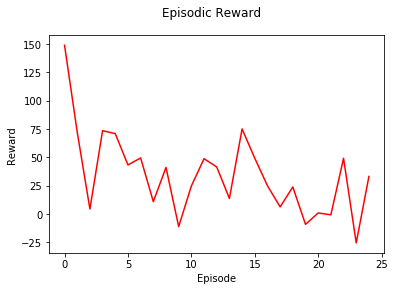

In [24]:
import matplotlib.pyplot as plt
plt.plot(rew, 'r')
plt.suptitle('Episodic Reward')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [16]:
sum(rew)/len(rew)

tensor([34.3757], device='cuda:0')

In [25]:
max(rew)

tensor([149.0405], device='cuda:0')

In [26]:
moves[0]

1973

In [18]:
torch.save(agent.critic1.state_dict(), 'c1.pt')
torch.save(agent.critic2.state_dict(), 'c2.pt')
torch.save(agent.actor.state_dict(), 'a.pt')

In [20]:
from numpy import save
save('rew.npy', rew)
save('moves.npy', moves)

In [21]:
def perform(env, agent):
    obs = env.reset()
    done = False
    rews = []
    obs["compassAngle"] = torch.from_numpy(obs["compassAngle"]).float().to(device).unsqueeze(0)
    while not done:
        camera_action = agent.step(obs, True)
        env_action = {}
            
        env_action["camera"] = [0, camera_action.detach().cpu().item()]
        env_action["attack"] = 0
        env_action["back"] = 0
        env_action["forward"] = 1
        env_action["jump"] = 1
        env_action["left"] = 0
        env_action["place"] = "none"
        env_action["right"] = 0
        env_action["sneak"] = 0
        env_action["sprint"] = 0
        
        obs, reward, done, info = env.step(env_action)
        env.render()
        rews.append(reward)
        obs["compassAngle"] = torch.from_numpy(obs["compassAngle"]).float().to(device).unsqueeze(0)
    plt.plot(rews)
    plt.show()

In [ ]:
#%run SoftAC.ipynb
#agent = SoftACAgent(env, agent_config)
#agent.critic1.load_state_dict(torch.load('c1.pt'))
#agent.critic2.load_state_dict(torch.load('c2.pt'))
#agent.actor.load_state_dict(torch.load('a.pt'))

In [28]:
perform(env,agent)

AttributeError: 'NoneType' object has no attribute 'sendall'